# Evolution of Rap - Part 1
### *Data Synthesis and Visualization*

## 1. Background
As a passionate rap enthusiast, I wondered if there were any patterns to uncover in the large and diverse library of tracks. [Billboard](https://www.billboard.com/) has long been an industry standard in music rankings, so I wanted to start by pulling data on its top rap songs from inception to present day. Billboard first released its **Hot Rap Songs** list on March 11, 1989 and has been updating it weekly since then. Each week, about 25 songs make the list. 

While this was a good method of getting a list of relevant tracks to analyze, the next challenge was getting actual data on these tracks. I wanted to get both musical features (such as tempo, danceability, loudness, etc.) as well as lyrical features (words per second, overall sentiment, most common words, etc.). Luckily, two other music resources, Spotify and Genius, make this data readily available through APIs. Thus, I was left with the following process for data pulling:
1. Scrape Billboard charts for top rap tracks
2. Use the Spotify API to get musical features for these tracks
3. Use the Genius API to get the lyrics for these tracks

After combining the data from these three sources, I chose to focus on two questions:
1. How has rap changed over the years? Can I represent this visually?
2. Is it possible to accurately predict which tracks will break into the top 5 spots on Billboard? Do top 5 rap songs across all years share any similarities? 

This notebook will focus on pulling, combining, and cleaning data in addition to developing insights for the first question above.

**The analysis resulted in the following conclusions:**
1. Profanity seems to have increased with the passage of time. The Golden Era in particular was relatively free of profanity.
1. The word "yo" was common in the Golden Era but has since been less prevalent.
3. Several words were popular across all eras: love, money, real, girl, etc.
4. Danceability steadily declined since the Golden Era, reached a bottom during the Blog Era, and trended upward again.
5. Energy had a double peak during the Bling and Blog Eras.
6. Rap got significantly louder post-Golden Era and has stayed elevated since.
7. Tracks have clearly gotten shorter over time, with rap songs today over a minute shorter than versus the Golden Era.
8. Words per second has trended upward, suggesting that rap today is faster than any other period.
9. Tracks today involve more repetition.
10. Tracks today are less feel-good than before.
11. Within tracks, sentiment is changing much more than before (tracks alternate between happier and sadder vibes).
12. Not surprisingly, more recent tracks are currently more popular on Spotify.

## 2. Pulling, Combining, and Cleaning Data

There are Python modules that act as wrappers for scraping [Billboard](https://github.com/guoguo12/billboard-charts) and pulling from the [Spotify](https://pypi.org/project/spotipy/) and [Genius](https://pypi.org/project/lyricsgenius/) API. The following packages need to be installed to replicate the analysis below. I also had to set up an account on Spotify/Genius directly to get API permission. Spotify can be set up [here](https://developer.spotify.com/documentation/web-api/) while Genius can be set up [here](https://docs.genius.com/). Note that this data retrieval process took quite a long time given the volume of data being pulled, so the reader may want to just browse over the code in this section and load the finished data file directly from my GitHub repository.

```pip install billboard.py```

```pip install spotipy```

```pip install lyricsgenius```

In order to gauge the progress of my pull requests, I used the following [module](https://pypi.org/project/tqdm/):

```pip install tqdm```

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

 ### 2.1. Billboard Data

In [10]:
import billboard
from random import randint
from time import sleep

billboard_df = pd.DataFrame()
start_date = "1989-03-11" #Earliest chart available
end_date = "2020-09-05" #Most recent chart at time of project release
chart = billboard.ChartData('rap-song', date = end_date)
stop = False

while stop == False:
    print(chart.date)
    for song in chart:
        song_row = {"title" : song.title, 
                    "artist" : song.artist, 
                    "peak_pos" : song.peakPos, 
                    "last_pos" : song.lastPos, 
                    "weeks_on_chart" : song.weeks, 
                    "current_rank" : song.rank, 
                    "is_new" : song.isNew, 
                    "week" : pd.to_datetime(chart.date)}
        billboard_df = billboard_df.append(song_row, ignore_index = True)
    #Pause for 1 to 5 seconds between each chart pull in order to avoid overloading site servers
    sleep(randint(1,5))
    print("done sleep")
    if chart.date == start_date:
        stop = True
    else:
        chart = billboard.ChartData('rap-song', chart.previousDate)

2010-10-23
done sleep
2010-10-16
done sleep
2010-10-09
done sleep
2010-10-02
done sleep
2010-09-25
done sleep
2010-09-18
done sleep
2010-09-11
done sleep
2010-09-04
done sleep
2010-08-28
done sleep
2010-08-21
done sleep
2010-08-14
done sleep
2010-08-07
done sleep
2010-07-31
done sleep
2010-07-24
done sleep
2010-07-17
done sleep
2010-07-10
done sleep
2010-07-03
done sleep
2010-06-26
done sleep
2010-06-19
done sleep
2010-06-12
done sleep
2010-06-05
done sleep
2010-05-29
done sleep
2010-05-22
done sleep
2010-05-15
done sleep
2010-05-08
done sleep
2010-05-01
done sleep
2010-04-24
done sleep
2010-04-17
done sleep
2010-04-10
done sleep
2010-04-03
done sleep
2010-03-27
done sleep
2010-03-20
done sleep
2010-03-13
done sleep
2010-03-06
done sleep
2010-02-27
done sleep
2010-02-20
done sleep
2010-02-13
done sleep
2010-02-06
done sleep
2010-01-30
done sleep
2010-01-23
done sleep
2010-01-16
done sleep
2010-01-09
done sleep
2010-01-02
done sleep
2009-12-26
done sleep
2009-12-19
done sleep
2009-12-12

done sleep
2003-08-30
done sleep
2003-08-23
done sleep
2003-08-16
done sleep
2003-08-09
done sleep
2003-08-02
done sleep
2003-07-26
done sleep
2003-07-19
done sleep
2003-07-12
done sleep
2003-07-05
done sleep
2003-06-28
done sleep
2003-06-21
done sleep
2003-06-14
done sleep
2003-06-07
done sleep
2003-05-31
done sleep
2003-05-24
done sleep
2003-05-17
done sleep
2003-05-10
done sleep
2003-05-03
done sleep
2003-04-26
done sleep
2003-04-19
done sleep
2003-04-12
done sleep
2003-04-05
done sleep
2003-03-29
done sleep
2003-03-22
done sleep
2003-03-15
done sleep
2003-03-08
done sleep
2003-03-01
done sleep
2003-02-22
done sleep
2003-02-15
done sleep
2003-02-08
done sleep
2003-02-01
done sleep
2003-01-25
done sleep
2003-01-18
done sleep
2003-01-11
done sleep
2003-01-04
done sleep
2002-12-28
done sleep
2002-12-21
done sleep
2002-12-14
done sleep
2002-12-07
done sleep
2002-11-30
done sleep
2002-11-23
done sleep
2002-11-16
done sleep
2002-11-09
done sleep
2002-11-02
done sleep
2002-10-26
done sleep

1996-07-13
done sleep
1996-07-06
done sleep
1996-06-29
done sleep
1996-06-22
done sleep
1996-06-15
done sleep
1996-06-08
done sleep
1996-06-01
done sleep
1996-05-25
done sleep
1996-05-18
done sleep
1996-05-11
done sleep
1996-05-04
done sleep
1996-04-27
done sleep
1996-04-20
done sleep
1996-04-13
done sleep
1996-04-06
done sleep
1996-03-30
done sleep
1996-03-23
done sleep
1996-03-16
done sleep
1996-03-09
done sleep
1996-03-02
done sleep
1996-02-24
done sleep
1996-02-17
done sleep
1996-02-10
done sleep
1996-02-03
done sleep
1996-01-27
done sleep
1996-01-20
done sleep
1996-01-13
done sleep
1996-01-06
done sleep
1995-12-30
done sleep
1995-12-23
done sleep
1995-12-16
done sleep
1995-12-09
done sleep
1995-12-02
done sleep
1995-11-25
done sleep
1995-11-18
done sleep
1995-11-11
done sleep
1995-11-04
done sleep
1995-10-28
done sleep
1995-10-21
done sleep
1995-10-14
done sleep
1995-10-07
done sleep
1995-09-30
done sleep
1995-09-23
done sleep
1995-09-16
done sleep
1995-09-09
done sleep
1995-09-02

done sleep
1989-05-20
done sleep
1989-05-13
done sleep
1989-05-06
done sleep
1989-04-29
done sleep
1989-04-22
done sleep
1989-04-15
done sleep
1989-04-08
done sleep
1989-04-01
done sleep
1989-03-25
done sleep
1989-03-18
done sleep
1989-03-11
done sleep


In [2]:
#Result of above data pull is saved as csv
billboard_df = pd.read_csv("billboard_history.csv", index_col=0)
billboard_df

artist  current_rank  \
0                  Cardi B Featuring Megan Thee Stallion             1   
1                               Drake Featuring Lil Durk             2   
2                           DaBaby Featuring Roddy Ricch             3   
3      Jack Harlow Featuring DaBaby, Tory Lanez & Lil...             4   
4                           24kGoldn Featuring iann dior             5   
...                                                  ...           ...   
52330                                          Sweet Tee            26   
52331                                    Black By Demand            27   
52332                                          Tuff Crew            28   
52333               Stetsasonic (Featuring Force M.D.'s)            29   
52334                 Tyree (Featuring Kool Rock Steady)            30   

       is_new  last_pos  peak_pos                title       week  \
0           0         1         1                  WAP   9/5/2020   
1           0         2         2  Laugh Now Cry Later   9/5/2020   
2           0         3         1             Rockstar   9/5/2020   
3           0         4         2         Whats Poppin   9/5/2020   
4           0        11         5                 Mood   9/5/2020   
...       ...       ...       ...                  ...        ...   
52330       1         0        26    On The Smooth Tip  3/11/1989   
52331       1         0        27  All Rappers Give Up  3/11/1989   
52332       1         0        28      My Part Of Town  3/11/1989   
52333       1         0        29             Float On  3/11/1989   
52334       1         0        30     Turn Up The Bass  3/11/1989   

       weeks_on_chart  
0                   3  
1                   2  
2                  19  
3                  24  
4                   2  
...               ...  
52330               1  
52331               1  
52332               1  
52333               1  
52334               1  

[52335 rows x 8 columns]

After the first data pull, I had over 50,000 rows of tracks. Of course, some of these are duplicates as the same track can appear on multiple different charts. I decided to keep all of these rows for now.
### 2.2. Spotify Data

I noticed that the artist column above often contains multiple artists (often separated by the word "Featuring"). After exploring the column, I decided it word be best to remove any words not corresponding to actual artist names. Regular expressions would be useful to accomplish this.

In [61]:
import re #import regex functions

def get_artists(artist_string):
    artists = re.sub('(?i)[()\[\],]|featuring\s|feat?\.\s','',artist_string)
    artists = re.sub('(?i)(\s[x&]\s)|(\swith\s)',' ', artists)
    return artists

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_id = 'id_string' #Replace with your Spotify API ID for replication
client_secret = 'secret_string' #Replace with your Spotify API secret for replication
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

#For each row, use spotipy package to pull the spotify track object
def get_spotify_track_object(row):
    artists = get_artists(row["artist"])
    title = row["title"]
    q = "track:" + title + " artist:" + artists
    track_object = sp.search(q, limit = 1, type = 'track')
    return track_object

In [22]:
from tqdm import tqdm
tqdm.pandas() #Allows us to use df.progess_apply()

billboard_spotify_df = billboard_df
billboard_spotify_df['track_object'] = billboard_spotify_df.progress_apply(get_spotify_track_object, axis = 1)

C:\Users\Sahil\anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [7]:
#For each track object pulled before, access and save its data
def extract_track_object_features(row):
    try:
        track_data = row['track_object']['tracks']['items'][0]
        album_type = track_data['album']['album_type']
        album_name = track_data['album']['name']
        album_release_date = track_data['album']['release_date']
        album_num_tracks = track_data['album']['total_tracks']
        duration_ms = track_data['duration_ms']
        explicit = track_data['explicit']
        spotify_track_id = track_data['id']
        spotify_popularity = track_data['popularity']
        spotify_track_name = track_data['name']
        track_number = track_data['track_number']
    
        return album_type, album_name, album_release_date, album_num_tracks, duration_ms, explicit, spotify_track_id, spotify_popularity, spotify_track_name, track_number
    except: #if no track object was returned from the API pull, return None
        pass

billboard_spotify_df[['album_type', 'album_name', 'album_release_date', 'album_num_tracks', 
                      'duration_ms', 'explicit', 'spotify_track_id', 'spotify_popularity', 
                      'spotify_track_name', 'track_number']] = billboard_spotify_df.progress_apply(extract_track_object_features, axis = 1, result_type="expand")

100%|██████████████████████████████████████████████████████████████████████████| 52335/52335 [00:10<00:00, 5149.52it/s]


Due to inconsistencies between Billboard/Spotify artist and track names and the fact that Spotify does not contain all tracks in its library (due to licensing constraints), some tracks that made it onto the Billboard charts did not return a corresponding Spotify track object. As a result, these rows will need to be dropped. Instead of dropping them blindly, I wanted to first see how many missing tracks came from each year and see if there was any pattern.

In [8]:
#Extract year from chart week
billboard_spotify_df['year'] = billboard_spotify_df['week'].apply(lambda x: x[-4:])
#Sum missing tracks grouped by year
billboard_spotify_df.set_index('year')['album_type'].isna().sum(level=0)

year
2020       9
2019      46
2018      42
2017      65
2016      66
2015      38
2014      88
2013     163
2012     151
2011      64
2010     142
2009     216
2008     201
2007     225
2006     154
2005     137
2004     113
2003     222
2002     435
2001    1032
2000    1128
1999    1240
1998    1237
1997    1210
1996    1053
1995     805
1994     636
1993     488
1992     442
1991     503
1990     548
1989     439
Name: album_type, dtype: int64

The majority of missing tracks are from 2001 and earlier. With some manual analysis, I noticed that a lot of these earlier tracks are more obscure and less popular which probably influences its probability of being included in the Spotify library. While there are certainly more statistically sound ways to handle this issue, I decided to just drop any missing tracks. I was left with about 39,000 rows (including repeats).

In [62]:
billboard_spotify_df_2 = billboard_spotify_df.dropna()
billboard_spotify_df_2.shape

(38997, 16)

Each Spotify track object has a corresponding ID which can be fed into the API to pull its audio features. More detail on how Spotify calculates these values can be found [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). Below, I called the API on each track and added the audio features to a dataframe.

In [5]:
def extract_audio_features(row):
    audio_features_object = sp.audio_features(row['spotify_track_id'])[0]
    features_to_return = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
                          'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
    return [audio_features_object[feature] for feature in features_to_return]

In [63]:
billboard_spotify_df_2[['danceability', 'energy', 'key', 'loudness', 'mode', 
                        'speechiness', 'acousticness', 'instrumentalness', 
                        'liveness', 'valence', 'tempo', 'time_signature']] = billboard_spotify_df_2.progress_apply(extract_audio_features, axis = 1, result_type="expand")

NameError: name 'extract_audio_features' is not defined

In [7]:
#Drop unnecessary columns to save memory
billboard_spotify_df_2 = billboard_spotify_df_2.drop(columns=["is_new","last_pos","track_object","album_type",
                                                              "album_name","album_release_date","album_num_tracks",
                                                              "spotify_track_id","spotify_track_name","track_number",
                                                              "key","mode","instrumentalness","liveness","tempo",
                                                              "time_signature"])

In [10]:
billboard_spotify_df_2 = pd.read_pickle("billboard_spotify_2.pkl")

### 2.3. Genius Data
The final data pulling step was getting the actual lyrics from Genius for NLP exploration. This API was quite slow, so I needed to maximize efficiency. Since many rows corresponded to the same tracks, it did not make sense to consistently call the API to pull the same lyrics. To address this, I saved each lyric pull into **song_object_dic**. If a track was already in this dictionary, I just copied over the same lyrics rather than calling the API again.

In [10]:
import lyricsgenius
genius = lyricsgenius.Genius("client_access_token") #Replace with your Genius token for replication
genius.remove_section_headers = True
#Increase timeout limit in case API is slow to pull data
genius.timeout = 60

song_object_dic = {}

def get_genius_song_object(row):
    artists = get_artists(row["artist"])
    title = row["title"]
    
    #If we already have these lyrics saved then copy them over
    if (artists,title) in song_object_dic.keys():
        return song_object_dic[(artists,title)]
    
    while True:
        try:
            song = genius.search_song(title, artists)
            break
        except:
            pass
    
    #If the Genius API search did not find any results, return None
    if song is None:
        song_object_dic[(artists,title)] = None
        pass
    #Otherwise, add the song object to the dictionaru and return
    else:
        song_object_dic[(artists,title)] = song
        return song

In [11]:
complete_df = billboard_spotify_df_2
complete_df["song_object"] = complete_df.progress_apply(get_genius_song_object, axis = 1)


  0%|                                                                                        | 0/38997 [00:00<?, ?it/s]

Searching for "WAP" by Cardi B Megan Thee Stallion...



  0%|                                                                             | 2/38997 [00:02<13:06:39,  1.21s/it]

Done.
Searching for "Laugh Now Cry Later" by Drake Lil Durk...



  0%|                                                                             | 3/38997 [00:04<16:59:05,  1.57s/it]

Done.
Searching for "Rockstar" by DaBaby Roddy Ricch...



  0%|                                                                             | 4/38997 [00:17<53:41:54,  4.96s/it]

Done.
Searching for "Whats Poppin" by Jack Harlow DaBaby Tory Lanez Lil Wayne...



  0%|                                                                             | 5/38997 [00:19<44:15:49,  4.09s/it]

Done.
Searching for "Mood" by 24kGoldn iann dior...



  0%|                                                                             | 6/38997 [00:22<40:54:08,  3.78s/it]

Done.
Searching for "For The Night" by Pop Smoke Lil Baby DaBaby...



  0%|                                                                             | 7/38997 [00:25<35:51:48,  3.31s/it]

Done.
Searching for "Mood Swings" by Pop Smoke Lil Tjay...



  0%|                                                                             | 8/38997 [00:26<31:27:30,  2.90s/it]

Done.
Searching for "Savage" by Megan Thee Stallion Beyonce...



  0%|                                                                             | 9/38997 [00:28<27:56:42,  2.58s/it]

Done.
Searching for "Popstar" by DJ Khaled Drake...



  0%|                                                                            | 10/38997 [00:30<26:20:19,  2.43s/it]

Done.
Searching for "The Woo" by Pop Smoke 50 Cent Roddy Ricch...



  0%|                                                                            | 11/38997 [00:33<25:36:50,  2.37s/it]

Done.
Searching for "Death Bed" by Powfu beabadoobee...



  0%|                                                                            | 12/38997 [00:35<24:43:48,  2.28s/it]

Done.
Searching for "Rags2Riches" by Rod Wave ATR Son Son...



  0%|                                                                            | 13/38997 [00:37<24:59:06,  2.31s/it]

Done.
Searching for "Tap In" by Saweetie...



  0%|                                                                            | 14/38997 [00:39<25:07:18,  2.32s/it]

Done.
Searching for "Wishing Well" by Juice WRLD...



  0%|                                                                            | 15/38997 [00:43<30:07:22,  2.78s/it]

Done.
Searching for "We Paid" by Lil Baby 42 Dugg...



  0%|                                                                            | 16/38997 [00:47<32:26:42,  3.00s/it]

Done.
Searching for "Girls In The Hood" by Megan Thee Stallion...



  0%|                                                                            | 17/38997 [00:49<30:52:25,  2.85s/it]

Done.
Searching for "Emotionally Scarred" by Lil Baby...



  0%|                                                                            | 18/38997 [00:52<28:49:19,  2.66s/it]

Done.
Searching for "Smile" by Juice WRLD The Weeknd...



  0%|                                                                            | 19/38997 [00:54<27:25:23,  2.53s/it]

Done.
Searching for "Party Girl" by StaySolidRocky...



  0%|                                                                            | 20/38997 [00:56<26:25:40,  2.44s/it]

Done.
Searching for "The Bigger Picture" by Lil Baby...



  0%|                                                                            | 21/38997 [01:04<44:52:45,  4.15s/it]

Done.
Searching for "Said Sum" by Moneybagg Yo...



  0%|                                                                            | 22/38997 [01:06<37:43:08,  3.48s/it]

Done.
Searching for "Greece" by DJ Khaled Drake...



  0%|                                                                            | 23/38997 [01:08<34:19:13,  3.17s/it]

Done.
Searching for "24" by Money Man Lil Baby...



  0%|                                                                            | 24/38997 [01:11<30:44:37,  2.84s/it]

Done.
Searching for "Kacey Talk" by YoungBoy Never Broke Again...



  0%|                                                                            | 25/38997 [01:12<27:56:36,  2.58s/it]

Done.
Searching for "Lemonade" by Internet Money Gunna Don Toliver NAV...



  0%|                                                                            | 26/38997 [01:15<27:29:08,  2.54s/it]

Done.
Searching for "Walk Em Down" by NLE Choppa Roddy Ricch...



  0%|▏                                                                           | 72/38997 [01:23<19:46:30,  1.83s/it]

Done.
Searching for "Letter From Houston" by Rod Wave...



  0%|▏                                                                           | 73/38997 [01:25<21:44:47,  2.01s/it]

Done.
Searching for "Girl Of My Dreams" by Rod Wave...



  0%|▏                                                                           | 74/38997 [01:28<22:31:13,  2.08s/it]

Done.
Searching for "Toosie Slide" by Drake...



  0%|▏                                                                           | 75/38997 [01:30<22:58:34,  2.13s/it]

Done.
Searching for "Dollaz On My Head" by Gunna Young Thug...



  0%|▏                                                                           | 76/38997 [01:32<22:39:26,  2.10s/it]

Done.
Searching for "Blueberry Faygo" by Lil Mosey...



  0%|▏                                                                           | 79/38997 [01:34<18:08:04,  1.68s/it]

Done.
Searching for "Move Ya Hips" by A$AP Ferg  Nicki Minaj MadeinTYO...



  0%|▏                                                                           | 82/38997 [01:36<15:27:28,  1.43s/it]

Done.
Searching for "Got It On Me" by Pop Smoke...



  0%|▏                                                                           | 99/38997 [01:39<11:12:56,  1.04s/it]

Done.
Searching for "Conversations" by Juice WRLD...



  0%|▏                                                                          | 100/38997 [01:41<14:52:58,  1.38s/it]

Done.
Searching for "Hate The Other Side" by Juice WRLD Marshmello Polo G The Kid LAROI...



  0%|▏                                                                          | 101/38997 [01:43<16:44:05,  1.55s/it]

Done.
Searching for "Lion King On Ice" by J. Cole...



  0%|▏                                                                          | 114/38997 [01:47<12:39:47,  1.17s/it]

Done.
Searching for "The Climb Back" by J. Cole...



  0%|▏                                                                          | 115/38997 [01:50<18:56:02,  1.75s/it]

Done.
Searching for "Life's A Mess" by Juice WRLD Halsey...



  0%|▎                                                                          | 143/38997 [01:53<13:38:53,  1.26s/it]

Done.
Searching for "Blood On My Jeans" by Juice WRLD...



  0%|▎                                                                          | 149/38997 [01:56<11:14:58,  1.04s/it]

Done.
Searching for "Righteous" by Juice WRLD...



  0%|▎                                                                          | 150/38997 [02:00<20:03:25,  1.86s/it]

Done.
Searching for "Titanic" by Juice WRLD...



  0%|▎                                                                          | 161/38997 [02:04<15:15:02,  1.41s/it]

Done.
Searching for "Bad Energy" by Juice WRLD...



  0%|▎                                                                          | 163/38997 [02:07<15:47:55,  1.46s/it]

Done.
Searching for "The Adventures Of Moon Man & Slim Shady" by Kid Cudi Eminem...



  0%|▎                                                                          | 164/38997 [02:13<29:38:44,  2.75s/it]

Done.
Searching for "Stay High" by Juice WRLD...



  0%|▎                                                                          | 168/38997 [02:16<23:23:05,  2.17s/it]

Done.
Searching for "Fighting Demons" by Juice WRLD...



  0%|▎                                                                          | 169/38997 [02:19<26:15:45,  2.43s/it]

Done.
Searching for "Tell Me U Luv Me" by Juice WRLD Trippie Redd...



  0%|▎                                                                          | 170/38997 [02:22<28:33:14,  2.65s/it]

Done.
Searching for "Up Up And Away" by Juice WRLD...



  0%|▎                                                                          | 172/38997 [02:25<24:25:35,  2.26s/it]

Done.
Searching for "Screw Juice" by Juice WRLD...



  0%|▎                                                                          | 174/38997 [02:29<23:19:46,  2.16s/it]

Done.
Searching for "I Want It" by Juice WRLD...



  0%|▎                                                                          | 176/38997 [02:32<21:12:22,  1.97s/it]

Done.
Searching for "Dior" by Pop Smoke...



  0%|▎                                                                          | 185/38997 [02:37<16:25:50,  1.52s/it]

Done.
Searching for "Life Is Good" by Future Drake...



  0%|▎                                                                          | 186/38997 [02:41<26:16:21,  2.44s/it]

Done.
Searching for "Aim For The Moon" by Pop Smoke Quavo...



  0%|▎                                                                          | 189/38997 [03:00<39:02:07,  3.62s/it]

Done.
Searching for "Gangstas" by Pop Smoke...



  0%|▎                                                                          | 191/38997 [03:04<32:38:01,  3.03s/it]

Done.
Searching for "44 Bulldog" by Pop Smoke...



  0%|▎                                                                          | 193/38997 [03:06<27:04:33,  2.51s/it]

Done.
Searching for "Something Special" by Pop Smoke...



  0%|▎                                                                          | 194/38997 [03:11<34:07:57,  3.17s/it]

Done.
Searching for "Yea Yea" by Pop Smoke...



  1%|▍                                                                          | 195/38997 [03:14<33:42:03,  3.13s/it]

Done.
Searching for "Make It Rain" by Pop Smoke Rowdy Rebel...



  1%|▍                                                                          | 199/38997 [03:18<26:46:57,  2.49s/it]

Done.
Searching for "What You Know Bout Love" by Pop Smoke...



  1%|▍                                                                          | 201/38997 [03:22<25:03:13,  2.32s/it]

Done.
Searching for "The Box" by Roddy Ricch...



  1%|▍                                                                          | 208/38997 [03:27<20:04:15,  1.86s/it]

Done.
Searching for "The Scotts" by THE SCOTTS Travis Scott Kid Cudi...



  1%|▍                                                                          | 215/38997 [03:31<15:39:48,  1.45s/it]

Done.
Searching for "Wash Us In The Blood" by Kanye West Travis Scott...



  1%|▍                                                                          | 218/38997 [03:34<14:51:44,  1.38s/it]

Done.
Searching for "Trollz" by 6ix9ine Nicki Minaj...



  1%|▍                                                                          | 219/38997 [03:38<21:32:59,  2.00s/it]

Done.
Searching for "Gooba" by 6ix9ine...



  1%|▍                                                                          | 220/38997 [03:40<23:39:18,  2.20s/it]

Done.
Searching for "Sum 2 Prove" by Lil Baby...



  1%|▍                                                                          | 221/38997 [03:43<26:09:46,  2.43s/it]

Done.
Searching for "After Party" by Don Toliver...



  1%|▍                                                                          | 222/38997 [03:47<29:38:17,  2.75s/it]

Done.
Searching for "Chicago Freestyle" by Drake Giveon...



  1%|▍                                                                          | 223/38997 [03:51<32:28:12,  3.01s/it]

Done.
Searching for "3 Headed Goat" by Lil Durk Lil Baby Polo G...



  1%|▍                                                                          | 224/38997 [03:55<35:58:23,  3.34s/it]

Done.
Searching for "Flex" by Polo G Juice WRLD...



  1%|▍                                                                          | 225/38997 [03:58<36:55:15,  3.43s/it]

Done.
Searching for "Snow On Tha Bluff" by J. Cole...



  1%|▍                                                                          | 244/38997 [04:02<26:23:15,  2.45s/it]

Done.
Searching for "Bleed" by A Boogie Wit da Hoodie...



  1%|▍                                                                          | 245/38997 [04:11<48:57:48,  4.55s/it]

Done.
Searching for "Go!" by Kid LAROI Juice WRLD...



  1%|▍                                                                          | 248/38997 [04:16<39:56:48,  3.71s/it]

Done.
Searching for "Shotta Flow 5" by NLE Choppa...



  1%|▌                                                                          | 269/38997 [04:20<28:34:26,  2.66s/it]

Done.
Searching for "High Fashion" by Roddy Ricch Mustard...



  1%|▌                                                                          | 283/38997 [04:24<20:56:10,  1.95s/it]

Done.
Searching for "Out West" by JACKBOYS Young Thug...



  1%|▌                                                                          | 292/38997 [04:28<15:48:49,  1.47s/it]

Done.
Searching for "Otherside Of America" by Meek Mill...



  1%|▌                                                                          | 295/38997 [04:31<14:14:24,  1.32s/it]

Done.
Searching for "Need It" by Migos YoungBoy Never Broke Again...



  1%|▌                                                                          | 296/38997 [04:33<19:09:27,  1.78s/it]

Done.
Searching for "Cooler Than A Bitch" by Gunna Roddy Ricch...



  1%|▋                                                                          | 336/38997 [04:37<13:41:43,  1.28s/it]

Done.
Searching for "Top Floor" by Gunna Travis Scott...



  1%|▋                                                                          | 341/38997 [04:42<12:39:58,  1.18s/it]

Done.
Searching for "Wunna" by Gunna...



  1%|▋                                                                          | 343/38997 [04:47<17:44:29,  1.65s/it]

Done.
Searching for "Blindfold" by Gunna Lil Baby...



  1%|▋                                                                          | 345/38997 [04:50<16:22:58,  1.53s/it]

Done.
Searching for "Solitaires" by Future Travis Scott...



  1%|▋                                                                          | 360/38997 [04:53<12:04:30,  1.13s/it]

Done.
Searching for "Trillionaire" by Future YoungBoy Never Broke Again...



  1%|▋                                                                          | 361/38997 [04:56<20:06:57,  1.87s/it]

Done.
Searching for "Trapped In The Sun" by Future...



  1%|▋                                                                          | 365/38997 [05:00<16:59:34,  1.58s/it]

Done.
Searching for "All Bad" by Future Lil Uzi Vert...



  1%|▋                                                                          | 366/38997 [05:04<24:52:04,  2.32s/it]

Done.
Searching for "Be Something" by Polo G Lil Baby...



  1%|▋                                                                          | 368/38997 [05:08<23:18:42,  2.17s/it]

Done.
Searching for "Martin & Gina" by Polo G...



  1%|▋                                                                          | 371/38997 [05:10<19:01:36,  1.77s/it]

Done.
Searching for "21" by Polo G...



  1%|▋                                                                          | 372/38997 [05:14<26:57:30,  2.51s/it]

Done.
Searching for "Falling" by Trevor Daniel...



  1%|▋                                                                          | 381/38997 [05:17<19:48:00,  1.85s/it]

Done.
Searching for "Pain 1993" by Drake Playboi Carti...



  1%|▊                                                                          | 390/38997 [05:21<15:09:00,  1.41s/it]

Done.
Searching for "Turks" by NAV Gunna Travis Scott...



  1%|▊                                                                          | 395/38997 [05:26<13:46:39,  1.28s/it]

Done.
Searching for "Zoo York" by Lil Tjay Fivio Foreign Pop Smoke...



  1%|▊                                                                          | 397/38997 [05:30<16:42:04,  1.56s/it]

Done.
Searching for "D4L" by Future Drake Young Thug...



  1%|▊                                                                          | 406/38997 [05:34<13:15:16,  1.24s/it]

Done.
Searching for "Desires" by Drake Future...



  1%|▊                                                                          | 408/38997 [05:39<16:04:56,  1.50s/it]

Done.
Searching for "Deep Pockets" by Drake...



  1%|▊                                                                          | 411/38997 [05:42<14:26:55,  1.35s/it]

Done.
Searching for "Demons" by Drake Fivio Foreign Sosa Geek...



  1%|▊                                                                          | 413/38997 [05:45<15:59:34,  1.49s/it]

Done.
Searching for "When To Say When" by Drake...



  1%|▊                                                                          | 414/38997 [05:50<24:48:55,  2.32s/it]

Done.
Searching for "Landed" by Drake...



  1%|▊                                                                          | 415/38997 [05:53<27:17:27,  2.55s/it]

Done.
Searching for "From Florida With Love" by Drake...



  1%|▊                                                                          | 418/38997 [05:58<24:21:49,  2.27s/it]

Done.
Searching for "Losses" by Drake...



  1%|▊                                                                          | 419/38997 [06:01<27:10:15,  2.54s/it]

Done.
Searching for "War" by Drake...



  1%|▊                                                                          | 420/38997 [06:04<30:21:14,  2.83s/it]

Done.
Searching for "Heart On Ice" by Rod Wave...



  1%|▊                                                                          | 434/38997 [06:07<21:51:59,  2.04s/it]

Done.
Searching for "Roxanne" by Arizona Zervas...



  1%|▊                                                                          | 435/38997 [06:11<26:59:23,  2.52s/it]

Done.
Searching for "Sicko Mode" by Travis Scott...



  1%|▊                                                                          | 436/38997 [06:16<34:50:57,  3.25s/it]

Done.
Searching for "HIGHEST IN THE ROOM" by Travis Scott...



  1%|▊                                                                          | 438/38997 [06:19<29:44:47,  2.78s/it]

Done.
Searching for "All In" by Lil Baby...



  1%|▊                                                                          | 439/38997 [06:22<32:04:57,  3.00s/it]

Done.
Searching for "Goosebumps" by Travis Scott...



  1%|▊                                                                          | 440/38997 [06:28<41:36:52,  3.89s/it]

Done.
Searching for "Jump" by DaBaby YoungBoy Never Broke Again...



  1%|▊                                                                          | 444/38997 [06:32<32:02:26,  2.99s/it]

Done.
Searching for "Sasuke" by Lil Uzi Vert...



  1%|▊                                                                          | 446/38997 [06:35<27:02:06,  2.52s/it]

Done.
Searching for "Godzilla" by Eminem Juice WRLD...



  1%|▊                                                                          | 447/38997 [06:39<31:23:09,  2.93s/it]

Done.
Searching for "Find My Way" by DaBaby...



  1%|▉                                                                          | 460/38997 [06:44<23:13:10,  2.17s/it]

Done.
Searching for "@ MEH" by Playboi Carti...



  1%|▉                                                                          | 461/38997 [06:47<26:53:35,  2.51s/it]

Done.
Searching for "PICK UP" by DaBaby Quavo...



  1%|▉                                                                          | 463/38997 [06:50<23:20:18,  2.18s/it]

Done.
Searching for "NASTY" by DaBaby Ashanti Megan Thee Stallion...



  1%|▉                                                                          | 464/38997 [06:54<29:38:48,  2.77s/it]

Done.
Searching for "LIGHTSKIN SH*T" by DaBaby Future jetsonmade...



  1%|▉                                                                          | 465/38997 [06:55<25:02:25,  2.34s/it]

No results found for: 'LIGHTSKIN SH*T DaBaby Future jetsonmade'
Searching for "BEST ON EARTH" by Russ BIA...



  1%|▉                                                                          | 468/38997 [07:01<23:22:41,  2.18s/it]

Done.
Searching for "Suicidal" by YNW Melly Juice WRLD...



  1%|▉                                                                          | 469/38997 [07:04<26:11:31,  2.45s/it]

Done.
Searching for "BLAME IT ON BABY" by DaBaby...



  1%|▉                                                                          | 470/38997 [07:07<29:06:35,  2.72s/it]

Done.
Searching for "Hot Girl Bummer" by blackbear...



  1%|▉                                                                          | 478/38997 [07:11<22:01:52,  2.06s/it]

Done.
Searching for "Woah" by Lil Baby...



  1%|▉                                                                          | 488/38997 [07:15<16:36:07,  1.55s/it]

Done.
Searching for "Stupid Again" by Tory Lanez...



  1%|▉                                                                          | 490/38997 [07:20<19:01:10,  1.78s/it]

Done.
Searching for "Broke In A Minute" by Tory Lanez...



  1%|▉                                                                          | 494/38997 [07:24<16:30:22,  1.54s/it]

Done.
Searching for "Myron" by Lil Uzi Vert...



  1%|▉                                                                          | 496/38997 [07:31<23:27:19,  2.19s/it]

Done.
Searching for "Fuck The World" by Rod Wave...



  1%|▉                                                                          | 518/38997 [07:34<16:49:21,  1.57s/it]

Done.
Searching for "Pray 4 Love" by Rod Wave...



  1%|▉                                                                          | 519/38997 [07:38<23:58:19,  2.24s/it]

Done.
Searching for "Oprah's Bank Account" by Lil Yachty Drake DaBaby...



  1%|█                                                                          | 544/38997 [07:41<17:10:54,  1.61s/it]

Done.
Searching for "P2" by Lil Uzi Vert...



  1%|█                                                                          | 545/38997 [07:45<24:01:34,  2.25s/it]

Done.
Searching for "B.I.T.C.H." by Megan Thee Stallion...



  1%|█                                                                          | 546/38997 [07:48<27:55:43,  2.61s/it]

Done.
Searching for "BOP" by DaBaby...



  1%|█                                                                          | 553/38997 [07:52<21:13:04,  1.99s/it]

Done.
Searching for "That Way" by Lil Uzi Vert...



  1%|█                                                                          | 567/38997 [07:55<15:39:47,  1.47s/it]

Done.
Searching for "Baby Pluto" by Lil Uzi Vert...



  1%|█                                                                          | 568/38997 [08:00<24:05:37,  2.26s/it]

Done.
Searching for "Bean (Kobe)" by Lil Uzi Vert Chief Keef...



  1%|█                                                                          | 577/38997 [08:03<18:16:46,  1.71s/it]

Done.
Searching for "Yessirskiii" by Lil Uzi Vert 21 Savage...



  1%|█                                                                          | 581/38997 [08:06<14:32:21,  1.36s/it]

Done.
Searching for "Lo Mein" by Lil Uzi Vert...



  2%|█▏                                                                         | 590/38997 [08:09<11:20:20,  1.06s/it]

Done.
Searching for "Lotus" by Lil Uzi Vert...



  2%|█▏                                                                         | 591/38997 [08:12<17:35:23,  1.65s/it]

Done.
Searching for "Silly Watch" by Lil Uzi Vert...



  2%|█▏                                                                         | 596/38997 [08:17<15:27:11,  1.45s/it]

Done.
Searching for "Homecoming" by Lil Uzi Vert...



  2%|█▏                                                                         | 606/38997 [08:20<11:42:49,  1.10s/it]

Done.
Searching for "Prices" by Lil Uzi Vert...



  2%|█▏                                                                         | 607/38997 [08:23<18:45:22,  1.76s/it]

Done.
Searching for "POP" by Lil Uzi Vert...



  2%|█▏                                                                         | 608/38997 [08:26<24:04:08,  2.26s/it]

Done.
Searching for "Bigger Than Life" by Lil Uzi Vert...



  2%|█▏                                                                         | 611/38997 [08:29<19:57:34,  1.87s/it]

Done.
Searching for "Celebration Station" by Lil Uzi Vert...



  2%|█▏                                                                         | 612/38997 [08:33<25:02:33,  2.35s/it]

Done.
Searching for "You Better Move" by Lil Uzi Vert...



  2%|█▏                                                                         | 614/38997 [08:37<23:30:56,  2.21s/it]

Done.
Searching for "Venetia" by Lil Uzi Vert...



  2%|█▏                                                                         | 615/38997 [08:40<29:04:50,  2.73s/it]

Done.
Searching for "Chrome Heart Tags" by Lil Uzi Vert...



  2%|█▏                                                                         | 618/38997 [08:44<23:45:27,  2.23s/it]

Done.
Searching for "Futsal Shuffle 2020" by Lil Uzi Vert...



  2%|█▏                                                                         | 619/38997 [08:48<29:31:38,  2.77s/it]

Done.
Searching for "Bust Me" by Lil Uzi Vert...



  2%|█▏                                                                         | 620/38997 [08:51<29:58:59,  2.81s/it]

Done.
Searching for "Heatin Up" by Lil Baby Gunna...



  2%|█▏                                                                         | 626/38997 [08:56<23:35:42,  2.21s/it]

Done.
Searching for "Commercial" by Lil Baby Lil Uzi Vert...



  2%|█▏                                                                         | 628/38997 [08:58<20:49:31,  1.95s/it]

Done.
Searching for "Live Off My Closet" by Lil Baby Future...



  2%|█▏                                                                         | 631/38997 [09:02<18:54:30,  1.77s/it]

Done.
Searching for "PTSD" by G Herbo Chance The Rapper Juice WRLD Lil Uzi Vert...



  2%|█▏                                                                         | 635/38997 [09:05<15:30:53,  1.46s/it]

Done.
Searching for "Grace" by Lil Baby 42 Dugg...



  2%|█▏                                                                         | 638/38997 [09:09<14:30:03,  1.36s/it]

Done.
Searching for "Get Ugly" by Lil Baby...



  2%|█▏                                                                         | 641/38997 [09:13<14:56:14,  1.40s/it]

Done.
Searching for "No Sucker" by Lil Baby Moneybagg Yo...



  2%|█▏                                                                         | 643/38997 [09:17<16:37:45,  1.56s/it]

Done.
Searching for "How" by Lil Baby...



  2%|█▏                                                                         | 644/38997 [09:20<22:31:50,  2.11s/it]

Done.
Searching for "Ballin'" by Mustard Roddy Ricch...



  2%|█▎                                                                         | 650/38997 [09:23<17:28:18,  1.64s/it]

Done.
Searching for "Lil Top" by YoungBoy Never Broke Again...



  2%|█▎                                                                         | 654/38997 [09:28<15:29:23,  1.45s/it]

Done.
Searching for "Red Eye" by YoungBoy Never Broke Again...



  2%|█▎                                                                         | 660/38997 [09:32<12:55:51,  1.21s/it]

Done.
Searching for "Numbers" by A Boogie Wit da Hoodie Roddy Ricch Gunna London On Da Track...



  2%|█▎                                                                         | 661/38997 [09:38<28:55:36,  2.72s/it]

Done.
Searching for "Fine By Time" by YoungBoy Never Broke Again...



  2%|█▎                                                                         | 665/38997 [09:41<22:54:41,  2.15s/it]

Done.
Searching for "Knocked Off" by YoungBoy Never Broke Again...



  2%|█▎                                                                         | 666/38997 [09:44<25:43:39,  2.42s/it]

Done.
Searching for "Bad Bad" by YoungBoy Never Broke Again...



  2%|█▎                                                                         | 667/38997 [09:49<34:28:19,  3.24s/it]

Done.
Searching for "Go Stupid" by Polo G NLE Choppa Stunna 4 Vegas...



  2%|█▎                                                                         | 668/38997 [09:54<40:53:18,  3.84s/it]

Done.
Searching for "g n f (Give No Fxk)" by Migos Young Thug Travis Scott...



  2%|█▎                                                                         | 683/38997 [09:55<28:47:06,  2.70s/it]

No results found for: 'g n f (Give No Fxk) Migos Young Thug Travis Scott'
Searching for "Me And My Guitar" by A Boogie Wit da Hoodie...



  2%|█▎                                                                         | 689/38997 [09:58<21:43:13,  2.04s/it]

Done.
Searching for "Bandit" by Juice WRLD YoungBoy Never Broke Again...



  2%|█▎                                                                         | 692/38997 [10:02<18:55:44,  1.78s/it]

Done.
Searching for "Might Not Give Up" by A Boogie Wit da Hoodie Young Thug...



  2%|█▎                                                                         | 693/38997 [10:07<30:00:13,  2.82s/it]

Done.
Searching for "Thug Love" by A Boogie Wit da Hoodie...



  2%|█▎                                                                         | 695/38997 [10:11<26:45:04,  2.51s/it]

Done.
Searching for "Yikes" by Nicki Minaj...



  2%|█▎                                                                         | 703/38997 [10:14<20:03:59,  1.89s/it]

Done.
Searching for "Hot" by Young Thug Gunna...



  2%|█▎                                                                         | 709/38997 [10:19<16:56:19,  1.59s/it]

Done.
Searching for "I Do It" by Lil Wayne Big Sean Lil Baby...



  2%|█▍                                                                         | 715/38997 [10:23<13:37:07,  1.28s/it]

Done.
Searching for "TOES" by DaBaby Lil Baby Moneybagg Yo...



  2%|█▍                                                                         | 717/38997 [10:26<14:45:15,  1.39s/it]

Done.
Searching for "VIBEZ" by DaBaby...



  2%|█▍                                                                         | 718/38997 [10:29<20:53:43,  1.97s/it]

Done.
Searching for "Mahogany" by Lil Wayne...



  2%|█▍                                                                         | 741/38997 [10:32<15:00:16,  1.41s/it]

Done.
Searching for "King Of My City" by A Boogie Wit da Hoodie...



  2%|█▍                                                                         | 743/38997 [10:36<16:50:00,  1.58s/it]

Done.
Searching for "Good News" by Mac Miller...



  2%|█▍                                                                         | 761/38997 [10:39<12:21:21,  1.16s/it]

Done.
Searching for "No Idea" by Don Toliver...



  2%|█▍                                                                         | 768/38997 [10:43<10:10:50,  1.04it/s]

Done.
Searching for "SUGAR" by BrockHampton...



  2%|█▍                                                                         | 769/38997 [10:46<18:38:11,  1.76s/it]

Done.
Searching for "Darkness" by Eminem...



  2%|█▌                                                                         | 780/38997 [10:51<14:17:23,  1.35s/it]

Done.
Searching for "Those Kinda Nights" by Eminem Ed Sheeran...



  2%|█▌                                                                         | 782/38997 [10:54<15:50:06,  1.49s/it]

Done.
Searching for "Unaccommodating" by Eminem Young M.A...



  2%|█▌                                                                         | 785/38997 [10:58<15:06:13,  1.42s/it]

Done.
Searching for "Blue World" by Mac Miller...



  2%|█▌                                                                         | 787/38997 [11:01<15:21:42,  1.45s/it]

Done.
Searching for "Leaving Heaven" by Eminem Skylar Grey...



  2%|█▌                                                                         | 791/38997 [11:04<12:53:42,  1.22s/it]

Done.
Searching for "Premonition (Intro)" by Eminem...



  2%|█▌                                                                         | 793/38997 [11:09<17:32:50,  1.65s/it]

Done.
Searching for "On Chill" by Wale Jeremih...



  2%|█▌                                                                         | 810/38997 [11:13<13:01:32,  1.23s/it]

Done.
Searching for "U Played" by MoneyBagg Yo Lil Baby...



  2%|█▌                                                                         | 811/38997 [11:16<18:12:40,  1.72s/it]

Done.
Searching for "Start Wit Me" by Roddy Ricch Gunna...



  2%|█▌                                                                         | 815/38997 [11:19<15:20:43,  1.45s/it]

Done.
Searching for "Baby" by Lil Baby DaBaby...



  2%|█▌                                                                         | 833/38997 [11:26<11:54:02,  1.12s/it]

Done.
Searching for "GANG GANG" by JACKBOYS Sheck Wes...



  2%|█▌                                                                         | 843/38997 [11:31<10:06:40,  1.05it/s]

Done.
Searching for "Panini" by Lil Nas X...



  2%|█▋                                                                          | 849/38997 [11:36<9:22:55,  1.13it/s]

Done.
Searching for "HAD ENOUGH" by Don Toliver Quavo Offset...



  2%|█▋                                                                          | 862/38997 [11:39<7:20:02,  1.44it/s]

Done.
Searching for "WHAT TO DO?" by JACKBOYS Don Toliver...



  2%|█▋                                                                         | 863/38997 [11:42<15:31:46,  1.47s/it]

Done.
Searching for "Camelot" by NLE Choppa...



  2%|█▋                                                                         | 866/38997 [11:48<17:01:18,  1.61s/it]

Done.
Searching for "GATTI" by JACKBOYS Pop Smoke Travis Scott...



  2%|█▋                                                                         | 867/38997 [11:51<22:00:10,  2.08s/it]

Done.
Searching for "Robbery" by Juice WRLD...



  2%|█▋                                                                         | 886/38997 [11:54<15:48:40,  1.49s/it]

Done.
Searching for "Let Me Know (I Wonder Why Freestyle)" by Juice WRLD...



  2%|█▋                                                                         | 890/38997 [11:57<13:28:15,  1.27s/it]

Done.
Searching for "Death" by Trippie Redd DaBaby...



  2%|█▋                                                                         | 891/38997 [12:00<21:05:55,  1.99s/it]

Done.
Searching for "Tip Toe" by Roddy Ricch A Boogie Wit da Hoodie...



  2%|█▋                                                                         | 892/38997 [12:04<25:21:33,  2.40s/it]

Done.
Searching for "Lucid Dreams" by Juice WRLD...



  2%|█▋                                                                         | 899/38997 [12:09<20:20:05,  1.92s/it]

Done.
Searching for "Legends" by Juice WRLD...



  2%|█▋                                                                         | 908/38997 [12:13<15:26:00,  1.46s/it]

Done.
Searching for "Dirty Iyanna" by YoungBoy Never Broke Again...



  2%|█▊                                                                         | 913/38997 [12:16<12:31:27,  1.18s/it]

Done.
Searching for "Truth Hurts" by Lizzo...



  2%|█▊                                                                          | 924/38997 [12:19<9:48:47,  1.08it/s]

Done.
Searching for "Peta" by Roddy Ricch Meek Mill...



  2%|█▊                                                                          | 940/38997 [12:25<7:55:17,  1.33it/s]

Done.
Searching for "Goodbyes" by Post Malone Young Thug...



  2%|█▊                                                                          | 956/38997 [12:27<6:05:37,  1.73it/s]

Done.
Searching for "Time" by NF...



  2%|█▊                                                                         | 957/38997 [12:30<13:56:27,  1.32s/it]

Done.
Searching for "Money In The Grave" by Drake Rick Ross...



  2%|█▊                                                                         | 959/38997 [12:35<17:18:00,  1.64s/it]

Done.
Searching for "Enemies" by Post Malone DaBaby...



  2%|█▊                                                                         | 964/38997 [12:38<14:11:00,  1.34s/it]

Done.
Searching for "6 Kiss" by Trippie Redd Juice WRLD YNW Melly...



  2%|█▊                                                                         | 965/38997 [12:42<20:27:46,  1.94s/it]

Done.
Searching for "Who Needs Love" by Trippie Redd...



  3%|█▉                                                                         | 984/38997 [12:45<14:55:27,  1.41s/it]

Done.
Searching for "Reply" by A Boogie Wit da Hoodie Lil Uzi Vert...



  3%|█▉                                                                        | 1005/38997 [12:48<10:50:08,  1.03s/it]

Done.
Searching for "Follow God" by Kanye West...



  3%|█▉                                                                        | 1006/38997 [12:52<18:44:43,  1.78s/it]

Done.
Searching for "Baby Sitter" by DaBaby Offset...



  3%|█▉                                                                        | 1010/38997 [12:55<15:37:04,  1.48s/it]

Done.
Searching for "Old Town Road" by Lil Nas Billy Ray Cyrus...



  3%|█▉                                                                        | 1018/38997 [13:00<13:13:33,  1.25s/it]

Done.
Searching for "My Type" by Saweetie...



  3%|█▉                                                                        | 1029/38997 [13:06<10:44:08,  1.02s/it]

Done.
Searching for "Hot Girl Summer" by Megan Thee Stallion Nicki Minaj Ty Dolla $ign...



  3%|█▉                                                                        | 1033/38997 [13:10<11:01:11,  1.04s/it]

Done.
Searching for "Stuck In A Dream" by Lil Mosey Gunna...



  3%|█▉                                                                        | 1034/38997 [13:14<19:12:15,  1.82s/it]

Done.
Searching for "Immortal" by 21 Savage...



  3%|██                                                                        | 1054/38997 [13:16<13:52:20,  1.32s/it]

Done.
Searching for "Lonely Child" by YoungBoy Never Broke Again...



  3%|██                                                                        | 1055/38997 [13:19<18:16:32,  1.73s/it]

Done.
Searching for "Make No Sense" by YoungBoy Never Broke Again...



  3%|██                                                                        | 1056/38997 [13:22<21:56:36,  2.08s/it]

Done.
Searching for "Selah" by Kanye West...



  3%|██                                                                        | 1064/38997 [13:26<16:45:05,  1.59s/it]

Done.
Searching for "On God" by Kanye West...



  3%|██                                                                        | 1066/38997 [13:30<18:41:01,  1.77s/it]

Done.
Searching for "Everything We Need" by Kanye West Ty Dolla $ign Ant Clemons...



  3%|██                                                                        | 1071/38997 [13:34<15:35:47,  1.48s/it]

Done.
Searching for "Use This Gospel" by Kanye West Clipse Kenny G...



  3%|██                                                                        | 1073/38997 [13:37<16:23:08,  1.56s/it]

Done.
Searching for "Water" by Kanye West Ant Clemons...



  3%|██                                                                        | 1077/38997 [13:41<14:04:00,  1.34s/it]

Done.
Searching for "Hands On" by Kanye West Fred Hammond...



  3%|██                                                                        | 1081/38997 [13:44<12:37:35,  1.20s/it]

Done.
Searching for "Cash Shit" by Megan Thee Stallion DaBaby...



  3%|██                                                                         | 1103/38997 [13:47<9:13:23,  1.14it/s]

Done.
Searching for "Self Control" by YoungBoy Never Broke Again...



  3%|██                                                                        | 1104/38997 [13:50<15:40:47,  1.49s/it]

Done.
Searching for "INTRO" by DaBaby...



  3%|██▏                                                                       | 1123/38997 [13:53<11:30:48,  1.09s/it]

Done.
Searching for "F.N" by Lil Tjay...



  3%|██▏                                                                       | 1124/38997 [13:57<20:04:24,  1.91s/it]

Done.
Searching for "The London" by Young Thug J. Cole Travis Scott...



  3%|██▏                                                                       | 1147/38997 [14:02<14:44:58,  1.40s/it]

Done.
Searching for "Sunflower (Spider-Man: Into The Spider-Verse)" by Post Malone Swae Lee...



  3%|██▏                                                                       | 1156/38997 [14:05<11:12:55,  1.07s/it]

Done.
Searching for "iPHONE" by DaBaby Nicki Minaj...



  3%|██▏                                                                        | 1167/38997 [14:08<8:43:30,  1.20it/s]

Done.
Searching for "OFF THE RIP" by DaBaby...



  3%|██▏                                                                       | 1169/38997 [14:11<10:47:53,  1.03s/it]

Done.
Searching for "POP STAR" by DaBaby Kevin Gates...



  3%|██▏                                                                       | 1170/38997 [14:14<18:57:15,  1.80s/it]

Done.
Searching for "RAW SHIT" by DaBaby Migos...



  3%|██▏                                                                       | 1172/38997 [14:19<19:53:19,  1.89s/it]

Done.
Searching for "Saint-Tropez" by Post Malone...



  3%|██▎                                                                       | 1190/38997 [14:23<14:42:25,  1.40s/it]

Done.
Searching for "Die For Me" by Post Malone Future Halsey...



  3%|██▎                                                                       | 1193/38997 [14:27<14:42:32,  1.40s/it]

Done.
Searching for "On The Road" by Post Malone Meek Mill Lil Baby...



  3%|██▎                                                                       | 1194/38997 [14:31<22:24:44,  2.13s/it]

Done.
Searching for "Lalala" by Y2K bbno$...



  3%|██▎                                                                       | 1195/38997 [14:35<27:03:18,  2.58s/it]

Done.
Searching for "Suge" by DaBaby...



  3%|██▎                                                                       | 1203/38997 [14:40<20:57:46,  2.00s/it]

Done.
Searching for "Pop Out" by Polo G Lil Tjay...



  3%|██▎                                                                       | 1211/38997 [14:44<16:10:29,  1.54s/it]

Done.
Searching for "I Know" by Post Malone...



  3%|██▎                                                                       | 1239/38997 [14:47<11:41:07,  1.11s/it]

Done.
Searching for "Internet" by Post Malone...



  3%|██▎                                                                       | 1240/38997 [14:51<20:52:09,  1.99s/it]

Done.
Searching for "Bad Bad Bad" by Young Thug Lil Baby...



  3%|██▎                                                                       | 1241/38997 [14:57<33:03:50,  3.15s/it]

Done.
Searching for "Shotta Flow" by NLE Choppa...



  3%|██▍                                                                       | 1259/38997 [15:02<23:59:02,  2.29s/it]

Done.
Searching for "Did It Again" by Lil Tecca...



  3%|██▍                                                                       | 1263/38997 [15:10<23:20:26,  2.23s/it]

Done.
Searching for "Clout" by Offset Cardi B...



  3%|██▍                                                                       | 1264/38997 [15:15<30:16:49,  2.89s/it]

Done.
Searching for "Babushka Boi" by A$AP Rocky...



  3%|██▍                                                                       | 1266/38997 [15:19<28:27:57,  2.72s/it]

Done.
Searching for "Go Loko" by YG Tyga Jon Z...



  3%|██▍                                                                       | 1290/38997 [15:25<20:41:28,  1.98s/it]

Done.
Searching for "Press" by Cardi B...



  3%|██▍                                                                       | 1291/38997 [15:28<23:46:02,  2.27s/it]

Done.
Searching for "What's The Move" by Young Thug Lil Uzi Vert...



  3%|██▍                                                                       | 1309/38997 [15:36<17:56:38,  1.71s/it]

Done.
Searching for "Just How It Is" by Young Thug...



  3%|██▍                                                                       | 1311/38997 [15:40<19:35:01,  1.87s/it]

Done.
Searching for "Surf" by Young Thug Gunna...



  3%|██▍                                                                       | 1312/38997 [15:46<31:11:14,  2.98s/it]

Done.
Searching for "Worth It" by YK Osiris...



  3%|██▌                                                                       | 1331/38997 [15:49<22:20:30,  2.14s/it]

Done.
Searching for "Gold Roses" by Rick Ross Drake...



  3%|██▌                                                                       | 1333/38997 [15:53<21:56:48,  2.10s/it]

Done.
Searching for "Act Up" by City Girls...



  3%|██▌                                                                       | 1334/38997 [15:57<30:05:06,  2.88s/it]

Done.
Searching for "Mac 10" by Trippie Redd Lil Baby Lil Duke...



  3%|██▌                                                                       | 1336/38997 [16:04<31:38:14,  3.02s/it]

Done.
Searching for "Daddy" by Blueface Rich The Kid...



  3%|██▌                                                                       | 1339/38997 [16:07<25:20:44,  2.42s/it]

Done.
Searching for "Wow." by Post Malone...



  3%|██▌                                                                       | 1346/38997 [16:11<19:25:02,  1.86s/it]

Done.
Searching for "The Motion" by Drake...



  3%|██▌                                                                       | 1358/38997 [16:15<14:32:12,  1.39s/it]

Done.
Searching for "Dreams Money Can Buy" by Drake...



  3%|██▌                                                                       | 1360/38997 [16:18<15:55:50,  1.52s/it]

Done.
Searching for "Hot Shower" by Chance The Rapper MadeinTYO DaBaby...



  4%|██▌                                                                       | 1382/38997 [16:25<12:04:34,  1.16s/it]

Done.
Searching for "Single Again" by Big Sean...



  4%|██▌                                                                       | 1383/38997 [16:28<17:22:47,  1.66s/it]

Done.
Searching for "24/7" by Meek Mill Ella Mai...



  4%|██▋                                                                       | 1406/38997 [16:30<12:27:38,  1.19s/it]

Done.
Searching for "Tap" by NAV Meek Mill...



  4%|██▋                                                                       | 1407/38997 [16:33<17:15:38,  1.65s/it]

Done.
Searching for "Under The Sun" by Dreamville J. Cole Lute DaBaby...



  4%|██▋                                                                       | 1408/38997 [16:36<21:30:48,  2.06s/it]

Done.
Searching for "Middle Child" by J. Cole...



  4%|██▋                                                                       | 1421/38997 [16:41<16:22:27,  1.57s/it]

Done.
Searching for "Pure Water" by Mustard Migos...



  4%|██▋                                                                       | 1422/38997 [16:44<18:52:32,  1.81s/it]

Done.
Searching for "Remember The Name" by Ed Sheeran Eminem 50 Cent...



  4%|██▋                                                                       | 1426/38997 [16:46<15:31:36,  1.49s/it]

Done.
Searching for "Down Bad" by Dreamville JID Bas J. Cole EARTHGANG Young Nudy...



  4%|██▊                                                                       | 1451/38997 [16:50<11:15:25,  1.08s/it]

Done.
Searching for "Out The Mud" by Lil Baby Future...



  4%|██▊                                                                        | 1472/38997 [16:52<8:15:27,  1.26it/s]

Done.
Searching for "Homicide" by Logic Eminem...



  4%|██▊                                                                       | 1473/38997 [16:55<14:30:10,  1.39s/it]

Done.
Searching for "Please Me" by Cardi B Bruno Mars...



  4%|██▊                                                                       | 1474/38997 [16:59<22:18:23,  2.14s/it]

Done.
Searching for "When I Grow Up" by NF...



  4%|██▊                                                                       | 1475/38997 [17:02<24:59:29,  2.40s/it]

Done.
Searching for "MEGATRON" by Nicki Minaj...



  4%|██▊                                                                       | 1486/38997 [17:08<19:17:52,  1.85s/it]

Done.
Searching for "Bacc At It Again" by Yella Beezy Gucci Mane Quavo...



  4%|██▊                                                                       | 1499/38997 [17:11<14:07:28,  1.36s/it]

Done.
Searching for "Wish Wish" by DJ Khaled Cardi B 21 Savage...



  4%|██▊                                                                       | 1500/38997 [17:15<22:31:37,  2.16s/it]

Done.
Searching for "Omerta" by Drake...



  4%|██▊                                                                       | 1512/38997 [17:18<16:35:51,  1.59s/it]

Done.
Searching for "Thotiana" by Blueface...



  4%|██▉                                                                       | 1518/38997 [17:24<14:39:39,  1.41s/it]

Done.
Searching for "A Lot" by 21 Savage...



  4%|██▉                                                                       | 1519/38997 [17:26<18:16:41,  1.76s/it]

Done.
Searching for "Sanguine Paradise" by Lil Uzi Vert...



  4%|██▉                                                                       | 1524/38997 [17:29<14:34:33,  1.40s/it]

Done.
Searching for "Envy Me" by Calboy...



  4%|██▉                                                                       | 1535/38997 [17:33<11:22:34,  1.09s/it]

Done.
Searching for "Close Friends" by Lil Baby...



  4%|██▉                                                                       | 1537/38997 [17:38<15:42:02,  1.51s/it]

Done.
Searching for "Put A Date On It" by Yo Gotti Lil Baby...



  4%|██▉                                                                       | 1547/38997 [17:41<11:46:33,  1.13s/it]

Done.
Searching for "Look Back At It" by A Boogie Wit da Hoodie...



  4%|███                                                                        | 1560/38997 [17:43<8:46:17,  1.19it/s]

Done.
Searching for "Murder On My Mind" by YNW Melly...



  4%|███                                                                        | 1570/38997 [17:47<7:12:30,  1.44it/s]

Done.
Searching for "The Search" by NF...



  4%|██▉                                                                       | 1571/38997 [17:50<14:20:03,  1.38s/it]

Done.
Searching for "Going Bad" by Meek Mill Drake...



  4%|██▉                                                                       | 1580/38997 [17:54<11:30:16,  1.11s/it]

Done.
Searching for "Isis" by Joyner Lucas Logic...



  4%|███                                                                        | 1595/38997 [17:57<8:46:37,  1.18it/s]

Done.
Searching for "Higher" by DJ Khaled Nipsey Hussle John Legend...



  4%|███                                                                        | 1605/38997 [18:00<6:55:45,  1.50it/s]

Done.
Searching for "I Think" by Tyler The Creator...



  4%|███                                                                        | 1616/38997 [18:03<5:47:52,  1.79it/s]

Done.
Searching for "Celebrate" by DJ Khaled Travis Scott Post Malone...



  4%|███                                                                       | 1617/38997 [18:06<12:19:28,  1.19s/it]

Done.
Searching for "Big Ole Freak" by Megan Thee Stallion...



  4%|███▏                                                                       | 1646/38997 [18:10<9:01:27,  1.15it/s]

Done.
Searching for "Racks In The Middle" by Nipsey Hussle Roddy Ricch Hit-Boy...



  4%|███▏                                                                      | 1647/38997 [18:13<17:29:49,  1.69s/it]

Done.
Searching for "Swervin" by A Boogie Wit da Hoodie 6ix9ine...



  4%|███▏                                                                      | 1670/38997 [18:15<12:31:48,  1.21s/it]

Done.
Searching for "Floating" by ScHoolboy Q 21 Savage...



  4%|███▎                                                                       | 1695/38997 [18:19<9:16:32,  1.12it/s]

Done.
Searching for "Mixed Personalities" by YNW Melly Kanye West...



  4%|███▎                                                                       | 1698/38997 [18:23<9:46:11,  1.06it/s]

Done.
Searching for "Money" by Cardi B...



  4%|███▎                                                                       | 1740/38997 [18:28<7:11:38,  1.44it/s]

Done.
Searching for "Con Calma" by Daddy Yankee Snow...



  4%|███▎                                                                       | 1742/38997 [18:30<8:53:37,  1.16it/s]

Done.
Searching for "Double Up" by Nipsey Hussle Belly DOM KENNEDY...



  5%|███▍                                                                       | 1771/38997 [18:34<6:36:45,  1.56it/s]

Done.
Searching for "Last Time That I Checc'd" by Nipsey Hussle YG...



  5%|███▎                                                                      | 1772/38997 [18:37<13:34:10,  1.31s/it]

Done.
Searching for "ZEZE" by Kodak Black Travis Scott Offset...



  5%|███▍                                                                      | 1791/38997 [18:40<10:03:38,  1.03it/s]

Done.
Searching for "Twerk" by City Girls Cardi B...



  5%|███▌                                                                       | 1820/38997 [18:43<7:21:30,  1.40it/s]

Done.
Searching for "Pure Cocaine" by Lil Baby...



  5%|███▌                                                                       | 1823/38997 [18:46<7:48:12,  1.32it/s]

Done.
Searching for "Numb Numb Juice" by ScHoolboy Q...



  5%|███▌                                                                       | 1846/38997 [18:48<5:50:31,  1.77it/s]

Done.
Searching for "Drip Too Hard" by Lil Baby Gunna...



  5%|███▌                                                                       | 1859/38997 [18:54<5:20:31,  1.93it/s]

Done.
Searching for "Hear Me Calling" by Juice WRLD...



  5%|███▌                                                                       | 1863/38997 [18:56<5:32:42,  1.86it/s]

Done.
Searching for "Empty" by Juice WRLD...



  5%|███▌                                                                       | 1865/38997 [18:59<7:56:50,  1.30it/s]

Done.
Searching for "Fast" by Juice WRLD...



  5%|███▌                                                                       | 1868/38997 [19:02<8:39:28,  1.19it/s]

Done.
Searching for "Wake Up In The Sky" by Gucci Mane Bruno Mars Kodak Black...



  5%|███▌                                                                      | 1869/38997 [19:04<14:19:04,  1.39s/it]

Done.
Searching for "I" by Lil Skies...



  5%|███▌                                                                      | 1888/38997 [19:08<10:35:20,  1.03s/it]

Done.
Searching for "Leave Me Alone" by Flipp Dinero...



  5%|███▌                                                                      | 1891/38997 [19:12<12:05:13,  1.17s/it]

Done.
Searching for "Backin' It Up" by Pardison Fontaine Cardi B...



  5%|███▋                                                                       | 1918/38997 [19:16<8:53:01,  1.16it/s]

Done.
Searching for "Legacy" by Offset Travis Scott 21 Savage...



  5%|███▋                                                                      | 1919/38997 [19:20<19:15:12,  1.87s/it]

Done.
Searching for "Red Room" by Offset...



  5%|███▋                                                                      | 1920/38997 [19:24<23:42:28,  2.30s/it]

Done.
Searching for "Mo Bamba" by Sheck Wes...



  5%|███▋                                                                      | 1940/38997 [19:28<17:11:03,  1.67s/it]

Done.
Searching for "Calling My Spirit" by Kodak Black...



  5%|███▋                                                                      | 1948/38997 [19:30<13:06:38,  1.27s/it]

Done.
Searching for "Armed And Dangerous" by Juice WRLD...



  5%|███▊                                                                       | 1969/38997 [19:33<9:33:46,  1.08it/s]

Done.
Searching for "Everyday" by Logic Marshmello...



  5%|███▊                                                                       | 1992/38997 [19:36<7:04:00,  1.45it/s]

Done.
Searching for "One Call" by Gunna...



  5%|███▊                                                                      | 1993/38997 [19:39<14:13:30,  1.38s/it]

Done.
Searching for "Uproar" by Lil Wayne...



  5%|███▊                                                                      | 1998/38997 [19:42<11:49:55,  1.15s/it]

Done.
Searching for "First Off" by Future Travis Scott...



  5%|███▉                                                                       | 2018/38997 [19:45<8:44:16,  1.18it/s]

Done.
Searching for "Keanu Reeves" by Logic...



  5%|███▊                                                                      | 2021/38997 [19:49<10:39:33,  1.04s/it]

Done.
Searching for "Better Now" by Post Malone...



  5%|███▉                                                                       | 2033/38997 [19:52<8:05:52,  1.27it/s]

Done.
Searching for "Crushed Up" by Future...



  5%|███▉                                                                       | 2040/38997 [19:55<6:52:06,  1.49it/s]

Done.
Searching for "Jumpin On A Jet" by Future...



  5%|███▉                                                                       | 2045/38997 [19:57<6:20:58,  1.62it/s]

Done.
Searching for "No Stylist" by French Montana Drake...



  5%|███▉                                                                       | 2070/38997 [20:00<4:48:32,  2.13it/s]

Done.
Searching for "Startender" by A Boogie Wit da Hoodie Offset Tyga...



  5%|███▉                                                                       | 2071/38997 [20:02<9:13:52,  1.11it/s]

Done.
Searching for "Yosemite" by Travis Scott...



  5%|███▉                                                                      | 2073/38997 [20:06<12:55:26,  1.26s/it]

Done.
Searching for "Dangerous" by Meek Mill Jeremih PnB Rock...



  5%|████                                                                       | 2091/38997 [20:10<9:41:32,  1.06it/s]

Done.
Searching for "Ring" by Cardi B Kehlani...



  5%|███▉                                                                      | 2093/38997 [20:14<13:02:37,  1.27s/it]

Done.
Searching for "Talk To Me" by Tory Lanez Rich The Kid...



  5%|███▉                                                                      | 2095/38997 [20:18<15:54:18,  1.55s/it]

Done.
Searching for "All My Friends" by 21 Savage...



  5%|████                                                                      | 2142/38997 [20:22<11:20:43,  1.11s/it]

Done.
Searching for "BAD!" by XXXTENTACION...



  5%|████                                                                      | 2143/38997 [20:27<24:13:33,  2.37s/it]

Done.
Searching for "Break Da Law" by 21 Savage...



  6%|████                                                                      | 2145/38997 [20:30<21:35:56,  2.11s/it]

Done.
Searching for "MoshPit" by Kodak Black Juice WRLD...



  6%|████                                                                      | 2163/38997 [20:33<15:32:34,  1.52s/it]

Done.
Searching for "FEFE" by 6ix9ine Nicki Minaj Murda Beatz...



  6%|████                                                                      | 2166/38997 [20:37<14:51:38,  1.45s/it]

Done.
Searching for "Testimony" by Kodak Black...



  6%|████                                                                      | 2170/38997 [20:39<12:24:08,  1.21s/it]

Done.
Searching for "KIKA" by 6ix9ine Tory Lanez...



  6%|████                                                                      | 2171/38997 [20:43<21:41:31,  2.12s/it]

Done.
Searching for "Guardian Angel" by XXXTENTACION...



  6%|████▏                                                                     | 2185/38997 [20:48<16:11:55,  1.58s/it]

Done.
Searching for "I Don't Let Go" by XXXTENTACION...



  6%|████▏                                                                     | 2187/38997 [20:51<16:27:57,  1.61s/it]

Done.
Searching for "What's Free" by Meek Mill Rick Ross JAY-Z...



  6%|████▏                                                                     | 2193/38997 [20:54<12:57:48,  1.27s/it]

Done.
Searching for "One Minute" by XXXTENTACION Kanye West Travis Barker...



  6%|████▏                                                                     | 2194/38997 [20:58<19:19:04,  1.89s/it]

Done.
Searching for "Train Food" by XXXTENTACION...



  6%|████▏                                                                     | 2195/38997 [21:04<31:59:25,  3.13s/it]

Done.
Searching for "On Me" by Meek Mill Cardi B...



  6%|████▏                                                                     | 2208/38997 [21:06<23:01:47,  2.25s/it]

Done.
Searching for "Uptown Vibes" by Meek Mill Fabolous Anuel AA...



  6%|████▏                                                                     | 2211/38997 [21:10<19:30:09,  1.91s/it]

Done.
Searching for "I Like It" by Cardi B Bad Bunny J Balvin...



  6%|████▏                                                                     | 2212/38997 [21:14<27:40:52,  2.71s/it]

Done.
Searching for "MAMA" by 6ix9ine Nicki Minaj Kanye West...



  6%|████▏                                                                     | 2213/38997 [21:18<29:32:02,  2.89s/it]

Done.
Searching for "WAKA" by 6ix9ine A Boogie Wit da Hoodie...



  6%|████▏                                                                     | 2217/38997 [21:21<23:27:33,  2.30s/it]

Done.
Searching for "TIC TOC" by 6ix9ine Lil Baby...



  6%|████▏                                                                     | 2219/38997 [21:26<23:23:39,  2.29s/it]

Done.
Searching for "Intro" by Meek Mill...



  6%|████▏                                                                     | 2221/38997 [21:29<21:52:09,  2.14s/it]

Done.
Searching for "In My Feelings" by Drake...



  6%|████▏                                                                     | 2234/38997 [21:35<16:31:25,  1.62s/it]

Done.
Searching for "Nonstop" by Drake...



  6%|████▏                                                                     | 2236/38997 [21:39<19:07:04,  1.87s/it]

Done.
Searching for "Lie" by NF...



  6%|████▏                                                                     | 2239/38997 [21:43<17:12:04,  1.68s/it]

Done.
Searching for "Big Bank" by YG 2 Chainz Big Sean Nicki Minaj...



  6%|████▎                                                                     | 2244/38997 [21:46<13:58:01,  1.37s/it]

Done.
Searching for "STOOPID" by 6ix9ine Bobby Shmurda...



  6%|████▎                                                                     | 2245/38997 [21:49<19:13:49,  1.88s/it]

Done.
Searching for "Taste" by Tyga Offset...



  6%|████▎                                                                     | 2258/38997 [21:52<13:57:37,  1.37s/it]

Done.
Searching for "That's On Me" by Yella Beezy...



  6%|████▎                                                                     | 2269/38997 [21:54<10:30:19,  1.03s/it]

Done.
Searching for "Smile (Living My Best Life)" by Lil' Duval Snoop Dogg Ball Greezy...



  6%|████▎                                                                     | 2271/38997 [21:57<11:32:25,  1.13s/it]

Done.
Searching for "Topanga" by Trippie Redd...



  6%|████▍                                                                      | 2293/38997 [22:01<8:35:47,  1.19it/s]

Done.
Searching for "1400 / 999 Freestyle" by Trippie Redd Juice WRLD...



  6%|████▎                                                                     | 2294/38997 [22:03<13:15:43,  1.30s/it]

Done.
Searching for "10 Freaky Girls" by Metro Boomin 21 Savage...



  6%|████▎                                                                     | 2295/38997 [22:06<18:06:16,  1.78s/it]

Done.
Searching for "Yes Indeed" by Lil Baby Drake...



  6%|████▍                                                                     | 2310/38997 [22:16<14:48:01,  1.45s/it]

Done.
Searching for "Space Cadet" by Metro Boomin Gunna...



  6%|████▍                                                                     | 2317/38997 [22:20<11:58:34,  1.18s/it]

Done.
Searching for "I Love It" by Kanye West Lil Pump...



  6%|████▍                                                                      | 2339/38997 [22:25<9:01:35,  1.13it/s]

Done.
Searching for "Fine China" by Future Juice WRLD...



  6%|████▍                                                                     | 2340/38997 [22:29<18:15:45,  1.79s/it]

Done.
Searching for "Last Memory" by TakeOff...



  6%|████▍                                                                     | 2343/38997 [22:31<15:07:49,  1.49s/it]

Done.
Searching for "Never Recover" by Lil Baby Gunna Drake...



  6%|████▍                                                                     | 2367/38997 [22:34<10:57:29,  1.08s/it]

Done.
Searching for "Mona Lisa" by Lil Wayne Kendrick Lamar...



  6%|████▌                                                                      | 2389/38997 [22:38<8:10:15,  1.24it/s]

Done.
Searching for "Flip The Switch" by Quavo Drake...



  6%|████▌                                                                     | 2391/38997 [22:42<12:09:17,  1.20s/it]

Done.
Searching for "W O R K I N  M E" by Quavo...



  6%|████▌                                                                     | 2393/38997 [22:47<15:59:20,  1.57s/it]

Done.
Searching for "Venom" by Eminem...



  6%|████▌                                                                     | 2394/38997 [22:51<25:09:10,  2.47s/it]

Done.
Searching for "Killshot" by Eminem...



  6%|████▌                                                                     | 2417/38997 [22:56<18:11:00,  1.79s/it]

Done.
Searching for "Off White VLONE" by Lil Baby Gunna Lil Durk NAV...



  6%|████▌                                                                     | 2418/38997 [22:58<20:34:06,  2.02s/it]

Done.
Searching for "Let It Fly" by Lil Wayne Travis Scott...



  6%|████▌                                                                     | 2426/38997 [23:02<15:54:03,  1.57s/it]

Done.
Searching for "Dedicate" by Lil Wayne...



  6%|████▌                                                                     | 2429/38997 [23:05<13:42:28,  1.35s/it]

Done.
Searching for "What About Me" by Lil Wayne Sosamann...



  6%|████▌                                                                     | 2433/38997 [23:07<11:33:30,  1.14s/it]

Done.
Searching for "Moonlight" by XXXTENTACION...



  6%|████▋                                                                      | 2438/38997 [23:10<9:26:26,  1.08it/s]

Done.
Searching for "Famous" by Lil Wayne Reginae Carter...



  6%|████▋                                                                     | 2439/38997 [23:15<23:55:16,  2.36s/it]

Done.
Searching for "Open Letter" by Lil Wayne...



  6%|████▋                                                                     | 2441/38997 [23:19<22:58:52,  2.26s/it]

Done.
Searching for "New Patek" by Lil Uzi Vert...



  6%|████▋                                                                     | 2453/38997 [23:23<16:54:19,  1.67s/it]

Done.
Searching for "Lucky You" by Eminem Joyner Lucas...



  6%|████▋                                                                     | 2456/38997 [23:26<15:04:16,  1.48s/it]

Done.
Searching for "Nice For What" by Drake...



  6%|████▋                                                                     | 2459/38997 [23:31<16:10:11,  1.59s/it]

Done.
Searching for "Rap Devil" by Machine Gun Kelly...



  6%|████▋                                                                     | 2460/38997 [23:36<24:06:43,  2.38s/it]

Done.
Searching for "Fall" by Eminem...



  6%|████▋                                                                     | 2486/38997 [23:41<17:33:50,  1.73s/it]

Done.
Searching for "Barbie Dreams" by Nicki Minaj...



  6%|████▋                                                                     | 2489/38997 [23:46<17:06:36,  1.69s/it]

Done.
Searching for "The Ringer" by Eminem...



  6%|████▋                                                                     | 2490/38997 [23:52<28:52:58,  2.85s/it]

Done.
Searching for "Self Care" by Mac Miller...



  6%|████▊                                                                     | 2506/38997 [23:55<20:47:21,  2.05s/it]

Done.
Searching for "Not Alike" by Eminem Royce Da 5'9...



  6%|████▊                                                                     | 2514/38997 [23:59<15:57:29,  1.57s/it]

Done.
Searching for "Hurt Feelings" by Mac Miller...



  6%|████▊                                                                     | 2516/38997 [24:02<15:44:05,  1.55s/it]

Done.
Searching for "Kamikaze" by Eminem...



  6%|████▊                                                                     | 2527/38997 [24:05<11:56:28,  1.18s/it]

Done.
Searching for "Greatest" by Eminem...



  6%|████▊                                                                     | 2530/38997 [24:09<12:09:50,  1.20s/it]

Done.
Searching for "Normal" by Eminem...



  6%|████▊                                                                     | 2534/38997 [24:11<10:38:28,  1.05s/it]

Done.
Searching for "Stepping Stone" by Eminem...



  7%|████▊                                                                     | 2535/38997 [24:15<16:58:12,  1.68s/it]

Done.
Searching for "Apes**t" by The Carters...



  7%|████▊                                                                     | 2538/38997 [24:17<14:25:15,  1.42s/it]

Done.
Searching for "Stargazing" by Travis Scott...



  7%|████▊                                                                     | 2539/38997 [24:21<20:22:04,  2.01s/it]

Done.
Searching for "Sad!" by XXXTENTACION...



  7%|████▊                                                                     | 2553/38997 [24:26<15:23:28,  1.52s/it]

Done.
Searching for "All Girls Are The Same" by Juice WRLD...



  7%|████▊                                                                     | 2560/38997 [24:30<12:24:44,  1.23s/it]

Done.
Searching for "I Am Who They Say I Am" by YoungBoy Never Broke Again Kevin Gates Quando Rondo...



  7%|████▊                                                                     | 2562/38997 [24:32<12:56:26,  1.28s/it]

Done.
Searching for "Lean Wit Me" by Juice WRLD...



  7%|████▊                                                                     | 2563/38997 [24:37<22:39:29,  2.24s/it]

Done.
Searching for "1942" by G-Eazy Yo Gotti YBN Nahmir...



  7%|████▊                                                                     | 2565/38997 [24:40<21:10:58,  2.09s/it]

Done.
Searching for "Psycho" by Post Malone Ty Dolla $ign...



  7%|████▉                                                                     | 2574/38997 [24:43<15:37:16,  1.54s/it]

Done.
Searching for "Be Careful" by Cardi B...



  7%|████▉                                                                     | 2585/38997 [24:48<12:16:15,  1.21s/it]

Done.
Searching for "Chanel (Go Get It)" by Young Thug Gunna Lil Baby...



  7%|████▉                                                                     | 2589/38997 [24:53<12:20:50,  1.22s/it]

Done.
Searching for "Bed" by Nicki Minaj Ariana Grande...



  7%|█████                                                                      | 2606/38997 [24:55<9:08:00,  1.11it/s]

Done.
Searching for "Chun-Li" by Nicki Minaj...



  7%|████▉                                                                     | 2608/38997 [25:01<14:36:50,  1.45s/it]

Done.
Searching for "Taking A Walk" by Trippie Redd...



  7%|████▉                                                                     | 2609/38997 [25:04<20:06:23,  1.99s/it]

Done.
Searching for "Rich Sex" by Nicki Minaj Lil Wayne...



  7%|████▉                                                                     | 2611/38997 [25:07<18:23:26,  1.82s/it]

Done.
Searching for "Majesty" by Nicki Minaj Eminem Labrinth...



  7%|████▉                                                                     | 2612/38997 [25:09<20:51:44,  2.06s/it]

Done.
Searching for "Carousel" by Travis Scott...



  7%|████▉                                                                     | 2626/38997 [25:12<15:14:17,  1.51s/it]

Done.
Searching for "R.I.P Screw" by Travis Scott...



  7%|████▉                                                                     | 2628/38997 [25:15<15:16:21,  1.51s/it]

Done.
Searching for "Stop Trying To Be God" by Travis Scott...



  7%|████▉                                                                     | 2629/38997 [25:18<17:50:27,  1.77s/it]

Done.
Searching for "No Bystanders" by Travis Scott...



  7%|████▉                                                                     | 2632/38997 [25:22<16:23:02,  1.62s/it]

Done.
Searching for "5% Tint" by Travis Scott...



  7%|████▉                                                                     | 2633/38997 [25:25<22:40:41,  2.25s/it]

Done.
Searching for "NC-17" by Travis Scott...



  7%|████▉                                                                     | 2634/38997 [25:29<27:00:39,  2.67s/it]

Done.
Searching for "Who? What!" by Travis Scott...



  7%|█████                                                                     | 2635/38997 [25:38<44:54:44,  4.45s/it]

Done.
Searching for "Skeletons" by Travis Scott...



  7%|█████                                                                     | 2636/38997 [25:41<41:10:41,  4.08s/it]

Done.
Searching for "Astrothunder" by Travis Scott...



  7%|█████                                                                     | 2637/38997 [25:44<37:30:42,  3.71s/it]

Done.
Searching for "This Is America" by Childish Gambino...



  7%|█████                                                                     | 2653/38997 [25:48<27:03:26,  2.68s/it]

Done.
Searching for "Mob Ties" by Drake...



  7%|█████                                                                     | 2656/38997 [25:51<22:16:51,  2.21s/it]

Done.
Searching for "Wasted" by Juice WRLD Lil Uzi Vert...



  7%|█████                                                                     | 2657/38997 [25:55<27:48:14,  2.75s/it]

Done.
Searching for "One Day" by Logic Ryan Tedder...



  7%|█████                                                                     | 2659/38997 [25:58<24:13:27,  2.40s/it]

Done.
Searching for "Praise The Lord (Da Shine)" by A$AP Rocky Skepta...



  7%|█████                                                                     | 2660/38997 [26:06<38:21:39,  3.80s/it]

Done.
Searching for "Ball For Me" by Post Malone Nicki Minaj...



  7%|█████                                                                     | 2661/38997 [26:09<37:18:57,  3.70s/it]

Done.
Searching for "God's Plan" by Drake...



  7%|█████                                                                     | 2670/38997 [26:14<27:56:25,  2.77s/it]

Done.
Searching for "I Might Need Security" by Chance The Rapper...



  7%|█████                                                                     | 2682/38997 [26:18<20:24:30,  2.02s/it]

Done.
Searching for "Emotionless" by Drake...



  7%|█████▏                                                                    | 2704/38997 [26:21<14:41:53,  1.46s/it]

Done.
Searching for "Can't Take A Joke" by Drake...



  7%|█████▏                                                                    | 2705/38997 [26:24<19:07:34,  1.90s/it]

Done.
Searching for "Elevate" by Drake...



  7%|█████▏                                                                    | 2706/38997 [26:27<21:51:31,  2.17s/it]

Done.
Searching for "Hopeless Romantic" by Wiz Khalifa Swae Lee...



  7%|█████▏                                                                    | 2708/38997 [26:29<19:29:22,  1.93s/it]

Done.
Searching for "Wifi Lit" by Future...



  7%|█████▏                                                                    | 2730/38997 [26:32<13:59:08,  1.39s/it]

Done.
Searching for "Blue Tint" by Drake...



  7%|█████▏                                                                    | 2731/38997 [26:38<27:57:53,  2.78s/it]

Done.
Searching for "Survival" by Drake...



  7%|█████▏                                                                    | 2744/38997 [26:41<20:10:37,  2.00s/it]

Done.
Searching for "Talk Up" by Drake JAY-Z...



  7%|█████▏                                                                    | 2746/38997 [26:46<21:37:03,  2.15s/it]

Done.
Searching for "8 Out Of 10" by Drake...



  7%|█████▏                                                                    | 2747/38997 [26:49<27:07:16,  2.69s/it]

Done.
Searching for "Sandra's Rose" by Drake...



  7%|█████▏                                                                    | 2750/38997 [26:54<23:24:06,  2.32s/it]

Done.
Searching for "Is There More" by Drake...



  7%|█████▏                                                                    | 2752/38997 [26:57<21:46:58,  2.16s/it]

Done.
Searching for "That's How You Feel" by Drake...



  7%|█████▏                                                                    | 2753/38997 [27:02<28:23:13,  2.82s/it]

Done.
Searching for "Plug Walk" by Rich The Kid...



  7%|█████▏                                                                    | 2766/38997 [27:05<20:31:00,  2.04s/it]

Done.
Searching for "Jocelyn Flores" by XXXTENTACION...



  7%|█████▎                                                                    | 2769/38997 [27:08<18:10:48,  1.81s/it]

Done.
Searching for "Look Alive" by BlocBoy JB Drake...



  7%|█████▎                                                                    | 2770/38997 [27:13<25:19:13,  2.52s/it]

Done.
Searching for "Walk It Talk It" by Migos Drake...



  7%|█████▎                                                                    | 2771/38997 [27:18<32:34:22,  3.24s/it]

Done.
Searching for "Everybody Dies In Their Nightmares" by XXXTENTACION...



  7%|█████▎                                                                    | 2775/38997 [27:21<25:13:40,  2.51s/it]

Done.
Searching for "All Mine" by Kanye West...



  7%|█████▎                                                                    | 2776/38997 [27:24<28:23:05,  2.82s/it]

Done.
Searching for "The Remedy For A Broken Heart (Why Am I So In Love)" by XXXTENTACION...



  7%|█████▎                                                                    | 2777/38997 [27:27<28:44:14,  2.86s/it]

Done.
Searching for "Reborn" by KIDS SEE GHOSTS...



  7%|█████▎                                                                    | 2817/38997 [27:30<20:17:20,  2.02s/it]

Done.
Searching for "Yikes" by Kanye West...



  7%|█████▎                                                                    | 2818/38997 [27:32<21:27:50,  2.14s/it]

Done.
Searching for "4th Dimension" by KIDS SEE GHOSTS Louis Prima...



  7%|█████▎                                                                    | 2820/38997 [27:34<17:53:10,  1.78s/it]

Done.
Searching for "Feel The Love" by KIDS SEE GHOSTS...



  7%|█████▎                                                                    | 2822/38997 [27:36<16:06:01,  1.60s/it]

Done.
Searching for "TATI" by 6ix9ine DJ SPINKING...



  7%|█████▎                                                                    | 2823/38997 [27:40<21:26:38,  2.13s/it]

Done.
Searching for "Freeee (Ghost Town, Pt. 2)" by KIDS SEE GHOSTS...



  7%|█████▎                                                                    | 2826/38997 [27:43<18:38:49,  1.86s/it]

Done.
Searching for "Violent Crimes" by Kanye West...



  7%|█████▍                                                                    | 2839/38997 [27:47<13:51:22,  1.38s/it]

Done.
Searching for "I Thought About Killing You" by Kanye West...



  7%|█████▍                                                                    | 2840/38997 [27:51<21:16:38,  2.12s/it]

Done.
Searching for "No Mistakes" by Kanye West...



  7%|█████▍                                                                    | 2843/38997 [27:54<17:55:18,  1.78s/it]

Done.
Searching for "KOD" by J. Cole...



  7%|█████▍                                                                    | 2849/38997 [27:58<14:26:16,  1.44s/it]

Done.
Searching for "Powerglide" by Rae Sremmurd Juicy J...



  7%|█████▍                                                                    | 2867/38997 [28:00<10:34:28,  1.05s/it]

Done.
Searching for "Overdose" by YoungBoy Never Broke Again...



  7%|█████▍                                                                    | 2868/38997 [28:03<15:55:57,  1.59s/it]

Done.
Searching for "Japan" by Famous Dex...



  7%|█████▍                                                                    | 2869/38997 [28:07<21:27:11,  2.14s/it]

Done.
Searching for "Esskeetit" by Lil Pump...



  7%|█████▍                                                                    | 2871/38997 [28:11<21:29:39,  2.14s/it]

Done.
Searching for "A$AP Forever" by A$AP Rocky Moby...



  7%|█████▍                                                                    | 2873/38997 [28:16<23:06:55,  2.30s/it]

Done.
Searching for "Stir Fry" by Migos...



  7%|█████▍                                                                    | 2892/38997 [28:22<17:03:34,  1.70s/it]

Done.
Searching for "Watch" by Travis Scott Lil Uzi Vert Kanye West...



  7%|█████▍                                                                    | 2896/38997 [28:26<15:01:17,  1.50s/it]

Done.
Searching for "King's Dead" by Jay Rock Kendrick Lamar Future James Blake...



  7%|█████▍                                                                    | 2897/38997 [28:30<23:14:27,  2.32s/it]

Done.
Searching for "Paranoid" by Post Malone...



  7%|█████▍                                                                    | 2898/38997 [28:35<29:05:44,  2.90s/it]

Done.
Searching for "Rockstar" by Post Malone 21 Savage...



  7%|█████▌                                                                    | 2905/38997 [28:37<21:35:04,  2.15s/it]

Done.
Searching for "Shoota" by Playboi Carti Lil Uzi Vert...



  7%|█████▌                                                                    | 2917/38997 [28:40<15:49:43,  1.58s/it]

Done.
Searching for "ATM" by J. Cole...



  8%|█████▌                                                                    | 2946/38997 [28:44<11:28:09,  1.15s/it]

Done.
Searching for "Kevin's Heart" by J. Cole...



  8%|█████▌                                                                    | 2947/38997 [28:48<18:51:01,  1.88s/it]

Done.
Searching for "Same Bitches" by Post Malone G-Eazy YG...



  8%|█████▌                                                                    | 2958/38997 [28:52<14:17:20,  1.43s/it]

Done.
Searching for "Zack And Codeine" by Post Malone...



  8%|█████▌                                                                    | 2960/38997 [28:54<13:51:44,  1.38s/it]

Done.
Searching for "Over Now" by Post Malone...



  8%|█████▌                                                                    | 2961/38997 [28:57<19:15:59,  1.92s/it]

Done.
Searching for "Takin' Shots" by Post Malone...



  8%|█████▌                                                                    | 2963/38997 [29:00<17:53:22,  1.79s/it]

Done.
Searching for "Candy Paint" by Post Malone...



  8%|█████▋                                                                    | 2965/38997 [29:03<16:33:10,  1.65s/it]

Done.
Searching for "92 Explorer" by Post Malone...



  8%|█████▋                                                                    | 2967/38997 [29:06<15:32:33,  1.55s/it]

Done.
Searching for "Photograph" by J. Cole...



  8%|█████▋                                                                    | 2981/38997 [29:09<11:32:05,  1.15s/it]

Done.
Searching for "Motiv8" by J. Cole...



  8%|█████▋                                                                    | 2982/38997 [29:11<16:02:21,  1.60s/it]

Done.
Searching for "1985 (Intro To The Fall Off)" by J. Cole...



  8%|█████▋                                                                    | 2985/38997 [29:14<14:07:43,  1.41s/it]

Done.
Searching for "The Cut Off" by J. Cole kiLL edward...



  8%|█████▋                                                                    | 2988/38997 [29:17<12:47:57,  1.28s/it]

Done.
Searching for "Brackets" by J. Cole...



  8%|█████▋                                                                    | 2989/38997 [29:20<17:39:42,  1.77s/it]

Done.
Searching for "Window Pain (Outro)" by J. Cole...



  8%|█████▋                                                                    | 2995/38997 [29:24<14:11:20,  1.42s/it]

Done.
Searching for "Friends" by J. Cole kiLL edward...



  8%|█████▋                                                                    | 2996/38997 [29:27<20:09:00,  2.01s/it]

Done.
Searching for "Once An Addict (Interlude)" by J. Cole...



  8%|█████▋                                                                    | 2997/38997 [29:30<23:40:44,  2.37s/it]

Done.
Searching for "Barbie Tingz" by Nicki Minaj...



  8%|█████▋                                                                    | 3011/38997 [29:34<17:24:09,  1.74s/it]

Done.
Searching for "Ric Flair Drip" by Offset Metro Boomin...



  8%|█████▋                                                                    | 3013/38997 [29:40<20:47:01,  2.08s/it]

Done.
Searching for "Drip" by Cardi B Migos...



  8%|█████▋                                                                    | 3014/38997 [29:47<33:53:29,  3.39s/it]

Done.
Searching for "Bartier Cardi" by Cardi B 21 Savage...



  8%|█████▋                                                                    | 3016/38997 [29:51<30:53:58,  3.09s/it]

Done.
Searching for "I Do" by Cardi B SZA...



  8%|█████▋                                                                    | 3017/38997 [29:55<31:22:50,  3.14s/it]

Done.
Searching for "Him & I" by G-Eazy Halsey...



  8%|█████▋                                                                    | 3019/38997 [29:59<28:53:31,  2.89s/it]

Done.
Searching for "New Freezer" by Rich The Kid Kendrick Lamar...



  8%|█████▋                                                                    | 3021/38997 [30:04<26:42:04,  2.67s/it]

Done.
Searching for "Outside Today" by YoungBoy Never Broke Again...



  8%|█████▋                                                                    | 3022/38997 [30:06<26:32:49,  2.66s/it]

Done.
Searching for "Diamond Teeth Samurai" by YoungBoy Never Broke Again...



  8%|█████▋                                                                    | 3023/38997 [30:20<59:35:27,  5.96s/it]

Done.
Searching for "Get Up 10" by Cardi B...



  8%|█████▊                                                                    | 3041/38997 [30:24<42:26:15,  4.25s/it]

Done.
Searching for "Best Life" by Cardi B Chance The Rapper...



  8%|█████▊                                                                    | 3042/38997 [30:28<41:34:41,  4.16s/it]

Done.
Searching for "Bickenhead" by Cardi B...



  8%|█████▊                                                                    | 3043/38997 [30:31<38:11:59,  3.82s/it]

Done.
Searching for "Thru Your Phone" by Cardi B...



  8%|█████▊                                                                    | 3047/38997 [30:34<29:03:38,  2.91s/it]

Done.
Searching for "Let You Down" by NF...



  8%|█████▊                                                                    | 3058/38997 [30:40<21:48:40,  2.18s/it]

Done.
Searching for "Billy" by 6ix9ine...



  8%|█████▊                                                                    | 3066/38997 [30:50<19:05:26,  1.91s/it]

Done.
Searching for "Hardaway" by Derez De'Shon...



  8%|█████▊                                                                    | 3067/38997 [30:53<21:54:45,  2.20s/it]

Done.
Searching for "Top Off" by DJ Khaled JAY Z Future B...



  8%|█████▊                                                                    | 3069/38997 [30:56<19:40:30,  1.97s/it]

Done.
Searching for "Red Roses" by Lil Skies Landon Cube...



  8%|█████▊                                                                    | 3071/38997 [31:00<19:42:06,  1.97s/it]

Done.
Searching for "Nowadays" by Lil Skies Landon Cube...



  8%|█████▊                                                                    | 3072/38997 [31:04<27:36:11,  2.77s/it]

Done.
Searching for "MotorSport" by Migos Nicki Minaj Cardi B...



  8%|█████▊                                                                    | 3087/38997 [31:08<20:07:10,  2.02s/it]

Done.
Searching for "Gummo" by 6ix9ine...



  8%|█████▊                                                                    | 3090/38997 [31:24<29:50:58,  2.99s/it]

Done.
Searching for "I Fall Apart" by Post Malone...



  8%|█████▉                                                                    | 3107/38997 [31:30<21:50:40,  2.19s/it]

Done.
Searching for "44 More" by Logic...



  8%|█████▉                                                                    | 3138/38997 [31:33<15:36:50,  1.57s/it]

Done.
Searching for "Plain Jane" by A$AP Ferg Nicki Minaj...



  8%|█████▉                                                                    | 3139/38997 [31:36<19:53:49,  2.00s/it]

Done.
Searching for "Indica Badu" by Logic Wiz Khalifa...



  8%|█████▉                                                                    | 3143/38997 [31:39<16:17:34,  1.64s/it]

Done.
Searching for "Good Old Days" by Macklemore Kesha...



  8%|█████▉                                                                    | 3144/38997 [31:43<23:39:06,  2.37s/it]

Done.
Searching for "Contra" by Logic...



  8%|█████▉                                                                    | 3145/38997 [31:47<28:24:42,  2.85s/it]

Done.
Searching for "No Limit" by G-Eazy A$AP Rocky Cardi B...



  8%|██████                                                                    | 3162/38997 [31:53<20:51:35,  2.10s/it]

Done.
Searching for "River" by Eminem Ed Sheeran...



  8%|██████                                                                    | 3188/38997 [31:58<15:12:37,  1.53s/it]

Done.
Searching for "Gucci Gang" by Lil Pump...



  8%|██████                                                                    | 3190/38997 [32:05<21:06:20,  2.12s/it]

Done.
Searching for "Pick It Up" by Famous Dex A$AP Rocky...



  8%|██████                                                                    | 3192/38997 [32:12<25:24:45,  2.56s/it]

Done.
Searching for "Love." by Kendrick Lamar Zacari...



  8%|██████                                                                    | 3200/38997 [32:16<18:57:48,  1.91s/it]

Done.
Searching for "X" by ScHoolboy Q 2 Chainz Saudi...



  8%|██████                                                                    | 3215/38997 [32:20<14:04:35,  1.42s/it]

Done.
Searching for "Narcos" by Migos...



  8%|██████                                                                    | 3217/38997 [32:23<15:00:17,  1.51s/it]

Done.
Searching for "I Get The Bag" by Gucci Mane Migos...



  8%|██████▏                                                                   | 3236/38997 [32:27<11:04:41,  1.12s/it]

Done.
Searching for "Roll In Peace" by Kodak Black XXXTENTACION...



  8%|██████▎                                                                    | 3259/38997 [32:30<8:11:58,  1.21it/s]

Done.
Searching for "Betrayed" by Lil Xan...



  8%|██████▎                                                                    | 3265/38997 [32:36<8:40:56,  1.14it/s]

Done.
Searching for "BBO (Bad Bitches Only)" by Migos 21 Savage...



  8%|██████▎                                                                    | 3286/38997 [32:38<6:22:17,  1.56it/s]

Done.
Searching for "The Way Life Goes" by Lil Uzi Vert Nicki Minaj...



  8%|██████▏                                                                   | 3287/38997 [32:41<12:59:01,  1.31s/it]

Done.
Searching for "Notice Me" by Migos Post Malone...



  8%|██████▏                                                                   | 3288/38997 [32:46<21:45:51,  2.19s/it]

Done.
Searching for "Supastars" by Migos...



  8%|██████▏                                                                   | 3289/38997 [32:54<39:14:10,  3.96s/it]

Done.
Searching for "Diplomatic Immunity" by Drake...



  8%|██████▏                                                                   | 3292/38997 [32:58<31:49:34,  3.21s/it]

Done.
Searching for "KEKE" by 6ix9ine Fetty Wap A Boogie Wit da Hoodie...



  8%|██████▎                                                                   | 3308/38997 [33:00<22:38:38,  2.28s/it]

Done.
Searching for "Pills And Automobiles" by Chris Brown Yo Gotti A Boogie Wit da Hoodie Kodak Black...



  8%|██████▎                                                                   | 3311/38997 [33:04<19:27:05,  1.96s/it]

Done.
Searching for "Rubbin Off The Paint" by YBN Nahmir...



  9%|██████▎                                                                   | 3334/38997 [33:07<14:05:20,  1.42s/it]

Done.
Searching for "Codeine Dreaming" by Kodak Black Lil Wayne...



  9%|██████▎                                                                   | 3335/38997 [33:11<21:10:52,  2.14s/it]

Done.
Searching for "Bank Account" by 21 Savage...



  9%|██████▍                                                                   | 3372/38997 [33:15<15:06:26,  1.53s/it]

Done.
Searching for "Kooda" by 6ix9ine...



  9%|██████▍                                                                   | 3383/38997 [33:19<11:36:12,  1.17s/it]

Done.
Searching for "The Race" by Tay-K...



  9%|██████▍                                                                   | 3405/38997 [33:40<10:59:01,  1.11s/it]

Done.
Searching for "Eye 2 Eye" by Huncho Jack Takeoff...



  9%|██████▍                                                                   | 3406/38997 [33:46<25:25:45,  2.57s/it]

Done.
Searching for "Rake It Up" by Yo Gotti Nicki Minaj...



  9%|██████▍                                                                   | 3425/38997 [33:51<18:32:01,  1.88s/it]

Done.
Searching for "1-800-273-8255" by Logic Alessia Cara Khalid...



  9%|██████▌                                                                   | 3438/38997 [33:55<13:51:31,  1.40s/it]

Done.
Searching for "Crew" by GoldLink Brent Faiyaz Shy Glizzy...



  9%|██████▋                                                                    | 3472/38997 [33:58<9:56:57,  1.01s/it]

Done.
Searching for "Walk On Water" by Eminem Beyonce...



  9%|██████▊                                                                    | 3517/38997 [34:03<7:17:05,  1.35it/s]

Done.
Searching for "Wanted You" by NAV Lil Uzi Vert...



  9%|██████▊                                                                    | 3519/38997 [34:05<9:21:08,  1.05it/s]

Done.
Searching for "Ghostface Killers" by 21 Savage Offset Metro Boomin Travis Scott...



  9%|██████▋                                                                   | 3520/38997 [34:08<14:39:08,  1.49s/it]

Done.
Searching for "Unforgettable" by French Montana Swae Lee...



  9%|██████▋                                                                   | 3529/38997 [34:14<12:13:49,  1.24s/it]

Done.
Searching for "Butterfly Effect" by Travis Scott...



  9%|██████▊                                                                    | 3562/38997 [34:20<9:02:37,  1.09it/s]

Done.
Searching for "Rap Saved Me" by 21 Savage Offset Metro Boomin Quavo...



  9%|██████▊                                                                    | 3565/38997 [34:22<9:01:42,  1.09it/s]

Done.
Searching for "Transportin'" by Kodak Black...



  9%|██████▉                                                                    | 3590/38997 [34:26<6:47:07,  1.45it/s]

Done.
Searching for "Patek Water" by Future Young Thug Offset...



  9%|██████▉                                                                    | 3601/38997 [34:42<9:00:07,  1.09it/s]

Done.
Searching for "No Cap" by Future Young Thug...



  9%|██████▉                                                                    | 3608/38997 [34:45<7:28:32,  1.31it/s]

Done.
Searching for "Feed Me Dope" by Future...



  9%|██████▉                                                                    | 3611/38997 [34:48<7:50:10,  1.25it/s]

Done.
Searching for "Glorious" by Macklemore Skylar Grey...



  9%|██████▊                                                                   | 3612/38997 [34:50<13:26:36,  1.37s/it]

Done.
Searching for "Sauce It Up" by Lil Uzi Vert...



  9%|██████▊                                                                   | 3613/38997 [34:53<18:33:42,  1.89s/it]

Done.
Searching for "Relationship" by Young Thug Future...



  9%|██████▉                                                                   | 3633/38997 [34:57<13:30:17,  1.37s/it]

Done.
Searching for "It's A Vibe" by 2 Chainz Ty Dolla $ign Trey Songz Jhene Aiko...



  9%|██████▉                                                                   | 3634/38997 [35:00<18:01:34,  1.84s/it]

Done.
Searching for "Curve" by Gucci Mane The Weeknd...



  9%|██████▉                                                                   | 3635/38997 [35:16<58:35:41,  5.97s/it]

Done.
Searching for "Go Flex" by Post Malone...



  9%|██████▉                                                                   | 3636/38997 [35:19<50:47:41,  5.17s/it]

Done.
Searching for "Loyalty." by Kendrick Lamar Rihanna...



  9%|██████▉                                                                   | 3646/38997 [35:22<36:28:04,  3.71s/it]

Done.
Searching for "Humble." by Kendrick Lamar...



  9%|██████▉                                                                   | 3665/38997 [35:26<26:12:46,  2.67s/it]

Done.
Searching for "Hi Bich" by Bhad Bhabie...



  9%|██████▉                                                                   | 3680/38997 [35:36<20:14:26,  2.06s/it]

Done.
Searching for "No Promises" by A Boogie Wit da Hoodie...



  9%|██████▉                                                                   | 3682/38997 [35:39<18:16:57,  1.86s/it]

Done.
Searching for "XO TOUR Llif3" by Lil Uzi Vert...



 10%|███████                                                                   | 3711/38997 [35:43<13:13:11,  1.35s/it]

Done.
Searching for "Drowning" by A Boogie Wit da Hoodie Kodak Black...



 10%|███████                                                                   | 3719/38997 [35:46<10:26:35,  1.07s/it]

Done.
Searching for "Magnolia" by Playboi Carti...



 10%|███████▏                                                                   | 3746/38997 [35:51<7:50:22,  1.25it/s]

Done.
Searching for "Whatever You Need" by Meek Mill Chris Brown Ty Dolla $ign...



 10%|███████▏                                                                   | 3749/38997 [35:54<8:25:04,  1.16it/s]

Done.
Searching for "These Heaux" by Bhad Bhabie...



 10%|███████▎                                                                   | 3774/38997 [35:58<6:17:27,  1.56it/s]

Done.
Searching for "Congratulations" by Post Malone Quavo...



 10%|███████▎                                                                   | 3781/38997 [36:00<5:30:13,  1.78it/s]

Done.
Searching for "Everyday We Lit" by YFN Lucci PnB Rock...



 10%|███████▎                                                                   | 3789/38997 [36:03<4:48:44,  2.03it/s]

Done.
Searching for "444+222" by Lil Uzi Vert...



 10%|███████▎                                                                   | 3795/38997 [36:08<5:34:16,  1.76it/s]

Done.
Searching for "DNA." by Kendrick Lamar...



 10%|███████▎                                                                   | 3797/38997 [36:10<7:48:24,  1.25it/s]

Done.
Searching for "Slippery" by Migos Gucci Mane...



 10%|███████▎                                                                   | 3813/38997 [36:13<6:02:32,  1.62it/s]

Done.
Searching for "Its Every Night Sis" by RiceGum Alissa Violet...



 10%|███████▎                                                                   | 3820/38997 [36:16<5:17:55,  1.84it/s]

Done.
Searching for "Mask Off" by Future...



 10%|███████▎                                                                   | 3827/38997 [36:21<5:55:19,  1.65it/s]

Done.
Searching for "First Day Out" by Tee Grizzley...



 10%|███████▍                                                                   | 3842/38997 [36:39<7:37:21,  1.28it/s]

Done.
Searching for "Patty Cake" by Kodak Black...



 10%|███████▎                                                                  | 3843/38997 [36:42<13:52:22,  1.42s/it]

Done.
Searching for "You Da Baddest" by Future Nicki Minaj...



 10%|███████▍                                                                   | 3878/38997 [36:44<9:54:21,  1.02s/it]

Done.
Searching for "Rolex" by Ayo Teo...



 10%|███████▎                                                                  | 3880/38997 [36:53<19:20:06,  1.98s/it]

Done.
Searching for "Issues" by Meek Mill...



 10%|███████▍                                                                  | 3910/38997 [36:56<13:48:30,  1.42s/it]

Done.
Searching for "Wins & Losses" by Meek Mill...



 10%|███████▍                                                                  | 3911/38997 [36:59<17:52:17,  1.83s/it]

Done.
Searching for "1942 Flows" by Meek Mill...



 10%|███████▍                                                                  | 3912/38997 [37:01<20:14:23,  2.08s/it]

Done.
Searching for "4:44" by JAY-Z...



 10%|███████▍                                                                  | 3929/38997 [37:05<14:47:27,  1.52s/it]

Done.
Searching for "The Story Of O.J." by JAY-Z...



 10%|███████▍                                                                  | 3932/38997 [37:10<15:00:03,  1.54s/it]

Done.
Searching for "A Lie" by French Montana The Weeknd Max B...



 10%|███████▍                                                                  | 3933/38997 [37:14<22:34:47,  2.32s/it]

Done.
Searching for "Family Feud" by JAY-Z Beyonce...



 10%|███████▍                                                                  | 3950/38997 [37:17<16:20:27,  1.68s/it]

Done.
Searching for "Kill Jay Z" by JAY-Z...



 10%|███████▍                                                                  | 3951/38997 [37:22<27:30:07,  2.83s/it]

Done.
Searching for "Smile" by JAY-Z Gloria Carter...



 10%|███████▍                                                                  | 3952/38997 [37:25<27:36:26,  2.84s/it]

Done.
Searching for "Caught Their Eyes" by JAY-Z Frank Ocean...



 10%|███████▌                                                                  | 3955/38997 [37:28<22:05:21,  2.27s/it]

Done.
Searching for "T-Shirt" by Migos...



 10%|███████▌                                                                  | 3970/38997 [37:32<16:08:51,  1.66s/it]

Done.
Searching for "Tunnel Vision" by Kodak Black...



 10%|███████▌                                                                  | 3972/38997 [37:38<20:34:21,  2.11s/it]

Done.
Searching for "Rollin" by Calvin Harris Future Khalid...



 10%|███████▌                                                                  | 3977/38997 [37:41<15:56:41,  1.64s/it]

Done.
Searching for "No Complaints" by Metro Boomin Offset Drake...



 10%|███████▌                                                                  | 3978/38997 [37:45<23:58:43,  2.47s/it]

Done.
Searching for "Who Dat Boy" by Tyler The Creator...



 10%|███████▌                                                                  | 3980/38997 [37:48<21:07:40,  2.17s/it]

Done.
Searching for "To The Max" by DJ Khaled Drake...



 10%|███████▌                                                                  | 4000/38997 [37:51<15:12:52,  1.57s/it]

Done.
Searching for "Portland" by Drake Quavo Travis Scott...



 10%|███████▌                                                                  | 4001/38997 [37:56<23:34:21,  2.42s/it]

Done.
Searching for "iSpy" by KYLE Lil Yachty...



 10%|███████▌                                                                  | 4008/38997 [37:59<17:50:01,  1.83s/it]

Done.
Searching for "Look At Me!" by XXXTENTACION...



 10%|███████▋                                                                  | 4019/38997 [38:01<13:06:43,  1.35s/it]

Done.
Searching for "First Day Out" by Kodak Black...



 10%|███████▋                                                                  | 4020/38997 [38:04<17:22:33,  1.79s/it]

Done.
Searching for "Good Drank" by 2 Chainz Gucci Mane Quavo...



 10%|███████▋                                                                  | 4024/38997 [38:07<14:39:34,  1.51s/it]

Done.
Searching for "Both" by Gucci Mane Drake...



 10%|███████▋                                                                  | 4040/38997 [38:12<11:06:44,  1.14s/it]

Done.
Searching for "Wokeuplikethis*" by Playboi Carti Lil Uzi Vert...



 10%|███████▊                                                                   | 4049/38997 [38:15<8:52:47,  1.09it/s]

Done.
Searching for "Swang" by Rae Sremmurd...



 10%|███████▊                                                                   | 4058/38997 [38:19<7:31:10,  1.29it/s]

Done.
Searching for "Gyalchester" by Drake...



 11%|███████▉                                                                   | 4095/38997 [38:23<5:31:55,  1.75it/s]

Done.
Searching for "Peek A Boo" by Lil Yachty Migos...



 11%|███████▊                                                                  | 4096/38997 [38:26<13:38:36,  1.41s/it]

Done.
Searching for "Element." by Kendrick Lamar...



 11%|███████▉                                                                   | 4119/38997 [38:30<9:59:27,  1.03s/it]

Done.
Searching for "Everybody" by Logic...



 11%|████████                                                                   | 4168/38997 [38:34<7:15:26,  1.33it/s]

Done.
Searching for "Bad And Boujee" by Migos Lil Uzi Vert...



 11%|████████                                                                   | 4176/38997 [38:39<6:49:42,  1.42it/s]

Done.
Searching for "Bounce Back" by Big Sean...



 11%|████████                                                                   | 4180/38997 [38:45<9:00:16,  1.07it/s]

Done.
Searching for "Good Life" by G-Eazy Kehlani...



 11%|████████                                                                   | 4189/38997 [38:50<7:58:10,  1.21it/s]

Done.
Searching for "At My Best" by Machine Gun Kelly Hailee Steinfeld...



 11%|███████▉                                                                  | 4190/38997 [38:53<13:59:38,  1.45s/it]

Done.
Searching for "Shining" by DJ Khaled Beyonce JAY Z...



 11%|███████▉                                                                  | 4192/38997 [38:56<14:30:52,  1.50s/it]

Done.
Searching for "XXX." by Kendrick Lamar U2...



 11%|███████▉                                                                  | 4213/38997 [39:00<10:36:05,  1.10s/it]

Done.
Searching for "Yah." by Kendrick Lamar...



 11%|████████                                                                  | 4217/38997 [39:04<10:29:08,  1.09s/it]

Done.
Searching for "Feel." by Kendrick Lamar...



 11%|████████▏                                                                  | 4234/38997 [39:08<8:00:24,  1.21it/s]

Done.
Searching for "Pride." by Kendrick Lamar...



 11%|████████                                                                  | 4235/38997 [39:11<15:06:14,  1.56s/it]

Done.
Searching for "Lust." by Kendrick Lamar...



 11%|████████                                                                  | 4237/38997 [39:17<18:27:01,  1.91s/it]

Done.
Searching for "Fear." by Kendrick Lamar...



 11%|████████                                                                  | 4240/38997 [39:20<16:31:09,  1.71s/it]

Done.
Searching for "Blood." by Kendrick Lamar...



 11%|████████                                                                  | 4242/38997 [39:24<17:02:22,  1.76s/it]

Done.
Searching for "Fake Love" by Drake...



 11%|████████                                                                  | 4255/38997 [39:30<13:15:59,  1.37s/it]

Done.
Searching for "Bad Things" by Machine Gun Kelly Camila Cabello...



 11%|████████                                                                  | 4259/38997 [39:37<14:08:45,  1.47s/it]

Done.
Searching for "Moves" by Big Sean...



 11%|████████                                                                  | 4262/38997 [39:40<12:52:22,  1.33s/it]

Done.
Searching for "Deja Vu" by J. Cole...



 11%|████████                                                                  | 4263/38997 [39:43<17:40:04,  1.83s/it]

Done.
Searching for "Free Smoke" by Drake...



 11%|████████                                                                  | 4264/38997 [39:48<27:43:17,  2.87s/it]

Done.
Searching for "No Frauds" by Nicki Minaj Drake Lil Wayne...



 11%|████████▏                                                                 | 4291/38997 [39:51<19:43:29,  2.05s/it]

Done.
Searching for "Sacrifices" by Drake 2 Chainz Young Thug...



 11%|████████▏                                                                 | 4309/38997 [39:55<14:22:25,  1.49s/it]

Done.
Searching for "No Long Talk" by Drake Giggs...



 11%|████████▏                                                                 | 4314/38997 [39:57<11:32:36,  1.20s/it]

Done.
Searching for "KMT" by Drake Giggs...



 11%|████████▏                                                                 | 4315/38997 [40:00<16:27:10,  1.71s/it]

Done.
Searching for "Jorja Interlude" by Drake...



 11%|████████▏                                                                 | 4333/38997 [40:03<11:56:39,  1.24s/it]

Done.
Searching for "Glow" by Drake Kanye West...



 11%|████████▏                                                                 | 4334/38997 [40:06<17:10:50,  1.78s/it]

Done.
Searching for "Do Not Disturb" by Drake...



 11%|████████▏                                                                 | 4337/38997 [40:11<16:49:30,  1.75s/it]

Done.
Searching for "Ice Melts" by Drake Young Thug...



 11%|████████▏                                                                 | 4338/38997 [40:14<21:12:39,  2.20s/it]

Done.
Searching for "Lose You" by Drake...



 11%|████████▏                                                                 | 4339/38997 [40:19<28:36:05,  2.97s/it]

Done.
Searching for "Changed It" by Nicki Minaj Lil Wayne...



 11%|████████▎                                                                 | 4358/38997 [40:23<20:31:33,  2.13s/it]

Done.
Searching for "Draco" by Future...



 11%|████████▎                                                                 | 4360/38997 [40:26<18:48:22,  1.95s/it]

Done.
Searching for "Selfish" by PnB Rock...



 11%|████████▎                                                                 | 4361/38997 [40:30<25:48:22,  2.68s/it]

Done.
Searching for "Prblms" by 6LACK...



 11%|████████▎                                                                 | 4363/38997 [40:34<23:52:53,  2.48s/it]

Done.
Searching for "Comin Out Strong" by Future The Weeknd...



 11%|████████▎                                                                 | 4364/38997 [40:37<24:43:33,  2.57s/it]

Done.
Searching for "Used To This" by Future Drake...



 11%|████████▎                                                                 | 4385/38997 [40:40<17:43:59,  1.84s/it]

Done.
Searching for "Some Way" by NAV The Weeknd...



 11%|████████▎                                                                 | 4390/38997 [40:44<15:00:31,  1.56s/it]

Done.
Searching for "No Heart" by 21 Savage Metro Boomin...



 11%|████████▎                                                                 | 4411/38997 [40:49<11:04:50,  1.15s/it]

Done.
Searching for "Make Love" by Gucci Mane Nicki Minaj...



 11%|████████▎                                                                 | 4412/38997 [40:51<15:11:32,  1.58s/it]

Done.
Searching for "My Collection" by Future...



 11%|████████▍                                                                 | 4415/38997 [40:54<13:34:22,  1.41s/it]

Done.
Searching for "Black Beatles" by Rae Sremmurd Gucci Mane...



 11%|████████▍                                                                 | 4420/38997 [40:58<11:37:26,  1.21s/it]

Done.
Searching for "Rent Money" by Future...



 11%|████████▌                                                                  | 4429/38997 [41:03<9:37:28,  1.00s/it]

Done.
Searching for "Juju On That Beat (TZ Anthem)" by Zay Hilfigerrr Zayion McCall...



 11%|████████▍                                                                 | 4430/38997 [41:07<18:49:26,  1.96s/it]

Done.
Searching for "No Favors" by Big Sean Eminem...



 11%|████████▍                                                                 | 4457/38997 [41:23<14:49:56,  1.55s/it]

Done.
Searching for "Everything 1K" by Kodak Black...



 11%|████████▍                                                                 | 4462/38997 [41:25<11:52:31,  1.24s/it]

Done.
Searching for "Some Kind Of Drug" by G-Eazy Marc E. Bassy...



 11%|████████▍                                                                 | 4464/38997 [41:28<13:04:15,  1.36s/it]

Done.
Searching for "OTW" by DJ Luke Nasty...



 11%|████████▍                                                                 | 4465/38997 [41:31<17:39:44,  1.84s/it]

Done.
Searching for "Caroline" by Amine...



 11%|████████▍                                                                 | 4471/38997 [41:35<13:57:22,  1.46s/it]

Done.
Searching for "Sacrifices" by Big Sean Migos...



 11%|████████▌                                                                 | 4482/38997 [41:39<10:50:18,  1.13s/it]

Done.
Searching for "Owe Me" by Big Sean...



 12%|████████▋                                                                  | 4487/38997 [41:42<9:35:31,  1.00s/it]

Done.
Searching for "Now & Later" by Sage The Gemini...



 12%|████████▌                                                                 | 4488/38997 [41:45<14:26:47,  1.51s/it]

Done.
Searching for "Kelly Price" by Migos Travis Scott...



 12%|████████▌                                                                 | 4505/38997 [41:49<10:44:42,  1.12s/it]

Done.
Searching for "Call Casting" by Migos...



 12%|████████▌                                                                 | 4506/38997 [41:51<15:02:36,  1.57s/it]

Done.
Searching for "Get Right Witcha" by Migos...



 12%|████████▌                                                                 | 4508/38997 [41:54<14:35:49,  1.52s/it]

Done.
Searching for "Culture" by Migos DJ Khaled...



 12%|████████▌                                                                 | 4514/38997 [41:57<11:24:52,  1.19s/it]

Done.
Searching for "X" by 21 Savage Metro Boomin Future...



 12%|████████▋                                                                  | 4524/38997 [42:02<9:35:20,  1.00s/it]

Done.
Searching for "OOOUUU" by Young M.A...



 12%|████████▋                                                                  | 4531/38997 [42:06<8:10:34,  1.17it/s]

Done.
Searching for "Too Much Sauce" by DJ ESCO Future Lil Uzi Vert...



 12%|████████▋                                                                  | 4533/38997 [42:09<9:49:08,  1.03s/it]

Done.
Searching for "Do You Mind" by DJ Khaled Nicki Minaj Chris Brown August Alsina Jeremih Future Rick Ross...



 12%|████████▋                                                                  | 4537/38997 [42:13<9:45:26,  1.02s/it]

Done.
Searching for "Sucker For Pain" by Lil Wayne Wiz Khalifa Imagine Dragons Logic Ty Dolla $ign Ambassadors...



 12%|████████▌                                                                 | 4538/38997 [42:17<18:50:38,  1.97s/it]

Done.
Searching for "Chill Bill" by Rob $tone J. Davi$ Spooks...



 12%|████████▋                                                                 | 4549/38997 [42:20<13:54:01,  1.45s/it]

Done.
Searching for "Sneakin'" by Drake 21 Savage...



 12%|████████▋                                                                 | 4564/38997 [42:24<10:32:56,  1.10s/it]

Done.
Searching for "You Was Right" by Lil Uzi Vert...



 12%|████████▋                                                                 | 4575/38997 [42:36<10:28:48,  1.10s/it]

Done.
Searching for "Neighbors" by J. Cole...



 12%|████████▊                                                                  | 4588/38997 [42:39<8:00:06,  1.19it/s]

Done.
Searching for "Red Opps" by 21 Savage...



 12%|████████▊                                                                  | 4614/38997 [42:41<5:48:34,  1.64it/s]

Done.
Searching for "Immortal" by J. Cole...



 12%|████████▉                                                                  | 4636/38997 [42:44<4:25:17,  2.16it/s]

Done.
Searching for "Change" by J. Cole...



 12%|████████▉                                                                  | 4661/38997 [42:48<3:38:29,  2.62it/s]

Done.
Searching for "She's Mine Pt. 1" by J. Cole...



 12%|████████▉                                                                  | 4663/38997 [42:52<7:36:54,  1.25it/s]

Done.
Searching for "Ville Mentality" by J. Cole...



 12%|████████▊                                                                 | 4664/38997 [42:54<12:35:43,  1.32s/it]

Done.
Searching for "For Whom The Bell Tolls" by J. Cole...



 12%|████████▊                                                                 | 4675/38997 [42:59<10:00:32,  1.05s/it]

Done.
Searching for "4 Your Eyez Only" by J. Cole...



 12%|████████▉                                                                 | 4678/38997 [43:04<11:24:31,  1.20s/it]

Done.
Searching for "Foldin Clothes" by J. Cole...



 12%|████████▉                                                                 | 4679/38997 [43:06<14:19:28,  1.50s/it]

Done.
Searching for "She's Mine Pt. 2" by J. Cole...



 12%|████████▉                                                                 | 4681/38997 [43:08<13:44:03,  1.44s/it]

Done.
Searching for "False Prophets" by J. Cole...



 12%|████████▉                                                                 | 4685/38997 [43:11<11:21:32,  1.19s/it]

Done.
Searching for "Everybody Dies" by J. Cole...



 12%|████████▉                                                                 | 4687/38997 [43:15<14:07:32,  1.48s/it]

Done.
Searching for "Tiimmy Turner" by Desiigner...



 12%|████████▉                                                                 | 4704/38997 [43:19<10:29:44,  1.10s/it]

Done.
Searching for "Black Barbies" by Nicki Minaj Mike WiLL Made-It...



 12%|█████████                                                                  | 4708/38997 [43:21<9:09:10,  1.04it/s]

Done.
Searching for "Home" by gnash Johnny Yukon...



 12%|████████▉                                                                 | 4709/38997 [43:24<12:44:54,  1.34s/it]

Done.
Searching for "What They Want" by Russ...



 12%|████████▉                                                                 | 4712/38997 [43:27<12:01:27,  1.26s/it]

Done.
Searching for "Key To The Streets" by YFN Lucci Migos Trouble...



 12%|█████████                                                                  | 4733/38997 [43:29<8:46:03,  1.09it/s]

Done.
Searching for "Greenlight" by Pitbull Flo Rida LunchMoney Lewis...



 12%|████████▉                                                                 | 4734/38997 [43:43<45:39:24,  4.80s/it]

Done.
Searching for "Litty" by Meek Mill Tory Lanez...



 12%|████████▉                                                                 | 4735/38997 [43:46<40:09:14,  4.22s/it]

Done.
Searching for "1 Night" by Lil Yachty...



 12%|█████████                                                                 | 4771/38997 [43:50<28:22:15,  2.98s/it]

Done.
Searching for "Look Alive" by Rae Sremmurd...



 12%|█████████                                                                 | 4776/38997 [43:53<21:33:27,  2.27s/it]

Done.
Searching for "We The People...." by A Tribe Called Quest...



 12%|█████████                                                                 | 4778/38997 [43:56<19:26:00,  2.04s/it]

Done.
Searching for "No Problem" by Chance The Rapper Lil Wayne 2 Chainz...



 12%|█████████                                                                 | 4793/38997 [44:00<14:28:03,  1.52s/it]

Done.
Searching for "Money Longer" by Lil Uzi Vert...



 12%|█████████                                                                 | 4798/38997 [44:03<11:45:44,  1.24s/it]

Done.
Searching for "For Free" by DJ Khaled Drake...



 12%|█████████▎                                                                 | 4820/38997 [44:07<8:40:09,  1.10it/s]

Done.
Searching for "Froze" by Meek Mill Lil Uzi Vert Nicki Minaj...



 12%|█████████▏                                                                | 4822/38997 [44:21<27:00:46,  2.85s/it]

Done.
Searching for "Offended" by Meek Mill Young Thug 21 Savage...



 12%|█████████▏                                                                | 4823/38997 [44:24<26:30:58,  2.79s/it]

Done.
Searching for "Two Birds, One Stone" by Drake...



 12%|█████████▏                                                                | 4825/38997 [44:27<22:40:22,  2.39s/it]

Done.
Searching for "On The Regular" by Meek Mill...



 12%|█████████▏                                                                | 4826/38997 [44:30<23:13:48,  2.45s/it]

Done.
Searching for "Too Good" by Drake Rihanna...



 12%|█████████▏                                                                | 4833/38997 [44:33<17:47:46,  1.88s/it]

Done.
Searching for "Wishing" by DJ Drama Chris Brown Skeme Lyquin...



 12%|█████████▏                                                                | 4846/38997 [44:36<13:06:26,  1.38s/it]

Done.
Searching for "All Eyez" by The Game Jeremih...



 12%|█████████▏                                                                | 4847/38997 [44:39<16:27:58,  1.74s/it]

Done.
Searching for "Wat U Mean (Aye, Aye, Aye)" by Dae Dae...



 12%|█████████▏                                                                | 4849/38997 [44:42<15:22:57,  1.62s/it]

Done.
Searching for "I Got The Keys" by DJ Khaled Jay Z Future...



 12%|█████████▏                                                                | 4871/38997 [44:45<11:09:28,  1.18s/it]

Done.
Searching for "Lockjaw" by French Montana Kodak Black...



 12%|█████████▏                                                                | 4872/38997 [44:47<15:40:29,  1.65s/it]

Done.
Searching for "Panda" by Desiigner...



 13%|█████████▎                                                                | 4877/38997 [44:54<14:32:25,  1.53s/it]

Done.
Searching for "Father Stretch My Hands Pt. 1" by Kanye West...



 13%|█████████▎                                                                | 4886/38997 [44:57<11:17:44,  1.19s/it]

Done.
Searching for "THat Part" by ScHoolboy Q Kanye West...



 13%|█████████▍                                                                 | 4894/38997 [45:00<8:56:46,  1.06it/s]

Done.
Searching for "Why You Always Hatin?" by YG Drake Kamaiyah...



 13%|█████████▌                                                                 | 4940/38997 [45:05<6:32:52,  1.44it/s]

Done.
Searching for "Deja Vu" by Post Malone Justin Bieber...



 13%|█████████▌                                                                 | 4978/38997 [45:09<4:50:27,  1.95it/s]

Done.
Searching for "Purple Lamborghini" by Skrillex Rick Ross...



 13%|█████████▌                                                                 | 4980/38997 [45:11<7:19:54,  1.29it/s]

Done.
Searching for "My PYT" by Wale...



 13%|█████████▌                                                                 | 4983/38997 [45:15<8:49:22,  1.07it/s]

Done.
Searching for "Childs Play" by Drake...



 13%|█████████▍                                                                | 4984/38997 [45:18<13:51:23,  1.47s/it]

Done.
Searching for "No Shopping" by French Montana Drake...



 13%|█████████▍                                                                | 5005/38997 [45:21<10:04:01,  1.07s/it]

Done.
Searching for "Wicked" by Future...



 13%|█████████▋                                                                 | 5027/38997 [45:25<7:33:47,  1.25it/s]

Done.
Searching for "Wyclef Jean" by Young Thug...



 13%|█████████▌                                                                | 5028/38997 [45:28<13:38:12,  1.45s/it]

Done.
Searching for "All The Way Up" by Fat Joe Remy Ma Jay Z French Montana Infared...



 13%|█████████▌                                                                | 5043/38997 [45:31<10:04:46,  1.07s/it]

Done.
Searching for "Pop Style" by Drake The Throne...



 13%|█████████▊                                                                 | 5071/38997 [45:34<7:22:26,  1.28it/s]

Done.
Searching for "Uber Everywhere" by MadeinTYO...



 13%|█████████▊                                                                 | 5088/38997 [45:37<5:41:12,  1.66it/s]

Done.
Searching for "Wake Up" by Fetty Wap...



 13%|█████████▊                                                                 | 5094/38997 [45:40<5:13:41,  1.80it/s]

Done.
Searching for "Low Life" by Future The Weeknd...



 13%|█████████▊                                                                 | 5101/38997 [45:43<5:08:15,  1.83it/s]

Done.
Searching for "Holy Key" by DJ Khaled Big Sean Kendrick Lamar Betty Wright...



 13%|█████████▊                                                                 | 5116/38997 [45:46<4:07:59,  2.28it/s]

Done.
Searching for "Famous" by Kanye West...



 13%|█████████▋                                                                | 5117/38997 [45:51<17:20:17,  1.84s/it]

Done.
Searching for "Back On Road" by Gucci Mane Drake...



 13%|█████████▊                                                                | 5139/38997 [45:54<12:26:19,  1.32s/it]

Done.
Searching for "P**** Print" by Gucci Mane Kanye West...



 13%|█████████▊                                                                | 5142/38997 [45:59<13:17:35,  1.41s/it]

Done.
Searching for "M.I.L.F. $" by Fergie...



 13%|█████████▉                                                                 | 5159/38997 [46:01<9:45:59,  1.04s/it]

Done.
Searching for "Cut It" by O.T. Genasis Young Dolph...



 13%|█████████▉                                                                 | 5174/38997 [46:05<7:31:37,  1.25it/s]

Done.
Searching for "Messin' Around" by Pitbull Enrique Iglesias...



 13%|██████████                                                                 | 5205/38997 [46:13<5:59:58,  1.56it/s]

Done.
Searching for "Still Here" by Drake...



 13%|██████████                                                                 | 5209/38997 [46:19<8:09:20,  1.15it/s]

Done.
Searching for "Hype" by Drake...



 13%|█████████▉                                                                | 5210/38997 [46:25<21:59:25,  2.34s/it]

Done.
Searching for "Really Really" by Kevin Gates...



 13%|█████████▉                                                                | 5220/38997 [46:27<16:11:52,  1.73s/it]

Done.
Searching for "Grammys" by Drake Future...



 13%|█████████▉                                                                | 5231/38997 [46:34<13:05:18,  1.40s/it]

Done.
Searching for "Champions" by Kanye West Gucci Mane Big Sean 2 Chainz Travi$ Scott Yo Gotti Quavo Desiigner...



 13%|██████████                                                                 | 5248/38997 [46:38<9:45:05,  1.04s/it]

Done.
Searching for "Me, Myself & I" by G-Eazy Bebe Rexha...



 13%|██████████                                                                 | 5262/38997 [46:41<7:29:45,  1.25it/s]

Done.
Searching for "2 Phones" by Kevin Gates...



 14%|██████████▏                                                                | 5288/38997 [46:45<5:41:33,  1.64it/s]

Done.
Searching for "Might Not" by Belly The Weeknd...



 14%|██████████▏                                                                | 5299/38997 [46:49<5:00:38,  1.87it/s]

Done.
Searching for "Feel No Ways" by Drake...



 14%|██████████                                                                | 5300/38997 [46:53<12:23:43,  1.32s/it]

Done.
Searching for "Law" by Yo Gotti E-40...



 14%|██████████                                                                | 5301/38997 [46:56<18:28:49,  1.97s/it]

Done.
Searching for "Moolah" by Young Greatness...



 14%|██████████                                                                | 5303/38997 [46:59<17:27:21,  1.87s/it]

Done.
Searching for "9" by Drake...



 14%|██████████                                                                | 5326/38997 [47:03<12:39:09,  1.35s/it]

Done.
Searching for "New Level" by A$AP Ferg Future...



 14%|██████████                                                                | 5328/38997 [47:06<13:48:58,  1.48s/it]

Done.
Searching for "U With Me?" by Drake...



 14%|██████████▏                                                               | 5347/38997 [47:11<10:16:22,  1.10s/it]

Done.
Searching for "Fire & Desire" by Drake...



 14%|██████████▏                                                               | 5349/38997 [47:13<11:04:35,  1.19s/it]

Done.
Searching for "Redemption" by Drake...



 14%|██████████▏                                                               | 5351/38997 [47:17<13:18:13,  1.42s/it]

Done.
Searching for "Weston Road Flows" by Drake...



 14%|██████████▎                                                                | 5373/38997 [47:22<9:54:10,  1.06s/it]

Done.
Searching for "Keep The Family Close" by Drake...



 14%|██████████▏                                                               | 5374/38997 [47:25<15:32:58,  1.66s/it]

Done.
Searching for "Promise" by Kid Ink Fetty Wap...



 14%|██████████▏                                                               | 5398/38997 [47:27<11:09:52,  1.20s/it]

Done.
Searching for "Faithful" by Drake Pimp C dvsn...



 14%|██████████▍                                                                | 5418/38997 [47:30<8:13:29,  1.13it/s]

Done.
Searching for "Views" by Drake...



 14%|██████████▍                                                                | 5424/38997 [47:35<8:05:53,  1.15it/s]

Done.
Searching for "Summer Sixteen" by Drake...



 14%|██████████▍                                                                | 5432/38997 [47:39<6:59:35,  1.33it/s]

Done.
Searching for "Team" by Iggy Azalea...



 14%|██████████▎                                                               | 5433/38997 [47:42<11:37:23,  1.25s/it]

Done.
Searching for "Saved" by Ty Dolla $ign E-40...



 14%|██████████▍                                                                | 5445/38997 [47:46<9:07:14,  1.02it/s]

Done.
Searching for "Might Be" by DJ Luke Nasty...



 14%|██████████▎                                                               | 5447/38997 [47:50<11:27:27,  1.23s/it]

Done.
Searching for "Pt. 2" by Kanye West...



 14%|██████████▎                                                               | 5448/38997 [47:53<17:37:12,  1.89s/it]

Done.
Searching for "Down In The DM" by Yo Gotti Nicki Minaj...



 14%|██████████▎                                                               | 5454/38997 [47:58<14:45:26,  1.58s/it]

Done.
Searching for "Jimmy Choo" by Fetty Wap...



 14%|██████████▍                                                               | 5471/38997 [48:03<11:07:42,  1.19s/it]

Done.
Searching for "Waves" by Kanye West...



 14%|██████████▍                                                               | 5472/38997 [48:08<21:11:08,  2.27s/it]

Done.
Searching for "Jumpman" by Drake Future...



 14%|██████████▍                                                               | 5479/38997 [48:21<19:58:39,  2.15s/it]

Done.
Searching for "Ultralight Beam" by Kanye West...



 14%|██████████▍                                                               | 5514/38997 [48:25<14:18:26,  1.54s/it]

Done.
Searching for "Best Friend" by Young Thug...



 14%|██████████▍                                                               | 5517/38997 [48:29<13:47:59,  1.48s/it]

Done.
Searching for "FML" by Kanye West...



 14%|██████████▍                                                               | 5520/38997 [48:31<11:49:15,  1.27s/it]

Done.
Searching for "Real Friends" by Kanye West...



 14%|██████████▍                                                               | 5523/38997 [48:35<11:59:25,  1.29s/it]

Done.
Searching for "With Them" by Young Thug...



 14%|██████████▋                                                                | 5540/38997 [48:38<8:50:58,  1.05it/s]

Done.
Searching for "Digits" by Young Thug...



 14%|██████████▌                                                               | 5542/38997 [48:41<10:10:24,  1.09s/it]

Done.
Searching for "Watch Out" by 2 Chainz...



 14%|██████████▌                                                               | 5546/38997 [48:57<18:33:15,  2.00s/it]

Done.
Searching for "By Chance" by Rae Sremmurd...



 14%|██████████▌                                                               | 5548/38997 [49:03<20:22:45,  2.19s/it]

Done.
Searching for "March Madness" by Future...



 14%|██████████▌                                                               | 5569/38997 [49:06<14:39:24,  1.58s/it]

Done.
Searching for "Love Yourz" by J. Cole...



 14%|██████████▌                                                               | 5572/38997 [49:09<13:15:02,  1.43s/it]

Done.
Searching for "Ran Off On Da Plug Twice" by Plies...



 14%|██████████▌                                                               | 5573/38997 [49:12<16:37:22,  1.79s/it]

Done.
Searching for "Hotline Bling" by Drake...



 14%|██████████▌                                                               | 5578/38997 [49:18<15:23:09,  1.66s/it]

Done.
Searching for "Untitled 02 l 06.23.2014." by Kendrick Lamar...



 14%|██████████▌                                                               | 5590/38997 [49:21<11:24:35,  1.23s/it]

Done.
Searching for "Stick Talk" by Future...



 14%|██████████▌                                                               | 5592/38997 [49:24<11:57:38,  1.29s/it]

Done.
Searching for "Untitled 07 l Levitate" by Kendrick Lamar...



 14%|██████████▊                                                                | 5596/38997 [49:25<9:00:41,  1.03it/s]

Specified song does not contain lyrics. Rejecting.
Searching for "Do It Like Me" by DLOW...



 14%|██████████▌                                                               | 5597/38997 [49:28<15:18:26,  1.65s/it]

Done.
Searching for "Gotta Lotta" by 2 Chainz Lil Wayne...



 14%|██████████▋                                                               | 5618/38997 [49:31<11:03:28,  1.19s/it]

Done.
Searching for "Bounce" by 2 Chainz Lil Wayne...



 14%|██████████▋                                                               | 5619/38997 [49:34<15:41:47,  1.69s/it]

Done.
Searching for "Alright" by Kendrick Lamar...



 14%|██████████▋                                                               | 5621/38997 [49:38<16:31:30,  1.78s/it]

Done.
Searching for "Hello Friday" by Flo Rida Jason Derulo...



 14%|██████████▋                                                               | 5635/38997 [49:41<12:13:56,  1.32s/it]

Done.
Searching for "Big Rings" by Drake Future...



 14%|██████████▋                                                               | 5637/38997 [49:45<14:00:01,  1.51s/it]

Done.
Searching for "Look At My Dab" by Migos...



 14%|██████████▋                                                               | 5643/38997 [49:49<11:29:50,  1.24s/it]

Done.
Searching for "Bake Sale" by Wiz Khalifa Travi$ Scott...



 14%|██████████▋                                                               | 5648/38997 [49:53<10:17:13,  1.11s/it]

Done.
Searching for "Antidote" by Travis Scott...



 15%|██████████▉                                                                | 5655/38997 [49:56<8:34:25,  1.08it/s]

Done.
Searching for "X Gon' Give It To Ya" by DMX...



 15%|██████████▉                                                                | 5662/38997 [50:00<7:24:58,  1.25it/s]

Done.
Searching for "Lean & Dabb" by iLoveMemphis...



 15%|██████████▉                                                                | 5694/38997 [50:02<5:23:11,  1.72it/s]

Done.
Searching for "WTF (Where They From)" by Missy Elliott Pharrell Williams...



 15%|██████████▉                                                                | 5695/38997 [50:04<9:54:13,  1.07s/it]

Done.
Searching for "White Iverson" by Post Malone...



 15%|██████████▉                                                                | 5705/38997 [50:07<7:50:23,  1.18it/s]

Done.
Searching for "Fly S**t Only" by Future...



 15%|██████████▉                                                                | 5711/38997 [50:11<7:03:18,  1.31it/s]

Done.
Searching for "Bottom Of The Bottle" by Curren$Y August Alsina Lil Wayne...



 15%|███████████                                                                | 5722/38997 [50:13<5:31:32,  1.67it/s]

Done.
Searching for "Xanny Family" by Future...



 15%|██████████▊                                                               | 5723/38997 [50:16<10:45:03,  1.16s/it]

Done.
Searching for "Again" by Fetty Wap...



 15%|███████████                                                                | 5732/38997 [50:18<8:22:36,  1.10it/s]

Done.
Searching for "$ave Dat Money" by Lil Dicky Fetty Wap Rich Homie Quan...



 15%|███████████                                                                | 5737/38997 [50:24<8:57:49,  1.03it/s]

Done.
Searching for "Jam" by Kevin Gates Trey Songz Ty Dolla $ign Jamie Foxx...



 15%|██████████▉                                                               | 5740/38997 [50:28<10:03:58,  1.09s/it]

Done.
Searching for "RGF Island" by Fetty Wap...



 15%|███████████                                                                | 5746/38997 [50:31<8:11:08,  1.13it/s]

Done.
Searching for "1Hunnid" by K Camp Fetty Wap...



 15%|███████████                                                                | 5748/38997 [50:33<8:47:53,  1.05it/s]

Done.
Searching for "Hit The Quan" by iLoveMemphis...



 15%|███████████                                                                | 5760/38997 [50:36<6:55:56,  1.33it/s]

Done.
Searching for "California" by Colonel Loud T.I. Young Dolph Ricco Barrino...



 15%|███████████                                                                | 5771/38997 [50:41<5:56:56,  1.55it/s]

Done.
Searching for "My Beyonce" by Lil Durk DeJ Loaf...



 15%|██████████▉                                                               | 5773/38997 [50:45<10:37:31,  1.15s/it]

Done.
Searching for "679" by Fetty Wap Remy Boyz...



 15%|███████████                                                                | 5779/38997 [50:49<9:00:29,  1.02it/s]

Done.
Searching for "Back Up" by DeJ Loaf Big Sean...



 15%|███████████▏                                                               | 5785/38997 [50:51<7:26:48,  1.24it/s]

Done.
Searching for "Where Ya At" by Future Drake...



 15%|███████████▏                                                               | 5807/38997 [50:55<5:40:00,  1.63it/s]

Done.
Searching for "A Tale Of 2 Citiez" by J. Cole...



 15%|███████████▏                                                               | 5822/38997 [51:03<5:25:32,  1.70it/s]

Done.
Searching for "Downtown" by Macklemore Ryan Lewis Eric Nally Melle Mel Kool Moe Dee Grandmaster Caz...



 15%|███████████▏                                                               | 5839/38997 [51:08<4:35:41,  2.00it/s]

Done.
Searching for "Play No Games" by Big Sean Chris Brown Ty Dolla $ign...



 15%|███████████▏                                                               | 5843/38997 [51:11<5:21:47,  1.72it/s]

Done.
Searching for "Blase" by Ty Dolla $ign Future Rae Sremmurd...



 15%|███████████▏                                                               | 5846/38997 [51:16<8:19:05,  1.11it/s]

Done.
Searching for "Right Hand" by Drake...



 15%|███████████▎                                                               | 5863/38997 [51:21<6:42:28,  1.37it/s]

Done.
Searching for "Jugg" by Fetty Wap Monty...



 15%|███████████▎                                                               | 5872/38997 [51:24<5:36:39,  1.64it/s]

Done.
Searching for "Back To Back" by Drake...



 15%|███████████▎                                                               | 5889/38997 [51:28<4:35:34,  2.00it/s]

Done.
Searching for "My Way" by Fetty Wap Monty...



 15%|███████████▎                                                               | 5909/38997 [51:33<3:51:05,  2.39it/s]

Done.
Searching for "Sorry" by Rick Ross Chris Brown...



 15%|███████████▍                                                               | 5946/38997 [51:35<2:52:30,  3.19it/s]

Done.
Searching for "Watch Me" by Silento...



 15%|███████████▍                                                               | 5952/38997 [51:38<3:26:13,  2.67it/s]

Done.
Searching for "All Eyes On You" by Meek Mill Chris Brown Nicki Minaj...



 15%|███████████▌                                                               | 5989/38997 [51:42<2:38:16,  3.48it/s]

Done.
Searching for "Rich $ex" by Future...



 15%|███████████▌                                                               | 5997/38997 [51:44<2:48:54,  3.26it/s]

Done.
Searching for "Comfortable" by K Camp...



 15%|███████████▌                                                               | 6020/38997 [51:47<2:18:08,  3.98it/s]

Done.
Searching for "Diamonds Dancing" by Drake Future...



 15%|███████████▌                                                               | 6021/38997 [51:50<9:48:32,  1.07s/it]

Done.
Searching for "Trap Queen" by Fetty Wap...



 15%|███████████▌                                                               | 6028/38997 [51:54<8:21:30,  1.10it/s]

Done.
Searching for "Come Get Her" by Rae Sremmurd...



 16%|███████████▋                                                               | 6064/38997 [51:57<6:04:12,  1.51it/s]

Done.
Searching for "Digital Dash" by Drake Future...



 16%|███████████▋                                                               | 6096/38997 [52:01<4:33:24,  2.01it/s]

Done.
Searching for "Nothing But Trouble (Instagram Models)" by Lil Wayne Charlie Puth...



 16%|███████████▋                                                               | 6097/38997 [52:03<9:41:31,  1.06s/it]

Done.
Searching for "Scholarships" by Drake Future...



 16%|███████████▊                                                               | 6122/38997 [52:06<7:10:09,  1.27it/s]

Done.
Searching for "100" by The Game Drake...



 16%|███████████▊                                                               | 6148/38997 [52:10<5:21:27,  1.70it/s]

Done.
Searching for "Live From The Gutter" by Drake Future...



 16%|███████████▊                                                               | 6172/38997 [52:13<4:06:11,  2.22it/s]

Done.
Searching for "Flex (Ooh Ooh Ooh)" by Rich Homie Quan...



 16%|███████████▉                                                               | 6183/38997 [52:16<3:32:15,  2.58it/s]

Done.
Searching for "Plastic Bag" by Drake Future...



 16%|███████████▉                                                               | 6196/38997 [52:20<3:30:17,  2.60it/s]

Done.
Searching for "See You Again" by Wiz Khalifa Charlie Puth...



 16%|███████████▉                                                               | 6204/38997 [52:23<3:15:36,  2.79it/s]

Done.
Searching for "This Could Be Us" by Rae Sremmurd...



 16%|███████████▉                                                               | 6215/38997 [52:25<2:55:45,  3.11it/s]

Done.
Searching for "I Don't Like It, I Love It" by Flo Rida Robin Thicke Verdine White...



 16%|███████████▉                                                               | 6237/38997 [52:29<2:26:43,  3.72it/s]

Done.
Searching for "Nasty Freestyle" by T-Wayne...



 16%|███████████▉                                                               | 6239/38997 [52:31<5:25:40,  1.68it/s]

Done.
Searching for "R.I.C.O." by Meek Mill Drake...



 16%|████████████                                                               | 6243/38997 [52:37<8:00:32,  1.14it/s]

Done.
Searching for "Burn Slow" by Wiz Khalifa Rae Sremmurd...



 16%|████████████                                                               | 6266/38997 [52:40<5:56:31,  1.53it/s]

Done.
Searching for "One Man Can Change The World" by Big Sean Kanye West John Legend...



 16%|████████████                                                               | 6270/38997 [52:43<5:58:01,  1.52it/s]

Done.
Searching for "The Night Is Still Young" by Nicki Minaj...



 16%|███████████▉                                                              | 6271/38997 [52:47<15:10:14,  1.67s/it]

Done.
Searching for "Energy" by Drake...



 16%|███████████▉                                                              | 6287/38997 [52:50<11:10:56,  1.23s/it]

Done.
Searching for "Straight Outta Compton" by N.W.A...



 16%|███████████▉                                                              | 6290/38997 [52:55<12:21:52,  1.36s/it]

Done.
Searching for "Boyz-N-The Hood" by Eazy-E...



 16%|███████████▉                                                              | 6294/38997 [53:00<11:40:11,  1.28s/it]

Done.
Searching for "Be Real" by Kid Ink DeJ Loaf...



 16%|████████████▏                                                              | 6316/38997 [53:02<8:28:19,  1.07it/s]

Done.
Searching for "F**k Tha Police" by N.W.A...



 16%|████████████▏                                                              | 6321/38997 [53:06<7:42:50,  1.18it/s]

Done.
Searching for "Fun" by Pitbull Chris Brown...



 16%|████████████▏                                                              | 6346/38997 [53:08<5:40:29,  1.60it/s]

Done.
Searching for "How Many Times" by DJ Khaled Chris Brown Lil Wayne Big Sean...



 16%|████████████▏                                                              | 6369/38997 [53:12<4:24:48,  2.05it/s]

Done.
Searching for "100 Grandkids" by Mac Miller...



 16%|████████████▎                                                              | 6371/38997 [53:15<6:57:01,  1.30it/s]

Done.
Searching for "Charged Up" by Drake...



 16%|████████████▎                                                              | 6389/38997 [53:18<5:17:41,  1.71it/s]

Done.
Searching for "Commas" by Future...



 16%|████████████▏                                                             | 6390/38997 [53:22<16:25:27,  1.81s/it]

Done.
Searching for "Time Of Our Lives" by Pitbull Ne-Yo...



 16%|████████████▏                                                             | 6414/38997 [53:25<11:47:03,  1.30s/it]

Done.
Searching for "The Matrimony" by Wale Usher...



 16%|████████████▏                                                             | 6416/38997 [53:27<11:21:30,  1.26s/it]

Done.
Searching for "Kings Never Die" by Eminem Gwen Stefani...



 16%|████████████▏                                                             | 6418/38997 [53:30<11:33:30,  1.28s/it]

Done.
Searching for "Phenomenal" by Eminem...



 16%|████████████▏                                                             | 6421/38997 [53:33<10:41:11,  1.18s/it]

Done.
Searching for "Blessings" by Big Sean Drake...



 17%|████████████▍                                                              | 6435/38997 [53:37<8:13:56,  1.10it/s]

Done.
Searching for "Blow A Bag" by Future...



 17%|████████████▍                                                              | 6443/38997 [53:41<7:11:46,  1.26it/s]

Done.
Searching for "Trap N****s" by Future...



 17%|████████████▏                                                             | 6445/38997 [53:49<16:13:40,  1.79s/it]

Done.
Searching for "Hood Go Crazy" by Tech N9Ne 2 Chainz B.o.B...



 17%|████████████▏                                                             | 6446/38997 [53:51<17:47:23,  1.97s/it]

Done.
Searching for "Lord Knows" by Meek Mill...



 17%|████████████▎                                                             | 6468/38997 [53:57<13:07:58,  1.45s/it]

Done.
Searching for "Jump Out The Face" by Meek Mill Future...



 17%|████████████▎                                                             | 6469/38997 [54:00<16:51:05,  1.87s/it]

Done.
Searching for "Wet Dreamz" by J. Cole...



 17%|████████████▎                                                             | 6487/38997 [54:04<12:26:55,  1.38s/it]

Done.
Searching for "Bad For You" by Meek Mill Nicki Minaj...



 17%|████████████▎                                                             | 6490/38997 [54:07<11:01:43,  1.22s/it]

Done.
Searching for "Pullin Up" by Meek Mill The Weeknd...



 17%|████████████▍                                                              | 6496/38997 [54:10<9:18:17,  1.03s/it]

Done.
Searching for "Know Yourself" by Drake...



 17%|████████████▌                                                              | 6519/38997 [54:15<7:03:58,  1.28it/s]

Done.
Searching for "Truffle Butter" by Nicki Minaj Drake Lil Wayne...



 17%|████████████▌                                                              | 6539/38997 [54:18<5:21:02,  1.69it/s]

Done.
Searching for "Feeling Myself" by Nicki Minaj Beyonce...



 17%|████████████▍                                                             | 6540/38997 [54:22<13:42:16,  1.52s/it]

Done.
Searching for "Check" by Young Thug...



 17%|████████████▍                                                             | 6544/38997 [54:26<12:31:35,  1.39s/it]

Done.
Searching for "Flicka Da Wrist" by Chedda Da Connect...



 17%|████████████▍                                                             | 6546/38997 [54:30<13:52:31,  1.54s/it]

Done.
Searching for "Nasty" by Bandit Gang Marco Dro...



 17%|████████████▍                                                             | 6569/38997 [54:33<10:06:35,  1.12s/it]

Done.
Searching for "All Day" by Kanye West Theophilus London Allan Kingdom Paul McCartney...



 17%|████████████▍                                                             | 6571/38997 [54:37<12:14:09,  1.36s/it]

Done.
Searching for "3500" by Travi$ Scott Future 2 Chainz...



 17%|████████████▋                                                              | 6589/38997 [54:39<8:51:25,  1.02it/s]

Done.
Searching for "Everyday" by A$AP Rocky Rod Stewart Miguel Mark Ronson...



 17%|████████████▋                                                              | 6595/38997 [54:42<7:26:10,  1.21it/s]

Done.
Searching for "Throw Sum Mo" by Rae Sremmurd Nicki Minaj Young Thug...



 17%|████████████▋                                                              | 6609/38997 [54:45<5:45:50,  1.56it/s]

Done.
Searching for "I Don't Get Tired (#IDGT)" by Kevin Gates August Alsina...



 17%|████████████▋                                                              | 6620/38997 [54:49<4:58:28,  1.81it/s]

Done.
Searching for "Electric Body" by A$AP Rocky ScHoolboy Q...



 17%|████████████▊                                                              | 6641/38997 [54:51<3:50:54,  2.34it/s]

Done.
Searching for "King Kunta" by Kendrick Lamar...



 17%|████████████▊                                                              | 6645/38997 [54:54<4:19:13,  2.08it/s]

Done.
Searching for "10 Bands" by Drake...



 17%|████████████▉                                                              | 6715/38997 [54:59<3:12:00,  2.80it/s]

Done.
Searching for "Legend" by Drake...



 17%|████████████▋                                                             | 6716/38997 [55:02<10:29:23,  1.17s/it]

Done.
Searching for "Lil Bit" by K Camp...



 17%|████████████▋                                                             | 6717/38997 [55:04<13:58:19,  1.56s/it]

Done.
Searching for "Only" by Nicki Minaj Drake Lil Wayne Chris Brown...



 17%|████████████▊                                                             | 6750/38997 [55:10<10:12:30,  1.14s/it]

Done.
Searching for "Ride Out" by Kid Ink Tyga Wale YG Rich Homie Quan...



 17%|█████████████                                                              | 6763/38997 [55:12<7:38:22,  1.17it/s]

Done.
Searching for "Trouble" by Iggy Azalea Jennifer Hudson...



 17%|████████████▊                                                             | 6764/38997 [55:15<13:20:58,  1.49s/it]

Done.
Searching for "Bills" by LunchMoney Lewis...



 17%|████████████▊                                                             | 6780/38997 [55:25<10:58:53,  1.23s/it]

Done.
Searching for "Go Hard Or Go Home" by Wiz Khalifa Iggy Azalea...



 17%|█████████████                                                              | 6809/38997 [55:27<7:54:12,  1.13it/s]

Done.
Searching for "Good Lovin" by Ludacris Miguel...



 17%|█████████████                                                              | 6811/38997 [55:30<9:24:19,  1.05s/it]

Done.
Searching for "CoCo" by O.T. Genasis...



 18%|█████████████▏                                                             | 6828/38997 [55:33<7:06:45,  1.26it/s]

Done.
Searching for "Apparently" by J. Cole...



 18%|█████████████▏                                                             | 6835/38997 [55:36<6:08:17,  1.46it/s]

Done.
Searching for "Trampoline" by Kalin And Myles...



 18%|█████████████▏                                                             | 6837/38997 [55:39<7:31:43,  1.19it/s]

Done.
Searching for "Baby Blue" by Action Bronson Chance The Rapper...



 18%|█████████████▏                                                             | 6857/38997 [55:41<5:35:44,  1.60it/s]

Done.
Searching for "I Don't F**k With You" by Big Sean E-40...



 18%|█████████████▏                                                             | 6867/38997 [55:43<4:27:53,  2.00it/s]

Done.
Searching for "No Type" by Rae Sremmurd...



 18%|█████████████                                                             | 6868/38997 [55:46<10:34:11,  1.18s/it]

Done.
Searching for "The Blacker The Berry" by Kendrick Lamar...



 18%|█████████████▏                                                             | 6876/38997 [55:50<8:32:52,  1.04it/s]

Done.
Searching for "Wesley's Theory" by Kendrick Lamar George Clinton Thundercat...



 18%|█████████████▏                                                             | 6883/38997 [55:53<7:14:21,  1.23it/s]

Done.
Searching for "These Walls" by Kendrick Lamar Bilal Anna Wise Thundercat...



 18%|█████████████▏                                                             | 6885/38997 [55:56<9:22:14,  1.05s/it]

Done.
Searching for "No Tellin'" by Drake...



 18%|█████████████▎                                                             | 6907/38997 [56:06<7:44:24,  1.15it/s]

Done.
Searching for "The Body" by Wale Jeremih...



 18%|█████████████                                                             | 6908/38997 [56:09<15:16:06,  1.71s/it]

Done.
Searching for "Monster" by Meek Mill...



 18%|█████████████▏                                                            | 6927/38997 [56:12<11:04:48,  1.24s/it]

Done.
Searching for "Not For Long" by B.o.B Trey Songz...



 18%|█████████████▏                                                            | 6928/38997 [56:15<13:47:30,  1.55s/it]

Done.
Searching for "All Your Fault" by Big Sean Kanye West...



 18%|█████████████▏                                                            | 6931/38997 [56:19<13:11:33,  1.48s/it]

Done.
Searching for "6 God" by Drake...



 18%|█████████████▏                                                            | 6933/38997 [56:22<14:18:34,  1.61s/it]

Done.
Searching for "Glory" by Common John Legend...



 18%|█████████████▏                                                            | 6943/38997 [56:26<10:53:25,  1.22s/it]

Done.
Searching for "Try Me" by DeJ Loaf...



 18%|█████████████▎                                                             | 6952/38997 [56:31<9:17:58,  1.04s/it]

Done.
Searching for "Paradise" by Big Sean...



 18%|█████████████▍                                                             | 6955/38997 [56:34<8:58:24,  1.01s/it]

Done.
Searching for "Used To" by Drake Lil Wayne...



 18%|█████████████▍                                                             | 6975/38997 [56:37<6:43:15,  1.32it/s]

Done.
Searching for "Now & Forever" by Drake...



 18%|█████████████▍                                                             | 6978/38997 [56:41<7:40:07,  1.16it/s]

Done.
Searching for "6 Man" by Drake...



 18%|█████████████▏                                                            | 6979/38997 [56:43<12:15:55,  1.38s/it]

Done.
Searching for "Bitches N Marijuana" by Chris Brown Tyga ScHoolboy Q...



 18%|█████████████▍                                                             | 7000/38997 [56:46<8:57:57,  1.01s/it]

Done.
Searching for "No Role Modelz" by J. Cole...



 18%|█████████████▎                                                            | 7002/38997 [56:50<10:48:18,  1.22s/it]

Done.
Searching for "Jungle" by Drake...



 18%|█████████████▎                                                            | 7003/38997 [56:55<22:15:26,  2.50s/it]

Done.
Searching for "Fireball" by Pitbull John Ryan...



 18%|█████████████▎                                                            | 7004/38997 [56:59<25:01:27,  2.82s/it]

Done.
Searching for "Lose Control" by Missy Elliott Ciara Fat Man Scoop...



 18%|█████████████▎                                                            | 7012/38997 [57:01<18:20:20,  2.06s/it]

Done.
Searching for "L.A.LOVE (la la)" by Fergie...



 18%|█████████████▎                                                            | 7020/38997 [57:04<13:46:02,  1.55s/it]

Done.
Searching for "All About It" by Hoodie Allen Ed Sheeran...



 18%|█████████████▎                                                            | 7022/38997 [57:08<14:16:41,  1.61s/it]

Done.
Searching for "Hotel" by Kid Ink Chris Brown...



 18%|█████████████▎                                                            | 7025/38997 [57:11<12:45:42,  1.44s/it]

Done.
Searching for "Anaconda" by Nicki Minaj...



 18%|█████████████▌                                                             | 7036/38997 [57:14<9:45:48,  1.10s/it]

Done.
Searching for "Ay Vamos" by J Balvin...



 18%|█████████████▌                                                             | 7046/38997 [57:18<7:56:56,  1.12it/s]

Done.
Searching for "Hot Boy" by Bobby Shmurda...



 18%|█████████████▌                                                             | 7054/38997 [57:22<6:43:07,  1.32it/s]

Done.
Searching for "Body Language" by Kid Ink Usher Tinashe...



 18%|█████████████▌                                                             | 7064/38997 [57:25<5:37:41,  1.58it/s]

Done.
Searching for "Bed Of Lies" by Nicki Minaj Skylar Grey...



 18%|█████████████▌                                                             | 7069/38997 [57:28<5:20:39,  1.66it/s]

Done.
Searching for "0 To 100 / The Catch Up" by Drake...



 18%|█████████████▋                                                             | 7104/38997 [57:32<4:03:46,  2.18it/s]

Done.
Searching for "i" by Kendrick Lamar...



 18%|█████████████▋                                                             | 7114/38997 [57:36<3:58:01,  2.23it/s]

Done.
Searching for "Til I Die" by Machine Gun Kelly...



 18%|█████████████▌                                                            | 7115/38997 [57:41<14:40:37,  1.66s/it]

Done.
Searching for "No Flex Zone" by Rae Sremmurd...



 18%|█████████████▌                                                            | 7126/38997 [57:44<11:05:17,  1.25s/it]

Done.
Searching for "I Mean It" by G-Eazy Remo...



 18%|█████████████▋                                                             | 7134/38997 [57:47<8:38:14,  1.02it/s]

Done.
Searching for "Bobby Bitch" by Bobby Shmurda...



 18%|█████████████▌                                                            | 7136/38997 [57:50<10:04:53,  1.14s/it]

Done.
Searching for "Black Widow" by Iggy Azalea Rita Ora...



 18%|█████████████▌                                                            | 7145/38997 [58:04<11:20:02,  1.28s/it]

Done.
Searching for "Lifestyle" by Rich Gang Young Thug Rich Homie Quan...



 18%|█████████████▌                                                            | 7147/38997 [58:08<12:00:41,  1.36s/it]

Done.
Searching for "Bad B*tch" by French Montana Jeremih...



 18%|█████████████▊                                                             | 7158/38997 [58:14<9:55:21,  1.12s/it]

Done.
Searching for "Get On Your Knees" by Nicki Minaj Ariana Grande...



 18%|█████████████▊                                                             | 7178/38997 [58:17<7:19:08,  1.21it/s]

Done.
Searching for "Shower" by Becky G...



 18%|█████████████▊                                                             | 7203/38997 [58:20<5:25:51,  1.63it/s]

Done.
Searching for "Fire Squad" by J. Cole...



 18%|█████████████▊                                                             | 7207/38997 [58:25<7:12:52,  1.22it/s]

Done.
Searching for "About The Money" by T.I. Young Thug...



 19%|█████████████▉                                                             | 7218/38997 [58:29<6:01:13,  1.47it/s]

Done.
Searching for "Guts Over Fear" by Eminem Sia...



 19%|█████████████▉                                                             | 7227/38997 [58:32<5:03:01,  1.75it/s]

Done.
Searching for "You And Your Friends" by Wiz Khalifa Snoop Dogg Ty Dolla $ign...



 19%|█████████████▋                                                            | 7228/38997 [58:36<13:52:29,  1.57s/it]

Done.
Searching for "Made Me" by Snootie Wild K Camp...



 19%|█████████████▉                                                             | 7254/38997 [58:38<9:56:09,  1.13s/it]

Done.
Searching for "No Mediocre" by T.I. Iggy Azalea...



 19%|█████████████▉                                                             | 7273/38997 [58:41<7:24:49,  1.19it/s]

Done.
Searching for "Handsome And Wealthy" by Migos...



 19%|█████████████▉                                                             | 7275/38997 [58:45<9:40:30,  1.10s/it]

Done.
Searching for "Errrbody" by Yo Gotti...



 19%|██████████████                                                             | 7321/38997 [58:48<6:56:18,  1.27it/s]

Done.
Searching for "U Guessed It" by OG Maco 2 Chainz...



 19%|█████████████▉                                                            | 7322/38997 [58:50<10:50:26,  1.23s/it]

Done.
Searching for "Fancy" by Iggy Azalea Charli XCX...



 19%|██████████████▏                                                            | 7353/38997 [58:54<7:54:40,  1.11it/s]

Done.
Searching for "Studio" by ScHoolboy Q BJ The Chicago Kid...



 19%|██████████████▏                                                            | 7361/38997 [58:57<6:37:51,  1.33it/s]

Done.
Searching for "Hookah" by Tyga Young Thug...



 19%|██████████████▏                                                            | 7366/38997 [59:00<5:59:40,  1.47it/s]

Done.
Searching for "EW!" by Jimmy Fallon will.i.am...



 19%|██████████████▏                                                            | 7387/38997 [59:02<4:28:11,  1.96it/s]

Done.
Searching for "Fight Night" by Migos...



 19%|██████████████                                                            | 7388/38997 [59:05<11:47:34,  1.34s/it]

Done.
Searching for "24 Hours" by TeeFLii 2 Chainz...



 19%|██████████████▏                                                            | 7393/38997 [59:08<9:40:06,  1.10s/it]

Done.
Searching for "Believe Me" by Lil Wayne Drake...



 19%|██████████████▎                                                            | 7412/38997 [59:12<7:17:12,  1.20it/s]

Done.
Searching for "Bend Ova" by Lil Jon Tyga...



 19%|██████████████▎                                                            | 7443/38997 [59:19<5:42:33,  1.54it/s]

Done.
Searching for "Pills N Potions" by Nicki Minaj...



 19%|██████████████▎                                                            | 7466/38997 [59:22<4:21:31,  2.01it/s]

Done.
Searching for "Seen It All" by Jeezy Jay Z...



 19%|██████████████▎                                                            | 7467/38997 [59:25<9:59:15,  1.14s/it]

Done.
Searching for "Work" by Iggy Azalea...



 19%|██████████████▍                                                            | 7486/38997 [59:28<7:26:33,  1.18it/s]

Done.
Searching for "Till It's Gone" by YelaWolf...



 19%|██████████████▍                                                            | 7493/38997 [59:31<6:25:03,  1.36it/s]

Done.
Searching for "Delirious (Boneless)" by Steve Aoki Chris Lake Tujamo Kid Ink...



 19%|██████████████▍                                                            | 7514/38997 [59:34<4:47:54,  1.82it/s]

Done.
Searching for "We Dem Boyz" by Wiz Khalifa...



 19%|██████████████▍                                                            | 7529/38997 [59:36<3:46:53,  2.31it/s]

Done.
Searching for "Main Chick" by Kid Ink Chris Brown...



 19%|██████████████▍                                                            | 7537/38997 [59:39<3:26:34,  2.54it/s]

Done.
Searching for "Shell Shocked" by Juicy J Wiz Khalifa Ty Dolla $ign Kill The Noise Madsonik...



 19%|██████████████▌                                                            | 7543/38997 [59:42<3:48:49,  2.29it/s]

Done.
Searching for "Say I Won't" by Lecrae Andy Mineo...



 19%|██████████████▌                                                            | 7568/38997 [59:46<3:04:34,  2.84it/s]

Done.
Searching for "Walk Thru" by Rich Homie Quan Problem...



 19%|██████████████▌                                                            | 7590/38997 [59:49<2:34:21,  3.39it/s]

Done.
Searching for "She Twerkin" by Ca$h Out...



 20%|██████████████▋                                                            | 7616/38997 [59:53<2:09:03,  4.05it/s]

Done.
Searching for "Wild Life" by Jack Jack...



 20%|██████████████▋                                                            | 7632/38997 [59:55<1:54:13,  4.58it/s]

Done.
Searching for "V. 3005" by Childish Gambino...



 20%|██████████████▊                                                            | 7676/38997 [59:59<1:34:26,  5.53it/s]

Done.
Searching for "Who Do You Love?" by YG Drake...



 20%|██████████████▎                                                          | 7679/38997 [1:00:02<3:20:36,  2.60it/s]

Done.
Searching for "Trophies" by Young Money Drake...



 20%|██████████████▍                                                          | 7680/38997 [1:00:04<8:40:03,  1.00it/s]

Done.
Searching for "Move That Doh" by Future Pharrell Pusha T Casino...



 20%|██████████████▍                                                          | 7706/38997 [1:00:07<6:19:54,  1.37it/s]

Done.
Searching for "I Won" by Future Kanye West...



 20%|██████████████▍                                                          | 7734/38997 [1:00:12<4:52:09,  1.78it/s]

Done.
Searching for "Timber" by Pitbull Ke$ha...



 20%|██████████████▍                                                          | 7742/38997 [1:00:14<4:20:01,  2.00it/s]

Done.
Searching for "Calm Down" by Busta Rhymes Eminem...



 20%|██████████████▌                                                          | 7752/38997 [1:00:17<3:43:31,  2.33it/s]

Done.
Searching for "Wild Wild Love" by Pitbull G.R.L....



 20%|██████████████▌                                                          | 7756/38997 [1:00:20<4:38:17,  1.87it/s]

Done.
Searching for "Change Your Life" by Iggy Azalea T.I....



 20%|██████████████▌                                                          | 7785/38997 [1:00:24<3:32:54,  2.44it/s]

Done.
Searching for "Hangover" by PSY Snoop Dogg...



 20%|██████████████▌                                                          | 7804/38997 [1:00:27<2:52:25,  3.02it/s]

Done.
Searching for "Stoner" by Young Thug...



 20%|██████████████▍                                                         | 7805/38997 [1:00:30<11:18:28,  1.31s/it]

Done.
Searching for "Drop That #NaeNae" by We Are Toonz...



 20%|██████████████▍                                                         | 7809/38997 [1:00:34<10:20:30,  1.19s/it]

Done.
Searching for "Lotta That" by G-Eazy A$AP Ferg Danny Seth...



 20%|██████████████▋                                                          | 7828/38997 [1:00:36<7:33:47,  1.14it/s]

Done.
Searching for "Man Of The Year" by ScHoolboy Q...



 20%|██████████████▋                                                          | 7849/38997 [1:00:39<5:38:57,  1.53it/s]

Done.
Searching for "Headlights" by Eminem Nate Ruess...



 20%|██████████████▋                                                          | 7851/38997 [1:00:42<7:32:21,  1.15it/s]

Done.
Searching for "Show Me" by Kid Ink Chris Brown...



 20%|██████████████▋                                                          | 7857/38997 [1:00:45<6:29:16,  1.33it/s]

Done.
Searching for "Part II (On The Run)" by Jay Z Beyonce...



 20%|██████████████▋                                                          | 7866/38997 [1:00:48<5:26:22,  1.59it/s]

Done.
Searching for "The Monster" by Eminem Rihanna...



 20%|██████████████▊                                                          | 7882/38997 [1:00:50<4:10:52,  2.07it/s]

Done.
Searching for "I Know" by Yo Gotti Rich Homie Quan...



 20%|██████████████▊                                                          | 7893/38997 [1:00:53<3:41:46,  2.34it/s]

Done.
Searching for "I Don't Know" by Meek Mill...



 20%|██████████████▊                                                          | 7896/38997 [1:00:58<6:39:08,  1.30it/s]

Done.
Searching for "They Don't Love You No More" by DJ Khaled Jay Z Meek Mill Rick Ross French Montana...



 20%|██████████████▊                                                          | 7916/38997 [1:01:02<5:09:03,  1.68it/s]

Done.
Searching for "Feelin' Myself" by will.i.am Miley Cyrus French Montana Wiz Khalifa DJ Mustard...



 20%|██████████████▊                                                          | 7918/38997 [1:01:06<8:45:44,  1.01s/it]

Done.
Searching for "John Doe" by B.o.B Priscilla...



 20%|██████████████▊                                                          | 7940/38997 [1:01:09<6:29:47,  1.33it/s]

Done.
Searching for "Thug Cry" by Rick Ross Lil Wayne...



 20%|██████████████▋                                                         | 7941/38997 [1:01:12<12:22:14,  1.43s/it]

Done.
Searching for "All I Do Is Win" by DJ Khaled T-Pain Ludacris Snoop Dogg Rick Ross...



 20%|██████████████▋                                                         | 7953/38997 [1:01:19<10:03:29,  1.17s/it]

Done.
Searching for "Party Girls" by Ludacris Wiz Khalifa  Jeremih Cashmere Cat...



 20%|██████████████▉                                                          | 7963/38997 [1:01:21<7:39:19,  1.13it/s]

Done.
Searching for "Fragile" by Tech N9ne Kendrick Lamar MAYDAY! Kendall Morgan...



 20%|██████████████▉                                                          | 7982/38997 [1:01:25<5:51:00,  1.47it/s]

Done.
Searching for "IV. Sweatpants" by Childish Gambino...



 21%|██████████████▉                                                          | 8003/38997 [1:01:28<4:32:43,  1.89it/s]

Done.
Searching for "Rap God" by Eminem...



 21%|███████████████                                                          | 8018/38997 [1:01:31<3:36:30,  2.38it/s]

Done.
Searching for "Adrenalina" by Wisin Jennifer Lopez Ricky Martin...



 21%|███████████████                                                          | 8023/38997 [1:01:33<3:45:31,  2.29it/s]

Done.
Searching for "Lookin Ass" by Young Money Nicki Minaj...



 21%|███████████████                                                          | 8024/38997 [1:01:36<9:09:14,  1.06s/it]

Done.
Searching for "The Illest" by Far East Movement Riff Raff...



 21%|███████████████                                                          | 8042/38997 [1:01:41<7:09:28,  1.20it/s]

Done.
Searching for "My Hitta" by YG Jeezy Rich Homie Quan...



 21%|███████████████                                                          | 8051/38997 [1:01:44<5:47:30,  1.48it/s]

Done.
Searching for "Pilot" by 50 Cent...



 21%|███████████████                                                          | 8065/38997 [1:01:47<4:40:09,  1.84it/s]

Done.
Searching for "OG Bobby Johnson" by QUE....



 21%|███████████████                                                          | 8068/38997 [1:01:50<6:00:58,  1.43it/s]

Done.
Searching for "All Me" by Drake 2 Chainz Big Sean...



 21%|███████████████▏                                                         | 8081/38997 [1:01:54<4:52:00,  1.76it/s]

Done.
Searching for "The Devil Is A Lie" by Rick Ross JAY Z...



 21%|███████████████▏                                                         | 8088/38997 [1:01:56<4:27:27,  1.93it/s]

Done.
Searching for "Sanctified" by Rick Ross Kanye West Big Sean...



 21%|███████████████▏                                                         | 8110/38997 [1:02:00<3:32:34,  2.42it/s]

Done.
Searching for "m.A.A.d City" by Kendrick Lamar MC Eiht...



 21%|███████████████▏                                                         | 8112/38997 [1:02:02<5:35:57,  1.53it/s]

Done.
Searching for "23" by Mike WiLL Made-It Miley Cyrus Wiz Khalifa Juicy J...



 21%|███████████████▏                                                         | 8118/38997 [1:02:05<5:08:17,  1.67it/s]

Done.
Searching for "The Language" by Drake...



 21%|███████████████▏                                                         | 8126/38997 [1:02:09<4:41:57,  1.82it/s]

Done.
Searching for "Nobody" by Rick Ross French Montana...



 21%|███████████████▏                                                         | 8134/38997 [1:02:12<4:28:42,  1.91it/s]

Done.
Searching for "White Walls" by Macklemore Ryan Lewis ScHoolboy Q Hollis...



 21%|███████████████▎                                                         | 8148/38997 [1:02:15<3:33:19,  2.41it/s]

Done.
Searching for "Break The Bank" by ScHoolboy Q...



 21%|███████████████▎                                                         | 8156/38997 [1:02:17<3:19:53,  2.57it/s]

Done.
Searching for "Worst Behavior" by Drake...



 21%|███████████████▎                                                         | 8172/38997 [1:02:20<2:49:33,  3.03it/s]

Done.
Searching for "Survival" by Eminem...



 21%|███████████████▎                                                         | 8181/38997 [1:02:23<2:45:18,  3.11it/s]

Done.
Searching for "From Time" by Drake Jhene Aiko...



 21%|███████████████▎                                                         | 8183/38997 [1:02:26<5:46:02,  1.48it/s]

Done.
Searching for "Achy Breaky 2" by Buck 22 Billy Ray Cyrus...



 21%|███████████████▎                                                         | 8194/38997 [1:02:30<4:53:05,  1.75it/s]

Done.
Searching for "Shhh..." by Future...



 21%|███████████████▎                                                         | 8203/38997 [1:02:33<4:18:52,  1.98it/s]

Done.
Searching for "Pound Cake / Paris Morton Music 2" by Drake JAY-Z...



 21%|███████████████▍                                                         | 8229/38997 [1:02:37<3:22:44,  2.53it/s]

Done.
Searching for "Bound 2" by Kanye West...



 21%|███████████████▍                                                         | 8250/38997 [1:02:41<2:50:33,  3.00it/s]

Done.
Searching for "How I Feel" by Flo Rida...



 21%|███████████████▍                                                         | 8253/38997 [1:02:43<4:11:38,  2.04it/s]

Done.
Searching for "Honest" by Future...



 21%|███████████████▍                                                         | 8267/38997 [1:02:46<3:29:45,  2.44it/s]

Done.
Searching for "Old School Love" by Lupe Fiasco Ed Sheeran...



 21%|███████████████▍                                                         | 8273/38997 [1:02:50<3:56:31,  2.16it/s]

Done.
Searching for "Berzerk" by Eminem...



 21%|███████████████▌                                                         | 8287/38997 [1:02:55<3:39:41,  2.33it/s]

Done.
Searching for "FDB" by Young Dro...



 21%|███████████████▌                                                         | 8295/38997 [1:02:57<3:25:06,  2.49it/s]

Done.
Searching for "Gas Pedal" by Sage The Gemini IamSu!...



 21%|███████████████▌                                                         | 8310/38997 [1:03:03<3:16:57,  2.60it/s]

Done.
Searching for "HeadBand" by B.o.B 2 Chainz...



 21%|███████████████▎                                                        | 8311/38997 [1:03:17<38:16:31,  4.49s/it]

Done.
Searching for "Red Nose" by Sage The Gemini...



 21%|███████████████▎                                                        | 8315/38997 [1:03:20<28:40:53,  3.37s/it]

Done.
Searching for "Shabba" by A$AP Ferg A$AP Rocky...



 21%|███████████████▎                                                        | 8322/38997 [1:03:23<21:18:33,  2.50s/it]

Done.
Searching for "Holy Grail" by Jay Z Justin Timberlake...



 21%|███████████████▍                                                        | 8332/38997 [1:03:26<15:46:49,  1.85s/it]

Done.
Searching for "Tom Ford" by JAY-Z...



 21%|███████████████▍                                                        | 8337/38997 [1:03:30<12:58:28,  1.52s/it]

Done.
Searching for "Turn Down For What" by DJ Snake Lil Jon...



 22%|███████████████▋                                                         | 8394/38997 [1:03:35<9:17:48,  1.09s/it]

Done.
Searching for "Real And True" by Future Miley Cyrus Mr Hudson...



 22%|███████████████▋                                                         | 8397/38997 [1:03:38<8:52:17,  1.04s/it]

Done.
Searching for "Beware" by Big Sean Lil Wayne Jhene Aiko...



 22%|███████████████▋                                                         | 8413/38997 [1:03:42<6:46:56,  1.25it/s]

Done.
Searching for "II. Worldstar" by Childish Gambino...



 22%|███████████████▊                                                         | 8421/38997 [1:03:46<6:11:35,  1.37it/s]

Done.
Searching for "Crooked Smile" by J. Cole TLC...



 22%|███████████████▊                                                         | 8438/38997 [1:03:49<4:47:11,  1.77it/s]

Done.
Searching for "Bounce It" by Juicy J Wale Trey Songz...



 22%|███████████████▊                                                         | 8441/38997 [1:03:52<5:39:16,  1.50it/s]

Done.
Searching for "I. Crawl" by Childish Gambino...



 22%|███████████████▊                                                         | 8443/38997 [1:03:55<7:16:22,  1.17it/s]

Done.
Searching for "Collard Greens" by ScHoolboy Q Kendrick Lamar...



 22%|███████████████▊                                                         | 8469/38997 [1:03:57<5:21:27,  1.58it/s]

Done.
Searching for "Rough Water" by Travie McCoy Jason Mraz...



 22%|███████████████▋                                                        | 8470/38997 [1:04:00<11:32:11,  1.36s/it]

Done.
Searching for "Type Of Way" by Rich Homie Quan...



 22%|███████████████▉                                                         | 8489/38997 [1:04:04<8:34:58,  1.01s/it]

Done.
Searching for "Beautiful Pain" by Eminem Sia...



 22%|███████████████▉                                                         | 8541/38997 [1:04:07<6:07:45,  1.38it/s]

Done.
Searching for "Love Game" by Eminem Kendrick Lamar...



 22%|███████████████▊                                                        | 8542/38997 [1:04:11<14:15:47,  1.69s/it]

Done.
Searching for "I Wanna Be With You" by DJ Khaled Nicki Minaj Rick Ross Future...



 22%|███████████████▊                                                        | 8566/38997 [1:04:13<10:14:52,  1.21s/it]

Done.
Searching for "Power Trip" by J. Cole Miguel...



 22%|████████████████                                                         | 8609/38997 [1:04:17<7:21:34,  1.15it/s]

Done.
Searching for "F*ckwithmeyouknowigotit" by Jay Z Rick Ross...



 22%|████████████████▏                                                        | 8616/38997 [1:04:18<5:31:34,  1.53it/s]

Specified song does not contain lyrics. Rejecting.
Searching for "Same Love" by Macklemore Ryan Lewis Mary Lambert...



 22%|████████████████▏                                                        | 8628/38997 [1:04:22<4:41:02,  1.80it/s]

Done.
Searching for "Thrift Shop" by Macklemore Ryan Lewis Wanz...



 22%|████████████████▏                                                        | 8631/38997 [1:04:25<6:00:27,  1.40it/s]

Done.
Searching for "Furthest Thing" by Drake...



 22%|████████████████▏                                                        | 8638/38997 [1:04:28<5:25:28,  1.55it/s]

Done.
Searching for "Gone" by Kanye West Cam'ron Consequence...



 22%|████████████████▏                                                        | 8644/38997 [1:04:32<5:26:05,  1.55it/s]

Done.
Searching for "Too Much" by Drake...



 22%|████████████████▏                                                        | 8664/38997 [1:04:37<4:21:10,  1.94it/s]

Done.
Searching for "Wu-Tang Forever" by Drake...



 22%|████████████████▏                                                        | 8678/38997 [1:04:39<3:32:06,  2.38it/s]

Done.
Searching for "Tuscan Leather" by Drake...



 22%|████████████████▎                                                        | 8686/38997 [1:04:42<3:23:23,  2.48it/s]

Done.
Searching for "Come Thru" by Drake...



 22%|████████████████                                                        | 8687/38997 [1:04:50<22:58:17,  2.73s/it]

Done.
Searching for "U.O.E.N.O." by Rocko Future Rick Ross...



 22%|████████████████                                                        | 8702/38997 [1:04:54<16:37:16,  1.98s/it]

Done.
Searching for "Feds Watching" by 2 Chainz Pharrell...



 22%|████████████████                                                        | 8704/38997 [1:04:56<14:53:48,  1.77s/it]

Done.
Searching for "Act Right" by Yo Gotti Jeezy YG...



 22%|████████████████                                                        | 8708/38997 [1:04:59<12:15:21,  1.46s/it]

Done.
Searching for "Tapout" by Rich Gang Lil Wayne Birdman Future Mack Maine Nicki Minaj...



 22%|████████████████▎                                                        | 8727/38997 [1:05:03<9:03:11,  1.08s/it]

Done.
Searching for "I Do It" by 2 Chainz Drake Lil Wayne...



 22%|████████████████▎                                                        | 8730/38997 [1:05:07<9:50:38,  1.17s/it]

Done.
Searching for "Versace" by Migos...



 22%|████████████████▍                                                        | 8750/38997 [1:05:10<7:19:16,  1.15it/s]

Done.
Searching for "Feel This Moment" by Pitbull Christina Aguilera...



 22%|████████████████▍                                                        | 8767/38997 [1:05:13<5:31:12,  1.52it/s]

Done.
Searching for "Blood On The Leaves" by Kanye West...



 22%|████████████████▏                                                       | 8768/38997 [1:05:17<13:39:50,  1.63s/it]

Done.
Searching for "No New Friends (SFTB Remix)" by DJ Khaled Drake Rick Ross Lil Wayne...



 22%|████████████████▏                                                       | 8770/38997 [1:05:18<10:41:13,  1.27s/it]

Specified song does not contain lyrics. Rejecting.
Searching for "Bitch, Don't Kill My Vibe" by Kendrick Lamar...



 23%|████████████████▍                                                        | 8786/38997 [1:05:21<8:01:54,  1.04it/s]

Done.
Searching for "Helluva Night" by Ludacris...



 23%|████████████████▍                                                        | 8791/38997 [1:05:24<7:06:03,  1.18it/s]

Done.
Searching for "LoveHate Thing" by Wale Sam Dew...



 23%|████████████████▏                                                       | 8792/38997 [1:05:27<11:01:04,  1.31s/it]

Done.
Searching for "Bubble Butt" by Major Lazer Bruno Mars Tyga Mystic...



 23%|████████████████▍                                                        | 8813/38997 [1:05:29<8:02:42,  1.04it/s]

Done.
Searching for "Started From The Bottom" by Drake...



 23%|████████████████▌                                                        | 8829/38997 [1:05:32<6:01:56,  1.39it/s]

Done.
Searching for "Love Me" by Lil Wayne Drake Future...



 23%|████████████████▌                                                        | 8850/38997 [1:05:35<4:36:45,  1.82it/s]

Done.
Searching for "Wop" by J. Dash...



 23%|████████████████▌                                                        | 8869/38997 [1:05:40<3:48:30,  2.20it/s]

Done.
Searching for "Gentleman" by PSY...



 23%|████████████████▋                                                        | 8895/38997 [1:05:43<3:01:34,  2.76it/s]

Done.
Searching for "Oceans" by Jay Z Frank Ocean...



 23%|████████████████▋                                                        | 8913/38997 [1:05:46<2:27:00,  3.41it/s]

Done.
Searching for "Picasso Baby" by JAY-Z...



 23%|████████████████▋                                                        | 8915/38997 [1:05:50<6:46:04,  1.23it/s]

Done.
Searching for "F**kin Problems" by A$AP Rocky Drake 2 Chainz Kendrick Lamar...



 23%|████████████████▋                                                        | 8927/38997 [1:05:52<5:16:27,  1.58it/s]

Done.
Searching for "We Still In This B****" by B.o.B T.I. Juicy J...



 23%|████████████████▋                                                        | 8929/38997 [1:05:55<6:45:02,  1.24it/s]

Done.
Searching for "High School" by Nicki Minaj Lil Wayne...



 23%|████████████████▋                                                        | 8932/38997 [1:05:58<6:54:22,  1.21it/s]

Done.
Searching for "We Own It (Fast & Furious)" by 2 Chainz Wiz Khalifa...



 23%|████████████████▍                                                       | 8933/38997 [1:06:00<10:20:37,  1.24s/it]

Done.
Searching for "Black Skinhead" by Kanye West...



 23%|████████████████▍                                                       | 8935/38997 [1:06:04<12:01:38,  1.44s/it]

Done.
Searching for "New Slaves" by Kanye West...



 23%|████████████████▊                                                        | 8955/38997 [1:06:06<8:42:19,  1.04s/it]

Done.
Searching for "Bugatti" by Ace Hood Future Rick Ross...



 23%|████████████████▊                                                        | 8990/38997 [1:06:08<6:14:23,  1.34it/s]

Done.
Searching for "Ready" by Fabolous Chris Brown...



 23%|████████████████▊                                                        | 8997/38997 [1:06:11<5:18:47,  1.57it/s]

Done.
Searching for "Molly" by Tyga Cedric Gervais Wiz Khalifa Mally Mall...



 23%|████████████████▌                                                       | 8998/38997 [1:06:13<10:02:13,  1.20s/it]

Done.
Searching for "Work" by A$AP Ferg...



 23%|████████████████▌                                                       | 8999/38997 [1:06:17<16:47:10,  2.01s/it]

Done.
Searching for "Wild For The Night" by A$AP Rocky Skrillex...



 23%|████████████████▋                                                       | 9016/38997 [1:06:22<12:23:58,  1.49s/it]

Done.
Searching for "Wit Me" by T.I. Lil Wayne...



 23%|████████████████▉                                                        | 9038/38997 [1:06:24<8:59:16,  1.08s/it]

Done.
Searching for "Karate Chop (Remix)" by Future Lil Wayne...



 23%|████████████████▉                                                        | 9042/38997 [1:06:27<8:00:03,  1.04it/s]

Done.
Searching for "Poetic Justice" by Kendrick Lamar Drake...



 23%|████████████████▉                                                        | 9077/38997 [1:06:30<5:47:26,  1.44it/s]

Done.
Searching for "Crickets" by Drop City Yacht Club Jeremih...



 23%|█████████████████                                                        | 9085/38997 [1:06:33<5:03:37,  1.64it/s]

Done.
Searching for "Show Out" by Juicy J Big Sean Young Jeezy...



 23%|█████████████████                                                        | 9105/38997 [1:06:36<3:57:56,  2.09it/s]

Done.
Searching for "Freaks" by French Montana Nicki Minaj...



 23%|█████████████████                                                        | 9106/38997 [1:06:39<9:53:36,  1.19s/it]

Done.
Searching for "Battle Scars" by Lupe Fiasco Guy Sebastian...



 23%|█████████████████                                                        | 9140/38997 [1:06:43<7:11:56,  1.15it/s]

Done.
Searching for "Swimming Pools (Drank)" by Kendrick Lamar...



 23%|█████████████████▏                                                       | 9160/38997 [1:06:47<5:30:23,  1.51it/s]

Done.
Searching for "All Gold Everything" by Trinidad James...



 24%|█████████████████▏                                                       | 9182/38997 [1:06:53<4:30:44,  1.84it/s]

Done.
Searching for "Gangnam Style" by PSY...



 24%|█████████████████▏                                                       | 9197/38997 [1:06:56<3:44:44,  2.21it/s]

Done.
Searching for "Neva End" by Future...



 24%|█████████████████▏                                                       | 9205/38997 [1:07:00<3:46:39,  2.19it/s]

Done.
Searching for "So Many Girls" by DJ Drama Wale Tyga Roscoe Dash...



 24%|█████████████████▎                                                       | 9266/38997 [1:07:03<2:45:13,  3.00it/s]

Done.
Searching for "Dope" by Tyga Rick Ross...



 24%|█████████████████▎                                                       | 9267/38997 [1:07:06<8:45:54,  1.06s/it]

Done.
Searching for "Love Sosa" by Chief Keef...



 24%|█████████████████                                                       | 9268/38997 [1:07:09<14:40:19,  1.78s/it]

Done.
Searching for "No Worries" by Lil Wayne Detail...



 24%|█████████████████▏                                                      | 9283/38997 [1:07:13<10:52:25,  1.32s/it]

Done.
Searching for "Guap" by Big Sean...



 24%|█████████████████▍                                                       | 9291/38997 [1:07:16<8:26:12,  1.02s/it]

Done.
Searching for "Bandz A Make Her Dance" by Juicy J Lil Wayne 2 Chainz...



 24%|█████████████████▍                                                       | 9304/38997 [1:07:20<6:40:01,  1.24it/s]

Done.
Searching for "Ball" by T.I. Lil Wayne...



 24%|█████████████████▍                                                       | 9309/38997 [1:07:22<5:59:35,  1.38it/s]

Done.
Searching for "Clique" by Kanye West Jay-Z Big Sean...



 24%|█████████████████▍                                                       | 9325/38997 [1:07:26<4:43:29,  1.74it/s]

Done.
Searching for "I Cry" by Flo Rida...



 24%|█████████████████▍                                                       | 9340/38997 [1:07:28<3:44:47,  2.20it/s]

Done.
Searching for "She Don't Put It Down" by Joe Budden Lil Wayne Tank...



 24%|█████████████████▌                                                       | 9353/38997 [1:07:31<3:11:37,  2.58it/s]

Done.
Searching for "Remember You" by Wiz Khalifa The Weeknd...



 24%|█████████████████▌                                                       | 9369/38997 [1:07:33<2:33:58,  3.21it/s]

Done.
Searching for "Celebration" by Game Chris Brown Tyga Wiz Khalifa Lil Wayne...



 24%|█████████████████▌                                                       | 9396/38997 [1:07:37<2:07:32,  3.87it/s]

Done.
Searching for "Bad Ass" by Kid Ink Meek Mill Wale...



 24%|█████████████████▌                                                       | 9415/38997 [1:07:40<1:52:09,  4.40it/s]

Done.
Searching for "Pop That" by French Montana Rick Ross Drake Lil Wayne...



 24%|█████████████████▋                                                       | 9435/38997 [1:07:44<1:50:30,  4.46it/s]

Done.
Searching for "Long Live A$AP" by A$AP Rocky...



 24%|█████████████████▋                                                       | 9438/38997 [1:07:49<5:06:27,  1.61it/s]

Done.
Searching for "1Train" by A$AP Rocky F/Kendrick Lamar Joey Bada$$ YelaWolf Danny Brown Action Bronson Big K.R....



 24%|█████████████████▋                                                       | 9442/38997 [1:07:52<5:19:52,  1.54it/s]

Done.
Searching for "Mercy" by Kanye West Big Sean Pusha T 2 Chainz...



 24%|█████████████████▋                                                       | 9457/38997 [1:07:54<4:06:08,  2.00it/s]

Done.
Searching for "Birthday Song" by 2 Chainz Kanye West...



 24%|█████████████████▋                                                       | 9458/38997 [1:07:57<8:53:19,  1.08s/it]

Done.
Searching for "No Lie" by 2 Chainz Drake...



 24%|█████████████████▍                                                      | 9460/38997 [1:08:03<14:15:58,  1.74s/it]

Done.
Searching for "Young & Gettin' It" by Meek Mill Kirko Bangz...



 24%|█████████████████▌                                                      | 9486/38997 [1:08:07<10:18:18,  1.26s/it]

Done.
Searching for "Diced Pineapples" by Rick Ross Wale Drake...



 24%|█████████████████▊                                                       | 9508/38997 [1:08:11<7:43:37,  1.06it/s]

Done.
Searching for "King Wizard" by Kid Cudi...



 24%|█████████████████▊                                                       | 9511/38997 [1:08:14<7:32:56,  1.08it/s]

Done.
Searching for "Turn On The Lights" by Future...



 24%|█████████████████▉                                                       | 9552/38997 [1:08:17<5:27:04,  1.50it/s]

Done.
Searching for "My Life" by 50 Cent Eminem Adam Levine...



 25%|█████████████████▉                                                       | 9573/38997 [1:08:19<4:06:50,  1.99it/s]

Done.
Searching for "Let It Go" by Wiz Khalifa Akon...



 25%|█████████████████▉                                                       | 9576/38997 [1:08:22<4:53:54,  1.67it/s]

Done.
Searching for "Representin'" by Ludacris Kelly Rowland...



 25%|█████████████████▉                                                       | 9580/38997 [1:08:25<5:25:11,  1.51it/s]

Done.
Searching for "Whistle" by Flo Rida...



 25%|█████████████████▉                                                       | 9590/38997 [1:08:28<4:37:46,  1.76it/s]

Done.
Searching for "My Moment" by DJ Drama 2 Chainz Meek Mill Jeremih...



 25%|██████████████████                                                       | 9624/38997 [1:08:31<3:25:11,  2.39it/s]

Done.
Searching for "Freedom" by Nicki Minaj...



 25%|██████████████████                                                       | 9670/38997 [1:08:35<2:37:26,  3.10it/s]

Done.
Searching for "Work Hard, Play Hard" by Wiz Khalifa...



 25%|██████████████████▏                                                      | 9690/38997 [1:08:39<2:19:24,  3.50it/s]

Done.
Searching for "Backseat Freestyle" by Kendrick Lamar...



 25%|██████████████████▏                                                      | 9716/38997 [1:08:43<1:57:02,  4.17it/s]

Done.
Searching for "Cashin' Out" by Ca$h Out...



 25%|██████████████████▏                                                      | 9736/38997 [1:08:53<2:35:11,  3.14it/s]

Done.
Searching for "Do My Dance" by Tyga 2 Chainz...



 25%|██████████████████▏                                                      | 9740/38997 [1:08:56<3:28:05,  2.34it/s]

Done.
Searching for "Amen" by Meek Mill Drake...



 25%|██████████████████▎                                                      | 9758/38997 [1:09:00<3:04:24,  2.64it/s]

Done.
Searching for "Just What I Am" by Kid Cudi King Chip...



 25%|██████████████████▎                                                      | 9760/38997 [1:09:04<6:26:11,  1.26it/s]

Done.
Searching for "To The World" by Kanye West R. Kelly...



 25%|██████████████████▎                                                      | 9787/38997 [1:09:07<4:45:25,  1.71it/s]

Done.
Searching for "Nobody's Perfect" by J. Cole Missy Elliott...



 25%|██████████████████▎                                                      | 9799/38997 [1:09:09<3:51:05,  2.11it/s]

Done.
Searching for "Bag Of Money" by Wale Rick Ross Meek Mill T-Pain...



 25%|██████████████████▎                                                      | 9801/38997 [1:09:12<6:02:22,  1.34it/s]

Done.
Searching for "Take It To The Head" by DJ Khaled...



 25%|██████████████████                                                      | 9802/38997 [1:09:16<12:33:47,  1.55s/it]

Done.
Searching for "I Don't Like" by Chief Keef Lil Reese...



 25%|██████████████████                                                      | 9807/38997 [1:09:19<10:25:54,  1.29s/it]

Done.
Searching for "Slow Down" by Clyde Carson The Team...



 25%|██████████████████                                                      | 9810/38997 [1:09:24<11:16:18,  1.39s/it]

Done.
Searching for "I Wish You Would" by DJ Khaled Kanye West Rick Ross...



 25%|██████████████████                                                      | 9811/38997 [1:09:26<14:06:59,  1.74s/it]

Done.
Searching for "Go Get It" by T.I....



 25%|██████████████████                                                      | 9812/38997 [1:09:29<17:10:30,  2.12s/it]

Done.
Searching for "New Day" by 50 Cent Dr. Dre Alicia Keys...



 25%|██████████████████▏                                                     | 9832/38997 [1:09:32<12:19:08,  1.52s/it]

Done.
Searching for "Do It" by Mykko Montana K-Camp...



 25%|██████████████████▏                                                     | 9836/38997 [1:09:35<10:21:31,  1.28s/it]

Done.
Searching for "Snap Backs & Tattoos" by Driicky Graham...



 25%|██████████████████▍                                                      | 9860/38997 [1:09:38<7:34:54,  1.07it/s]

Done.
Searching for "Drank In My Cup" by Kirko Bangz...



 25%|██████████████████▍                                                      | 9874/38997 [1:09:41<5:49:16,  1.39it/s]

Done.
Searching for "Beez In The Trap" by Nicki Minaj 2 Chainz...



 25%|██████████████████▍                                                      | 9881/38997 [1:09:44<5:11:48,  1.56it/s]

Done.
Searching for "The Motto" by Drake Lil Wayne...



 25%|██████████████████▌                                                      | 9897/38997 [1:09:50<4:31:48,  1.78it/s]

Done.
Searching for "My Homies Still" by Lil Wayne Big Sean...



 25%|██████████████████▌                                                      | 9904/38997 [1:09:54<4:26:39,  1.82it/s]

Done.
Searching for "Till I Die" by Chris Brown Big Sean Wiz Khalifa...



 25%|██████████████████▌                                                      | 9906/38997 [1:09:56<5:45:03,  1.41it/s]

Done.
Searching for "Get Low" by Waka Flocka Flame Nicki Minaj Tyga Flo Rida...



 25%|██████████████████▌                                                      | 9929/38997 [1:09:59<4:18:10,  1.88it/s]

Done.
Searching for "Make It Nasty" by Tyga...



 26%|██████████████████▋                                                      | 9952/38997 [1:10:01<3:16:42,  2.46it/s]

Done.
Searching for "Born Stunna" by Birdman Rick Ross...



 26%|██████████████████▋                                                      | 9974/38997 [1:10:04<2:33:30,  3.15it/s]

Done.
Searching for "Wild Ones" by Flo Rida Sia...



 26%|██████████████████▋                                                      | 9990/38997 [1:10:06<2:10:43,  3.70it/s]

Done.
Searching for "Faded" by Tyga Lil Wayne...



 26%|██████████████████▋                                                      | 9994/38997 [1:10:10<3:52:34,  2.08it/s]

Done.
Searching for "Take Care" by Drake Rihanna...



 26%|██████████████████▍                                                     | 10008/38997 [1:10:15<3:29:18,  2.31it/s]

Done.
Searching for "Crew Love" by Drake The Weeknd...



 26%|██████████████████▏                                                    | 10009/38997 [1:10:19<13:33:29,  1.68s/it]

Done.
Searching for "Starships" by Nicki Minaj...



 26%|██████████████████▌                                                     | 10032/38997 [1:10:23<9:54:55,  1.23s/it]

Done.
Searching for "Same Damn Time" by Future...



 26%|██████████████████▌                                                     | 10061/38997 [1:10:27<7:12:43,  1.11it/s]

Done.
Searching for "The Recipe" by Kendrick Lamar Dr. Dre...



 26%|██████████████████▌                                                     | 10082/38997 [1:10:30<5:22:34,  1.49it/s]

Done.
Searching for "Ayy Ladies" by Travis Porter Tyga...



 26%|██████████████████▋                                                     | 10121/38997 [1:10:32<3:54:24,  2.05it/s]

Done.
Searching for "I Dont Really Care" by Waka Flocka Flame Trey Songz...



 26%|██████████████████▋                                                     | 10122/38997 [1:10:34<8:13:31,  1.03s/it]

Done.
Searching for "Back In Time" by Pitbull...



 26%|██████████████████▋                                                     | 10124/38997 [1:10:38<9:39:55,  1.21s/it]

Done.
Searching for "Another Round" by Fat Joe Chris Brown...



 26%|██████████████████▋                                                     | 10138/38997 [1:10:40<7:15:03,  1.11it/s]

Done.
Searching for "Function" by E-40 YG iAMSU! Problem...



 26%|██████████████████▊                                                     | 10208/38997 [1:10:43<5:09:25,  1.55it/s]

Done.
Searching for "Stay Schemin" by Rick Ross Drake French Montana...



 26%|██████████████████▉                                                     | 10227/38997 [1:10:46<4:02:15,  1.98it/s]

Done.
Searching for "Magic" by Future T.I....



 26%|██████████████████▉                                                     | 10248/38997 [1:10:50<3:10:48,  2.51it/s]

Done.
Searching for "So Good" by B.o.B...



 26%|██████████████████▉                                                     | 10252/38997 [1:10:52<3:50:33,  2.08it/s]

Done.
Searching for "Rack City" by Tyga...



 26%|██████████████████▉                                                     | 10263/38997 [1:10:55<3:22:49,  2.36it/s]

Done.
Searching for "Sabotage" by Wale Lloyd...



 26%|██████████████████▉                                                     | 10270/38997 [1:10:58<3:15:47,  2.45it/s]

Done.
Searching for "Young, Wild & Free" by Snoop Dogg Wiz Khalifa Bruno Mars...



 26%|██████████████████▉                                                     | 10284/38997 [1:11:01<2:47:06,  2.86it/s]

Done.
Searching for "Ni**as in Paris" by Jay Z Kanye West...



 26%|██████████████████▋                                                    | 10285/38997 [1:11:05<11:00:41,  1.38s/it]

Done.
Searching for "Lotus Flower Bomb" by Wale Miguel...



 26%|███████████████████                                                     | 10307/38997 [1:11:07<7:58:29,  1.00s/it]

Done.
Searching for "Make Me Proud" by Drake Nicki Minaj...



 26%|███████████████████                                                     | 10328/38997 [1:11:11<5:59:48,  1.33it/s]

Done.
Searching for "Do It Like You" by Diggy Jeremih...



 27%|███████████████████                                                     | 10355/38997 [1:11:16<4:35:45,  1.73it/s]

Done.
Searching for "International Love" by Pitbull Chris Brown...



 27%|███████████████████                                                     | 10356/38997 [1:11:18<9:08:21,  1.15s/it]

Done.
Searching for "No Church In The Wild" by Jay Z Kanye West Frank Ocean...



 27%|███████████████████                                                     | 10358/38997 [1:11:20<9:02:20,  1.14s/it]

Done.
Searching for "Dance (A$$)" by Big Sean Nicki Minaj...



 27%|███████████████████▏                                                    | 10410/38997 [1:11:24<6:28:20,  1.23it/s]

Done.
Searching for "Work Out" by J. Cole...



 27%|██████████████████▉                                                    | 10411/38997 [1:11:26<11:12:32,  1.41s/it]

Done.
Searching for "Good Feeling" by Flo Rida...



 27%|██████████████████▉                                                    | 10414/38997 [1:11:29<10:09:15,  1.28s/it]

Done.
Searching for "Gotta Have It" by Jay Z Kanye West...



 27%|███████████████████▏                                                    | 10419/38997 [1:11:33<8:38:58,  1.09s/it]

Done.
Searching for "Round Of Applause" by Waka Flocka Flame Drake...



 27%|███████████████████▎                                                    | 10440/38997 [1:11:36<6:28:33,  1.22it/s]

Done.
Searching for "You The Boss" by Rick Ross Nicki Minaj...



 27%|███████████████████▎                                                    | 10476/38997 [1:11:39<4:42:10,  1.68it/s]

Done.
Searching for "Shot Caller" by French Montana Charlie Rock...



 27%|███████████████████▍                                                    | 10503/38997 [1:11:44<3:41:36,  2.14it/s]

Done.
Searching for "Sexy And I Know It" by LMFAO...



 27%|███████████████████▍                                                    | 10521/38997 [1:11:46<2:55:10,  2.71it/s]

Done.
Searching for "Headlines" by Drake...



 27%|███████████████████▍                                                    | 10539/38997 [1:11:50<2:34:23,  3.07it/s]

Done.
Searching for "Strange Clouds" by B.o.B Lil Wayne...



 27%|███████████████████▍                                                    | 10545/38997 [1:11:53<2:56:58,  2.68it/s]

Done.
Searching for "House Party" by Meek Mill Young Chris...



 27%|███████████████████▌                                                    | 10569/38997 [1:11:56<2:20:46,  3.37it/s]

Done.
Searching for "She Will" by Lil Wayne Drake...



 27%|███████████████████▌                                                    | 10581/38997 [1:12:01<2:37:54,  3.00it/s]

Done.
Searching for "Mirror" by Lil Wayne Bruno Mars...



 27%|███████████████████▌                                                    | 10614/38997 [1:12:06<2:10:34,  3.62it/s]

Done.
Searching for "That Way" by Wale Jeremih Rick Ross...



 27%|███████████████████▌                                                    | 10626/38997 [1:12:11<2:29:33,  3.16it/s]

Done.
Searching for "Fly" by Nicki Minaj Rihanna...



 27%|███████████████████▋                                                    | 10637/38997 [1:12:16<2:59:45,  2.63it/s]

Done.
Searching for "Fly Together" by Red Cafe Ryan Leslie Rick Ross...



 27%|███████████████████▋                                                    | 10659/38997 [1:12:20<2:30:33,  3.14it/s]

Done.
Searching for "Body 2 Body" by Ace Hood Chris Brown...



 27%|███████████████████▋                                                    | 10675/38997 [1:12:23<2:10:42,  3.61it/s]

Done.
Searching for "Good Good Night" by Roscoe Dash...



 27%|███████████████████▊                                                    | 10705/38997 [1:12:27<1:49:32,  4.30it/s]

Done.
Searching for "Marvin & Chardonnay" by Big Sean Kanye West Roscoe Dash...



 27%|███████████████████▊                                                    | 10718/38997 [1:12:38<3:13:19,  2.44it/s]

Done.
Searching for "Ima Boss" by Meek Mill T.I. Birdman Lil Wayne DJ Khaled Rick Ross Swizz Beatz...



 28%|███████████████████▊                                                    | 10747/38997 [1:12:41<2:32:07,  3.10it/s]

Done.
Searching for "Otis" by Jay Z Kanye West Otis Redding...



 28%|███████████████████▊                                                    | 10748/38997 [1:12:45<9:48:37,  1.25s/it]

Done.
Searching for "Tony Montana" by Future...



 28%|███████████████████▉                                                    | 10772/38997 [1:12:49<7:15:12,  1.08it/s]

Done.
Searching for "Lighters" by Bad Meets Evil Bruno Mars...



 28%|███████████████████▉                                                    | 10792/38997 [1:12:52<5:27:16,  1.44it/s]

Done.
Searching for "Party Rock Anthem" by LMFAO Lauren Bennett GoonRock...



 28%|███████████████████▉                                                    | 10811/38997 [1:12:56<4:20:09,  1.81it/s]

Done.
Searching for "Give Me Everything" by Pitbull Ne-Yo Afrojack Nayer...



 28%|███████████████████▉                                                    | 10812/38997 [1:12:59<9:38:36,  1.23s/it]

Done.
Searching for "Super Bass" by Nicki Minaj...



 28%|███████████████████▉                                                    | 10815/38997 [1:13:02<9:15:24,  1.18s/it]

Done.
Searching for "Better With The Lights Off" by New Boyz Chris Brown...



 28%|████████████████████                                                    | 10842/38997 [1:13:05<6:42:49,  1.16it/s]

Done.
Searching for "Far Away" by Tyga Chris Richardson...



 28%|████████████████████                                                    | 10864/38997 [1:13:07<4:57:12,  1.58it/s]

Done.
Searching for "My Last" by Big Sean Chris Brown...



 28%|████████████████████                                                    | 10882/38997 [1:13:10<3:48:34,  2.05it/s]

Done.
Searching for "Out Of My Head" by Lupe Fiasco Trey Songz...



 28%|████████████████████▏                                                   | 10907/38997 [1:13:12<2:52:16,  2.72it/s]

Done.
Searching for "Copy, Paste" by Diggy...



 28%|████████████████████▏                                                   | 10910/38997 [1:13:15<4:34:05,  1.71it/s]

Done.
Searching for "Got 2 Luv U" by Sean Paul Alexis Jordan...



 28%|████████████████████▏                                                   | 10911/38997 [1:13:18<9:25:31,  1.21s/it]

Done.
Searching for "Gucci Gucci" by Kreayshawn...



 28%|████████████████████▏                                                   | 10958/38997 [1:13:22<6:45:48,  1.15it/s]

Done.
Searching for "Y.U. Mad" by Birdman Nicki Minaj Lil Wayne...



 28%|███████████████████▉                                                   | 10959/38997 [1:13:26<15:22:30,  1.97s/it]

Done.
Searching for "No Sleep" by Wiz Khalifa...



 28%|███████████████████▉                                                   | 10981/38997 [1:13:29<11:05:48,  1.43s/it]

Done.
Searching for "Oh My" by DJ Drama Fabolous Roscoe Dash Wiz Khalifa...



 28%|███████████████████▉                                                   | 10983/38997 [1:13:32<10:25:12,  1.34s/it]

Done.
Searching for "On My Level" by Wiz Khalifa Too $hort...



 28%|████████████████████▎                                                   | 11007/38997 [1:13:34<7:31:38,  1.03it/s]

Done.
Searching for "Look At Me Now" by Chris Brown Lil Wayne Busta Rhymes...



 28%|████████████████████▎                                                   | 11023/38997 [1:13:38<5:47:20,  1.34it/s]

Done.
Searching for "No Hands" by Waka Flocka Flame...



 28%|████████████████████▍                                                   | 11047/38997 [1:13:41<4:21:17,  1.78it/s]

Done.
Searching for "The Show Goes On" by Lupe Fiasco...



 28%|████████████████████▍                                                   | 11050/38997 [1:13:45<6:11:54,  1.25it/s]

Done.
Searching for "All Of The Lights" by Kanye West...



 28%|████████████████████▍                                                   | 11073/38997 [1:13:51<4:55:10,  1.58it/s]

Done.
Searching for "John" by Lil Wayne Rick Ross...



 28%|████████████████████▍                                                   | 11074/38997 [1:13:53<8:48:23,  1.14s/it]

Done.
Searching for "Till I'm Gone" by Tinie Tempah Wiz Khalifa...



 28%|████████████████████▍                                                   | 11103/38997 [1:13:55<6:20:53,  1.22it/s]

Done.
Searching for "Roll Up" by Wiz Khalifa...



 29%|████████████████████▌                                                   | 11119/38997 [1:13:58<4:48:22,  1.61it/s]

Done.
Searching for "Rain Over Me" by Pitbull Marc Anthony...



 29%|████████████████████▌                                                   | 11150/38997 [1:14:01<3:33:14,  2.18it/s]

Done.
Searching for "How To Love" by Lil Wayne...



 29%|████████████████████▎                                                  | 11151/38997 [1:14:04<11:11:38,  1.45s/it]

Done.
Searching for "Racks" by YC Future...



 29%|████████████████████▌                                                   | 11169/38997 [1:14:09<8:22:41,  1.08s/it]

Done.
Searching for "Hustle Hard" by Ace Hood...



 29%|████████████████████▋                                                   | 11189/38997 [1:14:12<6:18:18,  1.23it/s]

Done.
Searching for "We Can Get It On" by Yo Gotti...



 29%|████████████████████▋                                                   | 11194/38997 [1:14:16<5:52:48,  1.31it/s]

Done.
Searching for "Moment 4 Life" by Nicki Minaj Drake...



 29%|████████████████████▋                                                   | 11214/38997 [1:14:19<4:33:07,  1.70it/s]

Done.
Searching for "Country Sh*t" by Big K.R.I.T....



 29%|████████████████████▋                                                   | 11238/38997 [1:14:22<3:28:56,  2.21it/s]

Done.
Searching for "Bring It Back" by Travis Porter...



 29%|████████████████████▊                                                   | 11257/38997 [1:14:26<2:53:20,  2.67it/s]

Done.
Searching for "Tupac Back" by Meek Mill Rick Ross...



 29%|████████████████████▊                                                   | 11259/38997 [1:14:29<5:18:46,  1.45it/s]

Done.
Searching for "Did It On'em" by Nicki Minaj...



 29%|████████████████████▌                                                  | 11260/38997 [1:14:35<16:46:47,  2.18s/it]

Done.
Searching for "Grove St. Party" by Waka Flocka Flame Kebo Gotti...



 29%|████████████████████▌                                                  | 11261/38997 [1:14:38<18:38:01,  2.42s/it]

Done.
Searching for "Where Them Girls At" by David Guetta Flo Rida Nicki Minaj...



 29%|████████████████████▌                                                  | 11283/38997 [1:14:40<13:17:11,  1.73s/it]

Done.
Searching for "Backseat" by New Boyz The Cataracs Dev...



 29%|████████████████████▌                                                  | 11284/38997 [1:14:43<17:20:48,  2.25s/it]

Done.
Searching for "You Be Killin Em" by Fabolous...



 29%|████████████████████▌                                                  | 11301/38997 [1:14:46<12:31:53,  1.63s/it]

Done.
Searching for "Booty Wurk (One Cheek At A Time)" by T-Pain Joey Galaxy...



 29%|████████████████████▌                                                  | 11305/38997 [1:14:50<10:58:20,  1.43s/it]

Done.
Searching for "6 Foot 7 Foot" by Lil Wayne Cory Gunz...



 29%|████████████████████▉                                                   | 11321/38997 [1:14:53<8:05:44,  1.05s/it]

Done.
Searching for "Your Love" by Diddy - Dirty Money Trey Songz...



 29%|████████████████████▉                                                   | 11350/38997 [1:14:56<5:53:50,  1.30it/s]

Done.
Searching for "Written In The Stars" by Tinie Tempah Eric Turner...



 29%|████████████████████▋                                                  | 11351/38997 [1:14:59<11:00:54,  1.43s/it]

Done.
Searching for "I Don't Deserve You" by Lloyd Banks Jeremih...



 29%|████████████████████▉                                                   | 11374/38997 [1:15:02<8:02:04,  1.05s/it]

Done.
Searching for "I Need A Doctor" by Dr. Dre Eminem Skylar Grey...



 29%|█████████████████████                                                   | 11418/38997 [1:15:06<5:49:20,  1.32it/s]

Done.
Searching for "Up All Night" by Drake Nicki Minaj...



 29%|█████████████████████▏                                                  | 11444/38997 [1:15:10<4:23:03,  1.75it/s]

Done.
Searching for "Start It Up" by Lloyd Banks Kanye West Swizz Beatz Fabolous Ryan Leslie...



 29%|█████████████████████▏                                                  | 11470/38997 [1:15:14<3:23:27,  2.25it/s]

Done.
Searching for "Coming Home" by Diddy - Dirty Money Skylar Grey...



 29%|█████████████████████▏                                                  | 11471/38997 [1:15:17<9:22:09,  1.23s/it]

Done.
Searching for "Welcome To My Hood" by DJ Khaled Rick Ross Plies Lil Wayne T-Pain...



 29%|█████████████████████▏                                                  | 11495/38997 [1:15:21<6:55:25,  1.10it/s]

Done.
Searching for "Aston Martin Music" by Rick Ross Drake Chrisette Michele...



 30%|█████████████████████▎                                                  | 11514/38997 [1:15:24<5:17:25,  1.44it/s]

Done.
Searching for "Black And Yellow" by Wiz Khalifa...



 30%|████████████████████▉                                                  | 11516/38997 [1:15:40<21:49:18,  2.86s/it]

Done.
Searching for "Hey Baby (Drop It To The Floor)" by Pitbull T-Pain...



 30%|█████████████████████                                                  | 11539/38997 [1:15:42<15:29:20,  2.03s/it]

Done.
Searching for "Rocketeer" by Far*East Movement Ryan Tedder...



 30%|█████████████████████                                                  | 11542/38997 [1:15:45<12:31:25,  1.64s/it]

Done.
Searching for "Make A Movie" by Twista Chris Brown...



 30%|█████████████████████▎                                                  | 11566/38997 [1:15:48<9:03:11,  1.19s/it]

Done.
Searching for "Kush" by Dr. Dre Snoop Dogg Akon...



 30%|█████████████████████▎                                                  | 11570/38997 [1:15:51<8:25:06,  1.10s/it]

Done.
Searching for "Right Above It" by Lil Wayne Drake...



 30%|█████████████████████▍                                                  | 11591/38997 [1:15:56<6:23:45,  1.19it/s]

Done.
Searching for "H*A*M" by Kanye West Jay Z...



 30%|█████████████████████▍                                                  | 11621/38997 [1:15:59<4:41:12,  1.62it/s]

Done.
Searching for "Buzzin'" by Mann...



 30%|█████████████████████▍                                                  | 11643/38997 [1:16:04<3:46:16,  2.01it/s]

Done.
Searching for "Make It Rain" by Travis Porter...



 30%|█████████████████████▌                                                  | 11670/38997 [1:16:06<2:50:05,  2.68it/s]

Done.
Searching for "Sweat" by Snoop Dogg...



 30%|█████████████████████▌                                                  | 11692/38997 [1:16:10<2:24:54,  3.14it/s]

Done.
Searching for "Fancy" by Drake T.I. Swizz Beatz...



 30%|█████████████████████▋                                                  | 11714/38997 [1:16:15<2:10:48,  3.48it/s]

Done.
Searching for "Like A G6" by Far*East Movement Cataracs Dev...



 30%|█████████████████████▋                                                  | 11738/38997 [1:16:17<1:46:36,  4.26it/s]

Done.
Searching for "Fire Flame" by Birdman Lil Wayne...



 30%|█████████████████████▋                                                  | 11742/38997 [1:16:20<2:56:04,  2.58it/s]

Done.
Searching for "Right Thru Me" by Nicki Minaj...



 30%|█████████████████████▋                                                  | 11745/38997 [1:16:23<3:56:50,  1.92it/s]

Done.
Searching for "Go Girl" by Baby Bash E-40...



 30%|█████████████████████▊                                                  | 11793/38997 [1:16:25<2:51:56,  2.64it/s]

Done.
Searching for "Just A Dream" by Nelly...



 30%|█████████████████████▊                                                  | 11814/38997 [1:16:28<2:18:25,  3.27it/s]

Done.
Searching for "So High" by Slim Thug B.o.B...



 30%|█████████████████████▊                                                  | 11816/38997 [1:16:31<5:19:15,  1.42it/s]

Done.
Searching for "Monster" by Kanye West Jay-Z Rick Ross Bon Iver Nicki Minaj...



 30%|█████████████████████▊                                                  | 11840/38997 [1:16:36<4:09:48,  1.81it/s]

Done.
Searching for "Get Back Up" by T.I. Chris Brown...



 30%|█████████████████████▊                                                  | 11843/38997 [1:16:38<4:43:10,  1.60it/s]

Done.
Searching for "No Love" by Eminem Lil Wayne...



 30%|█████████████████████▊                                                  | 11844/38997 [1:16:41<9:30:19,  1.26s/it]

Done.
Searching for "Runaway" by Kanye West Pusha T...



 30%|█████████████████████▉                                                  | 11893/38997 [1:16:45<6:48:34,  1.11it/s]

Done.
Searching for "Beat It Up" by Gucci Mane Trey Songz...



 31%|██████████████████████                                                  | 11919/38997 [1:16:47<4:59:21,  1.51it/s]

Done.
Searching for "Love The Way You Lie" by Eminem Rihanna...



 31%|██████████████████████                                                  | 11963/38997 [1:16:53<3:45:36,  2.00it/s]

Done.
Searching for "Miss Me" by Drake Lil Wayne...



 31%|██████████████████████▏                                                 | 11985/38997 [1:16:58<3:07:53,  2.40it/s]

Done.
Searching for "Making Love To The Money" by Gucci Mane...



 31%|██████████████████████▏                                                 | 11990/38997 [1:17:01<3:46:51,  1.98it/s]

Done.
Searching for "Speakers Going Hammer" by Soulja Boy...



 31%|██████████████████████▏                                                 | 11993/38997 [1:17:05<5:16:57,  1.42it/s]

Done.
Searching for "Club Can't Handle Me" by Flo Rida David Guetta...



 31%|██████████████████████▏                                                 | 11994/38997 [1:17:07<8:40:44,  1.16s/it]

Done.
Searching for "Toot It And Boot It" by YG...



 31%|██████████████████████▏                                                 | 12013/38997 [1:17:09<6:21:57,  1.18it/s]

Done.
Searching for "B.M.F. (Blowin' Money Fast)" by Rick Ross Styles P...



 31%|██████████████████████▏                                                 | 12037/38997 [1:17:12<4:44:23,  1.58it/s]

Done.
Searching for "Bitch" by E-40 Too $hort...



 31%|██████████████████████▏                                                 | 12043/38997 [1:17:16<4:28:47,  1.67it/s]

Done.
Searching for "Bad (That's Her)" by Lil Scrappy Stuey Rock...



 31%|██████████████████████▎                                                 | 12069/38997 [1:17:19<3:27:00,  2.17it/s]

Done.
Searching for "Loving You No More" by Diddy - Dirty Money Drake...



 31%|██████████████████████▎                                                 | 12087/38997 [1:17:23<2:51:30,  2.62it/s]

Done.
Searching for "Roman's Revenge" by Nicki Minaj Eminem...



 31%|██████████████████████▎                                                 | 12092/38997 [1:17:27<3:45:01,  1.99it/s]

Done.
Searching for "Your Love" by Nicki Minaj...



 31%|██████████████████████▎                                                 | 12113/38997 [1:17:29<2:55:25,  2.55it/s]

Done.
Searching for "Get Big" by Dorrough...



 31%|██████████████████████▎                                                 | 12118/38997 [1:17:33<3:40:16,  2.03it/s]

Done.
Searching for "Got Your Back" by T.I. Keri Hilson...



 31%|██████████████████████▍                                                 | 12133/38997 [1:17:36<2:59:42,  2.49it/s]

Done.
Searching for "Check It Out" by will.i.am Nicki Minaj...



 31%|██████████████████████▍                                                 | 12158/38997 [1:17:39<2:21:02,  3.17it/s]

Done.
Searching for "Airplanes" by B.o.B Hayley Williams...



 31%|██████████████████████▍                                                 | 12164/38997 [1:17:42<2:55:25,  2.55it/s]

Done.
Searching for "Gucci Time" by Gucci Mane Swizz Beatz...



 31%|██████████████████████▍                                                 | 12168/38997 [1:17:46<4:02:14,  1.85it/s]

Done.
Searching for "Teach Me How To Dougie" by Cali Swag District...



 31%|██████████████████████▌                                                 | 12189/38997 [1:17:49<3:07:56,  2.38it/s]

Done.
Searching for "Where You Are" by Cali Swag District...



 31%|██████████████████████▏                                                | 12191/38997 [1:17:56<10:46:51,  1.45s/it]

Done.
Searching for "Pretty Boy Swag" by Soulja Boy Tell'em...



 31%|██████████████████████▏                                                | 12193/38997 [1:18:00<12:04:17,  1.62s/it]

Done.
Searching for "Break My Bank" by New Boyz Iyaz...



 31%|██████████████████████▌                                                 | 12218/38997 [1:18:04<8:46:16,  1.18s/it]

Done.
Searching for "Not Afraid" by Eminem...



 31%|██████████████████████▌                                                 | 12249/38997 [1:18:07<6:18:13,  1.18it/s]

Done.
Searching for "Billionaire" by Travie McCoy Bruno Mars...



 31%|██████████████████████▋                                                 | 12260/38997 [1:18:09<4:49:29,  1.54it/s]

Done.
Searching for "143" by Bobby Brackins Ray J...



 31%|██████████████████████▋                                                 | 12262/38997 [1:18:12<6:45:25,  1.10it/s]

Done.
Searching for "Any Girl" by Lloyd Banks Lloyd...



 31%|██████████████████████▋                                                 | 12264/38997 [1:18:14<7:55:52,  1.07s/it]

Done.
Searching for "Nothin' On You" by B.o.B Bruno Mars...



 32%|██████████████████████▋                                                 | 12286/38997 [1:18:17<5:49:46,  1.27it/s]

Done.
Searching for "POWER" by Kanye West...



 32%|██████████████████████▎                                                | 12287/38997 [1:18:21<12:16:43,  1.65s/it]

Done.
Searching for "Sex Room" by Ludacris Trey Songz...



 32%|██████████████████████▋                                                 | 12312/38997 [1:18:25<8:56:40,  1.21s/it]

Done.
Searching for "Hard In Da Paint" by Waka Flocka Flame...



 32%|██████████████████████▊                                                 | 12336/38997 [1:18:30<6:40:25,  1.11it/s]

Done.
Searching for "Over" by Drake...



 32%|██████████████████████▊                                                 | 12351/38997 [1:18:35<5:28:17,  1.35it/s]

Done.
Searching for "Hello Good Morning" by Diddy - Dirty Money T.I....



 32%|██████████████████████▊                                                 | 12356/38997 [1:18:38<5:05:14,  1.45it/s]

Done.
Searching for "Magic" by B.o.B Rivers Cuomo...



 32%|██████████████████████▉                                                 | 12405/38997 [1:18:40<3:38:56,  2.02it/s]

Done.
Searching for "My Chick Bad" by Ludacris Nicki Minaj...



 32%|██████████████████████▉                                                 | 12445/38997 [1:18:43<2:43:49,  2.70it/s]

Done.
Searching for "Super High" by Rick Ross Ne-Yo...



 32%|███████████████████████                                                 | 12470/38997 [1:18:46<2:09:28,  3.41it/s]

Done.
Searching for "If It Ain't About Money" by Fat Joe Trey Songz...



 32%|███████████████████████                                                 | 12494/38997 [1:18:49<1:49:51,  4.02it/s]

Done.
Searching for "Beamer, Benz, Or Bentley" by Lloyd Banks Juelz Santana...



 32%|███████████████████████                                                 | 12515/38997 [1:18:50<1:22:42,  5.34it/s]

Specified song does not contain lyrics. Rejecting.
Searching for "Say Something" by Timbaland Drake...



 32%|███████████████████████▏                                                | 12546/38997 [1:18:55<1:18:09,  5.64it/s]

Done.
Searching for "BedRock" by Young Money Lloyd...



 32%|███████████████████████▏                                                | 12554/38997 [1:18:57<1:34:21,  4.67it/s]

Done.
Searching for "She Got It Made" by Plies...



 32%|███████████████████████▏                                                | 12558/38997 [1:19:00<2:37:42,  2.79it/s]

Done.
Searching for "Roger That" by Young Money...



 32%|███████████████████████▏                                                | 12578/38997 [1:19:04<2:15:52,  3.24it/s]

Done.
Searching for "Steady Mobbin'" by Young Money Gucci Mane...



 32%|███████████████████████▎                                                | 12593/38997 [1:19:07<1:57:30,  3.74it/s]

Done.
Searching for "Show Out" by Roscoe Dash...



 32%|███████████████████████▎                                                | 12601/38997 [1:19:10<2:22:41,  3.08it/s]

Done.
Searching for "Alright" by Pitbull Machel Montano...



 32%|███████████████████████▎                                                | 12621/38997 [1:19:13<1:57:22,  3.75it/s]

Done.
Searching for "Back To The Crib" by Juelz Santana Chris Brown...



 32%|███████████████████████▎                                                | 12622/38997 [1:19:17<9:23:21,  1.28s/it]

Done.
Searching for "How Low" by Ludacris...



 32%|███████████████████████▎                                                | 12638/38997 [1:19:21<7:06:55,  1.03it/s]

Done.
Searching for "Bring It Back" by 8Ball MJG Young Dro...



 32%|███████████████████████▎                                                | 12642/38997 [1:19:24<6:57:10,  1.05it/s]

Done.
Searching for "Tie Me Down" by New Boyz Ray J...



 32%|███████████████████████▎                                                | 12659/38997 [1:19:28<5:17:12,  1.38it/s]

Done.
Searching for "Lemonade" by Gucci Mane...



 32%|███████████████████████▍                                                | 12664/38997 [1:19:31<5:10:47,  1.41it/s]

Done.
Searching for "O Let's Do It" by Waka Flocka Flame...



 33%|███████████████████████▍                                                | 12678/38997 [1:19:36<4:22:49,  1.67it/s]

Done.
Searching for "4 My Town (Play Ball)" by Birdman Drake Lil Wayne...



 33%|███████████████████████▍                                                | 12706/38997 [1:19:39<3:18:13,  2.21it/s]

Done.
Searching for "Women Lie, Men Lie" by Yo Gotti Lil Wayne...



 33%|███████████████████████▍                                                | 12723/38997 [1:19:42<2:41:52,  2.71it/s]

Done.
Searching for "All The Way Turnt Up" by Roscoe Dash Soulja Boy Tell'em...



 33%|███████████████████████▌                                                | 12757/38997 [1:19:46<2:10:11,  3.36it/s]

Done.
Searching for "I Wanna Rock" by Snoop Dogg...



 33%|███████████████████████▌                                                | 12761/38997 [1:19:49<3:07:17,  2.33it/s]

Done.
Searching for "Flex" by The Party Boyz...



 33%|███████████████████████▌                                                | 12762/38997 [1:19:52<7:53:27,  1.08s/it]

Done.
Searching for "Forever" by Drake...



 33%|███████████████████████▌                                                | 12778/38997 [1:19:57<6:10:43,  1.18it/s]

Done.
Searching for "Money To Blow" by Birdman Lil Wayne Drake...



 33%|███████████████████████▋                                                | 12797/38997 [1:20:02<4:58:04,  1.46it/s]

Done.
Searching for "Do You Think About Me" by 50 Cent...



 33%|███████████████████████▋                                                | 12801/38997 [1:20:07<6:11:11,  1.18it/s]

Done.
Searching for "Million Dollar Girl" by Trina Diddy Keri Hilson...



 33%|███████████████████████▋                                                | 12823/38997 [1:20:10<4:38:46,  1.56it/s]

Done.
Searching for "Gangsta Luv" by Snoop Dogg The-Dream...



 33%|███████████████████████▋                                                | 12860/38997 [1:20:14<3:27:16,  2.10it/s]

Done.
Searching for "Shut It Down" by Pitbull Akon...



 33%|███████████████████████▊                                                | 12887/38997 [1:20:16<2:37:20,  2.77it/s]

Done.
Searching for "Spotlight" by Gucci Mane Usher...



 33%|███████████████████████▍                                               | 12888/38997 [1:20:21<10:56:18,  1.51s/it]

Done.
Searching for "Run This Town" by Jay-Z Rihanna Kanye West...



 33%|███████████████████████▊                                                | 12904/38997 [1:20:25<8:15:17,  1.14s/it]

Done.
Searching for "Homegurl (He Gotta)" by Bone...



 33%|███████████████████████▊                                                | 12910/38997 [1:20:35<9:25:34,  1.30s/it]

Done.
Searching for "Medicine" by Plies Keri Hilson...



 33%|███████████████████████▉                                                | 12952/38997 [1:20:38<6:43:41,  1.08it/s]

Done.
Searching for "Fed Up" by DJ Khaled Usher Drake Young Jeezy Rick Ross...



 33%|███████████████████████▉                                                | 12955/38997 [1:20:41<6:55:34,  1.04it/s]

Done.
Searching for "Baby By Me" by 50 Cent Ne-Yo...



 33%|███████████████████████▉                                                | 12969/38997 [1:20:44<5:18:28,  1.36it/s]

Done.
Searching for "Best I Ever Had" by Drake...



 33%|███████████████████████▉                                                | 12993/38997 [1:20:48<4:07:20,  1.75it/s]

Done.
Searching for "Throw It In The Bag" by Fabolous The-Dream...



 33%|████████████████████████                                                | 13014/38997 [1:20:51<3:09:18,  2.29it/s]

Done.
Searching for "On Fire" by Lil Wayne...



 33%|████████████████████████                                                | 13021/38997 [1:20:54<3:03:15,  2.36it/s]

Done.
Searching for "I Look Good" by Chalie Boy...



 33%|████████████████████████                                                | 13038/38997 [1:20:57<2:30:32,  2.87it/s]

Done.
Searching for "Everything, Everyday, Everywhere" by Fabolous Keri Hilson...



 34%|████████████████████████▏                                               | 13100/38997 [1:21:00<1:52:16,  3.84it/s]

Done.
Searching for "Successful" by Drake Trey Songz Lil Wayne...



 34%|████████████████████████▏                                               | 13116/38997 [1:21:05<1:53:47,  3.79it/s]

Done.
Searching for "5 Star" by Yo Gotti...



 34%|████████████████████████▎                                               | 13138/38997 [1:21:08<1:42:31,  4.20it/s]

Done.
Searching for "Gotta Get It" by Juvenile...



 34%|████████████████████████▎                                               | 13142/38997 [1:21:12<2:57:28,  2.43it/s]

Done.
Searching for "Be On You" by Flo Rida Ne-Yo...



 34%|████████████████████████▎                                               | 13158/38997 [1:21:15<2:32:10,  2.83it/s]

Done.
Searching for "Hotel Room Service" by Pitbull...



 34%|████████████████████████▎                                               | 13179/38997 [1:21:17<1:59:39,  3.60it/s]

Done.
Searching for "Ice Cream Paint Job" by Dorrough...



 34%|████████████████████████▍                                               | 13217/38997 [1:21:20<1:33:42,  4.59it/s]

Done.
Searching for "Every Girl" by Young Money...



 34%|████████████████████████▍                                               | 13237/38997 [1:21:24<1:29:23,  4.80it/s]

Done.
Searching for "Becky" by Plies...



 34%|████████████████████████▍                                               | 13240/38997 [1:21:27<3:18:22,  2.16it/s]

Done.
Searching for "Wetter (Calling You Daddy)" by Twista Erika Shevon...



 34%|████████████████████████▍                                               | 13257/38997 [1:21:28<2:25:07,  2.96it/s]

No results found for: 'Wetter (Calling You Daddy) Twista Erika Shevon'
Searching for "La La La" by LMFAO...



 34%|████████████████████████▌                                               | 13278/38997 [1:21:31<2:00:22,  3.56it/s]

Done.
Searching for "Shots" by LMFAO Lil Jon...



 34%|████████████████████████▌                                               | 13297/38997 [1:21:34<1:40:35,  4.26it/s]

Done.
Searching for "Written On Her" by Birdman Jay Sean...



 34%|████████████████████████▌                                               | 13312/38997 [1:21:36<1:32:13,  4.64it/s]

Done.
Searching for "Outta Control" by Baby Bash Pitbull...



 34%|████████████████████████▌                                               | 13313/38997 [1:21:39<8:06:03,  1.14s/it]

Done.
Searching for "Shake My" by Three 6 Mafia Kalenna...



 34%|████████████████████████▏                                              | 13314/38997 [1:21:42<11:22:33,  1.59s/it]

Done.
Searching for "Boom Boom Pow" by The Black Eyed Peas...



 34%|████████████████████████▋                                               | 13350/38997 [1:21:45<8:06:00,  1.14s/it]

Done.
Searching for "I Know You Want Me (Calle Ocho)" by Pitbull...



 34%|████████████████████████▎                                              | 13351/38997 [1:21:48<13:14:58,  1.86s/it]

Done.
Searching for "Make Her Say" by Kid Cudi Kanye West Common...



 34%|████████████████████████▎                                              | 13352/38997 [1:21:51<16:11:10,  2.27s/it]

Done.
Searching for "Always Strapped" by Birdman Lil Wayne...



 34%|████████████████████████▍                                              | 13405/38997 [1:22:00<11:39:49,  1.64s/it]

Done.
Searching for "So Fine" by Sean Paul...



 34%|████████████████████████▊                                               | 13429/38997 [1:22:03<8:25:33,  1.19s/it]

Done.
Searching for "Million Bucks" by Maino Swizz Beatz...



 34%|████████████████████████▊                                               | 13431/38997 [1:22:05<8:20:28,  1.17s/it]

Done.
Searching for "Plenty Money" by Plies...



 34%|████████████████████████▊                                               | 13434/38997 [1:22:09<8:04:53,  1.14s/it]

Done.
Searching for "Dead And Gone" by T.I. Justin Timberlake...



 34%|████████████████████████▊                                               | 13451/38997 [1:22:11<5:59:39,  1.18it/s]

Done.
Searching for "D.O.A. (Death Of Auto-Tune)" by JAY-Z...



 34%|████████████████████████▊                                               | 13453/38997 [1:22:14<7:06:15,  1.00s/it]

Done.
Searching for "Who's Real" by Jadakiss Swizz Beatz OJ Da Juiceman...



 35%|████████████████████████▊                                               | 13455/38997 [1:22:18<8:40:36,  1.22s/it]

Done.
Searching for "Download" by Lil Kim T-Pain Charlie Wilson...



 35%|████████████████████████▍                                              | 13456/38997 [1:22:20<12:17:14,  1.73s/it]

Done.
Searching for "Swag Surfin'" by F.L.Y. Fast Life Yungstaz...



 35%|████████████████████████▉                                               | 13493/38997 [1:22:24<8:47:03,  1.24s/it]

Done.
Searching for "Kiss Me Thru The Phone" by Soulja Boy Tell 'em Sammie...



 35%|████████████████████████▉                                               | 13497/38997 [1:22:27<7:56:12,  1.12s/it]

Done.
Searching for "Dancin On Me" by Webstar Jim Jones Juelz Santana...



 35%|████████████████████████▉                                               | 13523/38997 [1:22:30<5:47:47,  1.22it/s]

Done.
Searching for "All The Above" by Maino T-Pain...



 35%|████████████████████████▉                                               | 13536/38997 [1:22:33<4:28:19,  1.58it/s]

Done.
Searching for "Turn My Swag On" by Soulja Boy Tell'em...



 35%|█████████████████████████                                               | 13543/38997 [1:22:36<4:03:57,  1.74it/s]

Done.
Searching for "Sugar" by Flo Rida Wynter...



 35%|█████████████████████████                                               | 13547/38997 [1:22:39<4:12:35,  1.68it/s]

Done.
Searching for "Echo" by Gorilla Zoe...



 35%|█████████████████████████▏                                              | 13617/38997 [1:22:42<3:02:49,  2.31it/s]

Done.
Searching for "Right Round" by Flo Rida...



 35%|█████████████████████████▏                                              | 13636/38997 [1:22:46<2:33:19,  2.76it/s]

Done.
Searching for "Magnificent" by Rick Ross John Legend...



 35%|████████████████████████▊                                              | 13639/38997 [1:22:59<11:12:57,  1.59s/it]

Done.
Searching for "Heartless" by Kanye West...



 35%|█████████████████████████▎                                              | 13681/38997 [1:23:03<8:00:55,  1.14s/it]

Done.
Searching for "Walk That Walk" by Dorrough...



 35%|████████████████████████▉                                              | 13682/38997 [1:23:07<15:03:12,  2.14s/it]

Done.
Searching for "Make Tha Trap Say Aye" by OJ Da Juiceman Gucci Mane...



 35%|████████████████████████▉                                              | 13725/38997 [1:23:25<11:24:06,  1.62s/it]

Done.
Searching for "Whatever You Like" by T.I....



 35%|█████████████████████████▎                                              | 13743/38997 [1:23:29<8:21:51,  1.19s/it]

Done.
Searching for "You Can Get It All" by Bow Wow Johnta Austin...



 35%|█████████████████████████                                              | 13746/38997 [1:23:41<14:32:23,  2.07s/it]

Done.
Searching for "We Made You" by Eminem...



 35%|█████████████████████████                                              | 13748/38997 [1:23:45<14:02:19,  2.00s/it]

Done.
Searching for "Next To You" by Mike Jones...



 35%|█████████████████████████                                              | 13768/38997 [1:23:48<10:12:03,  1.46s/it]

Done.
Searching for "Stanky Legg" by GS Boyz...



 35%|█████████████████████████▍                                              | 13783/38997 [1:23:52<7:35:45,  1.08s/it]

Done.
Searching for "Live Your Life" by T.I. Rihanna...



 35%|█████████████████████████▍                                              | 13791/38997 [1:23:54<5:57:44,  1.17it/s]

Done.
Searching for "Bizzy Body" by Paul Wall Webbie Mouse...



 35%|█████████████████████████▌                                              | 13839/38997 [1:23:57<4:17:38,  1.63it/s]

Done.
Searching for "Hustler's Anthem '09" by Busta Rhymes T-Pain...



 36%|█████████████████████████▌                                              | 13860/38997 [1:23:59<3:14:49,  2.15it/s]

Done.
Searching for "Want It, Need It" by Plies Ashanti...



 36%|█████████████████████████▌                                              | 13875/38997 [1:24:02<2:40:08,  2.61it/s]

Done.
Searching for "I Love College" by Asher Roth...



 36%|█████████████████████████▌                                              | 13876/38997 [1:24:06<9:32:40,  1.37s/it]

Done.
Searching for "Crack A Bottle" by Eminem Dr. Dre 50 Cent...



 36%|█████████████████████████▌                                              | 13879/38997 [1:24:09<8:56:21,  1.28s/it]

Done.
Searching for "Pop Champagne" by Jim Jones Ron Browz Juelz Santana...



 36%|█████████████████████████▋                                              | 13898/38997 [1:24:12<6:35:54,  1.06it/s]

Done.
Searching for "Amazing" by Kanye West Young Jeezy...



 36%|█████████████████████████▋                                              | 13901/38997 [1:24:16<6:50:55,  1.02it/s]

Done.
Searching for "Feel It" by DJ Felli Fel T-Pain Sean Paul Flo Rida Pitbull...



 36%|█████████████████████████▋                                              | 13902/38997 [1:24:18<9:54:06,  1.42s/it]

Done.
Searching for "I Run" by Slim Thug...



 36%|█████████████████████████▎                                             | 13904/38997 [1:24:22<11:10:32,  1.60s/it]

Done.
Searching for "That's How I Go" by Baby Bash Lil Jon Mario...



 36%|█████████████████████████▋                                              | 13925/38997 [1:24:25<8:06:25,  1.16s/it]

Done.
Searching for "Lost" by Gorilla Zoe...



 36%|█████████████████████████▋                                              | 13943/38997 [1:24:27<5:56:50,  1.17it/s]

Done.
Searching for "I Get It In" by 50 Cent...



 36%|█████████████████████████▊                                              | 13948/38997 [1:24:30<5:14:26,  1.33it/s]

Done.
Searching for "Mrs. Officer" by Lil Wayne Bobby Valentino Kidd Kidd...



 36%|█████████████████████████▊                                              | 13983/38997 [1:24:34<3:53:48,  1.78it/s]

Done.
Searching for "Put It On Ya" by Plies Chris J...



 36%|█████████████████████████▊                                              | 13990/38997 [1:24:37<3:42:17,  1.87it/s]

Done.
Searching for "Jumping (Out The Window)" by Ron Browz...



 36%|█████████████████████████▊                                              | 14012/38997 [1:24:40<2:50:29,  2.44it/s]

Done.
Searching for "Arab Money" by Busta Rhymes Ron Browz...



 36%|█████████████████████████▉                                              | 14072/38997 [1:24:42<2:03:45,  3.36it/s]

Done.
Searching for "Got Money" by Lil Wayne T-Pain...



 36%|█████████████████████████▉                                              | 14082/38997 [1:24:45<2:09:21,  3.21it/s]

Done.
Searching for "Swagga Like Us" by Jay-Z T.I. Kanye West Lil Wayne...



 36%|██████████████████████████                                              | 14085/38997 [1:24:48<3:26:53,  2.01it/s]

Done.
Searching for "Get Like Me" by David Banner Chris Brown...



 36%|██████████████████████████                                              | 14107/38997 [1:24:52<2:45:31,  2.51it/s]

Done.
Searching for "My Life" by The Game Lil Wayne...



 36%|██████████████████████████                                              | 14108/38997 [1:24:55<8:09:11,  1.18s/it]

Done.
Searching for "Paper Planes" by M.I.A....



 36%|██████████████████████████                                              | 14128/38997 [1:24:59<6:04:47,  1.14it/s]

Done.
Searching for "Go Hard" by DJ Khaled Kanye West T-Pain...



 36%|█████████████████████████▋                                             | 14129/38997 [1:25:02<10:55:08,  1.58s/it]

Done.
Searching for "Bird Walk" by Soulja Boy Tell'em...



 36%|█████████████████████████▋                                             | 14130/38997 [1:25:09<21:47:10,  3.15s/it]

Done.
Searching for "Get Up" by 50 Cent...



 36%|█████████████████████████▊                                             | 14150/38997 [1:25:11<15:31:05,  2.25s/it]

Done.
Searching for "Ride" by Ace Hood Trey Songz...



 36%|█████████████████████████▊                                             | 14180/38997 [1:25:15<11:06:24,  1.61s/it]

Done.
Searching for "By My Side" by Jadakiss Ne-Yo...



 36%|██████████████████████████▎                                             | 14221/38997 [1:25:19<7:57:12,  1.16s/it]

Done.
Searching for "Dangerous" by Kardinal Offishall Akon...



 36%|██████████████████████████▎                                             | 14223/38997 [1:25:22<8:28:35,  1.23s/it]

Done.
Searching for "Krazy" by Pitbull Lil Jon...



 37%|██████████████████████████▎                                             | 14240/38997 [1:25:24<6:13:29,  1.10it/s]

Done.
Searching for "Show Out" by Unk...



 37%|█████████████████████████▉                                             | 14241/38997 [1:25:29<13:40:46,  1.99s/it]

Done.
Searching for "Mr. Carter" by Lil Wayne Jay-Z...



 37%|██████████████████████████▎                                             | 14281/38997 [1:25:32<9:43:18,  1.42s/it]

Done.
Searching for "Please Excuse My Hands" by Plies Jamie Foxx The-Dream...



 37%|██████████████████████████▍                                             | 14298/38997 [1:25:34<7:03:39,  1.03s/it]

Done.
Searching for "Cuddy Buddy" by Mike Jones Trey Songz Twista...



 37%|██████████████████████████▍                                             | 14303/38997 [1:25:37<6:16:47,  1.09it/s]

Done.
Searching for "Swing" by Savage Soulja Boy Tell'em...



 37%|██████████████████████████                                             | 14304/38997 [1:25:40<10:47:41,  1.57s/it]

Done.
Searching for "Body On Me" by Nelly Ashanti Akon...



 37%|██████████████████████████▍                                             | 14318/38997 [1:25:43<7:56:37,  1.16s/it]

Done.
Searching for "The Business" by Yung Berg Casha...



 37%|██████████████████████████▍                                             | 14342/38997 [1:25:46<5:50:53,  1.17it/s]

Done.
Searching for "A Milli" by Lil Wayne...



 37%|██████████████████████████▌                                             | 14360/38997 [1:25:52<4:44:35,  1.44it/s]

Done.
Searching for "Here I Am" by Rick Ross Nelly Avery Storm...



 37%|██████████████████████████▌                                             | 14368/38997 [1:25:56<4:17:09,  1.60it/s]

Done.
Searching for "Baby" by LL Cool J The-Dream...



 37%|██████████████████████████▌                                             | 14371/38997 [1:25:58<4:34:45,  1.49it/s]

Done.
Searching for "Marco Polo" by Bow Wow Soulja Boy Tell'em...



 37%|██████████████████████████▌                                             | 14393/38997 [1:26:01<3:29:07,  1.96it/s]

Done.
Searching for "Shawty Say" by David Banner Lil Wayne...



 37%|██████████████████████████▌                                             | 14394/38997 [1:26:03<7:04:08,  1.03s/it]

Done.
Searching for "Lollipop" by Lil Wayne Static Major...



 37%|██████████████████████████▋                                             | 14455/38997 [1:26:07<5:03:00,  1.35it/s]

Done.
Searching for "Lolli Lolli (Pop That Body)" by Three 6 Mafia Project Pat Young D Superpower...



 37%|██████████████████████████▋                                             | 14477/38997 [1:26:10<3:50:41,  1.77it/s]

Done.
Searching for "In The Ayer" by Flo Rida will.i.am...



 37%|██████████████████████████▊                                             | 14498/38997 [1:26:14<3:03:54,  2.22it/s]

Done.
Searching for "Game's Pain" by The Game Keyshia Cole...



 37%|██████████████████████████▊                                             | 14518/38997 [1:26:17<2:25:31,  2.80it/s]

Done.
Searching for "Lookin Boy" by Hot Stylz Yung Joc...



 37%|██████████████████████████▊                                             | 14537/38997 [1:26:21<2:09:33,  3.15it/s]

Done.
Searching for "Donk" by Soulja Boy Tell'em...



 37%|██████████████████████████▉                                             | 14558/38997 [1:26:26<1:58:16,  3.44it/s]

Done.
Searching for "Hi Hater" by Maino...



 37%|██████████████████████████▉                                             | 14560/38997 [1:26:29<4:06:48,  1.65it/s]

Done.
Searching for "Get Silly" by V.I.C....



 37%|██████████████████████████▉                                             | 14578/38997 [1:26:32<3:17:20,  2.06it/s]

Done.
Searching for "The Boss" by Rick Ross T-Pain...



 37%|██████████████████████████▉                                             | 14616/38997 [1:26:36<2:28:38,  2.73it/s]

Done.
Searching for "So Fly" by Slim Yung Joc...



 37%|██████████████████████████▉                                             | 14621/38997 [1:26:38<2:44:45,  2.47it/s]

Done.
Searching for "Foolish" by Shawty Lo...



 38%|███████████████████████████                                             | 14626/38997 [1:26:43<4:01:37,  1.68it/s]

Done.
Searching for "Low" by Flo Rida T-Pain...



 38%|███████████████████████████                                             | 14645/38997 [1:26:46<3:06:14,  2.18it/s]

Done.
Searching for "She Got It" by 2 Pistols...



 38%|███████████████████████████                                             | 14661/38997 [1:26:49<2:31:21,  2.68it/s]

Done.
Searching for "Homecoming" by Kanye West Chris Martin...



 38%|███████████████████████████                                             | 14670/38997 [1:26:52<2:23:12,  2.83it/s]

Done.
Searching for "Independent" by Webbie Lil' Phat Lil' Boosie...



 38%|███████████████████████████                                             | 14688/38997 [1:26:54<1:58:53,  3.41it/s]

Done.
Searching for "Finer Things" by DJ Felli Fel Kanye West Jermaine Dupri Fabolous Ne-Yo...



 38%|███████████████████████████                                             | 14691/38997 [1:26:57<3:02:23,  2.22it/s]

Done.
Searching for "No Matter What" by T.I....



 38%|███████████████████████████▏                                            | 14736/38997 [1:27:00<2:16:11,  2.97it/s]

Done.
Searching for "Life Of Da Party" by Snoop Dogg Too $hort Mistah F.A.B....



 38%|███████████████████████████▏                                            | 14738/38997 [1:27:02<3:59:49,  1.69it/s]

Done.
Searching for "That's Gangsta" by Bun-B Sean Kingston...



 38%|███████████████████████████▎                                            | 14779/38997 [1:27:05<2:55:12,  2.30it/s]

Done.
Searching for "I Like The Way She Do It" by G Unit...



 38%|███████████████████████████▎                                            | 14780/38997 [1:27:09<9:34:09,  1.42s/it]

Done.
Searching for "Go Girl" by Pitbull Trina Young Bo$$...



 38%|███████████████████████████▎                                            | 14803/38997 [1:27:11<6:53:37,  1.03s/it]

Done.
Searching for "Dey Know" by Shawty Lo...



 38%|███████████████████████████▎                                            | 14816/38997 [1:27:14<5:14:53,  1.28it/s]

Done.
Searching for "Party People" by Nelly Fergie...



 38%|███████████████████████████▎                                            | 14825/38997 [1:27:17<4:21:34,  1.54it/s]

Done.
Searching for "Umma Do Me" by Rocko...



 38%|███████████████████████████▍                                            | 14844/38997 [1:27:21<3:30:00,  1.92it/s]

Done.
Searching for "Say Yeah" by Wiz Khalifa...



 38%|███████████████████████████▍                                            | 14864/38997 [1:27:25<2:52:32,  2.33it/s]

Done.
Searching for "Elevator" by Flo Rida Timbaland...



 38%|███████████████████████████▍                                            | 14866/38997 [1:27:29<5:24:22,  1.24it/s]

Done.
Searching for "Drop & Gimme 50" by Mike Jones Hurricane Chris...



 38%|███████████████████████████                                            | 14867/38997 [1:27:32<10:06:41,  1.51s/it]

Done.
Searching for "Superstar" by Lupe Fiasco Matthew Santos...



 38%|███████████████████████████▍                                            | 14877/38997 [1:27:34<7:34:16,  1.13s/it]

Done.
Searching for "I Won't Tell" by Fat Joe J. Holiday...



 38%|███████████████████████████▍                                            | 14879/38997 [1:27:38<8:54:41,  1.33s/it]

Done.
Searching for "My Dougie" by Lil Wil...



 38%|███████████████████████████▌                                            | 14907/38997 [1:27:43<6:36:53,  1.01it/s]

Done.
Searching for "Shawty Get Loose" by Lil Mama Chris Brown T-Pain...



 38%|███████████████████████████▌                                            | 14923/38997 [1:27:47<5:08:30,  1.30it/s]

Done.
Searching for "The Anthem" by Pitbull Lil Jon...



 38%|███████████████████████████▌                                            | 14924/38997 [1:27:50<8:21:39,  1.25s/it]

Done.
Searching for "Flashing Lights" by Kanye West Dwele...



 38%|███████████████████████████▌                                            | 14941/38997 [1:27:56<6:33:47,  1.02it/s]

Done.
Searching for "Good Life" by Kanye West T-Pain...



 38%|███████████████████████████▌                                            | 14943/38997 [1:27:59<7:45:55,  1.16s/it]

Done.
Searching for "Good Love" by Sheek Louch...



 38%|███████████████████████████▋                                            | 14967/38997 [1:28:01<5:38:02,  1.18it/s]

Done.
Searching for "Hypnotized" by Plies Akon...



 38%|███████████████████████████▋                                            | 14984/38997 [1:28:04<4:18:13,  1.55it/s]

Done.
Searching for "Who The F*** Is That?" by Dolla T-Pain Tay Dizm...



 38%|███████████████████████████▋                                            | 14987/38997 [1:28:07<4:52:21,  1.37it/s]

Done.
Searching for "Pop Bottles" by Birdman Lil Wayne...



 39%|███████████████████████████▋                                            | 15025/38997 [1:28:10<3:32:45,  1.88it/s]

Done.
Searching for "Give You The World" by The D.E.Y....



 39%|███████████████████████████▋                                            | 15028/38997 [1:28:13<4:48:31,  1.38it/s]

Done.
Searching for "Single Again" by Trina...



 39%|███████████████████████████▊                                            | 15050/38997 [1:28:17<3:42:35,  1.79it/s]

Done.
Searching for "Crank That (Soulja Boy)" by Soulja Boy Tell'em...



 39%|███████████████████████████▊                                            | 15066/38997 [1:28:19<2:52:16,  2.32it/s]

Done.
Searching for "What Is It" by Baby Bash Sean Kingston...



 39%|███████████████████████████▊                                            | 15069/38997 [1:28:23<4:15:11,  1.56it/s]

Done.
Searching for "Hey Baby (Jump Off)" by Bow Wow Omarion...



 39%|███████████████████████████▊                                            | 15070/38997 [1:28:26<9:46:55,  1.47s/it]

Done.
Searching for "Duffle Bag Boy" by Playaz Circle Lil Wayne...



 39%|███████████████████████████▊                                            | 15085/38997 [1:28:29<7:15:17,  1.09s/it]

Done.
Searching for "Cyclone" by Baby Bash T-Pain...



 39%|███████████████████████████▉                                            | 15128/38997 [1:28:31<5:10:03,  1.28it/s]

Done.
Searching for "Certified" by Glasses Malone Akon...



 39%|███████████████████████████▉                                            | 15133/38997 [1:28:36<5:25:35,  1.22it/s]

Done.
Searching for "Get Buck In Here" by DJ Felli Fel Diddy Akon Ludacris Lil Jon...



 39%|███████████████████████████▉                                            | 15148/38997 [1:28:39<4:11:59,  1.58it/s]

Done.
Searching for "Freaky Gurl" by Gucci Mane...



 39%|████████████████████████████                                            | 15172/38997 [1:28:43<3:16:19,  2.02it/s]

Done.
Searching for "My Drink N' My 2 Step" by Cassidy Swizz Beatz...



 39%|████████████████████████████                                            | 15189/38997 [1:28:45<2:32:41,  2.60it/s]

Done.
Searching for "Roc Boys (And The Winner Is)..." by JAY-Z...



 39%|████████████████████████████                                            | 15194/38997 [1:28:49<3:04:26,  2.15it/s]

Done.
Searching for "Fly Like Me" by Chingy Amerie...



 39%|████████████████████████████                                            | 15195/38997 [1:28:52<8:03:45,  1.22s/it]

Done.
Searching for "Soulja Girl" by Soulja Boy Tell'em I-15...



 39%|████████████████████████████                                            | 15217/38997 [1:28:55<5:59:31,  1.10it/s]

Done.
Searching for "Hood Figga" by Gorilla Zoe...



 39%|████████████████████████████                                            | 15232/38997 [1:28:59<4:36:02,  1.43it/s]

Done.
Searching for "Get It Big" by Trap Starz Clik...



 39%|████████████████████████████▎                                           | 15307/38997 [1:29:01<3:16:46,  2.01it/s]

Done.
Searching for "Sensual Seduction" by Snoop Dogg...



 39%|████████████████████████████▎                                           | 15316/38997 [1:29:04<3:00:26,  2.19it/s]

Done.
Searching for "Shawty" by Plies T-Pain...



 39%|████████████████████████████▎                                           | 15320/38997 [1:29:09<4:07:51,  1.59it/s]

Done.
Searching for "Still Will" by 50 Cent Akon...



 39%|████████████████████████████▎                                           | 15328/38997 [1:29:12<3:41:09,  1.78it/s]

Done.
Searching for "Stronger" by Kanye West...



 39%|████████████████████████████▎                                           | 15347/38997 [1:29:17<3:08:15,  2.09it/s]

Done.
Searching for "I Get Money" by 50 Cent...



 39%|████████████████████████████▎                                           | 15350/38997 [1:29:20<4:17:25,  1.53it/s]

Done.
Searching for "Ayo Technology" by 50 Cent Justin Timberlake Timbaland...



 39%|███████████████████████████▉                                           | 15351/38997 [1:29:25<12:39:30,  1.93s/it]

Done.
Searching for "The Hand Clap" by Hurricane Chris Big Poppa...



 39%|███████████████████████████▉                                           | 15352/38997 [1:29:28<14:47:00,  2.25s/it]

Done.
Searching for "Make Me Better" by Fabolous Ne-Yo...



 39%|███████████████████████████▉                                           | 15369/38997 [1:29:31<10:39:44,  1.62s/it]

Done.
Searching for "I Want You" by Common...



 39%|████████████████████████████▍                                           | 15396/38997 [1:29:34<7:40:19,  1.17s/it]

Done.
Searching for "You Know What It Is" by T.I. Wyclef Jean...



 40%|████████████████████████████▍                                           | 15418/38997 [1:29:36<5:33:45,  1.18it/s]

Done.
Searching for "Blue Magic" by JAY-Z...



 40%|████████████████████████████▌                                           | 15466/38997 [1:29:39<4:00:18,  1.63it/s]

Done.
Searching for "Wadsyaname" by Nelly...



 40%|████████████████████████████▌                                           | 15467/38997 [1:29:42<8:39:31,  1.32s/it]

Done.
Searching for "A Bay Bay" by Hurricane Chris...



 40%|████████████████████████████▋                                           | 15527/38997 [1:29:45<6:07:27,  1.06it/s]

Done.
Searching for "Money In The Bank" by Swizz Beatz...



 40%|████████████████████████████▋                                           | 15549/38997 [1:29:48<4:37:58,  1.41it/s]

Done.
Searching for "Sexy Lady" by Yung Berg Junior...



 40%|████████████████████████████▋                                           | 15551/38997 [1:29:51<5:39:39,  1.15it/s]

Done.
Searching for "Big Things Poppin' (Do It)" by T.I....



 40%|████████████████████████████▊                                           | 15591/38997 [1:29:53<4:04:29,  1.60it/s]

Done.
Searching for "Party Like A Rockstar" by Shop Boyz...



 40%|████████████████████████████▊                                           | 15594/38997 [1:29:56<4:46:16,  1.36it/s]

Done.
Searching for "I Got It From My Mama" by will.i.am...



 40%|████████████████████████████▊                                           | 15595/38997 [1:29:59<8:38:58,  1.33s/it]

Done.
Searching for "Tambourine" by Eve...



 40%|████████████████████████████▊                                           | 15616/38997 [1:30:11<7:08:54,  1.10s/it]

Done.
Searching for "Pop, Lock & Drop It" by Huey...



 40%|████████████████████████████▉                                           | 15656/38997 [1:30:25<5:39:58,  1.14it/s]

Done.
Searching for "Like This" by Mims...



 40%|████████████████████████████▌                                          | 15657/38997 [1:30:29<12:53:39,  1.99s/it]

Done.
Searching for "Coffee Shop" by Yung Joc Gorilla Zoe...



 40%|████████████████████████████▉                                           | 15677/38997 [1:30:32<9:14:29,  1.43s/it]

Done.
Searching for "Rock Yo Hips" by Crime Mob Lil Scrappy...



 40%|████████████████████████████▉                                           | 15694/38997 [1:30:34<6:43:49,  1.04s/it]

Done.
Searching for "Lean Like A Cholo" by Down A.K.A. Kilo...



 40%|████████████████████████████▉                                           | 15700/38997 [1:30:37<5:43:32,  1.13it/s]

Done.
Searching for "Tattoo" by The Alliance Fabo...



 40%|█████████████████████████████                                           | 15743/38997 [1:30:41<4:10:03,  1.55it/s]

Done.
Searching for "2 Step" by Unk...



 40%|█████████████████████████████                                           | 15759/38997 [1:30:44<3:15:13,  1.98it/s]

Done.
Searching for "Outta My System" by Bow Wow T-Pain Johnta Austin...



 40%|█████████████████████████████                                           | 15761/38997 [1:30:46<5:00:15,  1.29it/s]

Done.
Searching for "I Tried" by Bone Thugs-N-Harmony Akon...



 40%|█████████████████████████████                                           | 15763/38997 [1:30:49<5:39:05,  1.14it/s]

Done.
Searching for "Lil Love" by Bone Thugs-N-Harmony Mariah Carey Bow Wow...



 40%|█████████████████████████████                                           | 15767/38997 [1:30:52<5:27:19,  1.18it/s]

Done.
Searching for "This Is Why I'm Hot" by Mims...



 40%|█████████████████████████████▏                                          | 15787/38997 [1:30:56<4:11:22,  1.54it/s]

Done.
Searching for "Krispy" by Kia Shine...



 41%|█████████████████████████████▏                                          | 15809/38997 [1:30:59<3:12:57,  2.00it/s]

Done.
Searching for "Amusement Park" by 50 Cent...



 41%|█████████████████████████████▏                                          | 15828/38997 [1:31:02<2:34:09,  2.50it/s]

Done.
Searching for "My 64" by Mike Jones Bun B Snoop Dogg...



 41%|█████████████████████████████▎                                          | 15870/38997 [1:31:06<1:59:57,  3.21it/s]

Done.
Searching for "Lip Gloss" by Lil Mama...



 41%|█████████████████████████████▎                                          | 15890/38997 [1:31:12<1:54:16,  3.37it/s]

Done.
Searching for "Push It Baby" by Pretty Ricky...



 41%|█████████████████████████████▍                                          | 15913/38997 [1:31:15<1:34:32,  4.07it/s]

Done.
Searching for "It's Me Snitches" by Swizz Beatz...



 41%|█████████████████████████████▍                                          | 15934/38997 [1:31:18<1:25:18,  4.51it/s]

Done.
Searching for "Straight To The Bank" by 50 Cent...



 41%|█████████████████████████████▍                                          | 15948/38997 [1:31:21<1:20:46,  4.76it/s]

Done.
Searching for "Walk It Out" by Unk...



 41%|█████████████████████████████▍                                          | 15968/38997 [1:31:25<1:20:38,  4.76it/s]

Done.
Searching for "Throw Some D's" by Rich Boy Polow Da Don...



 41%|█████████████████████████████▌                                          | 15986/38997 [1:31:28<1:14:33,  5.14it/s]

Done.
Searching for "Make It Rain" by Fat Joe Lil Wayne...



 41%|█████████████████████████████▌                                          | 15991/38997 [1:31:31<2:12:00,  2.90it/s]

Done.
Searching for "Slap" by Ludacris...



 41%|█████████████████████████████▌                                          | 15993/38997 [1:31:35<5:35:07,  1.14it/s]

Done.
Searching for "The Way I Live" by Baby Boy Da Prince Lil Boosie...



 41%|█████████████████████████████▌                                          | 16010/38997 [1:31:38<4:10:01,  1.53it/s]

Done.
Searching for "We Fly High" by Jim Jones...



 41%|█████████████████████████████▌                                          | 16027/38997 [1:31:42<3:27:15,  1.85it/s]

Done.
Searching for "Runaway Love" by Ludacris Mary J. Blige...



 41%|█████████████████████████████▌                                          | 16045/38997 [1:31:46<2:45:53,  2.31it/s]

Done.
Searching for "Top Back" by T.I....



 41%|█████████████████████████████▋                                          | 16058/38997 [1:31:49<2:24:43,  2.64it/s]

Done.
Searching for "Get Buck" by Young Buck...



 41%|█████████████████████████████▋                                          | 16065/38997 [1:31:52<2:35:30,  2.46it/s]

Done.
Searching for "Break 'Em Off" by Paul Wall Lil' KeKe...



 41%|█████████████████████████████▋                                          | 16082/38997 [1:31:55<2:08:55,  2.96it/s]

Done.
Searching for "Shortie Like Mine" by Bow Wow Chris Brown Johnta Austin...



 41%|█████████████████████████████▋                                          | 16097/38997 [1:31:58<1:48:45,  3.51it/s]

Done.
Searching for "Oh Yeah (Work)" by Lil Scrappy Sean P. E-40...



 41%|█████████████████████████████▋                                          | 16099/38997 [1:32:01<3:58:29,  1.60it/s]

Done.
Searching for "Not A Criminal" by Chamillionaire Kelis...



 41%|█████████████████████████████▊                                          | 16118/38997 [1:32:04<3:05:48,  2.05it/s]

Done.
Searching for "30 Something" by JAY-Z...



 41%|█████████████████████████████▊                                          | 16119/38997 [1:32:07<8:14:55,  1.30s/it]

Done.
Searching for "Know What I'm Doin'" by Birdman Lil Wayne Rick Ross T-Pain...



 41%|█████████████████████████████▎                                         | 16120/38997 [1:32:09<10:25:00,  1.64s/it]

Done.
Searching for "That's That" by Snoop Dogg R. Kelly...



 41%|█████████████████████████████▊                                          | 16135/38997 [1:32:12<7:34:38,  1.19s/it]

Done.
Searching for "King Kong" by Jibbs Chamillionaire...



 41%|█████████████████████████████▊                                          | 16137/38997 [1:32:14<7:46:14,  1.22s/it]

Done.
Searching for "Come Around" by Collie Buddz...



 41%|█████████████████████████████▊                                          | 16140/38997 [1:32:18<7:41:53,  1.21s/it]

Done.
Searching for "Hollywood" by Jay Z Beyonce...



 41%|█████████████████████████████▊                                          | 16179/38997 [1:32:20<5:29:43,  1.15it/s]

Done.
Searching for "Ay Chico (Lengua Afuera)" by Pitbull...



 41%|█████████████████████████████▉                                          | 16182/38997 [1:32:22<5:14:48,  1.21it/s]

Done.
Searching for "Money Maker" by Ludacris Pharrell...



 42%|█████████████████████████████▉                                          | 16200/38997 [1:32:26<4:02:23,  1.57it/s]

Done.
Searching for "Lost One" by Jay-Z Chrisette Michele...



 42%|█████████████████████████████▉                                          | 16220/38997 [1:32:28<3:03:27,  2.07it/s]

Done.
Searching for "Money In The Bank" by Lil Scrappy Young Buck...



 42%|█████████████████████████████▉                                          | 16236/38997 [1:32:32<2:37:36,  2.41it/s]

Done.
Searching for "Really Wanna Know You" by DJ Clue Jagged Edge Fabolous...



 42%|██████████████████████████████                                          | 16260/38997 [1:32:35<2:02:06,  3.10it/s]

Done.
Searching for "Stuntin' Like My Daddy" by Birdman Lil Wayne...



 42%|██████████████████████████████                                          | 16274/38997 [1:32:38<1:51:58,  3.38it/s]

Done.
Searching for "Let's Ride" by The Game...



 42%|██████████████████████████████                                          | 16277/38997 [1:32:42<3:33:55,  1.77it/s]

Done.
Searching for "Tell Me" by Diddy Christina Aguilera...



 42%|██████████████████████████████                                          | 16279/38997 [1:32:45<5:20:13,  1.18it/s]

Done.
Searching for "Come To Me" by Diddy Nicole Scherzinger...



 42%|██████████████████████████████                                          | 16314/38997 [1:32:48<3:54:06,  1.61it/s]

Done.
Searching for "Show Me What You Got" by JAY-Z...



 42%|██████████████████████████████                                          | 16315/38997 [1:32:51<8:34:49,  1.36s/it]

Done.
Searching for "Rubberband Banks" by Young Dro...



 42%|██████████████████████████████▏                                         | 16339/38997 [1:32:54<6:11:47,  1.02it/s]

Done.
Searching for "Dem Jeans" by Chingy Jermaine Dupri...



 42%|██████████████████████████████▏                                         | 16360/38997 [1:32:56<4:32:56,  1.38it/s]

Done.
Searching for "I Know You See It" by Yung Joc Brandy 'Ms. B.' Hambrick...



 42%|██████████████████████████████▏                                         | 16379/38997 [1:32:58<3:25:07,  1.84it/s]

Done.
Searching for "Push It" by Rick Ross...



 42%|██████████████████████████████▏                                         | 16381/38997 [1:33:01<4:52:53,  1.29it/s]

Done.
Searching for "Weh Dem A Do" by Mavado...



 42%|██████████████████████████████▏                                         | 16382/38997 [1:33:04<9:43:49,  1.55s/it]

Done.
Searching for "Last Night" by Diddy Keyshia Cole...



 42%|██████████████████████████████▎                                         | 16405/38997 [1:33:08<7:04:10,  1.13s/it]

Done.
Searching for "Pullin' Me Back" by Chingy Tyrese...



 42%|██████████████████████████████▎                                         | 16417/38997 [1:33:11<5:26:53,  1.15it/s]

Done.
Searching for "Hip Hop Is Dead" by Nas will.i.am...



 42%|██████████████████████████████▎                                         | 16428/38997 [1:33:15<4:35:53,  1.36it/s]

Done.
Searching for "U And Dat" by E-40 T-Pain Kandi Girl...



 42%|██████████████████████████████▎                                         | 16447/38997 [1:33:18<3:27:17,  1.81it/s]

Done.
Searching for "It's Okay (One Blood)" by The Game Junior Reid...



 42%|██████████████████████████████▎                                         | 16449/38997 [1:33:21<4:56:36,  1.27it/s]

Done.
Searching for "Shoulder Lean" by Young Dro T.I....



 42%|██████████████████████████████▍                                         | 16467/38997 [1:33:23<3:42:33,  1.69it/s]

Done.
Searching for "Chain Hang Low" by Jibbs...



 42%|██████████████████████████████▍                                         | 16473/38997 [1:33:25<3:22:38,  1.85it/s]

Done.
Searching for "(When You Gonna) Give It Up To Me" by Sean Paul Keyshia Cole...



 42%|██████████████████████████████▍                                         | 16512/38997 [1:33:29<2:30:50,  2.48it/s]

Done.
Searching for "Kingdom Come" by JAY-Z...



 42%|██████████████████████████████▍                                         | 16518/38997 [1:33:33<3:01:48,  2.06it/s]

Done.
Searching for "It's Goin' Down" by Yung Joc...



 42%|██████████████████████████████▌                                         | 16535/38997 [1:33:37<2:37:35,  2.38it/s]

Done.
Searching for "Chicken Noodle Soup." by Webstar Young B The Voice Of Harlem...



 42%|██████████████████████████████▌                                         | 16558/38997 [1:33:40<2:01:03,  3.09it/s]

Done.
Searching for "Ghetto Story Chapter 2" by Cham Alicia Keys...



 42%|██████████████████████████████▌                                         | 16561/38997 [1:33:42<2:54:40,  2.14it/s]

Done.
Searching for "Dutty Wine" by Tony Matterhorn...



 43%|██████████████████████████████▌                                         | 16582/38997 [1:33:44<2:15:40,  2.75it/s]

Done.
Searching for "Superman" by Brown Boy...



 43%|██████████████████████████████▌                                         | 16586/38997 [1:33:47<2:40:53,  2.32it/s]

Done.
Searching for "Peanut Butter & Jelly" by Cadillac Don J-Money...



 43%|██████████████████████████████▋                                         | 16608/38997 [1:33:49<2:04:14,  3.00it/s]

Done.
Searching for "Go To Church" by Ice Cube Snoop Dogg Lil Jon...



 43%|██████████████████████████████▋                                         | 16610/38997 [1:33:52<3:46:47,  1.65it/s]

Done.
Searching for "Hands Up" by Lloyd Banks 50 Cent...



 43%|██████████████████████████████▋                                         | 16630/38997 [1:33:55<2:58:25,  2.09it/s]

Done.
Searching for "Feels So Good" by Remy Ma Ne-Yo...



 43%|██████████████████████████████▋                                         | 16633/38997 [1:33:58<3:54:36,  1.59it/s]

Done.
Searching for "So What" by Field Mob Ciara...



 43%|██████████████████████████████▋                                         | 16652/38997 [1:34:01<2:58:44,  2.08it/s]

Done.
Searching for "Why You Wanna" by T.I....



 43%|██████████████████████████████▋                                         | 16654/38997 [1:34:04<5:06:46,  1.21it/s]

Done.
Searching for "What You Know" by T.I....



 43%|██████████████████████████████▊                                         | 16701/38997 [1:34:11<3:50:10,  1.61it/s]

Done.
Searching for "In The Ghetto" by Busta Rhymes Rick James...



 43%|██████████████████████████████▊                                         | 16705/38997 [1:34:13<3:48:17,  1.63it/s]

Done.
Searching for "Ridin'" by Chamillionaire Krayzie Bone...



 43%|██████████████████████████████▉                                         | 16728/38997 [1:34:16<2:56:25,  2.10it/s]

Done.
Searching for "I Love My B****" by Busta Rhymes will.i.am Kelis...



 43%|██████████████████████████████▉                                         | 16752/38997 [1:34:21<2:24:22,  2.57it/s]

Done.
Searching for "Vans" by The Pack...



 43%|███████████████████████████████                                         | 16795/38997 [1:34:24<1:47:37,  3.44it/s]

Done.
Searching for "Hustlin'" by Rick Ross...



 43%|███████████████████████████████                                         | 16814/38997 [1:34:29<1:45:55,  3.49it/s]

Done.
Searching for "Temperature" by Sean Paul...



 43%|███████████████████████████████                                         | 16818/38997 [1:34:32<2:38:58,  2.33it/s]

Done.
Searching for "Ms. New Booty" by Bubba Sparxxx Ying Yang Twins Mr. ColliPark...



 43%|███████████████████████████████                                         | 16843/38997 [1:34:33<1:55:08,  3.21it/s]

No results found for: 'Ms. New Booty Bubba Sparxxx Ying Yang Twins Mr. ColliPark'
Searching for "Gettin' Some" by Shawnna...



 43%|███████████████████████████████▏                                        | 16859/38997 [1:34:35<1:38:47,  3.73it/s]

Done.
Searching for "Blow The Whistle" by Too $hort...



 43%|███████████████████████████████▏                                        | 16867/38997 [1:34:40<2:14:20,  2.75it/s]

Done.
Searching for "Back Like That" by Ghostface Killah Ne-Yo...



 43%|███████████████████████████████▏                                        | 16886/38997 [1:34:43<1:49:23,  3.37it/s]

Done.
Searching for "Mighty "O"" by OutKast...



 43%|███████████████████████████████▏                                        | 16890/38997 [1:34:46<2:55:16,  2.10it/s]

Done.
Searching for "Hmm Hmm" by Beenie Man...



 43%|███████████████████████████████▏                                        | 16909/38997 [1:34:50<2:24:39,  2.54it/s]

Done.
Searching for "Ridin' Rims" by Dem Franchize Boyz...



 43%|███████████████████████████████▎                                        | 16932/38997 [1:34:53<1:53:58,  3.23it/s]

Done.
Searching for "Hustler Musik" by Lil Wayne...



 43%|███████████████████████████████▎                                        | 16956/38997 [1:34:55<1:31:43,  4.01it/s]

Done.
Searching for "Heat It Up" by Bubba Sparxxx...



 44%|███████████████████████████████▎                                        | 16978/38997 [1:34:59<1:20:47,  4.54it/s]

Done.
Searching for "Girl" by Paul Wall...



 44%|███████████████████████████████▍                                        | 17019/38997 [1:35:02<1:05:46,  5.57it/s]

Done.
Searching for "Tell Me When To Go" by E-40 Keak Da Sneak...



 44%|███████████████████████████████▍                                        | 17020/38997 [1:35:05<5:19:55,  1.14it/s]

Done.
Searching for "Best Friend" by 50 Cent Olivia...



 44%|███████████████████████████████▍                                        | 17022/38997 [1:35:09<7:14:11,  1.19s/it]

Done.
Searching for "Poppin' My Collar" by Three 6 Mafia...



 44%|███████████████████████████████▍                                        | 17042/38997 [1:35:12<5:20:43,  1.14it/s]

Done.
Searching for "Touch It" by Busta Rhymes...



 44%|███████████████████████████████▌                                        | 17079/38997 [1:35:14<3:52:25,  1.57it/s]

Done.
Searching for "Conceited (There's Something About Remy)" by Remy Ma...



 44%|███████████████████████████████▌                                        | 17088/38997 [1:35:18<3:30:07,  1.74it/s]

Done.
Searching for "Grillz" by Nelly Paul Wall Ali Gipp...



 44%|███████████████████████████████▌                                        | 17105/38997 [1:35:22<2:51:08,  2.13it/s]

Done.
Searching for "Rompe" by Daddy Yankee...



 44%|███████████████████████████████▋                                        | 17129/38997 [1:35:25<2:14:13,  2.72it/s]

Done.
Searching for "Fresh Azimiz" by Bow Wow J-Kwon Jermaine Dupri...



 44%|███████████████████████████████▋                                        | 17151/38997 [1:35:28<1:49:26,  3.33it/s]

Done.
Searching for "Get Throwed" by Bun-B Pimp C Z-Ro Young Jeezy Jay-Z...



 44%|███████████████████████████████▋                                        | 17154/38997 [1:35:33<3:45:05,  1.62it/s]

Done.
Searching for "What's Happenin'" by Juvenile...



 44%|███████████████████████████████▋                                        | 17176/38997 [1:35:35<2:48:55,  2.15it/s]

Done.
Searching for "Rodeo" by Juvenile...



 44%|███████████████████████████████▊                                        | 17214/38997 [1:35:40<2:11:46,  2.76it/s]

Done.
Searching for "Bring Out The Freak In You" by Lil Rob...



 44%|███████████████████████████████▊                                        | 17218/38997 [1:35:44<3:21:23,  1.80it/s]

Done.
Searching for "Control Myself" by LL Cool J Jennifer Lopez...



 44%|███████████████████████████████▊                                        | 17238/38997 [1:35:47<2:38:32,  2.29it/s]

Done.
Searching for "Betcha Can't Do It Like Me" by D4L...



 44%|███████████████████████████████▊                                        | 17239/38997 [1:35:50<6:56:37,  1.15s/it]

Done.
Searching for "Shake That" by Eminem Nate Dogg...



 44%|███████████████████████████████▊                                        | 17256/38997 [1:35:53<5:09:32,  1.17it/s]

Done.
Searching for "Touch The Sky" by Kanye West Lupe Fiasco...



 44%|███████████████████████████████▊                                        | 17258/38997 [1:35:56<6:43:06,  1.11s/it]

Done.
Searching for "Nasty Girl" by The Notorious B.I.G. Diddy Nelly Jagged Edge Avery Storm...



 44%|███████████████████████████████▉                                        | 17281/38997 [1:35:58<4:53:25,  1.23it/s]

Done.
Searching for "I Think They Like Me" by Dem Franchize Boyz Jermaine Dupri Da Brat Bow Wow...



 44%|███████████████████████████████▉                                        | 17313/38997 [1:36:01<3:32:29,  1.70it/s]

Done.
Searching for "Turn It Up" by Chamillionaire Lil' Flip...



 44%|███████████████████████████████▉                                        | 17319/38997 [1:36:05<3:56:20,  1.53it/s]

Done.
Searching for "Laffy Taffy" by D4L...



 44%|████████████████████████████████                                        | 17334/38997 [1:36:09<3:13:25,  1.87it/s]

Done.
Searching for "There It Go! (The Whistle Song)" by Juelz Santana...



 44%|████████████████████████████████                                        | 17336/38997 [1:36:17<9:18:16,  1.55s/it]

Done.
Searching for "Stay Fly" by Three 6 Mafia Young Buck Eightball MJG...



 45%|████████████████████████████████                                        | 17357/38997 [1:36:22<6:56:54,  1.16s/it]

Done.
Searching for "Georgia" by Ludacris Field Mob Jamie Foxx...



 45%|████████████████████████████████                                        | 17361/38997 [1:36:26<6:43:05,  1.12s/it]

Done.
Searching for "Fireman" by Lil Wayne...



 45%|████████████████████████████████                                        | 17379/38997 [1:36:29<4:59:33,  1.20it/s]

Done.
Searching for "Have A Party" by Mobb Deep 50 Cent Nate Dogg...



 45%|████████████████████████████████                                        | 17383/38997 [1:36:33<4:57:12,  1.21it/s]

Done.
Searching for "Here We Go" by Trina Kelly Rowland...



 45%|████████████████████████████████                                        | 17397/38997 [1:36:35<3:48:04,  1.58it/s]

Done.
Searching for "Heard 'Em Say" by Kanye West Adam Levine...



 45%|████████████████████████████████▏                                       | 17421/38997 [1:36:38<2:53:47,  2.07it/s]

Done.
Searching for "Hit The Floor" by Twista Pitbull...



 45%|████████████████████████████████▏                                       | 17423/38997 [1:36:41<4:00:47,  1.49it/s]

Done.
Searching for "Gold Digger" by Kanye West Jamie Foxx...



 45%|████████████████████████████████▏                                       | 17436/38997 [1:36:44<3:15:03,  1.84it/s]

Done.
Searching for "When I'm Gone" by Eminem...



 45%|████████████████████████████████▏                                       | 17443/38997 [1:36:47<3:01:54,  1.97it/s]

Done.
Searching for "Girl Tonite" by Twista Trey Songz...



 45%|████████████████████████████████▏                                       | 17450/38997 [1:36:50<2:57:43,  2.02it/s]

Done.
Searching for "We Be Burnin'" by Sean Paul...



 45%|████████████████████████████████▏                                       | 17453/38997 [1:36:53<3:37:37,  1.65it/s]

Done.
Searching for "Window Shopper" by 50 Cent...



 45%|████████████████████████████████▏                                       | 17462/38997 [1:36:57<3:20:02,  1.79it/s]

Done.
Searching for "My Humps" by The Black Eyed Peas...



 45%|████████████████████████████████▎                                       | 17481/38997 [1:37:01<2:45:59,  2.16it/s]

Done.
Searching for "Like You" by Bow Wow Ciara...



 45%|████████████████████████████████▎                                       | 17522/38997 [1:37:04<2:03:26,  2.90it/s]

Done.
Searching for "Shake" by Ying Yang Twins Pitbull...



 45%|████████████████████████████████▍                                       | 17544/38997 [1:37:07<1:40:45,  3.55it/s]

Done.
Searching for "Can You Believe It" by Styles P Akon...



 45%|████████████████████████████████▍                                       | 17549/38997 [1:37:11<2:28:09,  2.41it/s]

Done.
Searching for "Lighters Up" by Lil' Kim...



 45%|████████████████████████████████▍                                       | 17569/38997 [1:37:13<1:56:07,  3.08it/s]

Done.
Searching for "Can I Have It Like That" by Pharrell Gwen Stefani...



 45%|████████████████████████████████▍                                       | 17572/38997 [1:37:16<3:22:38,  1.76it/s]

Done.
Searching for "Play" by David Banner...



 45%|████████████████████████████████▍                                       | 17591/38997 [1:37:20<2:42:04,  2.20it/s]

Done.
Searching for "Presidential" by YoungBloodZ...



 45%|████████████████████████████████▍                                       | 17594/38997 [1:37:23<3:26:53,  1.72it/s]

Done.
Searching for "Your Body" by Pretty Ricky...



 45%|████████████████████████████████▌                                       | 17612/38997 [1:37:25<2:39:39,  2.23it/s]

Done.
Searching for "Badd" by Ying Yang Twins Mike Jones Mr. ColliPark...



 45%|████████████████████████████████▌                                       | 17641/38997 [1:37:28<2:01:47,  2.92it/s]

Done.
Searching for "Outta Control (Remix)" by 50 Cent Mobb Deep...



 45%|████████████████████████████████▌                                       | 17642/38997 [1:37:31<5:58:46,  1.01s/it]

Done.
Searching for "Let Me Hold You" by Bow Wow Omarion...



 45%|████████████████████████████████▋                                       | 17683/38997 [1:37:33<4:17:51,  1.38it/s]

Done.
Searching for "Go Crazy" by Young Jeezy Jay-Z...



 45%|████████████████████████████████▋                                       | 17731/38997 [1:37:39<3:13:22,  1.83it/s]

Done.
Searching for "Pimpin' All Over The World" by Ludacris Bobby Valentino...



 45%|████████████████████████████████▋                                       | 17732/38997 [1:37:42<7:31:27,  1.27s/it]

Done.
Searching for "Welcome To Jamrock" by Damian "Jr. Gong" Marley...



 46%|████████████████████████████████▊                                       | 17755/38997 [1:37:45<5:30:36,  1.07it/s]

Done.
Searching for "Pon de Replay" by Rihanna...



 46%|████████████████████████████████▊                                       | 17756/38997 [1:37:49<9:29:54,  1.61s/it]

Done.
Searching for "Back Then" by Mike Jones...



 46%|████████████████████████████████▊                                       | 17800/38997 [1:37:52<6:46:09,  1.15s/it]

Done.
Searching for "So Seductive" by Tony Yayo 50 Cent...



 46%|████████████████████████████████▉                                       | 17823/38997 [1:37:56<5:01:29,  1.17it/s]

Done.
Searching for "Grind With Me" by Pretty Ricky...



 46%|████████████████████████████████▉                                       | 17837/38997 [1:37:59<3:53:45,  1.51it/s]

Done.
Searching for "Just A Lil Bit" by 50 Cent...



 46%|████████████████████████████████▉                                       | 17842/38997 [1:38:03<4:14:17,  1.39it/s]

Done.
Searching for "Gotta Getcha" by Jermaine Dupri...



 46%|████████████████████████████████▉                                       | 17844/38997 [1:38:07<5:57:36,  1.01s/it]

Done.
Searching for "Give Me That" by Webbie Bun B...



 46%|████████████████████████████████▉                                       | 17857/38997 [1:38:09<4:30:25,  1.30it/s]

Done.
Searching for "Summer Nights" by Lil Rob...



 46%|████████████████████████████████▉                                       | 17864/38997 [1:38:12<3:51:39,  1.52it/s]

Done.
Searching for "Footprints" by T.O.K....



 46%|█████████████████████████████████                                       | 17884/38997 [1:38:14<2:54:46,  2.01it/s]

Done.
Searching for "Dem Boyz" by Boyz N Da Hood...



 46%|█████████████████████████████████                                       | 17889/38997 [1:38:17<2:54:45,  2.01it/s]

Done.
Searching for "Sittin' Sidewayz" by Paul Wall Big Pokey...



 46%|█████████████████████████████████                                       | 17910/38997 [1:38:20<2:19:58,  2.51it/s]

Done.
Searching for "Get It Poppin'" by Fat Joe Nelly...



 46%|█████████████████████████████████                                       | 17911/38997 [1:38:23<7:14:08,  1.24s/it]

Done.
Searching for "Dreams" by The Game...



 46%|█████████████████████████████████                                       | 17932/38997 [1:38:29<5:33:12,  1.05it/s]

Done.
Searching for "Wait (The Whisper Song)" by Ying Yang Twins...



 46%|█████████████████████████████████▏                                      | 17955/38997 [1:38:33<4:07:40,  1.42it/s]

Done.
Searching for "ASAP" by T.I....



 46%|█████████████████████████████████▏                                      | 17958/38997 [1:38:36<4:49:46,  1.21it/s]

Done.
Searching for "Go!" by Common...



 46%|█████████████████████████████████▏                                      | 17981/38997 [1:38:40<3:41:40,  1.58it/s]

Done.
Searching for "Hate It Or Love It" by The Game 50 Cent...



 46%|█████████████████████████████████▎                                      | 18029/38997 [1:38:46<2:46:44,  2.10it/s]

Done.
Searching for "Diamonds From Sierra Leone" by Kanye West...



 46%|█████████████████████████████████▎                                      | 18030/38997 [1:38:50<9:57:32,  1.71s/it]

Done.
Searching for "Baby I'm Back" by Baby Bash Akon...



 46%|█████████████████████████████████▎                                      | 18052/38997 [1:38:53<7:13:23,  1.24s/it]

Done.
Searching for "Candy Shop" by 50 Cent Olivia...



 46%|█████████████████████████████████▎                                      | 18054/38997 [1:38:56<7:43:20,  1.33s/it]

Done.
Searching for "Some Cut" by Trillville Cutty...



 46%|█████████████████████████████████▎                                      | 18073/38997 [1:39:01<5:48:18,  1.00it/s]

Done.
Searching for "Like You" by Daddy Yankee...



 46%|█████████████████████████████████▍                                      | 18100/38997 [1:39:05<4:19:25,  1.34it/s]

Done.
Searching for "Icy" by Gucci Mane Young Jeezy Boo...



 46%|█████████████████████████████████▍                                      | 18122/38997 [1:39:08<3:14:27,  1.79it/s]

Done.
Searching for "U Don't Know Me" by T.I....



 47%|█████████████████████████████████▍                                      | 18140/38997 [1:39:17<3:08:58,  1.84it/s]

Done.
Searching for "Drop It Like It's Hot" by Snoop Dogg Pharrell...



 47%|█████████████████████████████████▌                                      | 18160/38997 [1:39:21<2:35:17,  2.24it/s]

Done.
Searching for "How We Do" by The Game 50 Cent...



 47%|█████████████████████████████████▌                                      | 18181/38997 [1:39:26<2:10:44,  2.65it/s]

Done.
Searching for "Number One Spot" by Ludacris...



 47%|█████████████████████████████████▌                                      | 18187/38997 [1:39:29<2:26:49,  2.36it/s]

Done.
Searching for "Disco Inferno" by 50 Cent...



 47%|█████████████████████████████████▌                                      | 18206/38997 [1:39:31<1:56:21,  2.98it/s]

Done.
Searching for "Still Tippin'" by Mike Jones Slim Thug Paul Wall...



 47%|█████████████████████████████████▌                                      | 18211/38997 [1:39:35<2:35:01,  2.23it/s]

Done.
Searching for "Bring Em Out" by T.I....



 47%|█████████████████████████████████▋                                      | 18251/38997 [1:39:39<1:58:05,  2.93it/s]

Done.
Searching for "Gasolina" by Daddy Yankee...



 47%|█████████████████████████████████▋                                      | 18254/38997 [1:39:41<2:36:40,  2.21it/s]

Done.
Searching for "So Much More" by Fat Joe...



 47%|█████████████████████████████████▋                                      | 18255/38997 [1:39:45<9:23:44,  1.63s/it]

Done.
Searching for "Sugar (Gimme Some)" by Trick Daddy Ludacris Lil' Kim Cee-Lo...



 47%|█████████████████████████████████▋                                      | 18256/38997 [1:39:46<7:58:29,  1.38s/it]

No results found for: 'Sugar (Gimme Some) Trick Daddy Ludacris Lil' Kim Cee-Lo'
Searching for "Like That" by Memphis Bleek...



 47%|█████████████████████████████████▊                                      | 18297/38997 [1:39:49<5:40:32,  1.01it/s]

Done.
Searching for "Mockingbird" by Eminem...



 47%|█████████████████████████████████▊                                      | 18319/38997 [1:39:52<4:13:25,  1.36it/s]

Done.
Searching for "Just A Moment" by Nas Quan...



 47%|█████████████████████████████████▊                                      | 18321/38997 [1:39:55<5:42:46,  1.01it/s]

Done.
Searching for "Down And Out" by Cam'Ron Kanye West Syleena Johnson...



 47%|█████████████████████████████████▊                                      | 18322/38997 [1:39:57<7:25:23,  1.29s/it]

Done.
Searching for "Toma" by Pitbull Lil Jon...



 47%|█████████████████████████████████▊                                      | 18343/38997 [1:40:01<5:30:33,  1.04it/s]

Done.
Searching for "Lean Back" by Terror Squad...



 47%|█████████████████████████████████▉                                      | 18360/38997 [1:40:06<4:25:16,  1.30it/s]

Done.
Searching for "Get Back" by Ludacris...



 47%|█████████████████████████████████▉                                      | 18387/38997 [1:40:12<3:25:38,  1.67it/s]

Done.
Searching for "Hope" by Twista Faith Evans...



 47%|██████████████████████████████████                                      | 18428/38997 [1:40:15<2:32:20,  2.25it/s]

Done.
Searching for "Baby" by Fabolous Mike Shorey...



 47%|██████████████████████████████████                                      | 18429/38997 [1:40:18<6:27:45,  1.13s/it]

Done.
Searching for "Let's Get Blown" by Snoop Dogg...



 47%|██████████████████████████████████                                      | 18447/38997 [1:40:22<4:52:56,  1.17it/s]

Done.
Searching for "What U Gon' Do" by Lil Jon The East Side Boyz Lil Scrappy...



 47%|██████████████████████████████████                                      | 18451/38997 [1:40:25<4:41:16,  1.22it/s]

Done.
Searching for "Wonderful" by Ja Rule R. Kelly Ashanti...



 47%|██████████████████████████████████▏                                     | 18496/38997 [1:40:27<3:22:02,  1.69it/s]

Done.
Searching for "U Make Me Wanna" by Jadakiss Mariah Carey...



 47%|██████████████████████████████████▏                                     | 18519/38997 [1:40:30<2:34:09,  2.21it/s]

Done.
Searching for "Shorty Wanna Ride" by Young Buck...



 48%|██████████████████████████████████▏                                     | 18539/38997 [1:40:34<2:06:10,  2.70it/s]

Done.
Searching for "New York" by Ja Rule Fat Joe Jadakiss...



 48%|██████████████████████████████████▏                                     | 18540/38997 [1:40:38<8:53:11,  1.56s/it]

Done.
Searching for "Go D.J." by Lil Wayne...



 48%|█████████████████████████████████▊                                     | 18541/38997 [1:40:42<12:26:46,  2.19s/it]

Done.
Searching for "Let's Go" by Trick Daddy Lil Jon Twista...



 48%|█████████████████████████████████▊                                     | 18542/38997 [1:40:56<33:09:44,  5.84s/it]

Done.
Searching for "Pretty Girl" by NB Ridaz...



 48%|█████████████████████████████████▊                                     | 18564/38997 [1:40:58<23:22:39,  4.12s/it]

Done.
Searching for "Over And Over" by Nelly Tim McGraw...



 48%|█████████████████████████████████▊                                     | 18587/38997 [1:41:01<16:33:49,  2.92s/it]

Done.
Searching for "Breathe" by Fabolous...



 48%|█████████████████████████████████▉                                     | 18609/38997 [1:41:06<11:56:18,  2.11s/it]

Done.
Searching for "Hush" by LL Cool J 7 Aurelius...



 48%|██████████████████████████████████▍                                     | 18651/38997 [1:41:09<8:28:23,  1.50s/it]

No results found for: 'Hush LL Cool J 7 Aurelius'
Searching for "Encore" by Eminem Dr. Dre 50 Cent...



 48%|█████████████████████████████████▉                                     | 18652/38997 [1:41:15<16:17:34,  2.88s/it]

Done.
Searching for "Nolia Clap" by Juvenile Wacko Skip...



 48%|█████████████████████████████████▉                                     | 18673/38997 [1:41:20<11:45:15,  2.08s/it]

Done.
Searching for "Take Me Home" by Terror Squad...



 48%|██████████████████████████████████▌                                     | 18692/38997 [1:41:23<8:29:18,  1.50s/it]

Done.
Searching for "Balla Baby" by Chingy...



 48%|██████████████████████████████████▌                                     | 18731/38997 [1:41:26<6:04:19,  1.08s/it]

Done.
Searching for "Knuck If You Buck" by Crime Mob Lil Scrappy...



 48%|██████████████████████████████████▋                                     | 18756/38997 [1:41:31<4:34:40,  1.23it/s]

Done.
Searching for "Just Lose It" by Eminem...



 48%|██████████████████████████████████▋                                     | 18774/38997 [1:41:34<3:29:41,  1.61it/s]

Done.
Searching for "No Problem" by Lil Scrappy...



 48%|██████████████████████████████████▋                                     | 18777/38997 [1:41:37<3:51:47,  1.45it/s]

Done.
Searching for "My Place" by Nelly Jaheim...



 48%|██████████████████████████████████▋                                     | 18793/38997 [1:41:39<2:56:30,  1.91it/s]

Done.
Searching for "Slow Motion" by Juvenile Soulja Slim...



 48%|██████████████████████████████████▋                                     | 18815/38997 [1:41:42<2:15:59,  2.47it/s]

Done.
Searching for "Headsprung" by LL Cool J...



 48%|██████████████████████████████████▋                                     | 18816/38997 [1:41:46<7:51:34,  1.40s/it]

Done.
Searching for "Breathe, Stretch, Shake" by Mase P. Diddy...



 48%|██████████████████████████████████▋                                     | 18817/38997 [1:41:48<9:33:00,  1.70s/it]

Done.
Searching for "Why?" by Jadakiss Anthony Hamilton...



 48%|██████████████████████████████████▎                                    | 18818/38997 [1:41:52<13:22:52,  2.39s/it]

Done.
Searching for "Sunshine" by Lil' Flip Lea...



 48%|██████████████████████████████████▊                                     | 18842/38997 [1:41:54<9:31:12,  1.70s/it]

Done.
Searching for "Flap Your Wings" by Nelly...



 48%|██████████████████████████████████▊                                     | 18865/38997 [1:41:57<6:51:06,  1.23s/it]

Done.
Searching for "King Of The Dancehall" by Beenie Man...



 48%|██████████████████████████████████▊                                     | 18887/38997 [1:42:00<4:59:26,  1.12it/s]

Done.
Searching for "White Tee's" by Dem Franchize Boyz...



 48%|██████████████████████████████████▍                                    | 18888/38997 [1:42:03<10:00:59,  1.79s/it]

Done.
Searching for "Jesus Walks" by Kanye West...



 49%|██████████████████████████████████▉                                     | 18924/38997 [1:42:07<7:10:47,  1.29s/it]

Done.
Searching for "Let's Get Away" by T.I....



 49%|██████████████████████████████████▉                                     | 18929/38997 [1:42:12<6:37:44,  1.19s/it]

Done.
Searching for "So Sexy" by Twista R. Kelly...



 49%|██████████████████████████████████▉                                     | 18951/38997 [1:42:14<4:48:26,  1.16it/s]

Done.
Searching for "I Like That" by Houston Chingy Nate Dogg I-20...



 49%|██████████████████████████████████▌                                    | 18952/38997 [1:42:19<10:34:29,  1.90s/it]

Done.
Searching for "You & Me" by J-Kwon Sadiyyah...



 49%|██████████████████████████████████▌                                    | 18953/38997 [1:42:22<12:49:58,  2.30s/it]

Done.
Searching for "Compton" by Guerilla Black Beenie Man...



 49%|██████████████████████████████████▌                                    | 18954/38997 [1:42:26<14:52:22,  2.67s/it]

Done.
Searching for "Let Me In" by Young Buck...



 49%|██████████████████████████████████▌                                    | 18973/38997 [1:42:29<10:41:22,  1.92s/it]

Done.
Searching for "Freek-A-Leek" by Petey Pablo...



 49%|███████████████████████████████████                                     | 18993/38997 [1:42:32<7:42:48,  1.39s/it]

Done.
Searching for "On Fire" by Lloyd Banks...



 49%|███████████████████████████████████                                     | 19015/38997 [1:42:34<5:36:04,  1.01s/it]

Done.
Searching for "Whats Happnin!" by Ying Yang Twins Trick Daddy...



 49%|███████████████████████████████████                                     | 19016/38997 [1:42:38<9:41:28,  1.75s/it]

Done.
Searching for "Culo" by Pitbull Lil Jon...



 49%|███████████████████████████████████▏                                    | 19040/38997 [1:42:40<6:56:30,  1.25s/it]

Done.
Searching for "Selfish" by Slum Village Kanye West John Legend...



 49%|███████████████████████████████████▏                                    | 19060/38997 [1:42:43<5:03:19,  1.10it/s]

Done.
Searching for "How Come" by D12...



 49%|██████████████████████████████████▋                                    | 19061/38997 [1:42:54<21:51:20,  3.95s/it]

Done.
Searching for "Overnight Celebrity" by Twista...



 49%|██████████████████████████████████▋                                    | 19082/38997 [1:42:57<15:30:54,  2.80s/it]

Done.
Searching for "Got It Twisted" by Mobb Deep...



 49%|██████████████████████████████████▋                                    | 19085/38997 [1:43:00<12:50:43,  2.32s/it]

Done.
Searching for "Freaks" by Play-N-Skillz Krayzie Bone Adina Howard...



 49%|██████████████████████████████████▋                                    | 19086/38997 [1:43:04<14:51:15,  2.69s/it]

Done.
Searching for "All Falls Down" by Kanye West Syleena Johnson...



 49%|██████████████████████████████████▊                                    | 19087/38997 [1:43:06<14:04:42,  2.55s/it]

Done.
Searching for "Tipsy" by J-Kwon...



 49%|██████████████████████████████████▊                                    | 19105/38997 [1:43:10<10:10:35,  1.84s/it]

Done.
Searching for "So Fly" by NB Ridaz Gemini...



 49%|███████████████████████████████████▎                                    | 19111/38997 [1:43:12<7:52:36,  1.43s/it]

Done.
Searching for "Welcome Back" by Mase...



 49%|███████████████████████████████████▎                                    | 19133/38997 [1:43:17<5:53:14,  1.07s/it]

Done.
Searching for "Roses" by OutKast...



 49%|███████████████████████████████████▍                                    | 19182/38997 [1:43:20<4:12:16,  1.31it/s]

Done.
Searching for "Dude" by Beenie Man Ms. Thing...



 49%|███████████████████████████████████▍                                    | 19184/38997 [1:43:23<4:58:53,  1.10it/s]

Done.
Searching for "Jook Gal (Wine Wine)" by Elephant Man...



 49%|███████████████████████████████████▍                                    | 19205/38997 [1:43:25<3:40:17,  1.50it/s]

Done.
Searching for "Game Over (Flip)" by Lil' Flip...



 49%|███████████████████████████████████▍                                    | 19208/38997 [1:43:29<4:46:26,  1.15it/s]

Done.
Searching for "99 Problems" by JAY-Z...



 49%|███████████████████████████████████▌                                    | 19232/38997 [1:43:31<3:29:42,  1.57it/s]

Done.
Searching for "Dirt Off Your Shoulder" by JAY-Z...



 49%|███████████████████████████████████▌                                    | 19250/38997 [1:43:36<2:52:20,  1.91it/s]

Done.
Searching for "Get No Better" by Cassidy Mashonda...



 49%|███████████████████████████████████▌                                    | 19282/38997 [1:43:40<2:11:49,  2.49it/s]

Done.
Searching for "Time's Up!" by Jadakiss Nate Dogg...



 50%|███████████████████████████████████▋                                    | 19306/38997 [1:43:43<1:46:02,  3.09it/s]

Done.
Searching for "My Band" by D12...



 50%|███████████████████████████████████▋                                    | 19322/38997 [1:43:46<1:30:56,  3.61it/s]

Done.
Searching for "Salt Shaker" by Ying Yang Twins Lil Jon The East Side Boyz...



 50%|███████████████████████████████████▋                                    | 19324/38997 [1:43:48<3:11:19,  1.71it/s]

Done.
Searching for "Splash Waterfalls" by Ludacris...



 50%|███████████████████████████████████▋                                    | 19326/38997 [1:43:52<5:01:53,  1.09it/s]

Done.
Searching for "One Call Away" by Chingy J. Weav...



 50%|███████████████████████████████████▋                                    | 19353/38997 [1:43:57<3:49:07,  1.43it/s]

Done.
Searching for "This Way" by Dilated Peoples Kanye West...



 50%|███████████████████████████████████▊                                    | 19377/38997 [1:43:59<2:50:06,  1.92it/s]

Done.
Searching for "Wanna Get To Know You" by G-Unit Joe...



 50%|███████████████████████████████████▊                                    | 19394/38997 [1:44:03<2:18:23,  2.36it/s]

Done.
Searching for "Tear It Up" by Yung Wun DMX Lil' Flip David Banner...



 50%|███████████████████████████████████▊                                    | 19400/38997 [1:44:05<2:09:43,  2.52it/s]

Done.
Searching for "Hotel" by Cassidy R. Kelly...



 50%|███████████████████████████████████▊                                    | 19418/38997 [1:44:08<1:51:11,  2.93it/s]

Done.
Searching for "Rubber Band Man" by T.I....



 50%|███████████████████████████████████▊                                    | 19423/38997 [1:44:13<2:41:01,  2.03it/s]

Done.
Searching for "Slow Jamz" by Twista Kanye West Jamie Foxx...



 50%|███████████████████████████████████▉                                    | 19445/38997 [1:44:15<2:04:20,  2.62it/s]

Done.
Searching for "Friday Night" by Young Gunz...



 50%|███████████████████████████████████▉                                    | 19449/38997 [1:44:19<2:58:26,  1.83it/s]

Done.
Searching for "Through The Wire" by Kanye West...



 50%|███████████████████████████████████▉                                    | 19471/38997 [1:44:22<2:19:29,  2.33it/s]

Done.
Searching for "The Way You Move" by OutKast Sleepy Brown...



 50%|███████████████████████████████████▉                                    | 19489/38997 [1:44:25<1:53:08,  2.87it/s]

Done.
Searching for "No Better Love" by Young Gunz Rell...



 50%|███████████████████████████████████▉                                    | 19495/38997 [1:44:28<2:01:19,  2.68it/s]

Done.
Searching for "Encore" by JAY-Z...



 50%|████████████████████████████████████                                    | 19520/38997 [1:44:33<1:45:31,  3.08it/s]

Done.
Searching for "In My Life" by Juvenile Mannie Fresh...



 50%|████████████████████████████████████                                    | 19542/38997 [1:44:36<1:26:36,  3.74it/s]

Done.
Searching for "Gal Yuh Ah Lead" by T.O.K....



 50%|████████████████████████████████████                                    | 19566/38997 [1:44:40<1:16:48,  4.22it/s]

Done.
Searching for "Gigolo" by Nick Cannon R. Kelly...



 50%|████████████████████████████████████▏                                   | 19588/38997 [1:44:42<1:03:59,  5.06it/s]

Done.
Searching for "Neva Eva" by Trillville...



 50%|████████████████████████████████████▏                                   | 19589/38997 [1:44:45<4:59:54,  1.08it/s]

Done.
Searching for "Damn!" by YoungBloodZ Lil Jon...



 50%|████████████████████████████████████▏                                   | 19628/38997 [1:44:48<3:36:46,  1.49it/s]

Done.
Searching for "Gangsta Nation" by Westside Connection Nate Dogg...



 50%|████████████████████████████████████▎                                   | 19634/38997 [1:44:51<3:20:13,  1.61it/s]

Done.
Searching for "Luv Me Baby" by Murphy Lee Jazze Pha Sleepy Brown...



 50%|████████████████████████████████████▎                                   | 19659/38997 [1:44:55<2:34:05,  2.09it/s]

Done.
Searching for "Get Low" by Lil Jon The East Side Boyz Ying Yang Twins...



 50%|████████████████████████████████████▎                                   | 19677/38997 [1:44:58<2:06:53,  2.54it/s]

Done.
Searching for "Stand Up" by Ludacris Shawnna...



 51%|████████████████████████████████████▎                                   | 19701/38997 [1:45:02<1:44:18,  3.08it/s]

Done.
Searching for "Wat Da Hook Gon Be" by Murphy Lee Jermaine Dupri...



 51%|████████████████████████████████████▍                                   | 19723/38997 [1:45:05<1:26:23,  3.72it/s]

Done.
Searching for "Change Clothes" by JAY-Z...



 51%|████████████████████████████████████▍                                   | 19744/38997 [1:45:08<1:13:26,  4.37it/s]

Done.
Searching for "Holidae In" by Chingy Ludacris Snoop Dogg...



 51%|████████████████████████████████████▍                                   | 19746/38997 [1:45:10<2:47:24,  1.92it/s]

Done.
Searching for "Stunt 101" by G Unit...



 51%|████████████████████████████████████▍                                   | 19768/38997 [1:45:13<2:08:58,  2.48it/s]

Done.
Searching for "My Baby" by Bow Wow Jagged Edge...



 51%|████████████████████████████████████▍                                   | 19769/38997 [1:45:17<7:10:57,  1.34s/it]

Done.
Searching for "Suga Suga" by Baby Bash Frankie J...



 51%|████████████████████████████████████▌                                   | 19808/38997 [1:45:21<5:11:38,  1.03it/s]

Done.
Searching for "Right Thurr" by Chingy...



 51%|████████████████████████████████████▌                                   | 19810/38997 [1:45:25<6:35:33,  1.24s/it]

Done.
Searching for "Down For Me" by Loon Mario Winans...



 51%|████████████████████████████████████▌                                   | 19837/38997 [1:45:27<4:44:38,  1.12it/s]

Done.
Searching for "Pass That Dutch" by Missy Elliott...



 51%|████████████████████████████████████▋                                   | 19877/38997 [1:45:31<3:29:01,  1.52it/s]

Done.
Searching for "Gangsta Girl" by Big Tymers R. Kelly...



 51%|████████████████████████████████████▋                                   | 19881/38997 [1:45:34<3:40:52,  1.44it/s]

Done.
Searching for "Clap Back" by Ja Rule...



 51%|████████████████████████████████████▋                                   | 19901/38997 [1:45:38<2:52:08,  1.85it/s]

Done.
Searching for "Shake Ya Tailfeather" by Nelly P. Diddy Murphy Lee...



 51%|████████████████████████████████████▊                                   | 19922/38997 [1:45:42<2:17:10,  2.32it/s]

Done.
Searching for "Bad Boy This Bad Boy That" by Bad Boy's Da Band...



 51%|████████████████████████████████████▊                                   | 19925/38997 [1:45:45<3:22:42,  1.57it/s]

Done.
Searching for "Naggin" by Ying Yang Twins...



 51%|████████████████████████████████████▊                                   | 19947/38997 [1:45:48<2:32:49,  2.08it/s]

Done.
Searching for "Party To Damascus" by Wyclef Jean Missy Elliott...



 51%|████████████████████████████████████▊                                   | 19969/38997 [1:45:50<1:58:08,  2.68it/s]

Done.
Searching for "Iz U" by Nelly...



 51%|████████████████████████████████████▉                                   | 19992/38997 [1:45:54<1:36:28,  3.28it/s]

Done.
Searching for "P.I.M.P." by 50 Cent...



 51%|████████████████████████████████████▉                                   | 20008/38997 [1:45:57<1:28:40,  3.57it/s]

Done.
Searching for "If I Can't" by 50 Cent...



 51%|████████████████████████████████████▉                                   | 20035/38997 [1:46:01<1:14:02,  4.27it/s]

Done.
Searching for "Pon De River, Pon De Bank" by Elephant Man...



 51%|█████████████████████████████████████                                   | 20053/38997 [1:46:04<1:09:14,  4.56it/s]

Done.
Searching for "Got Some Teeth" by Obie Trice...



 51%|█████████████████████████████████████                                   | 20055/38997 [1:46:07<2:58:19,  1.77it/s]

Done.
Searching for "Deliverance" by Bubba Sparxxx...



 52%|█████████████████████████████████████                                   | 20095/38997 [1:46:09<2:09:57,  2.42it/s]

Done.
Searching for "Let's Get Down" by Bow Wow Baby...



 52%|█████████████████████████████████████▏                                  | 20109/38997 [1:46:12<1:50:36,  2.85it/s]

Done.
Searching for "Where Is The Love?" by The Black Eyed Peas...



 52%|█████████████████████████████████████▏                                  | 20115/38997 [1:46:15<2:09:36,  2.43it/s]

Done.
Searching for "Where The Hood At?" by DMX...



 52%|█████████████████████████████████████▏                                  | 20129/38997 [1:46:19<1:58:52,  2.65it/s]

Done.
Searching for "Like Glue" by Sean Paul...



 52%|█████████████████████████████████████▏                                  | 20131/38997 [1:46:22<3:22:01,  1.56it/s]

Done.
Searching for "Light Your A** On Fire" by Busta Rhymes...



 52%|█████████████████████████████████████▏                                  | 20151/38997 [1:46:25<2:36:25,  2.01it/s]

Done.
Searching for "What Up Gangsta" by 50 Cent...



 52%|█████████████████████████████████████▏                                  | 20153/38997 [1:46:29<4:31:09,  1.16it/s]

Done.
Searching for "Get Busy" by Sean Paul...



 52%|█████████████████████████████████████▎                                  | 20185/38997 [1:46:33<3:22:22,  1.55it/s]

Done.
Searching for "Like A Pimp" by David Banner Lil' Flip...



 52%|█████████████████████████████████████▎                                  | 20187/38997 [1:46:36<4:44:15,  1.10it/s]

Done.
Searching for "La-La-La (Excuse Me Again)" by JAY-Z...



 52%|█████████████████████████████████████▎                                  | 20213/38997 [1:46:38<3:26:56,  1.51it/s]

Done.
Searching for "21 Questions" by 50 Cent Nate Dogg...



 52%|█████████████████████████████████████▎                                  | 20227/38997 [1:46:43<3:00:00,  1.74it/s]

Done.
Searching for "Roun' The Globe" by Nappy Roots...



 52%|█████████████████████████████████████▎                                  | 20233/38997 [1:46:46<2:46:04,  1.88it/s]

Done.
Searching for "Never Scared" by Bone Crusher Killer Mike T.I....



 52%|█████████████████████████████████████▍                                  | 20252/38997 [1:46:49<2:09:39,  2.41it/s]

Done.
Searching for "In Da Club" by 50 Cent...



 52%|█████████████████████████████████████▍                                  | 20267/38997 [1:46:51<1:43:26,  3.02it/s]

Done.
Searching for "I Know What You Want" by Busta Rhymes Mariah Carey The Flipmode Squad...



 52%|█████████████████████████████████████▍                                  | 20270/38997 [1:46:52<1:37:47,  3.19it/s]

No results found for: 'I Know What You Want Busta Rhymes Mariah Carey The Flipmode Squad'
Searching for "Still Ballin" by 2Pac Trick Daddy...



 52%|█████████████████████████████████████▍                                  | 20292/38997 [1:46:54<1:20:13,  3.89it/s]

Done.
Searching for "Act A Fool" by Ludacris...



 52%|█████████████████████████████████████▍                                  | 20293/38997 [1:46:57<4:47:28,  1.08it/s]

Done.
Searching for "Pump It Up" by Joe Budden...



 52%|█████████████████████████████████████▌                                  | 20312/38997 [1:47:00<3:36:03,  1.44it/s]

Done.
Searching for "Beautiful" by Snoop Dogg Pharrell Uncle Charlie Wilson...



 52%|█████████████████████████████████████▌                                  | 20350/38997 [1:47:03<2:38:13,  1.96it/s]

Done.
Searching for "No Letting Go" by Wayne Wonder...



 52%|█████████████████████████████████████▌                                  | 20370/38997 [1:47:06<2:03:53,  2.51it/s]

Done.
Searching for "The Jump Off" by Lil' Kim Mr. Cheeks...



 52%|█████████████████████████████████████▋                                  | 20398/38997 [1:47:10<1:39:56,  3.10it/s]

Done.
Searching for "In Love Wit Chu" by Da Brat Cherish...



 52%|█████████████████████████████████████▋                                  | 20415/38997 [1:47:11<1:14:09,  4.18it/s]

No results found for: 'In Love Wit Chu Da Brat Cherish'
Searching for "I Can" by Nas...



 52%|█████████████████████████████████████▋                                  | 20438/38997 [1:47:14<1:06:24,  4.66it/s]

Done.
Searching for "How You Want That" by Loon Kelis...



 52%|█████████████████████████████████████▋                                  | 20440/38997 [1:47:19<4:09:41,  1.24it/s]

Done.
Searching for "Excuse Me Miss" by JAY-Z...



 52%|█████████████████████████████████████▊                                  | 20462/38997 [1:47:23<3:11:45,  1.61it/s]

Done.
Searching for "Frontin'" by Pharrell Jay-Z...



 53%|█████████████████████████████████████▊                                  | 20503/38997 [1:47:26<2:21:02,  2.19it/s]

Done.
Searching for "Get By" by Talib Kweli...



 53%|█████████████████████████████████████▉                                  | 20523/38997 [1:47:29<1:51:20,  2.77it/s]

Done.
Searching for "Step Daddy" by Hitman Sammy Sam...



 53%|█████████████████████████████████████▉                                  | 20544/38997 [1:47:31<1:29:07,  3.45it/s]

Done.
Searching for "Sing For The Moment" by Eminem...



 53%|█████████████████████████████████████▉                                  | 20560/38997 [1:47:34<1:17:47,  3.95it/s]

Done.
Searching for "Pimp Juice" by Nelly...



 53%|█████████████████████████████████████▉                                  | 20561/38997 [1:47:37<5:08:38,  1.00s/it]

Done.
Searching for "Sick Of Being Lonely" by Field Mob...



 53%|██████████████████████████████████████                                  | 20599/38997 [1:47:40<3:43:07,  1.37it/s]

Done.
Searching for "Wanksta" by 50 Cent...



 53%|██████████████████████████████████████                                  | 20603/38997 [1:47:44<4:23:45,  1.16it/s]

Done.
Searching for "Mesmerize" by Ja Rule Ashanti...



 53%|██████████████████████████████████████                                  | 20621/38997 [1:47:48<3:25:13,  1.49it/s]

Done.
Searching for "What Happened To That Boy" by Baby Clipse...



 53%|██████████████████████████████████████                                  | 20625/38997 [1:47:52<3:51:39,  1.32it/s]

Done.
Searching for "Thugz Mansion" by 2Pac...



 53%|██████████████████████████████████████                                  | 20642/38997 [1:47:55<2:56:31,  1.73it/s]

Done.
Searching for "Superman" by Eminem...



 53%|██████████████████████████████████████                                  | 20644/38997 [1:47:59<5:22:28,  1.05s/it]

Done.
Searching for "Air Force Ones" by Nelly Kyjuan Ali Murphy Lee...



 53%|██████████████████████████████████████▏                                 | 20666/38997 [1:48:02<3:56:09,  1.29it/s]

Done.
Searching for "All I Need" by Fat Joe Tony Sunshine Armageddon...



 53%|██████████████████████████████████████▏                                 | 20689/38997 [1:48:06<3:01:51,  1.68it/s]

Done.
Searching for "A.D.I.D.A.S." by Killer Mike Big Boi...



 53%|██████████████████████████████████████▏                                 | 20690/38997 [1:48:08<5:28:30,  1.08s/it]

Done.
Searching for "B R Right" by Trina Ludacris...



 53%|██████████████████████████████████████▏                                 | 20691/38997 [1:48:11<7:37:52,  1.50s/it]

Done.
Searching for "Make It Clap" by Busta Rhymes Spliff Star...



 53%|██████████████████████████████████████▏                                 | 20712/38997 [1:48:17<5:45:44,  1.13s/it]

Done.
Searching for "'03 Bonnie & Clyde" by Jay-Z Beyonce Knowles...



 53%|██████████████████████████████████████▎                                 | 20734/38997 [1:48:19<4:09:49,  1.22it/s]

Done.
Searching for "Do That..." by Baby P. Diddy...



 53%|██████████████████████████████████████▎                                 | 20754/38997 [1:48:21<3:05:57,  1.64it/s]

Done.
Searching for "Paradise" by LL Cool J Amerie...



 53%|██████████████████████████████████████▎                                 | 20774/38997 [1:48:23<2:20:26,  2.16it/s]

Done.
Searching for "Satisfaction" by Eve...



 53%|██████████████████████████████████████▍                                 | 20790/38997 [1:48:27<1:56:17,  2.61it/s]

Done.
Searching for "Made You Look" by Nas...



 53%|██████████████████████████████████████▍                                 | 20811/38997 [1:48:30<1:36:24,  3.14it/s]

Done.
Searching for "Gimme The Light" by Sean Paul...



 53%|██████████████████████████████████████▍                                 | 20815/38997 [1:48:33<2:07:44,  2.37it/s]

Done.
Searching for "Lose Yourself" by Eminem...



 53%|██████████████████████████████████████▍                                 | 20833/38997 [1:48:37<1:50:48,  2.73it/s]

Done.
Searching for "When The Last Time" by Clipse...



 53%|██████████████████████████████████████▍                                 | 20834/38997 [1:48:40<6:13:07,  1.23s/it]

Done.
Searching for "Luv U Better" by LL Cool J...



 53%|██████████████████████████████████████▌                                 | 20857/38997 [1:48:44<4:35:30,  1.10it/s]

Done.
Searching for "Thug Holiday" by Trick Daddy LaTocha Scott...



 54%|██████████████████████████████████████▌                                 | 20877/38997 [1:48:47<3:27:26,  1.46it/s]

Done.
Searching for "React" by Erick Sermon Redman...



 54%|██████████████████████████████████████▌                                 | 20895/38997 [1:48:50<2:36:56,  1.92it/s]

Done.
Searching for "Dilemma" by Nelly Kelly Rowland...



 54%|██████████████████████████████████████▌                                 | 20915/38997 [1:48:55<2:13:46,  2.25it/s]

Done.
Searching for "Thug Lovin'" by Ja Rule Bobby Brown...



 54%|██████████████████████████████████████▌                                 | 20917/38997 [1:48:57<3:25:31,  1.47it/s]

Done.
Searching for "Rock The Party" by Benzino...



 54%|██████████████████████████████████████▌                                 | 20918/38997 [1:49:01<7:58:41,  1.59s/it]

Done.
Searching for "From Tha Chuuuch To Da Palace" by Snoop Dogg...



 54%|██████████████████████████████████████▋                                 | 20979/38997 [1:49:05<5:39:45,  1.13s/it]

Done.
Searching for "Po' Folks" by Nappy Roots Anthony Hamilton...



 54%|██████████████████████████████████████▊                                 | 20998/38997 [1:49:08<4:12:37,  1.19it/s]

Done.
Searching for "The Streets" by WC Nate Dogg...



 54%|██████████████████████████████████████▊                                 | 21001/38997 [1:49:11<4:22:39,  1.14it/s]

Done.
Searching for "Gangsta Lovin'" by Eve Alicia Keys...



 54%|██████████████████████████████████████▊                                 | 21003/38997 [1:49:13<4:45:02,  1.05it/s]

Done.
Searching for "Oh Yeah!" by Big Tymers Tateeze Boo Gotti...



 54%|██████████████████████████████████████▊                                 | 21047/38997 [1:49:15<3:23:41,  1.47it/s]

Done.
Searching for "Nothin'" by N.O.R.E....



 54%|██████████████████████████████████████▉                                 | 21061/38997 [1:49:20<2:51:19,  1.74it/s]

Done.
Searching for "Multiply" by Xzibit...



 54%|██████████████████████████████████████▉                                 | 21067/38997 [1:49:22<2:37:05,  1.90it/s]

Done.
Searching for "Crush Tonight" by Fat Joe Ginuwine...



 54%|██████████████████████████████████████▉                                 | 21083/38997 [1:49:26<2:09:41,  2.30it/s]

Done.
Searching for "Good Times" by Styles...



 54%|██████████████████████████████████████▉                                 | 21085/38997 [1:49:29<3:32:10,  1.41it/s]

Done.
Searching for "Trade It All" by Fabolous P. Diddy Jagged Edge...



 54%|██████████████████████████████████████▉                                 | 21103/38997 [1:49:32<2:42:41,  1.83it/s]

Done.
Searching for "Cleanin' Out My Closet" by Eminem...



 54%|██████████████████████████████████████▉                                 | 21107/38997 [1:49:36<3:30:31,  1.42it/s]

Done.
Searching for "Hot In Herre" by Nelly...



 54%|███████████████████████████████████████                                 | 21146/38997 [1:49:39<2:34:00,  1.93it/s]

Done.
Searching for "Still Fly" by Big Tymers...



 54%|███████████████████████████████████████                                 | 21168/38997 [1:49:41<1:57:33,  2.53it/s]

Done.
Searching for "In Da Wind" by Trick Daddy Cee-Lo Big Boi...



 54%|███████████████████████████████████████                                 | 21186/38997 [1:49:44<1:37:03,  3.06it/s]

Done.
Searching for "Grindin'" by Clipse...



 54%|███████████████████████████████████████                                 | 21188/38997 [1:49:48<3:30:23,  1.41it/s]

Done.
Searching for "Feel It Boy" by Beenie Man Janet...



 54%|███████████████████████████████████████▏                                | 21224/38997 [1:49:51<2:34:42,  1.91it/s]

Done.
Searching for "By Myself" by Ying Yang Twins Mr. Ball...



 54%|███████████████████████████████████████▏                                | 21225/38997 [1:49:54<6:45:10,  1.37s/it]

Done.
Searching for "Tainted" by Slum Village Dwele...



 54%|███████████████████████████████████████▏                                | 21242/38997 [1:49:57<4:59:00,  1.01s/it]

Done.
Searching for "Way Of Life" by Lil Wayne...



 55%|███████████████████████████████████████▎                                | 21276/38997 [1:50:00<3:36:35,  1.36it/s]

Done.
Searching for "Without Me" by Eminem...



 55%|███████████████████████████████████████▎                                | 21295/38997 [1:50:04<2:49:23,  1.74it/s]

Done.
Searching for "Get Up & Get It" by Bone Thugs-N-Harmony 3LW...



 55%|███████████████████████████████████████▎                                | 21296/38997 [1:50:07<6:53:30,  1.40s/it]

Done.
Searching for "I Need A Girl (Part One)" by P. Diddy Usher Loon...



 55%|███████████████████████████████████████▍                                | 21330/38997 [1:50:11<4:57:26,  1.01s/it]

Done.
Searching for "Pass The Courvoisier Part II" by Busta Rhymes P. Diddy Pharrell...



 55%|███████████████████████████████████████▍                                | 21348/38997 [1:50:13<3:40:18,  1.34it/s]

Done.
Searching for "What's Luv?" by Fat Joe Ashanti...



 55%|███████████████████████████████████████▍                                | 21377/38997 [1:50:17<2:46:05,  1.77it/s]

Done.
Searching for "Say I Yi Yi" by Ying Yang Twins...



 55%|███████████████████████████████████████▌                                | 21397/38997 [1:50:19<2:06:48,  2.31it/s]

Done.
Searching for "Roc The Mic" by Beanie Sigel Freeway...



 55%|███████████████████████████████████████▌                                | 21417/38997 [1:50:25<1:51:33,  2.63it/s]

Done.
Searching for "Saturday (Oooh! Ooooh!)" by Ludacris Sleepy Brown...



 55%|███████████████████████████████████████▌                                | 21434/38997 [1:50:27<1:29:38,  3.27it/s]

Done.
Searching for "One Mic" by Nas...



 55%|███████████████████████████████████████▌                                | 21436/38997 [1:50:32<4:24:51,  1.11it/s]

Done.
Searching for "Business" by Eminem...



 55%|███████████████████████████████████████▌                                | 21437/38997 [1:50:35<7:32:22,  1.55s/it]

Done.
Searching for "Welcome To Atlanta" by Jermaine Dupri Ludacris...



 55%|███████████████████████████████████████▌                                | 21450/38997 [1:50:38<5:38:43,  1.16s/it]

Done.
Searching for "Guess Who's Back" by Scarface Jay-Z Beanie Sigel...



 55%|███████████████████████████████████████▌                                | 21452/38997 [1:50:41<6:18:06,  1.29s/it]

Done.
Searching for "Awnaw" by Nappy Roots...



 55%|███████████████████████████████████████▌                                | 21455/38997 [1:50:44<5:38:48,  1.16s/it]

Done.
Searching for "Feels Good (Don't Worry Bout A Thing)" by Naughty By Nature 3LW...



 55%|███████████████████████████████████████▋                                | 21471/38997 [1:50:49<4:26:41,  1.10it/s]

Done.
Searching for "Give It To Her" by Tanto Metro Devonte...



 55%|███████████████████████████████████████▋                                | 21473/38997 [1:50:52<5:11:48,  1.07s/it]

Done.
Searching for "Always On Time" by Ja Rule Ashanti...



 55%|███████████████████████████████████████▋                                | 21507/38997 [1:50:57<3:50:31,  1.26it/s]

Done.
Searching for "Lights, Camera, Action!" by Mr. Cheeks...



 55%|███████████████████████████████████████▋                                | 21525/38997 [1:50:59<2:53:44,  1.68it/s]

Done.
Searching for "Song Cry" by JAY-Z...



 55%|███████████████████████████████████████▋                                | 21527/38997 [1:51:05<5:52:09,  1.21s/it]

Done.
Searching for "Dear God" by Willie D...



 55%|███████████████████████████████████████▊                                | 21536/38997 [1:51:08<4:39:01,  1.04it/s]

Done.
Searching for "Friday Night" by Mr. Cheeks Horace Brown...



 55%|███████████████████████████████████████▏                               | 21537/38997 [1:51:14<12:14:39,  2.52s/it]

Done.
Searching for "Modern Man's Hustle" by Atmosphere...



 55%|███████████████████████████████████████▏                               | 21539/38997 [1:51:17<10:21:35,  2.14s/it]

Done.
Searching for "Mama's Baby, Poppa's Maybe" by Green Eyez...



 55%|███████████████████████████████████████▊                                | 21543/38997 [1:51:20<8:32:33,  1.76s/it]

Done.
Searching for "One More Chance/Stay With Me" by The Notorious B.I.G....



 55%|███████████████████████████████████████▊                                | 21558/38997 [1:51:25<6:28:16,  1.34s/it]

Done.
Searching for "Put Yo Sets Up" by Redd Eyezz Juvenile Slanted Eyezz...



 55%|███████████████████████████████████████▊                                | 21559/38997 [1:51:28<8:45:34,  1.81s/it]

Done.
Searching for "Fresh From Yard" by Beenie Man Lil' Kim...



 55%|███████████████████████████████████████▊                                | 21570/38997 [1:51:31<6:31:06,  1.35s/it]

Done.
Searching for "Feel The Girl" by Ms. Jade...



 55%|███████████████████████████████████████▊                                | 21571/38997 [1:51:34<9:15:28,  1.91s/it]

Done.
Searching for "Round And Round" by Jonell Method Man...



 55%|███████████████████████████████████████▎                               | 21572/38997 [1:51:37<10:31:30,  2.17s/it]

Done.
Searching for "Deep Space 9mm" by EL-P...



 55%|███████████████████████████████████████▊                                | 21594/38997 [1:51:40<7:30:52,  1.55s/it]

Done.
Searching for "Roll Wit Me" by Pretty Willie...



 55%|███████████████████████████████████████▉                                | 21616/38997 [1:51:43<5:27:50,  1.13s/it]

Done.
Searching for "The Whole World" by OutKast Killer Mike...



 55%|███████████████████████████████████████▉                                | 21627/38997 [1:51:46<4:11:50,  1.15it/s]

Done.
Searching for "Jump Up In The Air" by Original P Introducing Hyped Up Westbound Soljaz...



 55%|███████████████████████████████████████▉                                | 21635/38997 [1:51:47<3:05:41,  1.56it/s]

No results found for: 'Jump Up In The Air Original P Introducing Hyped Up Westbound Soljaz'
Searching for "Love Is Gone" by Jaz-O The Immobilarie...



 56%|███████████████████████████████████████▉                                | 21652/38997 [1:51:50<2:29:45,  1.93it/s]

Done.
Searching for "Jigga" by JAY-Z...



 56%|████████████████████████████████████████                                | 21665/38997 [1:51:55<2:15:57,  2.12it/s]

Done.
Searching for "Got Ur Self A..." by Nas...



 56%|████████████████████████████████████████                                | 21666/38997 [1:51:59<7:09:58,  1.49s/it]

Done.
Searching for "Part II" by Method Man Redman...



 56%|████████████████████████████████████████                                | 21677/38997 [1:52:02<5:21:30,  1.11s/it]

Done.
Searching for "Pimps/Players" by Skip Corey C...



 56%|████████████████████████████████████████                                | 21694/38997 [1:52:04<3:54:52,  1.23it/s]

Done.
Searching for "Boottee" by Benzino Mr. Gzus Teddy Riley...



 56%|████████████████████████████████████████                                | 21695/38997 [1:52:07<8:15:24,  1.72s/it]

Done.
Searching for "Tha Rodeo" by Phenomenon...



 56%|████████████████████████████████████████                                | 21698/38997 [1:52:08<6:10:40,  1.29s/it]

No results found for: 'Tha Rodeo Phenomenon'
Searching for "Bunny Hop" by Da Entourage...



 56%|████████████████████████████████████████                                | 21702/38997 [1:52:11<5:09:31,  1.07s/it]

Done.
Searching for "Bouncin' Back (Bumpin' Me Against The Wall)" by Mystikal...



 56%|████████████████████████████████████████                                | 21711/38997 [1:52:14<4:09:44,  1.15it/s]

Done.
Searching for "Break Ya Neck" by Busta Rhymes...



 56%|████████████████████████████████████████                                | 21712/38997 [1:52:18<9:05:07,  1.89s/it]

Done.
Searching for "Special Delivery" by G. Dep...



 56%|████████████████████████████████████████                                | 21726/38997 [1:52:25<7:00:21,  1.46s/it]

Done.
Searching for "We Thuggin'" by Fat Joe R. Kelly...



 56%|████████████████████████████████████████                                | 21729/38997 [1:52:30<7:22:12,  1.54s/it]

Done.
Searching for "Ghost Showers" by Ghostface Killah...



 56%|████████████████████████████████████████▏                               | 21741/38997 [1:52:34<5:40:48,  1.19s/it]

Done.
Searching for "2-Way" by Rayvon Shaggy Ricardo "Rik Rok" Ducent Brian Tony Gold...



 56%|████████████████████████████████████████▏                               | 21751/38997 [1:52:35<4:05:51,  1.17it/s]

No results found for: '2-Way Rayvon Shaggy Ricardo "Rik Rok" Ducent Brian Tony Gold'
Searching for "Uzi (Pinky Ring)" by Wu-Tang Clan...



 56%|████████████████████████████████████████▏                               | 21752/38997 [1:52:38<7:37:44,  1.59s/it]

Done.
Searching for "Roll Out (My Business)" by Ludacris...



 56%|████████████████████████████████████████▏                               | 21772/38997 [1:52:41<5:31:14,  1.15s/it]

Done.
Searching for "Gotta Have It" by Chocolate Bandit...



 56%|████████████████████████████████████████▏                               | 21787/38997 [1:52:45<4:17:11,  1.12it/s]

Done.
Searching for "Purple Hills" by D12...



 56%|████████████████████████████████████████▎                               | 21812/38997 [1:52:48<3:08:46,  1.52it/s]

Done.
Searching for "As I Come Back" by Busta Rhymes...



 56%|████████████████████████████████████████▎                               | 21849/38997 [1:52:51<2:19:25,  2.05it/s]

Done.
Searching for "Raise Up" by Petey Pablo...



 56%|████████████████████████████████████████▎                               | 21854/38997 [1:52:54<2:19:17,  2.05it/s]

Done.
Searching for "Ugly" by Bubba Sparxxx...



 56%|████████████████████████████████████████▍                               | 21876/38997 [1:52:57<1:49:29,  2.61it/s]

Done.
Searching for "Who We Be" by DMX...



 56%|████████████████████████████████████████▍                               | 21878/38997 [1:52:59<3:06:27,  1.53it/s]

Done.
Searching for "Girls, Girls, Girls" by JAY-Z...



 56%|████████████████████████████████████████▍                               | 21895/38997 [1:53:03<2:26:02,  1.95it/s]

Done.
Searching for "My Projects" by Coo Coo Cal...



 56%|████████████████████████████████████████▍                               | 21914/38997 [1:53:06<1:59:11,  2.39it/s]

Done.
Searching for "Izzo (H.O.V.A.)" by JAY-Z...



 56%|████████████████████████████████████████▍                               | 21915/38997 [1:53:12<9:54:46,  2.09s/it]

Done.
Searching for "Livin' It Up" by Ja Rule Case...



 56%|████████████████████████████████████████▍                               | 21924/38997 [1:53:16<7:28:59,  1.58s/it]

Done.
Searching for "Ballin' Out Of Control" by Jermaine Dupri Nate Dogg...



 56%|████████████████████████████████████████▍                               | 21934/38997 [1:53:19<5:43:31,  1.21s/it]

Done.
Searching for "We Right Here" by DMX...



 56%|████████████████████████████████████████▍                               | 21935/38997 [1:53:23<9:39:04,  2.04s/it]

Done.
Searching for "50 Playaz Deep" by Drunken Master Lola Damone...



 56%|████████████████████████████████████████▌                               | 21936/38997 [1:53:24<7:59:41,  1.69s/it]

No results found for: '50 Playaz Deep Drunken Master Lola Damone'
Searching for "Never Be The Same Again" by Ghostface Killah Carl Thomas Raekwon...



 56%|████████████████████████████████████████▌                               | 21938/38997 [1:53:28<8:12:17,  1.73s/it]

Done.
Searching for "Because I Got High" by Afroman...



 56%|████████████████████████████████████████▌                               | 21950/38997 [1:53:30<6:01:05,  1.27s/it]

Done.
Searching for "Candy" by Foxy Brown Kelis...



 56%|████████████████████████████████████████▌                               | 21971/38997 [1:53:34<4:26:48,  1.06it/s]

Done.
Searching for "None Tonight" by Lil' Zane...



 56%|████████████████████████████████████████▌                               | 21972/38997 [1:53:36<7:01:15,  1.48s/it]

Done.
Searching for "Superb" by Superb...



 56%|████████████████████████████████████████▌                               | 21973/38997 [1:53:40<9:26:15,  2.00s/it]

Done.
Searching for "Area Codes" by Ludacris Nate Dogg...



 56%|████████████████████████████████████████▌                               | 21981/38997 [1:53:43<7:13:13,  1.53s/it]

Done.
Searching for "Set It Off" by Juvenile...



 56%|████████████████████████████████████████▌                               | 21983/38997 [1:53:46<6:48:37,  1.44s/it]

Done.
Searching for "My Baby" by Lil' Romeo...



 56%|████████████████████████████████████████▌                               | 21992/38997 [1:53:49<5:16:20,  1.12s/it]

Done.
Searching for "What It Is" by Violator Busta Rhymes...



 56%|████████████████████████████████████████▌                               | 21995/38997 [1:53:52<5:01:28,  1.06s/it]

Done.
Searching for "Angel" by Shaggy Rayvon...



 56%|████████████████████████████████████████▌                               | 21996/38997 [1:53:56<9:11:44,  1.95s/it]

Done.
Searching for "Music" by Erick Sermon Marvin Gaye...



 56%|████████████████████████████████████████                               | 21997/38997 [1:53:58<10:08:43,  2.15s/it]

Done.
Searching for "Please Don't Mind" by Philly's Most Wanted Andre Wilson...



 56%|████████████████████████████████████████▌                               | 22003/38997 [1:54:02<7:54:36,  1.68s/it]

Done.
Searching for "Let Me Blow Ya Mind" by Eve Gwen Stefani...



 56%|████████████████████████████████████████▋                               | 22004/38997 [1:54:04<9:28:20,  2.01s/it]

Done.
Searching for "Grimey" by Violator Noreaga...



 56%|████████████████████████████████████████▋                               | 22009/38997 [1:54:07<7:30:03,  1.59s/it]

Done.
Searching for "Thug Or What?" by Kool Keith...



 56%|████████████████████████████████████████                               | 22010/38997 [1:54:11<10:12:11,  2.16s/it]

Done.
Searching for "Beanie (Mack B****)" by Beanie Sigel...



 56%|████████████████████████████████████████▋                               | 22016/38997 [1:54:14<7:48:44,  1.66s/it]

Done.
Searching for "Let's Get Dirty (I Can't Get In Da Club)" by Redman DJ Kool...



 56%|████████████████████████████████████████▋                               | 22019/38997 [1:54:16<6:30:49,  1.38s/it]

Done.
Searching for "Shook Ones Part II" by Mobb Deep...



 56%|████████████████████████████████████████                               | 22020/38997 [1:54:30<23:56:30,  5.08s/it]

Done.
Searching for "Best U Can" by Tha Liks...



 56%|████████████████████████████████████████                               | 22022/38997 [1:54:33<19:16:29,  4.09s/it]

Done.
Searching for "No Escapin' This" by The Beatnuts...



 56%|████████████████████████████████████████                               | 22026/38997 [1:54:37<14:54:25,  3.16s/it]

Done.
Searching for "Take That" by Da Beatminerz Flipmode Squad Vinia Mojica...



 57%|████████████████████████████████████████▏                              | 22044/38997 [1:54:40<10:35:48,  2.25s/it]

Done.
Searching for "The Sun God" by Hi-Tek Common Vinia Mojica...



 57%|████████████████████████████████████████▋                               | 22051/38997 [1:54:47<8:52:49,  1.89s/it]

Done.
Searching for "Torture" by Screwball M.O.P....



 57%|████████████████████████████████████████▋                               | 22061/38997 [1:54:50<6:38:27,  1.41s/it]

Done.
Searching for "Smash Out" by Chino Nino...



 57%|████████████████████████████████████████▋                               | 22064/38997 [1:54:53<6:01:12,  1.28s/it]

Done.
Searching for "What Would You Do?" by City High...



 57%|████████████████████████████████████████▊                               | 22077/38997 [1:54:55<4:30:08,  1.04it/s]

Done.
Searching for "Flava In Ya Ear" by Craig Mack...



 57%|████████████████████████████████████████▊                               | 22078/38997 [1:54:59<8:22:26,  1.78s/it]

Done.
Searching for "Smash Sumthin'" by Redman Adam F...



 57%|████████████████████████████████████████▊                               | 22093/38997 [1:55:02<6:07:41,  1.31s/it]

Done.
Searching for "Bakardi Slang" by Kardinal Offishall...



 57%|████████████████████████████████████████▊                               | 22100/38997 [1:55:05<4:52:58,  1.04s/it]

Done.
Searching for "Cross The Border" by Philly's Most Wanted...



 57%|████████████████████████████████████████▊                               | 22101/38997 [1:55:08<7:43:34,  1.65s/it]

Done.
Searching for "Southern Hospitality" by Ludacris...



 57%|████████████████████████████████████████▏                              | 22102/38997 [1:55:12<10:44:34,  2.29s/it]

Done.
Searching for "$#!* On You" by D12...



 57%|████████████████████████████████████████▉                               | 22146/38997 [1:55:13<7:31:30,  1.61s/it]

No results found for: '$#!* On You D12'
Searching for "Guilty Until Proven Innocent" by Jay-Z R. Kelly...



 57%|████████████████████████████████████████▉                               | 22149/38997 [1:55:16<6:50:54,  1.46s/it]

Done.
Searching for "It Wasn't Me" by Shaggy Ricardo "RikRok" Ducent...



 57%|████████████████████████████████████████▉                               | 22169/38997 [1:55:19<5:00:03,  1.07s/it]

Done.
Searching for "Ms. Jackson" by OutKast...



 57%|████████████████████████████████████████▉                               | 22171/38997 [1:55:25<7:30:38,  1.61s/it]

Done.
Searching for "Ya Style" by Sylk-E. Fyne Snoop Dogg Bizzy Bone...



 57%|████████████████████████████████████████▉                               | 22172/38997 [1:55:27<7:43:33,  1.65s/it]

Done.
Searching for "Put Your Hands Up" by Violator LL Cool J...



 57%|████████████████████████████████████████▉                               | 22175/38997 [1:55:30<6:49:55,  1.46s/it]

Done.
Searching for "Front 2 Back" by Xzibit...



 57%|████████████████████████████████████████▉                               | 22196/38997 [1:55:32<4:57:22,  1.06s/it]

Done.
Searching for "Gravel Pit" by Wu-Tang Clan...



 57%|████████████████████████████████████████▉                               | 22199/38997 [1:55:35<4:46:55,  1.02s/it]

Done.
Searching for "Problems" by AZ...



 57%|████████████████████████████████████████▉                               | 22200/38997 [1:55:38<7:13:04,  1.55s/it]

Done.
Searching for "I Cry" by Ja Rule Lil' Mo...



 57%|█████████████████████████████████████████                               | 22219/38997 [1:55:40<5:13:29,  1.12s/it]

Done.
Searching for "Like That" by Domino Diamonique...



 57%|█████████████████████████████████████████                               | 22252/38997 [1:55:43<3:46:59,  1.23it/s]

Done.
Searching for "The Streets" by Kool G Rap...



 57%|█████████████████████████████████████████                               | 22259/38997 [1:55:48<3:30:26,  1.33it/s]

Done.
Searching for "Real To Me" by DJ Honda Triple Seis Headcrack Miss Jones...



 57%|█████████████████████████████████████████                               | 22260/38997 [1:55:49<3:35:19,  1.30it/s]

No results found for: 'Real To Me DJ Honda Triple Seis Headcrack Miss Jones'
Searching for "So Fresh, So Clean" by OutKast...



 57%|█████████████████████████████████████████                               | 22265/38997 [1:55:52<3:33:02,  1.31it/s]

Done.
Searching for "Positive Contact" by Deltron 3030...



 57%|█████████████████████████████████████████                               | 22268/38997 [1:55:55<3:52:49,  1.20it/s]

Done.
Searching for "Talk Like Sex Pt. 2" by Smut Peddlers Kool G Rap...



 57%|█████████████████████████████████████████▏                              | 22291/38997 [1:55:59<2:54:51,  1.59it/s]

Done.
Searching for "Nothin' Lesser" by Pete Rock The Un...



 57%|█████████████████████████████████████████▏                              | 22306/38997 [1:56:02<2:22:46,  1.95it/s]

Done.
Searching for "Who's That Girl?" by Eve...



 57%|█████████████████████████████████████████▏                              | 22314/38997 [1:56:06<2:20:45,  1.98it/s]

Done.
Searching for "Mo Money Mo Problems" by The Notorious B.I.G. Puff Daddy Mase...



 57%|█████████████████████████████████████████▏                              | 22315/38997 [1:56:10<7:16:15,  1.57s/it]

Done.
Searching for "Pov City Anthem" by Caddillac Tah...



 57%|█████████████████████████████████████████▏                              | 22316/38997 [1:56:13<8:28:09,  1.83s/it]

Done.
Searching for "Chickenhead" by Project Pat...



 57%|█████████████████████████████████████████▏                              | 22331/38997 [1:56:16<6:15:59,  1.35s/it]

Done.
Searching for "How We Roll" by Big Pun Ashanti...



 57%|█████████████████████████████████████████▏                              | 22333/38997 [1:56:19<6:04:12,  1.31s/it]

Done.
Searching for "Pounds Up" by M.O.P....



 57%|█████████████████████████████████████████▎                              | 22352/38997 [1:56:22<4:28:47,  1.03it/s]

Done.
Searching for "Do My..." by Memphis Bleek Jay-Z...



 57%|█████████████████████████████████████████▎                              | 22359/38997 [1:56:25<3:38:00,  1.27it/s]

Done.
Searching for "Danger (Been So Long)" by Mystikal Nivea...



 57%|█████████████████████████████████████████▎                              | 22360/38997 [1:56:27<6:18:49,  1.37s/it]

Done.
Searching for "On Dogz" by EDO G...



 57%|████████████████████████████████████████▋                              | 22361/38997 [1:56:32<10:37:56,  2.30s/it]

Done.
Searching for "X" by Xzibit...



 57%|████████████████████████████████████████▋                              | 22362/38997 [1:56:35<11:15:29,  2.44s/it]

Done.
Searching for "It's OK" by Slimm Calhoun Andre 3000...



 57%|█████████████████████████████████████████▎                              | 22377/38997 [1:56:37<8:04:51,  1.75s/it]

Done.
Searching for "Put It On Me" by Ja Rule Lil' Mo Vita...



 57%|█████████████████████████████████████████▎                              | 22379/38997 [1:56:39<7:20:24,  1.59s/it]

Done.
Searching for "The Blast" by Talib Kweli Hi-Tek Vinia Mojica...



 57%|█████████████████████████████████████████▎                              | 22381/38997 [1:56:40<5:42:42,  1.24s/it]

No results found for: 'The Blast Talib Kweli Hi-Tek Vinia Mojica'
Searching for "Souljas" by Master P...



 57%|█████████████████████████████████████████▎                              | 22383/38997 [1:56:43<5:59:34,  1.30s/it]

Done.
Searching for "Get Up" by Cocoa Brovaz...



 57%|█████████████████████████████████████████▎                              | 22399/38997 [1:56:46<4:27:57,  1.03it/s]

Done.
Searching for "What's Your Fantasy" by Ludacris Shawnna...



 58%|█████████████████████████████████████████▍                              | 22432/38997 [1:56:49<3:14:10,  1.42it/s]

Done.
Searching for "Is That Your Chick" by Memphis Bleek Jay-Z Missy Elliott...



 58%|█████████████████████████████████████████▍                              | 22456/38997 [1:56:50<2:18:32,  1.99it/s]

No results found for: 'Is That Your Chick Memphis Bleek Jay-Z Missy Elliott'
Searching for "Oh No" by Mos Def Pharoahe Monch Nate Dogg...



 58%|█████████████████████████████████████████▌                              | 22479/38997 [1:56:52<1:46:13,  2.59it/s]

Done.
Searching for "I Just Wanna Love U (Give It 2 Me)" by JAY-Z...



 58%|█████████████████████████████████████████▌                              | 22482/38997 [1:56:56<2:46:19,  1.65it/s]

Done.
Searching for "Cherchez LaGhost" by Ghostface Killah...



 58%|█████████████████████████████████████████▌                              | 22503/38997 [1:56:59<2:07:46,  2.15it/s]

Done.
Searching for "Shake Ya Ass" by Mystikal...



 58%|█████████████████████████████████████████▌                              | 22504/38997 [1:57:02<6:31:41,  1.42s/it]

Done.
Searching for "Peace Of Mind" by Darkside Ballaz Twista...



 58%|█████████████████████████████████████████▌                              | 22529/38997 [1:57:04<4:40:11,  1.02s/it]

Done.
Searching for "Ghetto Laws" by The Transitions...



 58%|█████████████████████████████████████████▌                              | 22530/38997 [1:57:07<7:12:56,  1.58s/it]

Done.
Searching for "WHOA! Lil' Mama..." by X-Con...



 58%|█████████████████████████████████████████▋                              | 22553/38997 [1:57:10<5:13:29,  1.14s/it]

Done.
Searching for "Flawless" by Phife Dawg...



 58%|█████████████████████████████████████████▋                              | 22558/38997 [1:57:13<4:21:17,  1.05it/s]

Done.
Searching for "Yeah That's Us" by Major Figgas...



 58%|█████████████████████████████████████████▋                              | 22578/38997 [1:57:15<3:13:15,  1.42it/s]

Done.
Searching for "Blaze Rhymez" by Large Professor...



 58%|█████████████████████████████████████████▋                              | 22581/38997 [1:57:19<3:47:51,  1.20it/s]

Done.
Searching for "Hot" by KRS-One...



 58%|█████████████████████████████████████████▋                              | 22587/38997 [1:57:24<3:47:35,  1.20it/s]

Done.
Searching for "Suicidal Failure" by Cage...



 58%|█████████████████████████████████████████▋                              | 22603/38997 [1:57:27<2:55:27,  1.56it/s]

Done.
Searching for "That Smut" by Smut Peddlers...



 58%|█████████████████████████████████████████▋                              | 22609/38997 [1:57:30<2:45:19,  1.65it/s]

Done.
Searching for "Callin' Me" by Lil' Zane 112...



 58%|█████████████████████████████████████████▊                              | 22615/38997 [1:57:32<2:26:42,  1.86it/s]

Done.
Searching for "You Nasty" by Too $hort...



 58%|█████████████████████████████████████████▊                              | 22616/38997 [1:57:35<5:58:48,  1.31s/it]

Done.
Searching for "Just The Two Of Us" by Will Smith...



 58%|█████████████████████████████████████████▊                              | 22661/38997 [1:57:38<4:15:34,  1.07it/s]

Done.
Searching for "Flamboyant" by Big L...



 58%|█████████████████████████████████████████▊                              | 22667/38997 [1:57:42<3:50:49,  1.18it/s]

Done.
Searching for "Ms. Fat Booty 2" by Mos Def Ghostface Killah...



 58%|█████████████████████████████████████████▊                              | 22668/38997 [1:57:45<7:01:53,  1.55s/it]

Done.
Searching for "911" by Wyclef Jean Mary J. Blige...



 58%|█████████████████████████████████████████▊                              | 22672/38997 [1:57:48<5:44:33,  1.27s/it]

Done.
Searching for "Even If" by Method Man...



 58%|█████████████████████████████████████████▉                              | 22692/38997 [1:57:52<4:19:49,  1.05it/s]

Done.
Searching for "How Many Licks?" by Lil' Kim Sisqo...



 58%|█████████████████████████████████████████▉                              | 22697/38997 [1:57:57<4:25:56,  1.02it/s]

Done.
Searching for "That's Gangsta" by Shyne...



 58%|█████████████████████████████████████████▉                              | 22698/38997 [1:58:00<7:21:41,  1.63s/it]

Done.
Searching for "Ooohweee" by Sub-Urban...



 58%|█████████████████████████████████████████▉                              | 22720/38997 [1:58:01<5:11:43,  1.15s/it]

No results found for: 'Ooohweee Sub-Urban'
Searching for "Keep It Thoro" by Prodigy...



 58%|█████████████████████████████████████████▉                              | 22722/38997 [1:58:07<7:36:46,  1.68s/it]

Done.
Searching for "Still Telling Lies" by Cuban Link Tony Sunshine...



 58%|██████████████████████████████████████████                              | 22754/38997 [1:58:10<5:27:08,  1.21s/it]

Done.
Searching for "Flowers For The Dead" by Cuban Link...



 58%|██████████████████████████████████████████                              | 22756/38997 [1:58:13<5:46:40,  1.28s/it]

Done.
Searching for "Jigga My N****" by JAY-Z...



 58%|██████████████████████████████████████████                              | 22777/38997 [1:58:16<4:11:21,  1.08it/s]

Done.
Searching for "Yes Sir" by Dro...



 58%|██████████████████████████████████████████                              | 22784/38997 [1:58:19<3:31:50,  1.28it/s]

Done.
Searching for "6 Feet Underground" by Ja Rule...



 58%|██████████████████████████████████████████                              | 22786/38997 [1:58:21<3:58:24,  1.13it/s]

Done.
Searching for "Between Me And You" by Ja Rule Christina Milian...



 59%|██████████████████████████████████████████▏                             | 22842/38997 [1:58:32<3:02:17,  1.48it/s]

Done.
Searching for "Protect Ya Neck (The Jump Off)" by Wu-Tang Clan...



 59%|██████████████████████████████████████████▏                             | 22846/38997 [1:58:35<3:00:56,  1.49it/s]

Done.
Searching for "You Don't Want It" by Cormega...



 59%|██████████████████████████████████████████▎                             | 22899/38997 [1:58:38<2:11:45,  2.04it/s]

Done.
Searching for "Get It Up" by Sticky Fingaz...



 59%|██████████████████████████████████████████▎                             | 22902/38997 [1:58:41<2:56:35,  1.52it/s]

Done.
Searching for "The Light" by Common...



 59%|██████████████████████████████████████████▎                             | 22930/38997 [1:58:45<2:13:56,  2.00it/s]

Done.
Searching for "Fire It Up" by Self...



 59%|██████████████████████████████████████████▎                             | 22931/38997 [1:58:48<6:11:21,  1.39s/it]

Done.
Searching for "Bad Boyz" by Shyne Barrington Levy...



 59%|██████████████████████████████████████████▍                             | 22954/38997 [1:58:52<4:31:13,  1.01s/it]

Done.
Searching for "You And Me" by LL Cool J Kelly Price...



 59%|██████████████████████████████████████████▍                             | 22961/38997 [1:58:55<3:46:10,  1.18it/s]

Done.
Searching for "How About Some Hardcore" by M.O.P....



 59%|██████████████████████████████████████████▍                             | 22964/38997 [1:59:01<5:06:20,  1.15s/it]

Done.
Searching for "What Means The World To You" by Cam'ron...



 59%|██████████████████████████████████████████▍                             | 22990/38997 [1:59:03<3:42:21,  1.20it/s]

Done.
Searching for "(Hot S**t) Country Grammar" by Nelly...



 59%|██████████████████████████████████████████▍                             | 22991/38997 [1:59:07<7:53:53,  1.78s/it]

Done.
Searching for "Whistle While You Twurk" by Ying Yang Twins...



 59%|██████████████████████████████████████████▍                             | 23014/38997 [1:59:12<5:46:12,  1.30s/it]

Done.
Searching for "No Retreat" by Dilated Peoples...



 59%|██████████████████████████████████████████▌                             | 23040/38997 [1:59:16<4:15:25,  1.04it/s]

Done.
Searching for "Keep Your Worries" by Guru's Jazzmatazz Angie Stone...



 59%|██████████████████████████████████████████▌                             | 23041/38997 [1:59:17<4:27:44,  1.01s/it]

No results found for: 'Keep Your Worries Guru's Jazzmatazz Angie Stone'
Searching for "Down For The Kaz" by Kazi...



 59%|██████████████████████████████████████████▌                             | 23045/38997 [1:59:21<4:29:07,  1.01s/it]

Done.
Searching for "Hey Papi" by Jay-Z Memphis Bleek Amil...



 59%|██████████████████████████████████████████▌                             | 23067/38997 [1:59:23<3:16:07,  1.35it/s]

Done.
Searching for "Bounce" by Miracle...



 59%|██████████████████████████████████████████▌                             | 23070/38997 [1:59:26<3:33:00,  1.25it/s]

Done.
Searching for "For The Kids" by The Bad Seed...



 59%|██████████████████████████████████████████▋                             | 23091/38997 [1:59:30<2:44:17,  1.61it/s]

Done.
Searching for "What You Want" by DMX Sisqo...



 59%|██████████████████████████████████████████▋                             | 23093/38997 [1:59:33<3:42:33,  1.19it/s]

Done.
Searching for "The Next Episode" by Dr. Dre Snoop Dogg...



 59%|██████████████████████████████████████████▋                             | 23094/38997 [1:59:37<8:32:05,  1.93s/it]

Done.
Searching for "The Way I Am" by Eminem...



 59%|██████████████████████████████████████████▋                             | 23099/38997 [1:59:42<7:05:17,  1.61s/it]

Done.
Searching for "Virus" by Deltron 3030...



 59%|██████████████████████████████████████████▋                             | 23121/38997 [1:59:45<5:08:24,  1.17s/it]

Done.
Searching for "Pull Over" by Trina...



 59%|██████████████████████████████████████████▋                             | 23124/38997 [1:59:47<4:46:49,  1.08s/it]

Done.
Searching for "Take It Off" by LL Cool J...



 59%|██████████████████████████████████████████▋                             | 23145/38997 [1:59:51<3:32:27,  1.24it/s]

Done.
Searching for "4 Da Fam" by Amil Beanie Sigel Memphis Bleek And Jay-Z...



 59%|██████████████████████████████████████████▊                             | 23176/38997 [1:59:53<2:35:40,  1.69it/s]

Done.
Searching for "No Matter What They Say" by Lil' Kim...



 59%|██████████████████████████████████████████▊                             | 23197/38997 [1:59:57<2:03:07,  2.14it/s]

Done.
Searching for "'Bout That Time" by Large Professor...



 59%|██████████████████████████████████████████▊                             | 23198/38997 [2:00:01<6:35:15,  1.50s/it]

Done.
Searching for "Bounce It" by Mob Squad...



 60%|██████████████████████████████████████████▊                             | 23222/38997 [2:00:05<4:48:11,  1.10s/it]

Done.
Searching for "Fire" by Busta Rhymes...



 60%|██████████████████████████████████████████▉                             | 23223/38997 [2:00:07<6:38:43,  1.52s/it]

Done.
Searching for "Imagine That" by LL Cool J...



 60%|██████████████████████████████████████████▉                             | 23227/38997 [2:00:11<5:51:05,  1.34s/it]

Done.
Searching for "Make It Hot" by Legend...



 60%|██████████████████████████████████████████▎                            | 23229/38997 [2:00:29<15:41:21,  3.58s/it]

Done.
Searching for "It Doesn't Matter" by Wyclef Jean The Rock Melky Sedeck...



 60%|██████████████████████████████████████████▎                            | 23255/38997 [2:00:31<11:05:32,  2.54s/it]

Done.
Searching for "Guilty" by Heather B....



 60%|██████████████████████████████████████████▎                            | 23258/38997 [2:00:37<10:11:16,  2.33s/it]

Done.
Searching for "Ka-ching" by Sadat Hy Tymes...



 60%|██████████████████████████████████████████▉                             | 23260/38997 [2:00:40<9:13:54,  2.11s/it]

Done.
Searching for "Joyride" by Defari...



 60%|██████████████████████████████████████████▉                             | 23287/38997 [2:00:43<6:37:19,  1.52s/it]

Done.
Searching for "Backbone" by DJ Revolution...



 60%|███████████████████████████████████████████                             | 23340/38997 [2:00:46<4:41:19,  1.08s/it]

Done.
Searching for "Shut Up" by Trick Daddy Duece Poppito Trina Co...



 60%|███████████████████████████████████████████                             | 23341/38997 [2:00:49<6:24:17,  1.47s/it]

Done.
Searching for "The Light" by Pharoahe Monch...



 60%|███████████████████████████████████████████                             | 23357/38997 [2:00:51<4:40:10,  1.07s/it]

Done.
Searching for "Skills 101" by Reks...



 60%|███████████████████████████████████████████▏                            | 23365/38997 [2:00:54<3:49:01,  1.14it/s]

Done.
Searching for "Wobble Wobble" by 504 Boyz...



 60%|███████████████████████████████████████████▏                            | 23367/38997 [2:00:57<4:20:09,  1.00it/s]

Done.
Searching for "Do It" by Rasheeda Pastor Troy Re Re...



 60%|███████████████████████████████████████████▏                            | 23390/38997 [2:00:59<3:10:42,  1.36it/s]

Done.
Searching for "The Real Slim Shady" by Eminem...



 60%|███████████████████████████████████████████▏                            | 23393/38997 [2:01:02<3:22:38,  1.28it/s]

Done.
Searching for "Party Up (Up In Here)" by DMX...



 60%|███████████████████████████████████████████▏                            | 23394/38997 [2:01:06<6:52:19,  1.59s/it]

Done.
Searching for "Got Your Money" by Ol' Dirty Bastard Kelis...



 60%|███████████████████████████████████████████▏                            | 23421/38997 [2:01:10<5:00:09,  1.16s/it]

Done.
Searching for "4, 5, 6" by Sole JT Money Kandi...



 60%|███████████████████████████████████████████▏                            | 23422/38997 [2:01:13<7:45:18,  1.79s/it]

Done.
Searching for "Remember Them Days" by Beanie Sigel EVE...



 60%|███████████████████████████████████████████▎                            | 23473/38997 [2:01:16<5:29:28,  1.27s/it]

Done.
Searching for "Quality Control" by Jurassic 5...



 60%|███████████████████████████████████████████▎                            | 23474/38997 [2:01:19<7:54:45,  1.84s/it]

Done.
Searching for "Break Fool" by Rah Digga...



 60%|██████████████████████████████████████████▋                            | 23475/38997 [2:01:23<10:42:37,  2.48s/it]

Done.
Searching for "It's So Hard" by Big Punisher Donell Jones...



 60%|██████████████████████████████████████████▋                            | 23477/38997 [2:01:29<10:50:55,  2.52s/it]

Done.
Searching for "El Presidente" by DJ Honda Jeru The Damaja...



 60%|███████████████████████████████████████████▍                            | 23496/38997 [2:01:32<7:50:47,  1.82s/it]

Done.
Searching for "Whoa!" by Black Rob...



 60%|███████████████████████████████████████████▍                            | 23506/38997 [2:01:38<6:16:41,  1.46s/it]

Done.
Searching for "The Ultimate High" by Nature NAS...



 60%|███████████████████████████████████████████▍                            | 23533/38997 [2:01:43<4:35:33,  1.07s/it]

Done.
Searching for "Things I've Seen" by Spooks...



 60%|███████████████████████████████████████████▍                            | 23534/38997 [2:01:45<6:35:30,  1.53s/it]

Done.
Searching for "Mic-Nificent" by Canibus...



 60%|███████████████████████████████████████████▍                            | 23551/38997 [2:01:48<4:49:54,  1.13s/it]

Done.
Searching for "Deal With A Feeling" by Milano...



 60%|███████████████████████████████████████████▍                            | 23560/38997 [2:01:52<3:52:36,  1.11it/s]

Done.
Searching for "Take A Lick" by Akinyele...



 60%|███████████████████████████████████████████▌                            | 23581/38997 [2:01:57<3:02:35,  1.41it/s]

Done.
Searching for "I Want It All" by Warren G Mack 10...



 60%|███████████████████████████████████████████▌                            | 23584/38997 [2:02:01<3:36:38,  1.19it/s]

Done.
Searching for "Pimpin' Ain't No Illusion" by UGK Kool Ace Too Short...



 60%|███████████████████████████████████████████▌                            | 23586/38997 [2:02:02<3:02:38,  1.41it/s]

No results found for: 'Pimpin' Ain't No Illusion UGK Kool Ace Too Short'
Searching for "Simon Says" by Pharoahe Monch...



 61%|███████████████████████████████████████████▌                            | 23609/38997 [2:02:05<2:20:13,  1.83it/s]

Done.
Searching for "G Building" by M.O.P....



 61%|███████████████████████████████████████████▌                            | 23610/38997 [2:02:09<6:57:12,  1.63s/it]

Done.
Searching for "Players" by Slum Village...



 61%|███████████████████████████████████████████▌                            | 23627/38997 [2:02:12<5:02:42,  1.18s/it]

Done.
Searching for "I Still Live With My Moms" by Thirstin Howl III...



 61%|███████████████████████████████████████████▋                            | 23634/38997 [2:02:16<4:14:55,  1.00it/s]

Done.
Searching for "Good Life" by Cali Agents...



 61%|███████████████████████████████████████████▋                            | 23635/38997 [2:02:20<7:43:42,  1.81s/it]

Done.
Searching for "The Platform" by Dilated Peoples...



 61%|███████████████████████████████████████████                            | 23636/38997 [2:02:24<10:33:35,  2.47s/it]

Done.
Searching for "Wild Out 2K" by Channel Live...



 61%|███████████████████████████████████████████▋                            | 23638/38997 [2:02:27<9:23:57,  2.20s/it]

Done.
Searching for "Year 2000" by Xzibit...



 61%|███████████████████████████████████████████                            | 23639/38997 [2:02:30<11:07:05,  2.61s/it]

Done.
Searching for "Da Rockwilder" by Method Man Redman...



 61%|███████████████████████████████████████████▋                            | 23662/38997 [2:02:34<7:57:55,  1.87s/it]

Done.
Searching for "It's Bigger Than Hip-Hop" by dead prez...



 61%|███████████████████████████████████████████▋                            | 23665/38997 [2:02:37<6:45:33,  1.59s/it]

Done.
Searching for "Left/Right" by Drama...



 61%|███████████████████████████████████████████▋                            | 23666/38997 [2:02:40<9:13:03,  2.16s/it]

Done.
Searching for "The Truth" by Beanie Sigel...



 61%|███████████████████████████████████████████                            | 23667/38997 [2:02:44<11:33:26,  2.71s/it]

Done.
Searching for "Black Helicopters" by Non Phixion...



 61%|███████████████████████████████████████████                            | 23668/38997 [2:02:46<11:08:03,  2.61s/it]

Done.
Searching for "What's Up Fatlip?" by Fatlip...



 61%|███████████████████████████████████████████                            | 23669/38997 [2:02:50<11:57:47,  2.81s/it]

Done.
Searching for "Thug Angels" by Wyclef Jean...



 61%|███████████████████████████████████████████                            | 23671/38997 [2:02:53<10:29:42,  2.47s/it]

Done.
Searching for "Love Me Now" by Beenie Man Wyclef Jean...



 61%|███████████████████████████████████████████                            | 23672/38997 [2:02:56<11:43:53,  2.76s/it]

Done.
Searching for "The 6th Sense" by Common...



 61%|███████████████████████████████████████████▋                            | 23691/38997 [2:02:59<8:24:28,  1.98s/it]

Done.
Searching for "B-Boy Document 99" by The High Mighty Mos Def Mad Skillz...



 61%|███████████████████████████████████████████▋                            | 23696/38997 [2:03:02<6:28:47,  1.52s/it]

Done.
Searching for "U-Way (How We Do It)" by YoungBloodZ...



 61%|███████████████████████████████████████████▊                            | 23697/38997 [2:03:04<7:50:12,  1.84s/it]

Done.
Searching for "Do It Again (Put Ya Hands Up)" by Jay-Z Beanie Sigel Amil...



 61%|███████████████████████████████████████████▊                            | 23719/38997 [2:03:09<5:43:48,  1.35s/it]

Done.
Searching for "You Can Do It" by Ice Cube Mack 10 Ms. Toi...



 61%|███████████████████████████████████████████▊                            | 23722/38997 [2:03:13<5:48:55,  1.37s/it]

Done.
Searching for "Ill Bomb" by Funkmaster Flex Big Kap LL Cool J...



 61%|███████████████████████████████████████████▊                            | 23724/38997 [2:03:16<6:16:49,  1.48s/it]

Done.
Searching for "Freakin' It" by Will Smith...



 61%|███████████████████████████████████████████▊                            | 23725/38997 [2:03:20<8:25:28,  1.99s/it]

Done.
Searching for "Improvise" by Jurassic 5...



 61%|███████████████████████████████████████████▏                           | 23727/38997 [2:03:27<10:34:34,  2.49s/it]

Done.
Searching for "Left, Right, Left" by Drama...



 61%|███████████████████████████████████████████▊                            | 23730/38997 [2:03:29<8:21:44,  1.97s/it]

Done.
Searching for "What's My Name" by DMX...



 61%|███████████████████████████████████████████▊                            | 23757/38997 [2:03:32<5:58:20,  1.41s/it]

Done.
Searching for "La La" by Sporty Thievz...



 61%|███████████████████████████████████████████▊                            | 23760/38997 [2:03:35<5:31:27,  1.31s/it]

Done.
Searching for "U.S.A. (Aiight Then)" by Mobb Deep...



 61%|███████████████████████████████████████████▊                            | 23761/38997 [2:03:39<8:17:50,  1.96s/it]

Done.
Searching for "Dick Starbuck "Porno Detective"" by The High Mighty...



 61%|███████████████████████████████████████████▎                           | 23762/38997 [2:03:42<10:00:37,  2.37s/it]

Done.
Searching for "(Rap) Superstar" by Cypress Hill...



 61%|███████████████████████████████████████████▉                            | 23790/38997 [2:03:45<7:06:35,  1.68s/it]

Done.
Searching for "Vita, Vita, Vita" by The Murderers Vita...



 61%|███████████████████████████████████████████▉                            | 23792/38997 [2:03:48<6:52:09,  1.63s/it]

Done.
Searching for "NAStradamus" by Nas...



 61%|███████████████████████████████████████████▉                            | 23797/38997 [2:03:50<5:31:19,  1.31s/it]

Done.
Searching for "Still D.R.E." by Dr. Dre Snoop Dogg...



 61%|███████████████████████████████████████████▉                            | 23821/38997 [2:03:55<4:06:58,  1.02it/s]

Done.
Searching for "Y.O.U." by Method Man Redman...



 61%|████████████████████████████████████████████                            | 23850/38997 [2:03:59<3:02:49,  1.38it/s]

Done.
Searching for "Ms. Fat Booty" by Mos Def...



 61%|████████████████████████████████████████████                            | 23858/38997 [2:04:03<2:40:00,  1.58it/s]

Done.
Searching for "A Brighter Day" by Ronny Jordan Mos Def...



 61%|████████████████████████████████████████████                            | 23898/38997 [2:04:03<1:53:27,  2.22it/s]

No results found for: 'A Brighter Day Ronny Jordan Mos Def'
Searching for "Back That Thang Up" by Juvenile Mannie Fresh Lil' Wayne...



 61%|████████████████████████████████████████████▏                           | 23945/38997 [2:04:07<1:23:59,  2.99it/s]

Done.
Searching for "Bring The Pain" by Method Man...



 61%|████████████████████████████████████████████▏                           | 23947/38997 [2:04:10<3:02:50,  1.37it/s]

Done.
Searching for "Woof Woof" by 69 Boyz...



 61%|████████████████████████████████████████████▏                           | 23949/38997 [2:04:15<5:23:54,  1.29s/it]

Done.
Searching for "Bounce To The Ounce" by O.G.C....



 61%|████████████████████████████████████████████▎                           | 23978/38997 [2:04:17<3:51:53,  1.08it/s]

Done.
Searching for "Bing Monsters" by Tragedy Khadafi...



 61%|████████████████████████████████████████████▎                           | 23980/38997 [2:04:22<5:25:17,  1.30s/it]

Done.
Searching for "Hard Knock Life (Ghetto Anthem)" by JAY-Z...



 62%|████████████████████████████████████████████▎                           | 24006/38997 [2:04:26<4:00:29,  1.04it/s]

Done.
Searching for "Rap Professionals" by J-Love Large Pro...



 62%|████████████████████████████████████████████▎                           | 24010/38997 [2:04:27<3:04:04,  1.36it/s]

No results found for: 'Rap Professionals J-Love Large Pro'
Searching for "If You Must" by Del The Funky Homosapien...



 62%|████████████████████████████████████████████▎                           | 24026/38997 [2:04:29<2:20:30,  1.78it/s]

Done.
Searching for "Words And Verbs" by Maseo Kovas...



 62%|████████████████████████████████████████████▎                           | 24033/38997 [2:04:35<2:35:37,  1.60it/s]

Done.
Searching for "Thick" by D.I.T.C....



 62%|████████████████████████████████████████████▍                           | 24037/38997 [2:04:38<2:41:35,  1.54it/s]

Done.
Searching for "H-O-S-T-Y-L-E" by Screwball...



 62%|████████████████████████████████████████████▍                           | 24038/38997 [2:04:41<6:20:32,  1.53s/it]

Done.
Searching for "N 2 Gether Now" by Limp Bizkit Method Man...



 62%|████████████████████████████████████████████▍                           | 24042/38997 [2:04:44<5:19:57,  1.28s/it]

Done.
Searching for "Let's Ride" by Choclair...



 62%|████████████████████████████████████████████▍                           | 24065/38997 [2:04:48<3:55:54,  1.05it/s]

Done.
Searching for "When I B On Tha Mic" by Rakim...



 62%|████████████████████████████████████████████▍                           | 24067/38997 [2:04:51<4:27:40,  1.08s/it]

Done.
Searching for "Watch Out Now" by The Beatnuts Yellaklaw...



 62%|████████████████████████████████████████████▍                           | 24068/38997 [2:04:54<6:54:47,  1.67s/it]

Done.
Searching for "Vivrant Thing" by Q-Tip...



 62%|████████████████████████████████████████████▍                           | 24071/38997 [2:04:57<6:01:24,  1.45s/it]

Done.
Searching for "Shut `Em Down" by LL Cool J...



 62%|████████████████████████████████████████████▍                           | 24072/38997 [2:05:00<8:21:32,  2.02s/it]

Done.
Searching for "Bumpy Knuckles, Baby" by Bumpy Knuckles...



 62%|████████████████████████████████████████████▍                           | 24098/38997 [2:05:03<5:59:15,  1.45s/it]

Done.
Searching for "Bizarre" by U-God...



 62%|████████████████████████████████████████████▌                           | 24128/38997 [2:05:06<4:19:12,  1.05s/it]

Done.
Searching for "Apollo Kids" by Ghostface Killah Raekwon...



 62%|████████████████████████████████████████████▌                           | 24130/38997 [2:05:09<4:29:22,  1.09s/it]

Done.
Searching for "Jamboree" by Naughty By Nature Zhane...



 62%|████████████████████████████████████████████▋                           | 24182/38997 [2:05:12<3:13:16,  1.28it/s]

Done.
Searching for "Forever" by DJ Revolution...



 62%|████████████████████████████████████████████▋                           | 24188/38997 [2:05:15<2:50:45,  1.45it/s]

Done.
Searching for "In The Game" by O...



 62%|████████████████████████████████████████████▋                           | 24195/38997 [2:05:19<2:39:50,  1.54it/s]

Done.
Searching for "My Hood" by Cam'ron...



 62%|████████████████████████████████████████████▋                           | 24218/38997 [2:05:23<2:04:01,  1.99it/s]

Done.
Searching for "We On Fire" by Hot Boys...



 62%|████████████████████████████████████████████▋                           | 24219/38997 [2:05:26<5:39:52,  1.38s/it]

Done.
Searching for "Just Don't Give A F***" by Eminem...



 62%|████████████████████████████████████████████▊                           | 24247/38997 [2:05:29<4:03:40,  1.01it/s]

Done.
Searching for "It's Mine" by Mobb Deep NAS...



 62%|████████████████████████████████████████████▊                           | 24278/38997 [2:05:33<2:59:19,  1.37it/s]

Done.
Searching for "Tru Homies" by Tru...



 62%|████████████████████████████████████████████▊                           | 24281/38997 [2:05:37<3:56:12,  1.04it/s]

Done.
Searching for "Christmas Rappin'" by Kurtis Blow...



 62%|████████████████████████████████████████████▊                           | 24298/38997 [2:05:41<3:03:14,  1.34it/s]

Done.
Searching for "Wild Wild West" by Will Smith Dru Hill Kool Mo Dee...



 62%|████████████████████████████████████████████▊                           | 24301/38997 [2:05:43<3:03:27,  1.34it/s]

Done.
Searching for "Play Around" by Lil' Cease Lil' Kim Joe Hooker Mr. Bristal...



 62%|████████████████████████████████████████████▉                           | 24306/38997 [2:05:46<2:47:57,  1.46it/s]

Done.
Searching for "Will 2K" by Will Smith K-Ci...



 63%|█████████████████████████████████████████████                           | 24391/38997 [2:05:49<1:59:25,  2.04it/s]

Done.
Searching for "Gotta Man" by Eve...



 63%|█████████████████████████████████████████████                           | 24418/38997 [2:05:52<1:32:26,  2.63it/s]

Done.
Searching for "Speaking Real Words" by 7L Esoteric Inspectah Deck...



 63%|█████████████████████████████████████████████▏                          | 24442/38997 [2:05:56<1:14:46,  3.24it/s]

Done.
Searching for "Let Me Know" by Cam'ron...



 63%|█████████████████████████████████████████████▏                          | 24444/38997 [2:06:00<3:24:24,  1.19it/s]

Done.
Searching for "Who Dat" by JT Money Sole...



 63%|█████████████████████████████████████████████▏                          | 24445/38997 [2:06:03<6:19:56,  1.57s/it]

Done.
Searching for "What You Want" by The Roots Jaguar...



 63%|█████████████████████████████████████████████▏                          | 24471/38997 [2:06:07<4:34:55,  1.14s/it]

Done.
Searching for "More Freaky Tales" by Too $hort...



 63%|█████████████████████████████████████████████▏                          | 24501/38997 [2:06:09<3:18:59,  1.21it/s]

Done.
Searching for "Tear It Off" by Method Man Redman...



 63%|█████████████████████████████████████████████▎                          | 24528/38997 [2:06:12<2:25:57,  1.65it/s]

Done.
Searching for "Turn It Up" by The What...



 63%|█████████████████████████████████████████████▎                          | 24531/38997 [2:06:16<3:15:41,  1.23it/s]

Done.
Searching for "Worldwind (This Is What It Sounds Like)" by Black Moon...



 63%|█████████████████████████████████████████████▎                          | 24532/38997 [2:06:19<6:18:34,  1.57s/it]

Done.
Searching for "Holla Holla" by Ja Rule...



 63%|█████████████████████████████████████████████▎                          | 24563/38997 [2:06:22<4:30:14,  1.12s/it]

Done.
Searching for "Phoney Phranchise" by Del The Funky Homosapien...



 63%|█████████████████████████████████████████████▎                          | 24564/38997 [2:06:25<7:04:43,  1.77s/it]

Done.
Searching for "Killer In Me" by Krumb Snatcha...



 63%|█████████████████████████████████████████████▍                          | 24591/38997 [2:06:28<5:05:43,  1.27s/it]

Done.
Searching for "Defeat" by Afu-Ra...



 63%|█████████████████████████████████████████████▍                          | 24593/38997 [2:06:32<5:33:47,  1.39s/it]

Done.
Searching for "Symphony 2000" by Truck Big Pun Kool G Rap And KRS-One...



 63%|█████████████████████████████████████████████▍                          | 24594/38997 [2:06:35<8:13:12,  2.05s/it]

Done.
Searching for "All I Know" by Rahzel...



 63%|█████████████████████████████████████████████▍                          | 24626/38997 [2:06:38<5:49:50,  1.46s/it]

Done.
Searching for "What You Think Of That" by Memphis Bleek Jay-Z...



 63%|█████████████████████████████████████████████▍                          | 24627/38997 [2:06:41<8:00:59,  2.01s/it]

Done.
Searching for "How To Rob" by 50 Cent The Madd Rapper...



 63%|█████████████████████████████████████████████▌                          | 24655/38997 [2:06:44<5:44:36,  1.44s/it]

Done.
Searching for "Rap Life" by Tash Raekwon...



 63%|█████████████████████████████████████████████▌                          | 24657/38997 [2:06:48<6:08:18,  1.54s/it]

Done.
Searching for "What's It Gonna Be?!" by Busta Rhymes Janet...



 63%|█████████████████████████████████████████████▌                          | 24686/38997 [2:06:51<4:24:03,  1.11s/it]

Done.
Searching for "Place Of Birth" by Planet Asia...



 63%|█████████████████████████████████████████████▌                          | 24708/38997 [2:06:53<3:13:01,  1.23it/s]

Done.
Searching for "Automatic" by MC Eiht...



 63%|█████████████████████████████████████████████▋                          | 24712/38997 [2:06:57<3:20:00,  1.19it/s]

Done.
Searching for "Nasty Trick" by Gangsta Boo...



 63%|█████████████████████████████████████████████▋                          | 24717/38997 [2:07:01<3:13:27,  1.23it/s]

Done.
Searching for "Symphony 2000" by EPMD Method Man Redman Lady Luck...



 63%|█████████████████████████████████████████████▋                          | 24745/38997 [2:07:03<2:21:45,  1.68it/s]

Done.
Searching for "Everyone Falls In Love" by Tanto Metro Devonte...



 64%|█████████████████████████████████████████████▋                          | 24774/38997 [2:07:06<1:46:58,  2.22it/s]

Done.
Searching for "Bounce, Rock, Skate, Roll" by Baby DC Imajin...



 64%|█████████████████████████████████████████████▊                          | 24799/38997 [2:07:10<1:24:54,  2.79it/s]

Done.
Searching for "N**** What!!" by Whip...



 64%|█████████████████████████████████████████████▊                          | 24802/38997 [2:07:14<2:28:28,  1.59it/s]

Done.
Searching for "Life's A Scheme" by Buddha Monk...



 64%|█████████████████████████████████████████████▊                          | 24822/38997 [2:07:17<1:56:08,  2.03it/s]

Done.
Searching for "Here I Go" by Infamous Syndicate...



 64%|█████████████████████████████████████████████▊                          | 24823/38997 [2:07:21<5:29:06,  1.39s/it]

Done.
Searching for "Make It In Life" by Group Home Agallah...



 64%|█████████████████████████████████████████████▊                          | 24847/38997 [2:07:26<4:04:38,  1.04s/it]

Done.
Searching for "New Millenium (What Cha Wanna Do)" by Cha Cha...



 64%|█████████████████████████████████████████████▉                          | 24849/38997 [2:07:29<4:33:14,  1.16s/it]

Done.
Searching for "Dock Of The Bay" by The Whoridas...



 64%|█████████████████████████████████████████████▉                          | 24850/38997 [2:07:32<6:48:40,  1.73s/it]

Done.
Searching for "That Drama (Baby's Mama)" by Jim Crow Jazze Pha Too Short...



 64%|█████████████████████████████████████████████▉                          | 24851/38997 [2:07:33<5:51:14,  1.49s/it]

No results found for: 'That Drama (Baby's Mama) Jim Crow Jazze Pha Too Short'
Searching for "VIP" by Casual...



 64%|█████████████████████████████████████████████▉                          | 24852/38997 [2:07:36<8:07:55,  2.07s/it]

Done.
Searching for "In Too Deep" by NAS Nature...



 64%|█████████████████████████████████████████████▉                          | 24854/38997 [2:07:39<7:11:42,  1.83s/it]

Done.
Searching for "Memphis Bleek Is..." by Memphis Bleek...



 64%|█████████████████████████████████████████████▉                          | 24884/38997 [2:07:41<5:06:46,  1.30s/it]

Done.
Searching for "Stand Up" by Charli Baltimore Ghostface Killah...



 64%|█████████████████████████████████████████████▉                          | 24910/38997 [2:07:43<3:41:18,  1.06it/s]

Done.
Searching for "Perfect Man" by Nastyboy Klick Angelina...



 64%|█████████████████████████████████████████████▉                          | 24911/38997 [2:07:46<5:43:09,  1.46s/it]

Done.
Searching for "Pushin' Weight" by Ice Cube Mr. Short Khop...



 64%|█████████████████████████████████████████████▉                          | 24912/38997 [2:07:49<7:22:40,  1.89s/it]

Done.
Searching for "We Be Puttin' It Down" by Bad Azz Snoop Dogg...



 64%|█████████████████████████████████████████████▉                          | 24913/38997 [2:07:52<8:14:17,  2.11s/it]

Done.
Searching for "Nas Is Like" by Nas...



 64%|██████████████████████████████████████████████                          | 24969/38997 [2:07:56<5:49:51,  1.50s/it]

Done.
Searching for "Nann" by Trick Daddy Trina...



 64%|██████████████████████████████████████████████▏                         | 25019/38997 [2:07:59<4:08:21,  1.07s/it]

Done.
Searching for "Quiet Storm" by Mobb Deep...



 64%|██████████████████████████████████████████████▏                         | 25022/38997 [2:08:03<4:21:42,  1.12s/it]

Done.
Searching for "F.A.Y.B.A.N." by Screwball...



 64%|██████████████████████████████████████████████▏                         | 25045/38997 [2:08:07<3:16:08,  1.19it/s]

Done.
Searching for "Street Talkin'" by Slick Rick OutKast...



 64%|██████████████████████████████████████████████▎                         | 25068/38997 [2:08:10<2:27:33,  1.57it/s]

Done.
Searching for "Watch For The Hook" by Cool Breeze OutKast Goodie Mob Witchdoctor...



 64%|██████████████████████████████████████████████▎                         | 25071/38997 [2:08:14<2:57:18,  1.31it/s]

Done.
Searching for "Hate Me Now" by Nas Puff Daddy...



 64%|██████████████████████████████████████████████▍                         | 25138/38997 [2:08:17<2:07:05,  1.82it/s]

Done.
Searching for "Doo Wop (That Thing)" by Lauryn Hill...



 64%|██████████████████████████████████████████████▍                         | 25144/38997 [2:08:20<1:58:59,  1.94it/s]

Done.
Searching for "R.E.C. Room" by Inspectah Deck...



 64%|██████████████████████████████████████████████▍                         | 25146/38997 [2:08:23<3:24:07,  1.13it/s]

Done.
Searching for "Pyromaniax" by Arsonists...



 65%|██████████████████████████████████████████████▍                         | 25170/38997 [2:08:26<2:31:54,  1.52it/s]

Done.
Searching for "Remember Me Ballin" by Indo G...



 65%|██████████████████████████████████████████████▌                         | 25198/38997 [2:08:30<1:54:29,  2.01it/s]

Done.
Searching for "My Name Is" by Eminem...



 65%|██████████████████████████████████████████████▌                         | 25199/38997 [2:08:35<7:33:53,  1.97s/it]

Done.
Searching for "You Got Me" by The Roots Erykah Badu...



 65%|██████████████████████████████████████████████▌                         | 25222/38997 [2:08:39<5:29:08,  1.43s/it]

Done.
Searching for "Ha" by Juvenile...



 65%|██████████████████████████████████████████████▌                         | 25223/38997 [2:08:42<7:17:20,  1.91s/it]

Done.
Searching for "I Can't" by Foxy Brown Total...



 65%|██████████████████████████████████████████████▊                         | 25345/38997 [2:08:45<5:04:53,  1.34s/it]

Done.
Searching for "Hip Hop" by dead prez...



 65%|██████████████████████████████████████████████▊                         | 25347/38997 [2:08:49<6:05:31,  1.61s/it]

Done.
Searching for "Bermuda Triangle" by Tash...



 65%|██████████████████████████████████████████████▊                         | 25367/38997 [2:08:53<4:26:38,  1.17s/it]

Done.
Searching for "Break Ups 2 Make Ups" by Method Man D'Angelo...



 65%|██████████████████████████████████████████████▊                         | 25368/38997 [2:08:56<7:19:31,  1.93s/it]

Done.
Searching for "Beat Of The Day (Throw Ya Hands Up)" by DJ S&S B.B.O....



 65%|██████████████████████████████████████████████▊                         | 25369/38997 [2:08:57<6:08:12,  1.62s/it]

No results found for: 'Beat Of The Day (Throw Ya Hands Up) DJ S&S B.B.O.'
Searching for "Enjoy Yourself" by A+...



 65%|██████████████████████████████████████████████▏                        | 25370/38997 [2:09:02<10:04:43,  2.66s/it]

Done.
Searching for "Money's Just A Touch Away" by Mack 10 Gerald Levert...



 65%|██████████████████████████████████████████████▉                         | 25391/38997 [2:09:06<7:14:13,  1.91s/it]

Done.
Searching for "Still A G Thang" by Snoop Dogg...



 65%|██████████████████████████████████████████████▏                        | 25392/38997 [2:09:11<11:26:13,  3.03s/it]

Done.
Searching for "Lost In Love" by Nastyboy Klick...



 65%|██████████████████████████████████████████████▉                         | 25394/38997 [2:09:14<9:15:55,  2.45s/it]

Done.
Searching for "Brooklyn Zoo" by Ol' Dirty Bastard...



 65%|██████████████████████████████████████████████▉                         | 25413/38997 [2:09:19<6:47:06,  1.80s/it]

Done.
Searching for "Bet Ya Man Can't (Triz)" by Fat Joe Big Punisher Cuban Link Triple Seis...



 65%|██████████████████████████████████████████████▉                         | 25416/38997 [2:09:23<6:20:03,  1.68s/it]

Done.
Searching for "Hot Spot" by Foxy Brown...



 65%|██████████████████████████████████████████████▉                         | 25440/38997 [2:09:27<4:36:56,  1.23s/it]

Done.
Searching for "Lookin' At Me" by Mase Puff Daddy...



 65%|██████████████████████████████████████████████▉                         | 25442/38997 [2:09:30<4:44:48,  1.26s/it]

Done.
Searching for "What U See Is What U Get" by Xzibit...



 65%|███████████████████████████████████████████████                         | 25490/38997 [2:09:32<3:22:18,  1.11it/s]

Done.
Searching for "Travellin' Man" by DJ Honda Mos Def...



 65%|███████████████████████████████████████████████                         | 25491/38997 [2:09:35<5:31:48,  1.47s/it]

Done.
Searching for "Turn It Up [Remix]/Fire It Up" by Busta Rhymes...



 65%|███████████████████████████████████████████████                         | 25492/38997 [2:09:38<7:05:39,  1.89s/it]

Done.
Searching for "Tops Drop" by Fat Pat...



 65%|███████████████████████████████████████████████                         | 25515/38997 [2:09:44<5:14:15,  1.40s/it]

Done.
Searching for "Uncut, Pure" by Big Daddy Kane...



 65%|███████████████████████████████████████████████▏                        | 25537/38997 [2:09:47<3:49:17,  1.02s/it]

Done.
Searching for "Tell Me" by Beenie Man Angie Martinez...



 65%|███████████████████████████████████████████████▏                        | 25539/38997 [2:09:51<4:41:18,  1.25s/it]

Done.
Searching for "Raise The Roof" by Luke No Good But So Good...



 66%|███████████████████████████████████████████████▏                        | 25557/38997 [2:09:54<3:29:21,  1.07it/s]

Done.
Searching for "Whirlwind Thru Cities" by Afu-Ra...



 66%|███████████████████████████████████████████████▏                        | 25561/38997 [2:09:56<3:05:43,  1.21it/s]

Done.
Searching for "Snakebacks" by Mood...



 66%|███████████████████████████████████████████████▏                        | 25562/38997 [2:10:00<6:25:38,  1.72s/it]

Done.
Searching for "Adrenaline" by The Roots...



 66%|███████████████████████████████████████████████▏                        | 25577/38997 [2:10:03<4:42:34,  1.26s/it]

Done.
Searching for "Bananas [Who You Gonna Call?]" by Queen Latifah Apache...



 66%|███████████████████████████████████████████████▏                        | 25580/38997 [2:10:05<4:10:27,  1.12s/it]

Done.
Searching for "Deja Vu [Uptown Baby]" by Lord Tariq Peter Gunz...



 66%|███████████████████████████████████████████████▏                        | 25584/38997 [2:10:09<3:53:36,  1.04s/it]

Done.
Searching for "Dr. Greenthumb" by Cypress Hill...



 66%|███████████████████████████████████████████████▎                        | 25609/38997 [2:10:12<2:51:38,  1.30it/s]

Done.
Searching for "Who Am I" by Beenie Man...



 66%|███████████████████████████████████████████████▎                        | 25653/38997 [2:10:16<2:05:13,  1.78it/s]

Done.
Searching for "Ruff Ryders' Anthem" by DMX...



 66%|███████████████████████████████████████████████▎                        | 25655/38997 [2:10:19<3:11:44,  1.16it/s]

Done.
Searching for "It's Alright" by Memphis Bleek Jay-Z...



 66%|███████████████████████████████████████████████▍                        | 25676/38997 [2:10:21<2:21:58,  1.56it/s]

Done.
Searching for "Clock Strikes" by Timbaland Magoo...



 66%|███████████████████████████████████████████████▍                        | 25677/38997 [2:10:24<4:32:22,  1.23s/it]

Done.
Searching for "Never Enough" by 5CENT Sh'killa...



 66%|███████████████████████████████████████████████▍                        | 25719/38997 [2:10:25<3:11:20,  1.16it/s]

No results found for: 'Never Enough 5CENT Sh'killa'
Searching for "Middle Finger U." by Sauce Money...



 66%|███████████████████████████████████████████████▌                        | 25743/38997 [2:10:28<2:23:19,  1.54it/s]

Done.
Searching for "B.O.B.B.Y." by RZA As Bobby Digital...



 66%|███████████████████████████████████████████████▌                        | 25785/38997 [2:10:31<1:44:36,  2.10it/s]

Done.
Searching for "The Grand Finale" by DMX Method Man NAS Ja Rule...



 66%|███████████████████████████████████████████████▌                        | 25788/38997 [2:10:35<2:44:18,  1.34it/s]

Done.
Searching for "What I Do" by Slim...



 66%|███████████████████████████████████████████████▌                        | 25790/38997 [2:10:39<4:12:28,  1.15s/it]

Done.
Searching for "The Actual" by All City...



 66%|███████████████████████████████████████████████▋                        | 25811/38997 [2:10:43<3:08:07,  1.17it/s]

Done.
Searching for "Do You" by Heather B....



 66%|███████████████████████████████████████████████▋                        | 25812/38997 [2:10:46<5:21:37,  1.46s/it]

Done.
Searching for "Ninety Nine [Flash The Message]" by John Forte...



 66%|███████████████████████████████████████████████▋                        | 25839/38997 [2:10:49<3:51:22,  1.06s/it]

Done.
Searching for "Don Cartagena" by Fat Joe Puff Daddy...



 66%|███████████████████████████████████████████████▊                        | 25867/38997 [2:10:52<2:49:56,  1.29it/s]

Done.
Searching for "Find A Way" by A Tribe Called Quest...



 66%|███████████████████████████████████████████████▊                        | 25868/38997 [2:10:57<6:43:52,  1.85s/it]

Done.
Searching for "World War III" by Top Authority...



 66%|███████████████████████████████████████████████▊                        | 25889/38997 [2:11:00<4:53:47,  1.34s/it]

Done.
Searching for "Cheated (To All The Girls)" by Wyclef Jean Queen Pen The Product...



 66%|███████████████████████████████████████████████▊                        | 25894/38997 [2:11:04<4:08:47,  1.14s/it]

Done.
Searching for "Black Ice (Sky High)" by Goodie Mob Outkast...



 66%|███████████████████████████████████████████████▊                        | 25897/38997 [2:11:07<3:59:58,  1.10s/it]

Done.
Searching for "Spark Somebody Up" by Buddha Monk...



 66%|███████████████████████████████████████████████▊                        | 25913/38997 [2:11:11<3:06:20,  1.17it/s]

Done.
Searching for "Incredible" by Keith Murray LL Cool J...



 66%|███████████████████████████████████████████████▊                        | 25923/38997 [2:11:16<2:42:37,  1.34it/s]

Done.
Searching for "Tru Master" by Pete Rock Inspectah Deck Kurupt...



 67%|███████████████████████████████████████████████▉                        | 25945/38997 [2:11:20<2:06:21,  1.72it/s]

Done.
Searching for "Horse & Carriage" by Cam'Ron Mase...



 67%|███████████████████████████████████████████████▉                        | 25946/38997 [2:11:24<5:12:03,  1.43s/it]

Done.
Searching for "Gone Till November" by Wyclef Jean...



 67%|███████████████████████████████████████████████▉                        | 25951/38997 [2:11:26<4:11:29,  1.16s/it]

Done.
Searching for "Gitty Up" by Salt-N-Pepa...



 67%|████████████████████████████████████████████████                        | 26005/38997 [2:11:31<3:00:34,  1.20it/s]

Done.
Searching for "Unify" by Kid Capri Snoop Doggy Dogg Slick Rick...



 67%|████████████████████████████████████████████████                        | 26032/38997 [2:11:34<2:14:07,  1.61it/s]

Done.
Searching for "Second Round K.O." by Canibus...



 67%|████████████████████████████████████████████████                        | 26033/38997 [2:11:37<4:15:18,  1.18s/it]

Done.
Searching for "The Hot Joint" by All City...



 67%|████████████████████████████████████████████████                        | 26034/38997 [2:11:40<6:44:56,  1.87s/it]

Done.
Searching for "Ruthless For Life" by MC Ren...



 67%|████████████████████████████████████████████████▏                       | 26086/38997 [2:11:44<4:47:20,  1.34s/it]

Done.
Searching for "Crawl Before You Ball" by Saafir...



 67%|████████████████████████████████████████████████▏                       | 26088/38997 [2:11:48<5:14:17,  1.46s/it]

Done.
Searching for "Still Not A Player" by Big Punisher Joe...



 67%|████████████████████████████████████████████████▏                       | 26089/38997 [2:11:51<7:27:39,  2.08s/it]

Done.
Searching for "Break You Off" by Mike City...



 67%|████████████████████████████████████████████████▏                       | 26105/38997 [2:11:55<5:27:27,  1.52s/it]

Done.
Searching for "I Got The Hook Up!" by Master P Sons Of Funk...



 67%|████████████████████████████████████████████████▏                       | 26110/38997 [2:11:58<4:35:13,  1.28s/it]

Done.
Searching for "Money, Power & Respect" by The Lox DMX Lil' Kim...



 67%|████████████████████████████████████████████████▏                       | 26115/38997 [2:12:01<3:47:58,  1.06s/it]

Done.
Searching for "You Came Up" by Big Punisher Noreaga...



 67%|████████████████████████████████████████████████▎                       | 26139/38997 [2:12:03<2:45:31,  1.29it/s]

Done.
Searching for "What You Want" by Mase Total...



 67%|████████████████████████████████████████████████▎                       | 26140/38997 [2:12:08<6:29:31,  1.82s/it]

Done.
Searching for "Southside" by Lil' Keke...



 67%|████████████████████████████████████████████████▎                       | 26170/38997 [2:12:10<4:37:28,  1.30s/it]

Done.
Searching for "Father" by LL Cool J...



 67%|████████████████████████████████████████████████▎                       | 26196/38997 [2:12:15<3:26:19,  1.03it/s]

Done.
Searching for "Body" by Mike City...



 67%|████████████████████████████████████████████████▎                       | 26200/38997 [2:12:19<3:20:24,  1.06it/s]

Done.
Searching for "Swing My Way" by K.P. Envyi...



 67%|████████████████████████████████████████████████▍                       | 26221/38997 [2:12:23<2:31:38,  1.40it/s]

Done.
Searching for "Burn" by Militia...



 67%|████████████████████████████████████████████████▍                       | 26226/38997 [2:12:31<3:31:55,  1.00it/s]

Done.
Searching for "Do What U Feel" by Freak Nasty...



 67%|████████████████████████████████████████████████▍                       | 26227/38997 [2:12:34<5:45:02,  1.62s/it]

Done.
Searching for "Out Of Sight (YO)" by Rufus Blaq...



 67%|████████████████████████████████████████████████▍                       | 26254/38997 [2:12:36<4:06:26,  1.16s/it]

Done.
Searching for "The Most Beautiful Girl" by Raheem...



 67%|████████████████████████████████████████████████▌                       | 26280/38997 [2:12:40<3:01:35,  1.17it/s]

Done.
Searching for "React" by Onyx...



 68%|████████████████████████████████████████████████▋                       | 26377/38997 [2:12:43<2:07:55,  1.64it/s]

Done.
Searching for "Still Po' Pimpin'" by Do Or Die Johnny P Twista...



 68%|████████████████████████████████████████████████▋                       | 26379/38997 [2:12:46<3:14:15,  1.08it/s]

Done.
Searching for "Dangerous" by Busta Rhymes...



 68%|████████████████████████████████████████████████▋                       | 26402/38997 [2:12:49<2:23:48,  1.46it/s]

Done.
Searching for "6 A.M. (We Be Rollin')" by Nadanuf...



 68%|████████████████████████████████████████████████▊                       | 26424/38997 [2:12:52<1:49:38,  1.91it/s]

Done.
Searching for "Gettin' Jiggy Wit It" by Will Smith...



 68%|████████████████████████████████████████████████▊                       | 26447/38997 [2:12:56<1:26:44,  2.41it/s]

Done.
Searching for "If You Think I'm Jiggy" by The Lox...



 68%|████████████████████████████████████████████████▊                       | 26448/38997 [2:12:59<3:43:32,  1.07s/it]

Done.
Searching for "Backyard Boogie" by Mack 10...



 68%|████████████████████████████████████████████████▊                       | 26471/38997 [2:13:02<2:44:55,  1.27it/s]

Done.
Searching for "All My Love" by Queen Pen Eric Williams...



 68%|████████████████████████████████████████████████▉                       | 26472/38997 [2:13:04<4:17:24,  1.23s/it]

Done.
Searching for "Send My Love/Send One Your Love" by Born Jamericans...



 68%|████████████████████████████████████████████████▉                       | 26473/38997 [2:13:07<5:52:22,  1.69s/it]

Done.
Searching for "I Can Feel It" by Ghetto Mafia...



 68%|████████████████████████████████████████████████▉                       | 26496/38997 [2:13:10<4:14:40,  1.22s/it]

Done.
Searching for "Shake Dat" by M.A.D. Kutz...



 68%|████████████████████████████████████████████████▉                       | 26523/38997 [2:13:12<3:03:41,  1.13it/s]

Done.
Searching for "Before We Start" by McGruff...



 68%|████████████████████████████████████████████████▉                       | 26525/38997 [2:13:15<3:40:58,  1.06s/it]

Done.
Searching for "Body Rock" by Mos Def Q-Tip Tash...



 68%|█████████████████████████████████████████████████                       | 26551/38997 [2:13:19<2:42:35,  1.28it/s]

Done.
Searching for "Feel So Good" by Mase...



 68%|█████████████████████████████████████████████████                       | 26607/38997 [2:13:22<1:57:00,  1.76it/s]

Done.
Searching for "24/7" by 24/7...



 68%|█████████████████████████████████████████████████▏                      | 26631/38997 [2:13:25<1:29:55,  2.29it/s]

Done.
Searching for "Going Back To Cali" by The Notorious B.I.G....



 68%|█████████████████████████████████████████████████▏                      | 26638/38997 [2:13:31<1:55:24,  1.78it/s]

Done.
Searching for "Handle UR Bizness" by M.O.P....



 68%|█████████████████████████████████████████████████▏                      | 26639/38997 [2:13:35<4:41:52,  1.37s/it]

Done.
Searching for "You Know My Steez" by Gang Starr...



 68%|█████████████████████████████████████████████████▏                      | 26669/38997 [2:13:38<3:23:24,  1.01it/s]

Done.
Searching for "Not Tonight" by Lil' Kim Da Brat Left Eye Missy Elliott Angie Mar...



 69%|█████████████████████████████████████████████████▎                      | 26725/38997 [2:13:40<2:24:26,  1.42it/s]

Done.
Searching for "Mourn You Til I Join You" by Naughty By Nature...



 69%|█████████████████████████████████████████████████▍                      | 26752/38997 [2:13:44<1:48:32,  1.88it/s]

Done.
Searching for "If I Could Teach The World" by Bone Thugs-N-Harmony...



 69%|█████████████████████████████████████████████████▍                      | 26754/38997 [2:13:46<2:30:02,  1.36it/s]

Done.
Searching for "Tha Hop" by Kinsu...



 69%|█████████████████████████████████████████████████▍                      | 26775/38997 [2:13:49<1:52:55,  1.80it/s]

Done.
Searching for "Get It Wet" by Twista...



 69%|█████████████████████████████████████████████████▍                      | 26778/38997 [2:13:52<2:25:01,  1.40it/s]

Done.
Searching for "Shut 'Em Down" by Onyx DMX...



 69%|█████████████████████████████████████████████████▍                      | 26779/38997 [2:13:54<4:08:49,  1.22s/it]

Done.
Searching for "We Getz Down" by Rampage...



 69%|█████████████████████████████████████████████████▍                      | 26780/38997 [2:13:57<5:57:39,  1.76s/it]

Done.
Searching for "Two Wrongs" by Heat...



 69%|█████████████████████████████████████████████████▍                      | 26798/38997 [2:14:01<4:22:07,  1.29s/it]

Done.
Searching for "Who U Wit" by Lil Jon The East Side Boyz...



 69%|█████████████████████████████████████████████████▍                      | 26805/38997 [2:14:06<3:43:08,  1.10s/it]

Done.
Searching for "What I Need" by Craig Mack...



 69%|█████████████████████████████████████████████████▍                      | 26806/38997 [2:14:10<6:40:30,  1.97s/it]

Done.
Searching for "One Step" by Killah Priest...



 69%|█████████████████████████████████████████████████▌                      | 26829/38997 [2:14:14<4:50:41,  1.43s/it]

Done.
Searching for "Off The Books" by The Beatnuts Big Punisher Cuban Link...



 69%|█████████████████████████████████████████████████▌                      | 26830/38997 [2:14:17<6:18:05,  1.86s/it]

Done.
Searching for "Avenues" by Refugee Camp All Stars Pras Ky-mani...



 69%|█████████████████████████████████████████████████▋                      | 26888/38997 [2:14:17<4:24:17,  1.31s/it]

No results found for: 'Avenues Refugee Camp All Stars Pras Ky-mani'
Searching for "I Wonder If Heaven Got A Ghetto" by 2Pac...



 69%|█████████████████████████████████████████████████▋                      | 26915/38997 [2:14:21<3:12:57,  1.04it/s]

Done.
Searching for "Phenomenon" by LL Cool J...
Done.
Searching for "I Got Dat Feelin'" by DJ Kool...



 69%|█████████████████████████████████████████████████▋                      | 26917/38997 [2:14:26<4:56:15,  1.47s/it]

Done.
Searching for "Luchini aka (This Is It)" by Camp Lo...



 69%|█████████████████████████████████████████████████▋                      | 26940/38997 [2:14:32<3:40:14,  1.10s/it]

Done.
Searching for "Take It To The Streets" by Rampage Billy Lawrence...



 69%|█████████████████████████████████████████████████▋                      | 26944/38997 [2:14:35<3:30:13,  1.05s/it]

Done.
Searching for "Look Into My Eyes" by Bone Thugs-N-Harmony...



 69%|█████████████████████████████████████████████████▋                      | 26945/38997 [2:14:38<5:15:50,  1.57s/it]

Done.
Searching for "It's Yourz" by Wu-Tang Clan...



 69%|█████████████████████████████████████████████████▊                      | 26971/38997 [2:14:41<3:48:19,  1.14s/it]

Done.
Searching for "Me And My Crazy World" by Lost Boyz...



 69%|██████████████████████████████████████████████████                      | 27085/38997 [2:14:45<2:40:12,  1.24it/s]

Done.
Searching for "Let Me Clear My Throat" by DJ Kool...



 69%|██████████████████████████████████████████████████                      | 27087/38997 [2:14:48<3:16:43,  1.01it/s]

Done.
Searching for "Reminding Me (Of Sef)" by Common Chantay Savage...



 70%|██████████████████████████████████████████████████                      | 27106/38997 [2:14:51<2:26:04,  1.36it/s]

Done.
Searching for "Richter Scale" by EPMD...



 70%|██████████████████████████████████████████████████                      | 27108/38997 [2:14:54<3:27:54,  1.05s/it]

Done.
Searching for "Da' Dip" by Freak Nasty...



 70%|██████████████████████████████████████████████████                      | 27132/38997 [2:14:57<2:31:52,  1.30it/s]

Done.
Searching for "Hip Hop Drunkies" by Tha Alkaholiks Ol' Dirty Bastard...



 70%|██████████████████████████████████████████████████▏                     | 27153/38997 [2:14:59<1:53:05,  1.75it/s]

Done.
Searching for "Iced Down Medallions" by Royal Flush...



 70%|██████████████████████████████████████████████████▏                     | 27154/38997 [2:15:02<4:10:57,  1.27s/it]

Done.
Searching for "Luke's Sheila" by Luke...



 70%|██████████████████████████████████████████████████▏                     | 27155/38997 [2:15:09<9:42:51,  2.95s/it]

Done.
Searching for "Smile" by Scarface 2Pac Johnny P...



 70%|██████████████████████████████████████████████████▏                     | 27177/38997 [2:15:13<6:58:00,  2.12s/it]

Done.
Searching for "Let Me Holla At Cha" by Blac Haze...



 70%|██████████████████████████████████████████████████▏                     | 27178/38997 [2:15:16<8:06:39,  2.47s/it]

Done.
Searching for "Somebody Else" by Hurricane G...



 70%|██████████████████████████████████████████████████▏                     | 27179/38997 [2:15:20<9:29:14,  2.89s/it]

Done.
Searching for "Can't Stop" by Lil' O...



 70%|██████████████████████████████████████████████████▏                     | 27197/38997 [2:15:25<6:52:57,  2.10s/it]

Done.
Searching for "Get Up" by NX...



 70%|██████████████████████████████████████████████████▏                     | 27198/38997 [2:15:28<8:05:16,  2.47s/it]

Done.
Searching for "Talkin' Bout' Bank" by The Whoridas...



 70%|██████████████████████████████████████████████████▎                     | 27223/38997 [2:15:31<5:46:06,  1.76s/it]

Done.
Searching for "How We Comin'" by RBL Posse...



 70%|██████████████████████████████████████████████████▎                     | 27246/38997 [2:15:34<4:08:58,  1.27s/it]

Done.
Searching for "Smokin' Me Out" by Warren G Ronald Isley...



 70%|██████████████████████████████████████████████████▎                     | 27253/38997 [2:15:37<3:21:32,  1.03s/it]

Done.
Searching for "Keep Me Lifted" by Spearhead...



 70%|██████████████████████████████████████████████████▍                     | 27303/38997 [2:15:40<2:24:04,  1.35it/s]

Done.
Searching for "If U Stay Ready" by Suga Free...



 70%|██████████████████████████████████████████████████▍                     | 27304/38997 [2:15:43<4:07:44,  1.27s/it]

Done.
Searching for "Emotions" by Twista...



 70%|██████████████████████████████████████████████████▍                     | 27306/38997 [2:15:46<4:26:29,  1.37s/it]

Done.
Searching for "Far From Yours" by O.C. Yvette Michele...



 70%|██████████████████████████████████████████████████▍                     | 27333/38997 [2:15:49<3:13:06,  1.01it/s]

Done.
Searching for "Come On Everybody (Get Down)" by US3...



 70%|██████████████████████████████████████████████████▌                     | 27360/38997 [2:15:52<2:21:38,  1.37it/s]

Done.
Searching for "Hey AZ" by AZ SWV...



 70%|██████████████████████████████████████████████████▌                     | 27361/38997 [2:15:56<5:28:17,  1.69s/it]

Done.
Searching for "A Friend" by KRS-One...



 70%|██████████████████████████████████████████████████▌                     | 27363/38997 [2:15:59<5:00:14,  1.55s/it]

Done.
Searching for "Jazzy Belle" by OutKast...



 70%|██████████████████████████████████████████████████▌                     | 27386/38997 [2:16:02<3:38:22,  1.13s/it]

Done.
Searching for "Hypnotize" by The Notorious B.I.G....



 70%|██████████████████████████████████████████████████▌                     | 27388/38997 [2:16:06<4:16:17,  1.32s/it]

Done.
Searching for "Bubblin'" by CRU...



 70%|██████████████████████████████████████████████████▌                     | 27389/38997 [2:16:09<6:30:30,  2.02s/it]

Done.
Searching for "Somehow, Someway" by Organized Konfusion...



 70%|██████████████████████████████████████████████████▋                     | 27420/38997 [2:16:13<4:38:36,  1.44s/it]

Done.
Searching for "Brain" by Jungle Brothers...



 70%|██████████████████████████████████████████████████▋                     | 27454/38997 [2:16:16<3:19:56,  1.04s/it]

Done.
Searching for "We Trying To Stay Alive" by Wyclef Jean Refugee Allstars...



 70%|██████████████████████████████████████████████████▋                     | 27480/38997 [2:16:18<2:25:12,  1.32it/s]

Done.
Searching for "Do You Believe?" by The Beatnuts...



 71%|██████████████████████████████████████████████████▊                     | 27507/38997 [2:16:22<1:49:44,  1.74it/s]

Done.
Searching for "I Shot The Sheriff" by Warren G...



 71%|██████████████████████████████████████████████████▊                     | 27508/38997 [2:16:25<3:59:44,  1.25s/it]

Done.
Searching for "Feelin' It" by JAY-Z...



 71%|██████████████████████████████████████████████████▊                     | 27533/38997 [2:16:30<2:57:29,  1.08it/s]

Done.
Searching for "The Theme (It's Party Time)" by Tracey Lee...



 71%|██████████████████████████████████████████████████▊                     | 27534/38997 [2:16:33<5:42:20,  1.79s/it]

Done.
Searching for "Summer Jam" by Quad City DJ's...



 71%|██████████████████████████████████████████████████▊                     | 27536/38997 [2:16:36<5:27:24,  1.71s/it]

Done.
Searching for "Yardcore" by Born Jamericans...



 71%|██████████████████████████████████████████████████▊                     | 27537/38997 [2:16:39<6:37:03,  2.08s/it]

Done.
Searching for "Down Low" by Freak Nasty...



 71%|██████████████████████████████████████████████████▉                     | 27561/38997 [2:16:41<4:41:33,  1.48s/it]

Done.
Searching for "Wu-Renegades" by Killarmy...



 71%|██████████████████████████████████████████████████▉                     | 27565/38997 [2:16:45<4:06:28,  1.29s/it]

Done.
Searching for "Gangstas Make The World Go Round" by Westside Connection...



 71%|██████████████████████████████████████████████████▉                     | 27594/38997 [2:16:47<2:57:24,  1.07it/s]

Done.
Searching for "Homeboyz" by The Comrads...



 71%|██████████████████████████████████████████████████▉                     | 27596/38997 [2:16:51<3:47:58,  1.20s/it]

Done.
Searching for "Step Into A World (Rapture's Delight)" by KRS-One...



 71%|██████████████████████████████████████████████████▉                     | 27621/38997 [2:16:53<2:44:51,  1.15it/s]

Done.
Searching for "Keep It On The Real" by 3X Krazy...



 71%|███████████████████████████████████████████████████                     | 27656/38997 [2:16:58<2:01:45,  1.55it/s]

Done.
Searching for "Ghetto Love" by Da Brat T-Boz...



 71%|███████████████████████████████████████████████████                     | 27683/38997 [2:17:00<1:30:29,  2.08it/s]

Done.
Searching for "Cold Rock A Party" by MC Lyte...



 71%|███████████████████████████████████████████████████                     | 27686/38997 [2:17:03<1:48:26,  1.74it/s]

Done.
Searching for "What's Your Name (Time Of The Season)" by Frost...



 71%|███████████████████████████████████████████████████                     | 27687/38997 [2:17:06<4:24:59,  1.41s/it]

Done.
Searching for "G.O.D. Pt. III" by Mobb Deep...



 71%|███████████████████████████████████████████████████▏                    | 27715/38997 [2:17:10<3:13:31,  1.03s/it]

Done.
Searching for "Whateva Man" by Redman...



 71%|███████████████████████████████████████████████████▏                    | 27745/38997 [2:17:13<2:20:38,  1.33it/s]

Done.
Searching for "Pick It Up" by Redman...



 71%|███████████████████████████████████████████████████▏                    | 27747/38997 [2:17:18<3:59:12,  1.28s/it]

Done.
Searching for "My Baby MaMa" by Nut N' 2 Nice...



 71%|███████████████████████████████████████████████████▎                    | 27776/38997 [2:17:22<2:53:48,  1.08it/s]

Done.
Searching for "U Can't Sing R Song" by Spearhead...



 71%|███████████████████████████████████████████████████▎                    | 27805/38997 [2:17:25<2:08:40,  1.45it/s]

Done.
Searching for "Do G's Get To Go To Heaven?" by Richie Rich...



 71%|███████████████████████████████████████████████████▎                    | 27806/38997 [2:17:28<3:51:35,  1.24s/it]

Done.
Searching for "Sho Nuff" by Tela Eightball MJG...



 71%|███████████████████████████████████████████████████▍                    | 27834/38997 [2:17:30<2:46:20,  1.12it/s]

Done.
Searching for "Get Up" by Lost Boyz...



 72%|███████████████████████████████████████████████████▌                    | 27916/38997 [2:17:34<1:57:58,  1.57it/s]

Done.
Searching for "Me Or The Papes" by Jeru The Damaja...



 72%|███████████████████████████████████████████████████▌                    | 27943/38997 [2:17:38<1:30:55,  2.03it/s]

Done.
Searching for "It's The Pee '97" by PMD Mobb Deep...



 72%|███████████████████████████████████████████████████▋                    | 27967/38997 [2:17:41<1:10:40,  2.60it/s]

Done.
Searching for "What They Do" by The Roots...



 72%|█████████████████████████████████████████████████████                     | 27992/38997 [2:17:46<59:34,  3.08it/s]

Done.
Searching for "Homie Love" by Wildliffe Society...



 72%|█████████████████████████████████████████████████████▏                    | 28020/38997 [2:17:51<52:32,  3.48it/s]

No results found for: 'Homie Love Wildliffe Society'
Searching for "The Ultimate" by Artifacts...



 72%|█████████████████████████████████████████████████████▏                    | 28043/38997 [2:17:55<45:10,  4.04it/s]

Done.
Searching for "Bow Down" by Westside Connection...



 72%|███████████████████████████████████████████████████▊                    | 28044/38997 [2:17:57<2:49:54,  1.07it/s]

Done.
Searching for "Street Dreams" by Nas...



 72%|███████████████████████████████████████████████████▊                    | 28047/38997 [2:18:01<3:06:11,  1.02s/it]

Done.
Searching for "World Famous" by M.O.P....



 72%|███████████████████████████████████████████████████▊                    | 28072/38997 [2:18:03<2:15:21,  1.35it/s]

Done.
Searching for "The Foundation" by Xzibit...



 72%|███████████████████████████████████████████████████▊                    | 28096/38997 [2:18:06<1:41:23,  1.79it/s]

Done.
Searching for "Po Pimp" by Do Or Die Twista...



 72%|███████████████████████████████████████████████████▉                    | 28145/38997 [2:18:09<1:13:23,  2.46it/s]

Done.
Searching for "The MC" by KRS-One...



 72%|███████████████████████████████████████████████████▉                    | 28164/38997 [2:18:12<1:00:08,  3.00it/s]

Done.
Searching for "Sittin' On Top Of The World" by Da Brat...



 72%|████████████████████████████████████████████████████                    | 28168/38997 [2:18:16<1:36:36,  1.87it/s]

Done.
Searching for "Let's Ride" by Richie Rich...



 72%|████████████████████████████████████████████████████                    | 28169/38997 [2:18:19<3:20:49,  1.11s/it]

Done.
Searching for "Puppet Master" by DJ Muggs Presents Soul Assassins Dr. Dre And B Real...



 72%|████████████████████████████████████████████████████                    | 28170/38997 [2:18:19<3:04:17,  1.02s/it]

No results found for: 'Puppet Master DJ Muggs Presents Soul Assassins Dr. Dre And B Real'
Searching for "Music Makes Me High" by Lost Boyz...



 72%|████████████████████████████████████████████████████                    | 28190/38997 [2:18:23<2:18:45,  1.30it/s]

Done.
Searching for "Soul On Ice" by Ras Kass...



 72%|████████████████████████████████████████████████████                    | 28194/38997 [2:18:26<2:22:23,  1.26it/s]

Done.
Searching for "Loungin" by LL Cool J...



 72%|████████████████████████████████████████████████████                    | 28219/38997 [2:18:30<1:46:40,  1.68it/s]

Done.
Searching for "Stressed Out" by A Tribe Called Quest Faith Evans...



 72%|████████████████████████████████████████████████████                    | 28220/38997 [2:18:33<3:59:32,  1.33s/it]

Done.
Searching for "Wake Up" by Killarmy...



 72%|████████████████████████████████████████████████████                    | 28221/38997 [2:18:36<5:32:25,  1.85s/it]

Done.
Searching for "Tear Da Club Up" by Three 6 Mafia...



 72%|████████████████████████████████████████████████████▏                   | 28244/38997 [2:18:39<3:59:33,  1.34s/it]

Done.
Searching for "Elevators (Me & You)" by OutKast...



 72%|████████████████████████████████████████████████████▏                   | 28268/38997 [2:18:42<2:54:54,  1.02it/s]

Done.
Searching for "Why Oh Why" by Spearhead...



 72%|████████████████████████████████████████████████████▏                   | 28270/38997 [2:18:46<3:39:52,  1.23s/it]

Done.
Searching for "All I See" by A+...



 73%|████████████████████████████████████████████████████▏                   | 28292/38997 [2:18:50<2:42:21,  1.10it/s]

Done.
Searching for "My Kinda N*gga" by Heather B. M.O.P....



 73%|████████████████████████████████████████████████████▏                   | 28293/38997 [2:18:50<2:39:10,  1.12it/s]

No results found for: 'My Kinda N*gga Heather B. M.O.P.'
Searching for "The Lump Lump" by Sadat X...



 73%|████████████████████████████████████████████████████▏                   | 28294/38997 [2:18:53<4:19:34,  1.46s/it]

Done.
Searching for "Freak Of The Week" by DJ Polo Ron Jeremy...



 73%|████████████████████████████████████████████████████▎                   | 28316/38997 [2:18:56<3:09:05,  1.06s/it]

Done.
Searching for "Dirty South" by Goodie Mob...



 73%|████████████████████████████████████████████████████▎                   | 28318/38997 [2:19:00<3:39:56,  1.24s/it]

Done.
Searching for "Word Iz Life" by Poor Righteous Teachers...



 73%|████████████████████████████████████████████████████▎                   | 28347/38997 [2:19:04<2:41:10,  1.10it/s]

Done.
Searching for "The Rhyme" by Keith Murray...



 73%|████████████████████████████████████████████████████▍                   | 28369/38997 [2:19:07<1:59:03,  1.49it/s]

Done.
Searching for "Ya Playin' Yaself" by Jeru The Damaja...



 73%|████████████████████████████████████████████████████▍                   | 28371/38997 [2:19:11<3:10:48,  1.08s/it]

Done.
Searching for "Gettin' It" by Too Short Parliament Funkadelic...



 73%|████████████████████████████████████████████████████▍                   | 28373/38997 [2:19:15<4:10:45,  1.42s/it]

Done.
Searching for "Sex" by Grav...



 73%|████████████████████████████████████████████████████▍                   | 28395/38997 [2:19:19<3:04:07,  1.04s/it]

Done.
Searching for "Therapy" by Heltah Skeltah...



 73%|████████████████████████████████████████████████████▍                   | 28398/38997 [2:19:22<2:58:04,  1.01s/it]

Done.
Searching for "It's A Party" by Busta Rhymes Zhane...



 73%|████████████████████████████████████████████████████▍                   | 28421/38997 [2:19:25<2:12:25,  1.33it/s]

Done.
Searching for "Front Lines (Hell On Earth)" by Mobb Deep...



 73%|████████████████████████████████████████████████████▍                   | 28423/38997 [2:19:30<3:38:18,  1.24s/it]

Done.
Searching for "Phenomenon" by One And One...



 73%|████████████████████████████████████████████████████▌                   | 28471/38997 [2:19:33<2:35:58,  1.12it/s]

Done.
Searching for "Dead & Gone" by M.O.P....



 73%|████████████████████████████████████████████████████▌                   | 28479/38997 [2:19:36<2:06:54,  1.38it/s]

Done.
Searching for "Can You Feel Me" by Dru Down...



 73%|████████████████████████████████████████████████████▌                   | 28503/38997 [2:19:40<1:36:57,  1.80it/s]

Done.
Searching for "Paparazzi" by Xzibit...



 73%|████████████████████████████████████████████████████▋                   | 28530/38997 [2:19:43<1:13:20,  2.38it/s]

Done.
Searching for "Jump On It" by Sir Mix-A-Lot...



 73%|██████████████████████████████████████████████████████▏                   | 28562/38997 [2:19:45<54:59,  3.16it/s]

Done.
Searching for "World Wide" by Royal Flush...



 73%|██████████████████████████████████████████████████████▎                   | 28590/38997 [2:19:48<43:30,  3.99it/s]

Done.
Searching for "Anything Goes" by Ras Kass...



 73%|██████████████████████████████████████████████████████▎                   | 28617/38997 [2:19:56<45:43,  3.78it/s]

Done.
Searching for "Hay" by Crucial Conflict...



 73%|████████████████████████████████████████████████████▊                   | 28619/38997 [2:19:59<1:47:39,  1.61it/s]

Done.
Searching for "Lifestyles" by Foe...



 73%|████████████████████████████████████████████████████▊                   | 28620/38997 [2:20:01<3:26:31,  1.19s/it]

Done.
Searching for "No" by Chuck D...



 73%|████████████████████████████████████████████████████▉                   | 28646/38997 [2:20:04<2:30:22,  1.15it/s]

Done.
Searching for "Mr. Ice Cream Man" by Master P...



 73%|████████████████████████████████████████████████████▉                   | 28647/38997 [2:20:07<4:27:41,  1.55s/it]

Done.
Searching for "Hang Em' High" by Sadat X...



 74%|████████████████████████████████████████████████████▉                   | 28671/38997 [2:20:11<3:14:56,  1.13s/it]

Done.
Searching for "Kreep" by Chino XL...



 74%|████████████████████████████████████████████████████▉                   | 28674/38997 [2:20:15<3:18:15,  1.15s/it]

Done.
Searching for "Top Billin'" by Wreckx-N-Effect...



 74%|████████████████████████████████████████████████████▉                   | 28675/38997 [2:20:17<4:27:14,  1.55s/it]

Done.
Searching for "Knock Knock" by Sam "The Beast"...



 74%|████████████████████████████████████████████████████▉                   | 28676/38997 [2:20:21<5:54:02,  2.06s/it]

Done.
Searching for "Let It Out" by Skoota...



 74%|████████████████████████████████████████████████████▉                   | 28677/38997 [2:20:23<6:38:40,  2.32s/it]

Done.
Searching for "Shot Callin' & Big Ballin'" by The Whoridas...



 74%|████████████████████████████████████████████████████▉                   | 28678/38997 [2:20:26<6:53:30,  2.40s/it]

Done.
Searching for "A Lil' Some'em Some'em" by Rappin' 4-Tay...



 74%|████████████████████████████████████████████████████▉                   | 28706/38997 [2:20:27<4:50:09,  1.69s/it]

No results found for: 'A Lil' Some'em Some'em Rappin' 4-Tay'
Searching for "Lower Eastside" by Delinquent Habits...



 74%|█████████████████████████████████████████████████████                   | 28708/38997 [2:20:30<4:54:28,  1.72s/it]

Done.
Searching for "Tha Crossroads" by Bone Thugs-N-Harmony...



 74%|█████████████████████████████████████████████████████                   | 28716/38997 [2:20:34<3:51:45,  1.35s/it]

Done.
Searching for "She Said" by The Pharcyde...



 74%|█████████████████████████████████████████████████████                   | 28732/38997 [2:20:37<2:51:15,  1.00s/it]

Done.
Searching for "Mack Daddy" by Disco And The City Boyz...



 74%|█████████████████████████████████████████████████████▏                  | 28786/38997 [2:20:39<2:01:11,  1.40it/s]

Done.
Searching for "Until The Day" by Nonchalant...



 74%|█████████████████████████████████████████████████████▏                  | 28790/38997 [2:20:41<1:51:00,  1.53it/s]

Done.
Searching for "If I Ruled The World" by Nas...



 74%|█████████████████████████████████████████████████████▏                  | 28816/38997 [2:20:45<1:24:31,  2.01it/s]

Done.
Searching for "Boom Biddy Bye Bye" by Cypress Hill...



 74%|█████████████████████████████████████████████████████▏                  | 28818/38997 [2:20:48<2:02:52,  1.38it/s]

Done.
Searching for "Renee" by Lost Boyz...



 74%|█████████████████████████████████████████████████████▏                  | 28819/38997 [2:20:51<4:23:27,  1.55s/it]

Done.
Searching for "I Confess" by Bahamadia...



 74%|█████████████████████████████████████████████████████▏                  | 28820/38997 [2:20:54<5:27:30,  1.93s/it]

Done.
Searching for "100 Spokes" by Above The Law...



 74%|█████████████████████████████████████████████████████▎                  | 28843/38997 [2:20:57<3:55:36,  1.39s/it]

Done.
Searching for "Tres Delinquentes" by Delinquent Habits...



 74%|█████████████████████████████████████████████████████▎                  | 28844/38997 [2:21:00<5:33:48,  1.97s/it]

Done.
Searching for "5 O'Clock" by Nonchalant...



 74%|█████████████████████████████████████████████████████▎                  | 28845/38997 [2:21:03<6:08:05,  2.18s/it]

Done.
Searching for "Keep Running Back" by Whodini...



 74%|█████████████████████████████████████████████████████▎                  | 28849/38997 [2:21:06<4:54:20,  1.74s/it]

Done.
Searching for "Keep It Real" by MC Ren...



 74%|█████████████████████████████████████████████████████▎                  | 28879/38997 [2:21:09<3:30:33,  1.25s/it]

Done.
Searching for "Art Of Facts" by Artifacts...



 74%|█████████████████████████████████████████████████████▍                  | 28910/38997 [2:21:12<2:32:36,  1.10it/s]

Done.
Searching for "Lyin' King" by Nine...



 74%|█████████████████████████████████████████████████████▍                  | 28968/38997 [2:21:15<1:48:32,  1.54it/s]

Done.
Searching for "Live and Die For Hip Hop" by Kris Kross...



 74%|█████████████████████████████████████████████████████▍                  | 28973/38997 [2:21:18<1:45:04,  1.59it/s]

Done.
Searching for "Oregano Flow" by Digital Underground...



 74%|█████████████████████████████████████████████████████▌                  | 28977/38997 [2:21:21<1:57:05,  1.43it/s]

Done.
Searching for "Hokey Pokey" by The Puppies...



 74%|█████████████████████████████████████████████████████▌                  | 29037/38997 [2:21:25<1:24:07,  1.97it/s]

Done.
Searching for "Get Right" by Mac Mall...



 75%|█████████████████████████████████████████████████████▋                  | 29064/38997 [2:21:30<1:09:33,  2.38it/s]

Done.
Searching for "La Raza II" by Frost...



 75%|███████████████████████████████████████████████████████▏                  | 29091/38997 [2:21:33<52:50,  3.12it/s]

Done.
Searching for "Southern Girl" by Lil H.D....



 75%|███████████████████████████████████████████████████████▏                  | 29112/38997 [2:21:34<38:44,  4.25it/s]

No results found for: 'Southern Girl Lil H.D.'
Searching for "If Headz Only Knew..." by Heather B....



 75%|█████████████████████████████████████████████████████▊                  | 29114/38997 [2:21:37<1:39:22,  1.66it/s]

Done.
Searching for "This Iz Real" by Shyheim...



 75%|█████████████████████████████████████████████████████▊                  | 29116/38997 [2:21:41<2:48:04,  1.02s/it]

Done.
Searching for "I Must Stand" by Ice-T...



 75%|█████████████████████████████████████████████████████▊                  | 29117/38997 [2:21:44<4:33:43,  1.66s/it]

Done.
Searching for "Doin It" by LL Cool J...



 75%|█████████████████████████████████████████████████████▊                  | 29138/38997 [2:21:47<3:18:35,  1.21s/it]

Done.
Searching for "Soul Food" by Goodie Mob...



 75%|█████████████████████████████████████████████████████▊                  | 29141/38997 [2:21:51<3:19:15,  1.21s/it]

Done.
Searching for "Perfect Match" by Cella Dwellas...



 75%|█████████████████████████████████████████████████████▊                  | 29144/38997 [2:21:55<3:38:29,  1.33s/it]

Done.
Searching for "1, 2, 3, 4 (Sumpin' New)" by Coolio...



 75%|█████████████████████████████████████████████████████▊                  | 29167/38997 [2:21:59<2:41:00,  1.02it/s]

Done.
Searching for "Pain I Feel" by Blahzay Blahzay...



 75%|█████████████████████████████████████████████████████▊                  | 29168/38997 [2:22:03<5:06:14,  1.87s/it]

Done.
Searching for "L.A., L.A." by Tragedy Mobb Deep And Capone 'N Noreaga...



 75%|█████████████████████████████████████████████████████▉                  | 29196/38997 [2:22:06<3:38:08,  1.34s/it]

Done.
Searching for "Hustler's Theme" by Smoothe Da Hustler...



 75%|█████████████████████████████████████████████████████▉                  | 29197/38997 [2:22:10<5:46:50,  2.12s/it]

Done.
Searching for "Fu-Gee-La" by Fugees...



 75%|█████████████████████████████████████████████████████▉                  | 29223/38997 [2:22:16<4:14:01,  1.56s/it]

Done.
Searching for "You And You And You" by Frankie Cutlass...



 75%|██████████████████████████████████████████████████████                  | 29251/38997 [2:22:19<3:03:21,  1.13s/it]

Done.
Searching for "Scandalous" by The Click...



 75%|██████████████████████████████████████████████████████                  | 29277/38997 [2:22:23<2:14:35,  1.20it/s]

Done.
Searching for "Why You Treat Me So Bad" by Shaggy Grand Puba...



 75%|██████████████████████████████████████████████████████                  | 29278/38997 [2:22:27<4:40:56,  1.73s/it]

Done.
Searching for "Uknowhowwedu" by Bahamadia...



 75%|██████████████████████████████████████████████████████                  | 29306/38997 [2:22:31<3:22:52,  1.26s/it]

Done.
Searching for "Wherever You Are" by Mic Geronimo...



 75%|██████████████████████████████████████████████████████                  | 29307/38997 [2:22:34<5:22:39,  2.00s/it]

Done.
Searching for "Space Age" by 8Ball MJG...



 75%|██████████████████████████████████████████████████████▏                 | 29332/38997 [2:22:38<3:51:45,  1.44s/it]

Done.
Searching for "Doe Or Die" by AZ...



 75%|██████████████████████████████████████████████████████▏                 | 29333/38997 [2:22:40<4:43:33,  1.76s/it]

Done.
Searching for "Tonite's Tha Night" by Kris Kross...



 75%|██████████████████████████████████████████████████████▏                 | 29336/38997 [2:22:43<3:56:50,  1.47s/it]

Done.
Searching for "Physical Funk" by Domino...



 75%|██████████████████████████████████████████████████████▏                 | 29364/38997 [2:22:46<2:50:34,  1.06s/it]

Done.
Searching for "Cell Therapy" by Goodie Mob...



 75%|██████████████████████████████████████████████████████▏                 | 29367/38997 [2:22:49<2:57:38,  1.11s/it]

Done.
Searching for "The One" by WC The Maad Circle...



 75%|██████████████████████████████████████████████████████▎                 | 29395/38997 [2:22:53<2:10:22,  1.23it/s]

Done.
Searching for "Keep It Real" by Jamal...



 75%|██████████████████████████████████████████████████████▎                 | 29396/38997 [2:22:56<3:45:38,  1.41s/it]

Done.
Searching for "Illusions" by Cypress Hill...



 75%|██████████████████████████████████████████████████████▎                 | 29423/38997 [2:23:06<2:55:33,  1.10s/it]

Done.
Searching for "Recognize & Realize" by Big Noyd Mobb Deep...



 75%|██████████████████████████████████████████████████████▎                 | 29426/38997 [2:23:10<3:00:11,  1.13s/it]

Done.
Searching for "Hey Lover" by LL Cool J...



 75%|██████████████████████████████████████████████████████▎                 | 29427/38997 [2:23:12<4:14:15,  1.59s/it]

Done.
Searching for "Gamers" by The Conscious Daughters...



 76%|██████████████████████████████████████████████████████▍                 | 29456/38997 [2:23:18<3:06:17,  1.17s/it]

Done.
Searching for "Danger" by Blahzay Blahzay...



 76%|██████████████████████████████████████████████████████▍                 | 29481/38997 [2:23:21<2:16:52,  1.16it/s]

Done.
Searching for "Suspended In Time" by Group Home...



 76%|██████████████████████████████████████████████████████▍                 | 29482/38997 [2:23:25<4:35:45,  1.74s/it]

Done.
Searching for "Let's Play House" by Tha Dogg Pound Michel'le...



 76%|██████████████████████████████████████████████████████▍                 | 29484/38997 [2:23:29<4:34:06,  1.73s/it]

Done.
Searching for "East 1999" by Bone Thugs-N-Harmony...



 76%|██████████████████████████████████████████████████████▍                 | 29485/38997 [2:23:31<5:10:01,  1.96s/it]

Done.
Searching for "4 Tha E" by Yella...



 76%|██████████████████████████████████████████████████████▍                 | 29488/38997 [2:23:35<4:43:15,  1.79s/it]

Done.
Searching for "Jeeps, Lex Coups, Bimaz & Benz" by Lost Boyz...



 76%|██████████████████████████████████████████████████████▍                 | 29512/38997 [2:23:38<3:22:22,  1.28s/it]

Done.
Searching for "Just Tah Let U Know" by Eazy-E...



 76%|██████████████████████████████████████████████████████▍                 | 29515/38997 [2:23:40<3:03:40,  1.16s/it]

Done.
Searching for "Coolie High" by Camp Lo...



 76%|██████████████████████████████████████████████████████▍                 | 29517/38997 [2:23:43<3:08:11,  1.19s/it]

Done.
Searching for "No Complex" by Chino XL...



 76%|██████████████████████████████████████████████████████▌                 | 29544/38997 [2:23:46<2:16:37,  1.15it/s]

Done.
Searching for "Microphone Master" by Das EFX Mobb Deep...



 76%|██████████████████████████████████████████████████████▌                 | 29545/38997 [2:23:49<4:11:57,  1.60s/it]

Done.
Searching for "For Real" by Jackal The Bear...



 76%|██████████████████████████████████████████████████████▌                 | 29547/38997 [2:23:57<6:11:28,  2.36s/it]

Done.
Searching for "Welcome" by Erick Sermon...



 76%|██████████████████████████████████████████████████████▌                 | 29548/38997 [2:24:01<7:17:21,  2.78s/it]

Done.
Searching for "Broken Language/Hustlin'" by Smoothe Da Hustler...



 76%|██████████████████████████████████████████████████████▌                 | 29573/38997 [2:24:04<5:10:57,  1.98s/it]

No results found for: 'Broken Language/Hustlin' Smoothe Da Hustler'
Searching for "Wings Of The Morning" by Capleton...



 76%|██████████████████████████████████████████████████████▌                 | 29579/38997 [2:24:07<4:04:07,  1.56s/it]

Done.
Searching for "Heiny Heiny" by 95 South...



 76%|██████████████████████████████████████████████████████▋                 | 29606/38997 [2:24:10<2:55:35,  1.12s/it]

Done.
Searching for "Throw Your Set In The Air" by Cypress Hill...



 76%|██████████████████████████████████████████████████████▋                 | 29607/38997 [2:24:13<4:18:07,  1.65s/it]

Done.
Searching for "La Familia" by Frost...



 76%|██████████████████████████████████████████████████████▋                 | 29609/38997 [2:24:17<4:23:02,  1.68s/it]

Done.
Searching for "Too Hot" by Coolio...



 76%|██████████████████████████████████████████████████████▋                 | 29610/38997 [2:24:19<4:54:51,  1.88s/it]

Done.
Searching for "Hurricane" by The Click...



 76%|██████████████████████████████████████████████████████▋                 | 29611/38997 [2:24:22<5:26:11,  2.09s/it]

Done.
Searching for "Ridin' Low" by L.A.D....



 76%|██████████████████████████████████████████████████████▋                 | 29612/38997 [2:24:25<6:14:33,  2.39s/it]

Done.
Searching for "Fades Em All" by Jamal...



 76%|██████████████████████████████████████████████████████▋                 | 29613/38997 [2:24:30<8:11:20,  3.14s/it]

Done.
Searching for "Move Ya Body" by Mad Skillz...



 76%|██████████████████████████████████████████████████████▊                 | 29708/38997 [2:24:34<5:42:19,  2.21s/it]

Done.
Searching for "Fast Life" by Kool G Rap...



 76%|██████████████████████████████████████████████████████▉                 | 29736/38997 [2:24:36<4:03:22,  1.58s/it]

Done.
Searching for "No Love Without Hate" by Sunz Of Man...



 76%|██████████████████████████████████████████████████████▉                 | 29737/38997 [2:24:45<9:44:10,  3.79s/it]

Done.
Searching for "Eastside LB" by Twinz...



 76%|██████████████████████████████████████████████████████▉                 | 29738/38997 [2:24:48<9:09:58,  3.56s/it]

Done.
Searching for "Gimme Yours" by AZ...



 76%|██████████████████████████████████████████████████████▉                 | 29769/38997 [2:24:50<6:26:44,  2.51s/it]

Done.
Searching for "Sugar Hill" by AZ...



 76%|██████████████████████████████████████████████████████▉                 | 29772/38997 [2:24:53<5:10:42,  2.02s/it]

Done.
Searching for "Return Of Da Livin' Dead" by The D.O.C....



 76%|███████████████████████████████████████████████████████                 | 29799/38997 [2:24:56<3:42:15,  1.45s/it]

Done.
Searching for "Playa Hata" by Luniz Teddy...



 76%|███████████████████████████████████████████████████████                 | 29800/38997 [2:24:59<4:40:31,  1.83s/it]

Done.
Searching for "Last Dayz" by Onyx...



 76%|███████████████████████████████████████████████████████                 | 29802/38997 [2:25:02<4:22:04,  1.71s/it]

Done.
Searching for "Livin' Proof" by Group Home...



 77%|███████████████████████████████████████████████████████                 | 29835/38997 [2:25:05<3:07:12,  1.23s/it]

Done.
Searching for "Player's Anthem" by Junior M.A.F.I.A....



 77%|███████████████████████████████████████████████████████                 | 29836/38997 [2:25:08<4:38:16,  1.82s/it]

Done.
Searching for "Bomdigi" by Erick Sermon...



 77%|███████████████████████████████████████████████████████                 | 29837/38997 [2:25:11<5:42:29,  2.24s/it]

Done.
Searching for "Crime Saga" by Shabazz The Disciple...



 77%|███████████████████████████████████████████████████████                 | 29840/38997 [2:25:15<4:52:39,  1.92s/it]

Done.
Searching for "I Got 5 On It" by Luniz...



 77%|███████████████████████████████████████████████████████▏                | 29869/38997 [2:25:19<3:31:07,  1.39s/it]

Done.
Searching for "East Side Rendezvous" by Frost...



 77%|███████████████████████████████████████████████████████▏                | 29871/38997 [2:25:22<3:24:57,  1.35s/it]

Done.
Searching for "Safe Sex, No Freaks" by Funkmaster Flex The Ghetto Celebs...



 77%|███████████████████████████████████████████████████████▏                | 29873/38997 [2:25:22<2:43:32,  1.08s/it]

No results found for: 'Safe Sex, No Freaks Funkmaster Flex The Ghetto Celebs'
Searching for "West Up!" by WC The Maad Circle...



 77%|███████████████████████████████████████████████████████▏                | 29903/38997 [2:25:25<1:58:15,  1.28it/s]

Done.
Searching for "Temptations" by 2Pac...



 77%|███████████████████████████████████████████████████████▎                | 29935/38997 [2:25:29<1:27:43,  1.72it/s]

Done.
Searching for "1st Of Tha Month" by Bone Thugs-N-Harmony...



 77%|███████████████████████████████████████████████████████▎                | 29962/38997 [2:25:32<1:06:27,  2.27it/s]

Done.
Searching for "Pass It On" by 3 Steps From Nowhere...



 77%|███████████████████████████████████████████████████████▎                | 29964/38997 [2:25:34<1:39:23,  1.51it/s]

Done.
Searching for "I Wish" by Skee-Lo...



 77%|███████████████████████████████████████████████████████▎                | 29966/38997 [2:25:37<2:12:22,  1.14it/s]

Done.
Searching for "Girlz Wit All Da Booty" by MC Nas-D...



 77%|███████████████████████████████████████████████████████▍                | 29998/38997 [2:25:38<1:33:30,  1.60it/s]

No results found for: 'Girlz Wit All Da Booty MC Nas-D'
Searching for "1990-Sick (Kill em' All)" by Spice 1 MC Eiht...



 77%|███████████████████████████████████████████████████████▍                | 30028/38997 [2:25:41<1:10:27,  2.12it/s]

Done.
Searching for "Take A Look Around" by The B.U.M.S...



 77%|█████████████████████████████████████████████████████████                 | 30056/38997 [2:25:45<55:23,  2.69it/s]

Done.
Searching for "Tip 4 The Strip" by Splack Pack...



 77%|█████████████████████████████████████████████████████████                 | 30090/38997 [2:25:49<43:14,  3.43it/s]

Done.
Searching for "Real Hip Hop" by Das EFX...



 77%|█████████████████████████████████████████████████████████▏                | 30120/38997 [2:25:52<34:53,  4.24it/s]

Done.
Searching for "MC's Act Like They Don't Know" by KRS-One...



 77%|█████████████████████████████████████████████████████████▏                | 30148/38997 [2:25:56<30:34,  4.82it/s]

Done.
Searching for "Girlstown" by Super Cat...



 77%|███████████████████████████████████████████████████████▋                | 30150/38997 [2:25:59<1:24:21,  1.75it/s]

Done.
Searching for "The Nod Factor" by Mad Skillz...



 77%|███████████████████████████████████████████████████████▋                | 30182/38997 [2:26:02<1:03:30,  2.31it/s]

Done.
Searching for "Natural" by Mic Geronimo...



 77%|█████████████████████████████████████████████████████████▎                | 30210/38997 [2:26:05<49:00,  2.99it/s]

Done.
Searching for "Sittin' On Chrome" by Masta Ace Incorporated...



 77%|███████████████████████████████████████████████████████▊                | 30214/38997 [2:26:10<1:22:29,  1.77it/s]

Done.
Searching for "What You Wanna Do?" by Kausion...



 78%|███████████████████████████████████████████████████████▊                | 30239/38997 [2:26:12<1:02:14,  2.35it/s]

Done.
Searching for "Where's Da Party At?" by Doug E. Fresh...



 78%|███████████████████████████████████████████████████████▊                | 30240/38997 [2:26:15<2:41:04,  1.10s/it]

Done.
Searching for "On Them Thangs" by Mack 10...



 78%|███████████████████████████████████████████████████████▊                | 30245/38997 [2:26:19<2:25:26,  1.00it/s]

Done.
Searching for "Foe Life" by Mack 10...



 78%|███████████████████████████████████████████████████████▊                | 30246/38997 [2:26:23<5:02:55,  2.08s/it]

Done.
Searching for "Clap Yo Hands" by Naughty By Nature...



 78%|███████████████████████████████████████████████████████▊                | 30248/38997 [2:26:27<4:51:33,  2.00s/it]

Done.
Searching for "West Coast" by Incidents...



 78%|███████████████████████████████████████████████████████▉                | 30276/38997 [2:26:30<3:27:38,  1.43s/it]

Done.
Searching for "So Many Tears" by 2Pac...



 78%|███████████████████████████████████████████████████████▉                | 30277/38997 [2:26:33<4:39:02,  1.92s/it]

Done.
Searching for "Slam" by Beenie Man...



 78%|███████████████████████████████████████████████████████▉                | 30278/38997 [2:26:36<5:19:13,  2.20s/it]

Done.
Searching for "Round & Round" by Twinz...



 78%|███████████████████████████████████████████████████████▉                | 30301/38997 [2:26:39<3:48:22,  1.58s/it]

Done.
Searching for "Lifestyles Of The Rich And Shameless" by Lost Boyz...



 78%|████████████████████████████████████████████████████████                | 30339/38997 [2:26:42<2:43:12,  1.13s/it]

Done.
Searching for "MVP" by Big L...



 78%|████████████████████████████████████████████████████████                | 30367/38997 [2:26:45<1:59:08,  1.21it/s]

Done.
Searching for "Feel Me Flow" by Naughty By Nature...



 78%|████████████████████████████████████████████████████████                | 30368/38997 [2:26:49<3:38:27,  1.52s/it]

Done.
Searching for "All Glocks Down" by Heather B....



 78%|████████████████████████████████████████████████████████                | 30369/38997 [2:26:53<5:21:38,  2.24s/it]

Done.
Searching for "Soldiers Of Darkness" by Sunz Of Man...



 78%|████████████████████████████████████████████████████████                | 30370/38997 [2:26:56<6:18:03,  2.63s/it]

Done.
Searching for "A Little Of This" by Grand Puba...



 78%|████████████████████████████████████████████████████████                | 30398/38997 [2:26:59<4:28:33,  1.87s/it]

Done.
Searching for "Shimmy Shimmy Ya" by Ol' Dirty Bastard...



 78%|████████████████████████████████████████████████████████▏               | 30399/38997 [2:27:07<8:36:23,  3.60s/it]

Done.
Searching for "Sprinkle Me" by E-40 Suga T...



 78%|████████████████████████████████████████████████████████▏               | 30400/38997 [2:27:09<7:44:57,  3.25s/it]

Done.
Searching for "Champion" by Buju Banton...



 78%|████████████████████████████████████████████████████████▏               | 30401/38997 [2:27:12<7:15:30,  3.04s/it]

Done.
Searching for "Comin' Off" by Jammin' G...



 78%|████████████████████████████████████████████████████████▏               | 30428/38997 [2:27:16<5:09:52,  2.17s/it]

Done.
Searching for "Survival Of The Fittest" by Mobb Deep...



 78%|████████████████████████████████████████████████████████▏               | 30432/38997 [2:27:22<4:50:10,  2.03s/it]

Done.
Searching for "Mind Blowin'" by Smooth...



 78%|████████████████████████████████████████████████████████▏               | 30462/38997 [2:27:26<3:28:05,  1.46s/it]

Done.
Searching for "The I.N.C. Ride" by Masta Ace Incorporated...



 78%|████████████████████████████████████████████████████████▎               | 30491/38997 [2:27:29<2:29:19,  1.05s/it]

Done.
Searching for "Dwellin' In Tha Labb" by JT The Bigga Figga...



 78%|████████████████████████████████████████████████████████▎               | 30492/38997 [2:27:33<4:10:34,  1.77s/it]

Done.
Searching for "Rock It Like That" by Souls Of Mischief...



 78%|████████████████████████████████████████████████████████▎               | 30520/38997 [2:27:38<3:03:33,  1.30s/it]

Done.
Searching for "Who's The Biggest" by Bushwick Bill...



 78%|████████████████████████████████████████████████████████▎               | 30524/38997 [2:27:42<2:44:36,  1.17s/it]

Done.
Searching for "Give It 2 You" by Da Brat...



 78%|████████████████████████████████████████████████████████▍               | 30549/38997 [2:27:46<2:02:41,  1.15it/s]

Done.
Searching for "Neva Go Back" by Special Ed...



 78%|████████████████████████████████████████████████████████▍               | 30552/38997 [2:27:50<2:15:18,  1.04it/s]

Done.
Searching for "Caught Up In The Game" by Bushwackas...



 78%|████████████████████████████████████████████████████████▍               | 30553/38997 [2:27:54<4:03:50,  1.73s/it]

Done.
Searching for "Good Dwellas" by Cella Dwellas...



 78%|████████████████████████████████████████████████████████▍               | 30581/38997 [2:27:56<2:54:07,  1.24s/it]

Done.
Searching for "Tootsee Roll" by 69 Boyz...



 78%|████████████████████████████████████████████████████████▍               | 30583/38997 [2:27:59<3:05:24,  1.32s/it]

Done.
Searching for "Lollipop" by Mentally Disturbed...



 78%|████████████████████████████████████████████████████████▌               | 30611/38997 [2:28:04<2:16:27,  1.02it/s]

Done.
Searching for "Masta I.C." by Mic Geronimo...



 79%|████████████████████████████████████████████████████████▌               | 30637/38997 [2:28:07<1:40:38,  1.38it/s]

Done.
Searching for "Death Be The Penalty" by Shabazz The Disciple...



 79%|████████████████████████████████████████████████████████▌               | 30639/38997 [2:28:11<2:21:33,  1.02s/it]

Done.
Searching for "Rodeo" by 95 South...



 79%|████████████████████████████████████████████████████████▌               | 30640/38997 [2:28:13<3:03:04,  1.31s/it]

Done.
Searching for "I Like It (I Wanna Be Where You Are)" by Grand Puba...



 79%|████████████████████████████████████████████████████████▌               | 30642/38997 [2:28:16<3:26:47,  1.48s/it]

Done.
Searching for "Faith" by Lords Of The Underground...



 79%|████████████████████████████████████████████████████████▌               | 30643/38997 [2:28:21<5:19:55,  2.30s/it]

Done.
Searching for "Get Down" by Craig Mack...



 79%|████████████████████████████████████████████████████████▋               | 30673/38997 [2:28:24<3:47:10,  1.64s/it]

Done.
Searching for "Tour" by Capleton...



 79%|████████████████████████████████████████████████████████▋               | 30674/38997 [2:28:26<4:31:55,  1.96s/it]

Done.
Searching for "Keep It Real" by Miilkbone...



 79%|████████████████████████████████████████████████████████▋               | 30703/38997 [2:28:29<3:13:28,  1.40s/it]

Done.
Searching for "Own Destiny" by Mad Lion...



 79%|████████████████████████████████████████████████████████▋               | 30705/38997 [2:28:32<3:26:05,  1.49s/it]

Done.
Searching for "U Better Recognize" by Sam Sneed Dr. Dre...



 79%|████████████████████████████████████████████████████████▋               | 30708/38997 [2:28:36<3:15:50,  1.42s/it]

Done.
Searching for "Craziest" by Naughty By Nature...



 79%|████████████████████████████████████████████████████████▊               | 30739/38997 [2:28:39<2:20:27,  1.02s/it]

Done.
Searching for "Bus Stops" by The Nonce...



 79%|████████████████████████████████████████████████████████▊               | 30776/38997 [2:28:43<1:41:54,  1.34it/s]

Done.
Searching for "Elevation (Free My Mind)" by The B.U.M.S...



 79%|████████████████████████████████████████████████████████▊               | 30777/38997 [2:28:47<3:55:58,  1.72s/it]

Done.
Searching for "Oh Yeah!" by Rottin Razkals...



 79%|████████████████████████████████████████████████████████▊               | 30778/38997 [2:28:50<4:55:31,  2.16s/it]

Done.
Searching for "Rock On" by Funkdoobiest...



 79%|████████████████████████████████████████████████████████▊               | 30779/38997 [2:28:55<6:40:53,  2.93s/it]

Done.
Searching for "Next Level" by Show And A.G....



 79%|████████████████████████████████████████████████████████▉               | 30809/38997 [2:28:58<4:43:59,  2.08s/it]

Done.
Searching for "Tha Butterfly" by Way 2 Real...



 79%|████████████████████████████████████████████████████████▉               | 30848/38997 [2:29:00<3:20:11,  1.47s/it]

Done.
Searching for "Happy & U Know It!" by Crazy L'Eggs...



 79%|████████████████████████████████████████████████████████▉               | 30849/38997 [2:29:03<4:40:45,  2.07s/it]

Done.
Searching for "Get Lifted" by Keith Murray...



 79%|█████████████████████████████████████████████████████████               | 30878/38997 [2:29:06<3:19:43,  1.48s/it]

Done.
Searching for "Any Emcee" by Nine...



 79%|█████████████████████████████████████████████████████████               | 30881/38997 [2:29:11<3:22:30,  1.50s/it]

Done.
Searching for "Kitty Kitty" by 69 Boyz...



 79%|█████████████████████████████████████████████████████████               | 30883/38997 [2:29:14<3:32:07,  1.57s/it]

Done.
Searching for "People Don't Believe" by Scarface Ice Cube...



 79%|█████████████████████████████████████████████████████████               | 30884/38997 [2:29:17<4:28:08,  1.98s/it]

Done.
Searching for "Paystyle" by Too $hort...



 79%|█████████████████████████████████████████████████████████               | 30885/38997 [2:29:20<4:52:57,  2.17s/it]

Done.
Searching for "Put It On" by Big L...



 79%|█████████████████████████████████████████████████████████               | 30915/38997 [2:29:24<3:30:04,  1.56s/it]

Done.
Searching for "1-Luv" by E-40 Leviti...



 79%|█████████████████████████████████████████████████████████               | 30916/38997 [2:29:28<4:54:39,  2.19s/it]

Done.
Searching for "Mad Izm" by Channel Live...



 79%|█████████████████████████████████████████████████████████               | 30917/38997 [2:29:31<5:15:03,  2.34s/it]

Done.
Searching for "Safe + Sound" by DJ Quik...



 79%|█████████████████████████████████████████████████████████               | 30918/38997 [2:29:33<5:31:23,  2.46s/it]

Done.
Searching for "Dynamite Soul" by Artifacts...



 79%|█████████████████████████████████████████████████████████▏              | 30956/38997 [2:29:37<3:54:33,  1.75s/it]

Done.
Searching for "The Next Level" by Tha Alkaholiks...



 79%|█████████████████████████████████████████████████████████▏              | 30986/38997 [2:29:40<2:47:36,  1.26s/it]

Done.
Searching for "Rollin' Wit Dane" by Dana Dane...



 79%|█████████████████████████████████████████████████████████▏              | 30987/38997 [2:29:43<3:57:03,  1.78s/it]

Done.
Searching for "Move It Like This" by K7...



 79%|█████████████████████████████████████████████████████████▏              | 30991/38997 [2:29:45<3:12:53,  1.45s/it]

Done.
Searching for "Funk Soul Sensation" by Jemini-The Gifted One...



 80%|█████████████████████████████████████████████████████████▎              | 31015/38997 [2:29:49<2:20:32,  1.06s/it]

Done.
Searching for "Silent Treatment" by The Roots...



 80%|█████████████████████████████████████████████████████████▎              | 31021/38997 [2:29:52<1:56:32,  1.14it/s]

Done.
Searching for "No Flow On The Rodeo" by King Just...



 80%|█████████████████████████████████████████████████████████▎              | 31026/38997 [2:30:00<2:23:47,  1.08s/it]

Done.
Searching for "Supa Star" by Group Home...



 80%|█████████████████████████████████████████████████████████▎              | 31056/38997 [2:30:04<1:46:25,  1.24it/s]

Done.
Searching for "Whutcha Want?" by Nine...



 80%|█████████████████████████████████████████████████████████▍              | 31093/38997 [2:30:08<1:18:21,  1.68it/s]

Done.
Searching for "Nika" by Vicious...



 80%|█████████████████████████████████████████████████████████▍              | 31124/38997 [2:30:15<1:03:00,  2.08it/s]

Done.
Searching for "Boriquas On Da Set" by Frankie Cutlass...



 80%|█████████████████████████████████████████████████████████▍              | 31128/38997 [2:30:19<1:20:51,  1.62it/s]

Done.
Searching for "Wontime" by Smif-N-Wessun...



 80%|█████████████████████████████████████████████████████████▍              | 31129/38997 [2:30:21<2:38:23,  1.21s/it]

Done.
Searching for "Cradle To The Grave" by Thug Life...



 80%|█████████████████████████████████████████████████████████▍              | 31130/38997 [2:30:24<3:39:34,  1.67s/it]

Done.
Searching for "No Hook" by Shaquille O'Neal Prince Rakeem The RZA Method Man...



 80%|█████████████████████████████████████████████████████████▌              | 31166/38997 [2:30:26<2:35:25,  1.19s/it]

Done.
Searching for "Way Out There" by King Tee...



 80%|█████████████████████████████████████████████████████████▌              | 31167/38997 [2:30:30<4:09:07,  1.91s/it]

Done.
Searching for "Cocktales" by Too $hort...



 80%|█████████████████████████████████████████████████████████▌              | 31193/38997 [2:30:33<2:58:55,  1.38s/it]

Done.
Searching for "Thuggish Ruggish Bone" by Bone Thugs-N-Harmony...



 80%|█████████████████████████████████████████████████████████▌              | 31199/38997 [2:30:36<2:22:41,  1.10s/it]

Done.
Searching for "Dial 7 (Axiom Of Creamy Spies)" by Digable Planets...



 80%|█████████████████████████████████████████████████████████▌              | 31200/38997 [2:30:39<4:04:56,  1.88s/it]

Done.
Searching for "Pimp Of The Year" by Dru Down...



 80%|█████████████████████████████████████████████████████████▌              | 31201/38997 [2:30:42<4:39:30,  2.15s/it]

Done.
Searching for "What I'm After" by Lords Of The Underground...



 80%|█████████████████████████████████████████████████████████▋              | 31225/38997 [2:30:46<3:21:39,  1.56s/it]

Done.
Searching for "Proceed I" by The Roots...



 80%|█████████████████████████████████████████████████████████▋              | 31274/38997 [2:30:49<2:22:42,  1.11s/it]

Done.
Searching for "North South East West" by Black Sheep...



 80%|█████████████████████████████████████████████████████████▋              | 31276/38997 [2:30:52<2:27:00,  1.14s/it]

Done.
Searching for "Record Jock" by Dana Dane...



 80%|█████████████████████████████████████████████████████████▊              | 31307/38997 [2:30:55<1:46:28,  1.20it/s]

Done.
Searching for "Daaam!" by Tha Alkaholiks...



 80%|█████████████████████████████████████████████████████████▊              | 31308/38997 [2:30:58<3:15:03,  1.52s/it]

Done.
Searching for "Release Yo' Delf" by Method Man...



 80%|█████████████████████████████████████████████████████████▊              | 31310/38997 [2:31:10<5:53:15,  2.76s/it]

Done.
Searching for "Sex Wit You" by Heavy D The Boyz...



 80%|█████████████████████████████████████████████████████████▊              | 31311/38997 [2:31:16<8:07:10,  3.80s/it]

Done.
Searching for "Hold On" by Brand Nubian...



 80%|█████████████████████████████████████████████████████████              | 31312/38997 [2:31:23<10:03:40,  4.71s/it]

Done.
Searching for "World Of Mine" by Big Mike...



 80%|█████████████████████████████████████████████████████████▊              | 31344/38997 [2:31:27<7:05:45,  3.34s/it]

Done.
Searching for "Take It Easy" by Mad Lion...



 80%|█████████████████████████████████████████████████████████▉              | 31347/38997 [2:31:30<5:35:40,  2.63s/it]

Done.
Searching for "Playaz Club" by Rappin' 4-Tay...



 80%|█████████████████████████████████████████████████████████▉              | 31348/38997 [2:31:34<6:40:49,  3.14s/it]

Done.
Searching for "Black Coffee" by Heavy D The Boyz...



 80%|█████████████████████████████████████████████████████████▉              | 31380/38997 [2:31:37<4:43:02,  2.23s/it]

Done.
Searching for "Nuttin But Flavor" by Funkmaster Flex The Ghetto Celebs...



 80%|█████████████████████████████████████████████████████████▉              | 31382/38997 [2:31:38<3:33:11,  1.68s/it]

No results found for: 'Nuttin But Flavor Funkmaster Flex The Ghetto Celebs'
Searching for "Party" by Dis `N' Dat...



 80%|█████████████████████████████████████████████████████████▉              | 31384/38997 [2:31:40<3:09:14,  1.49s/it]

Done.
Searching for "Mad Props" by Da Youngsta's...



 80%|█████████████████████████████████████████████████████████▉              | 31385/38997 [2:31:44<4:31:26,  2.14s/it]

Done.
Searching for "The Most Beautifullest Thing In..." by Keith Murray...



 81%|██████████████████████████████████████████████████████████              | 31415/38997 [2:31:49<3:15:32,  1.55s/it]

Done.
Searching for "Vocab" by Fugees...



 81%|██████████████████████████████████████████████████████████              | 31419/38997 [2:31:54<3:05:08,  1.47s/it]

Done.
Searching for "Tic Toc" by Lords Of The Underground...



 81%|██████████████████████████████████████████████████████████              | 31422/38997 [2:31:57<2:49:54,  1.35s/it]

Done.
Searching for "Breakdown" by Fu-Schnickens...



 81%|██████████████████████████████████████████████████████████              | 31462/38997 [2:31:59<2:00:43,  1.04it/s]

Done.
Searching for "Take You There" by Pete Rock C.L. Smooth...



 81%|██████████████████████████████████████████████████████████              | 31464/38997 [2:32:02<2:14:26,  1.07s/it]

Done.
Searching for "Fa All Y'All" by Da Brat...



 81%|██████████████████████████████████████████████████████████▏             | 31503/38997 [2:32:05<1:36:14,  1.30it/s]

Done.
Searching for "Rockafella" by Redman...



 81%|██████████████████████████████████████████████████████████▏             | 31537/38997 [2:32:09<1:12:05,  1.72it/s]

Done.
Searching for "Git Up, Git Out" by OutKast...



 81%|██████████████████████████████████████████████████████████▏             | 31540/38997 [2:32:14<1:48:18,  1.15it/s]

Done.
Searching for "Dips" by The Wascals...



 81%|██████████████████████████████████████████████████████████▏             | 31543/38997 [2:32:17<1:46:25,  1.17it/s]

Done.
Searching for "Black Superman" by Above The Law...



 81%|██████████████████████████████████████████████████████████▏             | 31545/38997 [2:32:19<2:01:27,  1.02it/s]

Done.
Searching for "Scalp Dem" by Super Cat...



 81%|██████████████████████████████████████████████████████████▏             | 31546/38997 [2:32:22<3:10:23,  1.53s/it]

Done.
Searching for "Mama I'm In Love" by Coolio...



 81%|██████████████████████████████████████████████████████████▏             | 31547/38997 [2:32:25<4:01:44,  1.95s/it]

Done.
Searching for "Do You See" by Warren G...



 81%|██████████████████████████████████████████████████████████▎             | 31583/38997 [2:32:27<2:51:07,  1.38s/it]

Done.
Searching for "Biological Didn't Bother" by Shaquille O'Neal...



 81%|██████████████████████████████████████████████████████████▎             | 31584/38997 [2:32:30<3:45:46,  1.83s/it]

Done.
Searching for "1-800-Suicide" by Gravediggaz...



 81%|██████████████████████████████████████████████████████████▎             | 31587/38997 [2:32:34<3:24:38,  1.66s/it]

Done.
Searching for "Behind Bars" by Slick Rick...



 81%|██████████████████████████████████████████████████████████▎             | 31588/38997 [2:32:38<4:43:52,  2.30s/it]

Done.
Searching for "Strap On The Side" by Spice 1...



 81%|██████████████████████████████████████████████████████████▎             | 31590/38997 [2:32:42<4:32:17,  2.21s/it]

Done.
Searching for "Buck Em Down" by Black Moon...



 81%|██████████████████████████████████████████████████████████▍             | 31628/38997 [2:32:45<3:13:00,  1.57s/it]

Done.
Searching for "Swing Your Own Thing" by PMD...



 81%|██████████████████████████████████████████████████████████▍             | 31629/38997 [2:32:48<3:42:25,  1.81s/it]

Done.
Searching for "None Of Your Business" by Salt-N-Pepa...



 81%|██████████████████████████████████████████████████████████▍             | 31631/38997 [2:32:50<3:25:31,  1.67s/it]

Done.
Searching for "Without A Doubt" by Black Sheep...



 81%|██████████████████████████████████████████████████████████▍             | 31669/38997 [2:32:56<2:28:45,  1.22s/it]

Done.
Searching for "Guerrilla Funk" by Paris...



 81%|██████████████████████████████████████████████████████████▍             | 31671/38997 [2:33:00<2:47:04,  1.37s/it]

Done.
Searching for "Blowin' Up (Don't Stop The Music)" by Quo...



 81%|██████████████████████████████████████████████████████████▍             | 31672/38997 [2:33:03<4:07:15,  2.03s/it]

Done.
Searching for "This D.J." by Warren G...



 81%|██████████████████████████████████████████████████████████▌             | 31749/38997 [2:33:08<2:53:24,  1.44s/it]

Done.
Searching for "Action" by Terror Fabulous Nadine Sutherland...



 81%|██████████████████████████████████████████████████████████▌             | 31751/38997 [2:33:11<2:53:46,  1.44s/it]

Done.
Searching for "Lucas With The Lid Off" by Lucas...



 82%|██████████████████████████████████████████████████████████▋             | 31789/38997 [2:33:13<2:03:27,  1.03s/it]

Done.
Searching for "Funkdafied" by Da Brat...



 82%|██████████████████████████████████████████████████████████▋             | 31791/38997 [2:33:16<2:16:06,  1.13s/it]

Done.
Searching for "One Love" by Nas...



 82%|██████████████████████████████████████████████████████████▊             | 31833/38997 [2:33:19<1:37:01,  1.23it/s]

Done.
Searching for "Romantic Call" by Patra Yo-Yo...



 82%|██████████████████████████████████████████████████████████▉             | 31910/38997 [2:33:23<1:08:55,  1.71it/s]

Done.
Searching for "Bop Gun (One Nation)" by Ice Cube George Clinton...



 82%|████████████████████████████████████████████████████████████▌             | 31945/38997 [2:33:25<50:29,  2.33it/s]

Done.
Searching for "Word Is Bond" by Brand Nubian...



 82%|██████████████████████████████████████████████████████████▉             | 31947/38997 [2:33:28<1:33:26,  1.26it/s]

Done.
Searching for "You Can't Stop The Prophet" by Jeru The Damaja...



 82%|██████████████████████████████████████████████████████████▉             | 31948/38997 [2:33:31<2:34:54,  1.32s/it]

Done.
Searching for "Things In Tha Hood" by DFC...



 82%|██████████████████████████████████████████████████████████▉             | 31950/38997 [2:33:34<2:39:44,  1.36s/it]

Done.
Searching for "It's Real" by Mic Geronimo...



 82%|███████████████████████████████████████████████████████████             | 31981/38997 [2:33:36<1:54:20,  1.02it/s]

Done.
Searching for "Afro Puffs" by The Lady Of Rage...



 82%|███████████████████████████████████████████████████████████             | 31985/38997 [2:33:39<1:46:05,  1.10it/s]

Done.
Searching for "Hip Hop Ride" by Da Youngsta's...



 82%|███████████████████████████████████████████████████████████             | 31991/38997 [2:33:42<1:32:08,  1.27it/s]

Done.
Searching for "Nuttin' But Love" by Heavy D The Boyz...



 82%|███████████████████████████████████████████████████████████▏            | 32027/38997 [2:33:45<1:06:54,  1.74it/s]

Done.
Searching for "I Got A Love" by Pete Rock C.L. Smooth...



 82%|████████████████████████████████████████████████████████████▊             | 32066/38997 [2:33:50<50:42,  2.28it/s]

Done.
Searching for "Return Of The Hip Hop Freaks" by Nice Smooth...



 82%|███████████████████████████████████████████████████████████▏            | 32069/38997 [2:33:53<1:07:07,  1.72it/s]

Done.
Searching for "No Guns, No Murder" by Rayvon...



 82%|███████████████████████████████████████████████████████████▏            | 32070/38997 [2:33:56<2:53:47,  1.51s/it]

Done.
Searching for "Fantastic Voyage" by Coolio...



 82%|███████████████████████████████████████████████████████████▏            | 32071/38997 [2:33:59<3:26:50,  1.79s/it]

Done.
Searching for "Back In The Day" by Ahmad...



 82%|███████████████████████████████████████████████████████████▎            | 32109/38997 [2:34:02<2:27:00,  1.28s/it]

Done.
Searching for "I Saw It Cummin'" by PMD...



 82%|███████████████████████████████████████████████████████████▎            | 32144/38997 [2:34:05<1:45:32,  1.08it/s]

Done.
Searching for "Black Hand Side" by Queen Latifah...



 82%|███████████████████████████████████████████████████████████▎            | 32147/38997 [2:34:08<1:43:00,  1.11it/s]

Done.
Searching for "I Remember" by Coolio...



 82%|███████████████████████████████████████████████████████████▎            | 32148/38997 [2:34:11<2:54:19,  1.53s/it]

Done.
Searching for "Distortion To Static" by The Roots...



 82%|███████████████████████████████████████████████████████████▎            | 32149/38997 [2:34:14<3:58:05,  2.09s/it]

Done.
Searching for "Nowhere To Run, Nowhere To Hide" by Gravediggaz...



 82%|███████████████████████████████████████████████████████████▎            | 32150/38997 [2:34:17<4:25:07,  2.32s/it]

Done.
Searching for "Suckas Need Bodyguards" by Gang Starr...



 83%|███████████████████████████████████████████████████████████▍            | 32187/38997 [2:34:22<3:08:53,  1.66s/it]

Done.
Searching for "Nappy Heads" by Fugees...



 83%|███████████████████████████████████████████████████████████▍            | 32189/38997 [2:34:27<3:41:15,  1.95s/it]

Done.
Searching for "Southernplayalisticadillacmuzik" by OutKast...



 83%|███████████████████████████████████████████████████████████▍            | 32190/38997 [2:34:30<4:23:59,  2.33s/it]

Done.
Searching for "Give It Up" by Public Enemy...



 83%|███████████████████████████████████████████████████████████▍            | 32191/38997 [2:34:33<4:35:31,  2.43s/it]

Done.
Searching for "Wrong Side Of Da Tracks" by Artifacts...



 83%|███████████████████████████████████████████████████████████▌            | 32230/38997 [2:34:36<3:13:58,  1.72s/it]

Done.
Searching for "Where My Homiez?" by Ill Al Skratch...



 83%|███████████████████████████████████████████████████████████▌            | 32231/38997 [2:34:39<4:25:45,  2.36s/it]

Done.
Searching for "It's Your Birthday" by Luke...



 83%|███████████████████████████████████████████████████████████▌            | 32265/38997 [2:34:43<3:08:47,  1.68s/it]

Done.
Searching for "Dippin'" by King Tee...



 83%|███████████████████████████████████████████████████████████▌            | 32268/38997 [2:34:47<2:58:32,  1.59s/it]

Done.
Searching for "Can It Be All So Simple" by Wu-Tang Clan...



 83%|███████████████████████████████████████████████████████████▌            | 32269/38997 [2:34:51<3:58:46,  2.13s/it]

Done.
Searching for "In The PJ's" by Big Daddy Kane...



 83%|███████████████████████████████████████████████████████████▌            | 32270/38997 [2:34:54<4:41:46,  2.51s/it]

Done.
Searching for "Dwyck" by Gang Starr...



 83%|███████████████████████████████████████████████████████████▋            | 32304/38997 [2:34:59<3:21:29,  1.81s/it]

Done.
Searching for "Ride" by Sir Mix-A-Lot...



 83%|███████████████████████████████████████████████████████████▋            | 32308/38997 [2:35:03<2:47:58,  1.51s/it]

Done.
Searching for "Pump" by Volume 10...



 83%|███████████████████████████████████████████████████████████▋            | 32309/38997 [2:35:06<3:47:01,  2.04s/it]

Done.
Searching for "Diary Of A Madman" by Gravediggaz...



 83%|███████████████████████████████████████████████████████████▋            | 32310/38997 [2:35:09<4:13:21,  2.27s/it]

Done.
Searching for "Regulate" by Warren G Nate Dogg...



 83%|███████████████████████████████████████████████████████████▋            | 32348/38997 [2:35:12<2:59:22,  1.62s/it]

Done.
Searching for "Check The Vibe" by Dred Scott...



 83%|███████████████████████████████████████████████████████████▊            | 32381/38997 [2:35:16<2:08:44,  1.17s/it]

Done.
Searching for "Live Evil" by Flatlinerz...



 83%|███████████████████████████████████████████████████████████▊            | 32388/38997 [2:35:19<1:46:31,  1.03it/s]

Done.
Searching for "Captain Save A Hoe" by E-40...



 83%|███████████████████████████████████████████████████████████▊            | 32389/38997 [2:35:22<2:32:09,  1.38s/it]

Done.
Searching for "Worker Man" by Patra...



 83%|███████████████████████████████████████████████████████████▊            | 32390/38997 [2:35:25<3:24:02,  1.85s/it]

Done.
Searching for "Old To The New" by Nice Smooth...



 83%|███████████████████████████████████████████████████████████▊            | 32428/38997 [2:35:29<2:25:15,  1.33s/it]

Done.
Searching for "On Point" by House Of Pain...



 83%|███████████████████████████████████████████████████████████▉            | 32467/38997 [2:35:31<1:43:21,  1.05it/s]

Done.
Searching for "Warrior's Drum" by King Just...



 83%|███████████████████████████████████████████████████████████▉            | 32468/38997 [2:35:35<3:18:01,  1.82s/it]

Done.
Searching for "The World Is Yours" by Nas...



 83%|████████████████████████████████████████████████████████████            | 32500/38997 [2:35:38<2:20:26,  1.30s/it]

Done.
Searching for "Oh My God" by A Tribe Called Quest...



 83%|████████████████████████████████████████████████████████████            | 32508/38997 [2:35:41<1:54:05,  1.06s/it]

Done.
Searching for "Born To Roll" by Masta Ace Incorporated...



 83%|████████████████████████████████████████████████████████████            | 32509/38997 [2:35:43<1:52:53,  1.04s/it]

Specified song does not contain lyrics. Rejecting.
Searching for "Player's Ball" by OutKast...



 83%|████████████████████████████████████████████████████████████            | 32544/38997 [2:35:46<1:22:15,  1.31it/s]

Done.
Searching for "Got Me Waiting" by Heavy D The Boyz...



 83%|████████████████████████████████████████████████████████████            | 32545/38997 [2:35:52<3:47:13,  2.11s/it]

Done.
Searching for "United Front" by Arrested Development...



 83%|████████████████████████████████████████████████████████████            | 32549/38997 [2:35:55<3:07:41,  1.75s/it]

Done.
Searching for "Sweet Potatoe Pie" by Domino...



 84%|████████████████████████████████████████████████████████████▏           | 32582/38997 [2:35:58<2:13:05,  1.24s/it]

Done.
Searching for "We Roll Deep" by The Conscious Daughters...



 84%|████████████████████████████████████████████████████████████▏           | 32625/38997 [2:36:00<1:34:23,  1.13it/s]

Done.
Searching for "Gin And Juice" by Snoop Doggy Dogg...



 84%|████████████████████████████████████████████████████████████▏           | 32626/38997 [2:36:15<8:49:23,  4.99s/it]

Done.
Searching for "Ease My Mind" by Arrested Development...



 84%|████████████████████████████████████████████████████████████▏           | 32629/38997 [2:36:18<6:40:05,  3.77s/it]

Done.
Searching for "C.R.E.A.M. (Cash Rules Everything Around Me)" by Wu-Tang Clan...



 84%|████████████████████████████████████████████████████████████▎           | 32663/38997 [2:36:21<4:41:54,  2.67s/it]

Done.
Searching for "I Got Cha Opin" by Black Moon...



 84%|████████████████████████████████████████████████████████████▎           | 32667/38997 [2:36:25<3:50:56,  2.19s/it]

Done.
Searching for "Brown Sugar" by Extra Prolific...



 84%|████████████████████████████████████████████████████████████▎           | 32668/38997 [2:36:29<4:39:21,  2.65s/it]

Done.
Searching for "Get It Together" by Beastie Boys...



 84%|████████████████████████████████████████████████████████████▎           | 32669/38997 [2:36:32<5:00:48,  2.85s/it]

Done.
Searching for "If You Wanna Groove" by Lighter Shade Of Brown...



 84%|████████████████████████████████████████████████████████████▍           | 32708/38997 [2:36:37<3:32:30,  2.03s/it]

Done.
Searching for "Code Of The Streets" by Gang Starr...



 84%|████████████████████████████████████████████████████████████▍           | 32739/38997 [2:36:40<2:31:35,  1.45s/it]

Done.
Searching for "You Know How We Do It" by Ice Cube...



 84%|████████████████████████████████████████████████████████████▍           | 32740/38997 [2:36:44<3:38:47,  2.10s/it]

Done.
Searching for "Visions Of Nefertiti" by Nefertiti...



 84%|████████████████████████████████████████████████████████████▍           | 32744/38997 [2:36:48<3:08:02,  1.80s/it]

Done.
Searching for "Whoomp! (There It Is)" by Tag Team...



 84%|████████████████████████████████████████████████████████████▍           | 32746/38997 [2:36:51<2:56:12,  1.69s/it]

Done.
Searching for "It Ain't Hard To Tell" by Nas...



 84%|████████████████████████████████████████████████████████████▌           | 32780/38997 [2:36:53<2:04:49,  1.20s/it]

Done.
Searching for "Props Over Here" by The Beatnuts...



 84%|████████████████████████████████████████████████████████████▌           | 32815/38997 [2:36:57<1:30:00,  1.14it/s]

Done.
Searching for "Whatta Man" by Salt-N-Pepa En Vogue...



 84%|████████████████████████████████████████████████████████████▌           | 32816/38997 [2:36:59<2:19:29,  1.35s/it]

Done.
Searching for "You Go Girl" by The New 2 Live Crew...



 84%|████████████████████████████████████████████████████████████▋           | 32847/38997 [2:37:03<1:40:37,  1.02it/s]

Done.
Searching for "D. Original" by Jeru The Damaja...



 84%|████████████████████████████████████████████████████████████▋           | 32851/38997 [2:37:05<1:29:48,  1.14it/s]

Done.
Searching for "Electric Relaxation" by A Tribe Called Quest...



 84%|████████████████████████████████████████████████████████████▋           | 32882/38997 [2:37:09<1:05:49,  1.55it/s]

Done.
Searching for "Cantaloop (Flip Fantasia)" by US3...



 84%|████████████████████████████████████████████████████████████▋           | 32883/38997 [2:37:12<2:30:29,  1.48s/it]

Done.
Searching for "Cease & Seckle" by Born Jamericans...



 84%|████████████████████████████████████████████████████████████▋           | 32884/38997 [2:37:15<3:23:22,  2.00s/it]

Done.
Searching for "Gang Stories" by South Central Cartel...



 84%|████████████████████████████████████████████████████████████▋           | 32885/38997 [2:37:19<4:09:50,  2.45s/it]

Done.
Searching for "Hey D.J." by Lighter Shade Of Brown...



 84%|████████████████████████████████████████████████████████████▊           | 32917/38997 [2:37:22<2:56:46,  1.74s/it]

Done.
Searching for "Just Another Day" by Queen Latifah...



 84%|████████████████████████████████████████████████████████████▊           | 32948/38997 [2:37:26<2:06:48,  1.26s/it]

Done.
Searching for "Parlayin'" by Ant Banks...



 84%|████████████████████████████████████████████████████████████▊           | 32952/38997 [2:37:28<1:46:46,  1.06s/it]

Done.
Searching for "Mass Appeal" by Gang Starr...



 85%|████████████████████████████████████████████████████████████▊           | 32953/38997 [2:37:31<2:58:15,  1.77s/it]

Done.
Searching for "Flow On" by Lords Of The Underground...



 85%|████████████████████████████████████████████████████████████▉           | 32987/38997 [2:37:35<2:07:01,  1.27s/it]

Done.
Searching for "On And On" by Shyheim...



 85%|████████████████████████████████████████████████████████████▉           | 33014/38997 [2:37:38<1:31:43,  1.09it/s]

Done.
Searching for "Come Clean" by Jeru The Damaja...



 85%|████████████████████████████████████████████████████████████▉           | 33019/38997 [2:37:44<1:45:02,  1.05s/it]

Done.
Searching for "Back In The Day" by Dred Scott...



 85%|████████████████████████████████████████████████████████████▉           | 33023/38997 [2:37:48<1:36:44,  1.03it/s]

Done.
Searching for "If That's Your Boyfriend" by MeShell Ndegeocello...



 85%|█████████████████████████████████████████████████████████████           | 33052/38997 [2:37:50<1:10:17,  1.41it/s]

Done.
Searching for "Tears" by Da King I...



 85%|█████████████████████████████████████████████████████████████           | 33054/38997 [2:37:55<1:52:08,  1.13s/it]

Done.
Searching for "Money In The Ghetto" by Too $hort...



 85%|█████████████████████████████████████████████████████████████           | 33055/38997 [2:37:58<2:46:01,  1.68s/it]

Done.
Searching for "Da Bomb" by Kris Kross...



 85%|█████████████████████████████████████████████████████████████           | 33085/38997 [2:38:01<1:58:54,  1.21s/it]

Done.
Searching for "Short Shorts" by Raheem The Dream...



 85%|█████████████████████████████████████████████████████████████           | 33087/38997 [2:38:03<1:55:57,  1.18s/it]

Done.
Searching for "Keep Ya Head Up" by 2Pac...



 85%|█████████████████████████████████████████████████████████████           | 33088/38997 [2:38:08<3:55:15,  2.39s/it]

Done.
Searching for "Really Doe" by Ice Cube...



 85%|█████████████████████████████████████████████████████████████▏          | 33116/38997 [2:38:11<2:47:05,  1.70s/it]

Done.
Searching for "Getto Jam" by Domino...



 85%|█████████████████████████████████████████████████████████████▏          | 33120/38997 [2:38:15<2:25:17,  1.48s/it]

Done.
Searching for "U.N.I.T.Y." by Queen Latifah...



 85%|█████████████████████████████████████████████████████████████▏          | 33124/38997 [2:38:18<2:02:54,  1.26s/it]

Done.
Searching for "Zunga Zeng" by K7...



 85%|█████████████████████████████████████████████████████████████▏          | 33152/38997 [2:38:22<1:29:13,  1.09it/s]

Done.
Searching for "Baknaffek" by Das EFX...



 85%|█████████████████████████████████████████████████████████████▏          | 33154/38997 [2:38:24<1:43:16,  1.06s/it]

Done.
Searching for "Sound Of Da Police" by KRS-One...



 85%|█████████████████████████████████████████████████████████████▏          | 33155/38997 [2:38:29<3:34:25,  2.20s/it]

Done.
Searching for "Sound Boy Killing" by Mega Banton...



 85%|█████████████████████████████████████████████████████████████▏          | 33159/38997 [2:38:30<2:37:10,  1.62s/it]

No results found for: 'Sound Boy Killing Mega Banton'
Searching for "Real Muthaphuckkin G's" by Eazy-E...



 85%|█████████████████████████████████████████████████████████████▏          | 33160/38997 [2:38:36<4:27:57,  2.75s/it]

Done.
Searching for "Yeah Yeah" by The New 2 Live Crew...



 85%|█████████████████████████████████████████████████████████████▎          | 33190/38997 [2:38:39<3:10:04,  1.96s/it]

Done.
Searching for "Come Baby Come" by K7...



 85%|█████████████████████████████████████████████████████████████▎          | 33196/38997 [2:38:42<2:24:12,  1.49s/it]

Done.
Searching for "Award Tour" by A Tribe Called Quest...



 85%|█████████████████████████████████████████████████████████████▎          | 33230/38997 [2:38:45<1:43:26,  1.08s/it]

Done.
Searching for "Love Comes & Goes" by ED O.G DA Bulldogs...



 85%|█████████████████████████████████████████████████████████████▍          | 33296/38997 [2:38:48<1:12:48,  1.30it/s]

Done.
Searching for "Boom Shak A-Tack" by Born Jamericans...



 85%|█████████████████████████████████████████████████████████████▍          | 33302/38997 [2:38:52<1:08:36,  1.38it/s]

Done.
Searching for "69" by Father...



 85%|███████████████████████████████████████████████████████████████▎          | 33336/38997 [2:38:55<50:42,  1.86it/s]

Done.
Searching for "(I Know I Got) Skillz" by Shaquille O'Neal...



 85%|█████████████████████████████████████████████████████████████▌          | 33337/38997 [2:38:58<1:44:59,  1.11s/it]

Done.
Searching for "I Wanna Rock" by Jazzy Jeff The Fresh Prince...



 86%|█████████████████████████████████████████████████████████████▌          | 33372/38997 [2:39:01<1:15:45,  1.24it/s]

Done.
Searching for "Wrongplace" by Del The Funky Homosapien...



 86%|█████████████████████████████████████████████████████████████▌          | 33373/38997 [2:39:05<2:37:57,  1.69s/it]

Done.
Searching for "County Line" by Coolio...



 86%|█████████████████████████████████████████████████████████████▋          | 33406/38997 [2:39:09<1:53:38,  1.22s/it]

Done.
Searching for "What's My Name?" by Snoop Dogg...



 86%|█████████████████████████████████████████████████████████████▋          | 33407/38997 [2:39:14<3:18:59,  2.14s/it]

Done.
Searching for "Method Man" by Wu-Tang Clan...



 86%|█████████████████████████████████████████████████████████████▋          | 33408/38997 [2:39:20<5:13:33,  3.37s/it]

Done.
Searching for "I Beeped You" by Father...



 86%|█████████████████████████████████████████████████████████████▋          | 33409/38997 [2:39:23<5:16:31,  3.40s/it]

Done.
Searching for "Hump Wit' It" by 95 South...



 86%|█████████████████████████████████████████████████████████████▋          | 33410/38997 [2:39:27<5:19:33,  3.43s/it]

Done.
Searching for "Likwit" by Tha Alkaholiks...



 86%|█████████████████████████████████████████████████████████████▋          | 33411/38997 [2:39:31<5:46:55,  3.73s/it]

Done.
Searching for "Never No More" by Souls Of Mischief...



 86%|█████████████████████████████████████████████████████████████▋          | 33412/38997 [2:39:34<5:25:32,  3.50s/it]

Done.
Searching for "I Go On" by MC Lyte...



 86%|█████████████████████████████████████████████████████████████▋          | 33413/38997 [2:39:38<5:36:03,  3.61s/it]

Done.
Searching for "Here Come The Lords" by Lords Of The Underground...



 86%|█████████████████████████████████████████████████████████████▊          | 33449/38997 [2:39:41<3:56:01,  2.55s/it]

Done.
Searching for "Freakit" by Das EFX...



 86%|█████████████████████████████████████████████████████████████▊          | 33451/38997 [2:39:45<3:41:35,  2.40s/it]

Done.
Searching for "Shoop" by Salt-N-Pepa...



 86%|█████████████████████████████████████████████████████████████▊          | 33484/38997 [2:39:49<2:37:17,  1.71s/it]

Done.
Searching for "Indo Smoke" by Mista Grimm...



 86%|█████████████████████████████████████████████████████████████▊          | 33486/38997 [2:39:52<2:27:31,  1.61s/it]

Done.
Searching for "I Didn't Mean To" by Casual...



 86%|█████████████████████████████████████████████████████████████▉          | 33527/38997 [2:39:56<1:45:14,  1.15s/it]

Done.
Searching for "Brooklyn Bounce" by Daddy-O...



 86%|█████████████████████████████████████████████████████████████▉          | 33530/38997 [2:39:59<1:45:25,  1.16s/it]

Done.
Searching for "93 'til Infinity" by Souls Of Mischief...



 86%|█████████████████████████████████████████████████████████████▉          | 33568/38997 [2:40:03<1:15:51,  1.19it/s]

Done.
Searching for "Jingle Jangle" by The Legion Black Sheep...



 86%|█████████████████████████████████████████████████████████████▉          | 33569/38997 [2:40:08<3:16:30,  2.17s/it]

Done.
Searching for "I Get Around" by 2Pac...



 86%|█████████████████████████████████████████████████████████████▉          | 33570/38997 [2:40:11<3:51:37,  2.56s/it]

Done.
Searching for "Ruffneck" by MC Lyte...



 86%|█████████████████████████████████████████████████████████████▉          | 33571/38997 [2:40:14<3:44:32,  2.48s/it]

Done.
Searching for "Journey Into Bass" by DJ Laz...



 86%|██████████████████████████████████████████████████████████████          | 33608/38997 [2:40:17<2:38:19,  1.76s/it]

Done.
Searching for "Let Me Ride" by Dr. Dre...



 86%|██████████████████████████████████████████████████████████████          | 33609/38997 [2:40:20<3:27:39,  2.31s/it]

Done.
Searching for "Whoot, There It Is" by 95 South...



 86%|██████████████████████████████████████████████████████████████          | 33610/38997 [2:40:24<3:50:33,  2.57s/it]

Done.
Searching for "Check Yo Self" by Ice Cube Das EFX...



 86%|██████████████████████████████████████████████████████████████          | 33611/38997 [2:40:27<4:22:42,  2.93s/it]

Done.
Searching for "What You Need" by Main Source...



 86%|██████████████████████████████████████████████████████████████          | 33613/38997 [2:40:31<3:52:59,  2.60s/it]

Done.
Searching for "Now I Feel Ya" by Scarface...



 86%|██████████████████████████████████████████████████████████████          | 33644/38997 [2:40:35<2:45:34,  1.86s/it]

Done.
Searching for "Think (About It)" by Patra Lyn Collins...



 86%|██████████████████████████████████████████████████████████████          | 33647/38997 [2:40:38<2:20:10,  1.57s/it]

Done.
Searching for "Heat It Up" by Rakim...



 86%|██████████████████████████████████████████████████████████████▏         | 33650/38997 [2:40:41<2:10:52,  1.47s/it]

Done.
Searching for "How Many Emcee's (Must Get Dissed)" by Black Moon...



 86%|██████████████████████████████████████████████████████████████▏         | 33651/38997 [2:40:45<3:17:01,  2.21s/it]

Done.
Searching for "Many Clouds Of Smoke" by Total Devastation...



 86%|██████████████████████████████████████████████████████████████▏         | 33652/38997 [2:40:48<3:38:06,  2.45s/it]

Done.
Searching for "Dazzey Duks" by Duice...



 86%|██████████████████████████████████████████████████████████████▏         | 33687/38997 [2:40:52<2:34:26,  1.75s/it]

Done.
Searching for "Stay Real" by Erick Sermon...



 86%|██████████████████████████████████████████████████████████████▎         | 33723/38997 [2:40:55<1:49:22,  1.24s/it]

Done.
Searching for "Insane In The Brain" by Cypress Hill...



 86%|██████████████████████████████████████████████████████████████▎         | 33726/38997 [2:40:58<1:48:20,  1.23s/it]

Done.
Searching for "Dre Day" by Dr. Dre...



 86%|██████████████████████████████████████████████████████████████▎         | 33729/38997 [2:41:01<1:41:00,  1.15s/it]

Done.
Searching for "The Murda Show" by Spice 1...



 86%|██████████████████████████████████████████████████████████████▎         | 33730/38997 [2:41:04<2:13:04,  1.52s/it]

Done.
Searching for "Boom! Shake The Room" by Jazzy Jeff The Fresh Prince...



 87%|██████████████████████████████████████████████████████████████▎         | 33768/38997 [2:41:07<1:34:47,  1.09s/it]

Done.
Searching for "Oh Carolina" by Shaggy...



 87%|██████████████████████████████████████████████████████████████▎         | 33769/38997 [2:41:10<2:30:16,  1.72s/it]

Done.
Searching for "Written On Ya Kitten" by Naughty By Nature...



 87%|██████████████████████████████████████████████████████████████▌         | 33880/38997 [2:41:12<1:43:29,  1.21s/it]

Done.
Searching for "Watch The Sound" by Fat Joe...



 87%|██████████████████████████████████████████████████████████████▌         | 33886/38997 [2:41:17<1:31:21,  1.07s/it]

Done.
Searching for "Make Room" by Tha Alkaholiks...



 87%|██████████████████████████████████████████████████████████████▋         | 33960/38997 [2:41:20<1:04:07,  1.31it/s]

Done.
Searching for "Stand By Your Man" by LL Cool J...



 87%|██████████████████████████████████████████████████████████████▋         | 33964/38997 [2:41:24<1:07:29,  1.24it/s]

Done.
Searching for "Young Girl Bluez" by Biz Markie...



 87%|██████████████████████████████████████████████████████████████▋         | 33968/38997 [2:41:27<1:08:34,  1.22it/s]

Done.
Searching for "Shifftee" by Onyx...



 87%|██████████████████████████████████████████████████████████████▋         | 33969/38997 [2:41:32<2:42:16,  1.94s/it]

Done.
Searching for "Nutin' Ta Lose" by Dred Scott...



 87%|██████████████████████████████████████████████████████████████▋         | 33970/38997 [2:41:34<3:02:00,  2.17s/it]

Done.
Searching for "Outta Here" by KRS-One...



 87%|██████████████████████████████████████████████████████████████▋         | 33971/38997 [2:41:38<3:27:36,  2.48s/it]

Done.
Searching for "What's Next?" by Leaders Of The New School...



 87%|██████████████████████████████████████████████████████████████▋         | 33982/38997 [2:41:42<2:34:17,  1.85s/it]

Done.
Searching for "Is It Alright?" by Rumpletilskinz...



 87%|██████████████████████████████████████████████████████████████▋         | 33983/38997 [2:41:45<3:01:18,  2.17s/it]

Done.
Searching for "Mad Flavaz" by Shadz Of Lingo...



 87%|██████████████████████████████████████████████████████████████▋         | 33985/38997 [2:41:45<2:17:54,  1.65s/it]

No results found for: 'Mad Flavaz Shadz Of Lingo'
Searching for "Wild Child" by Da Youngsta's...



 87%|██████████████████████████████████████████████████████████████▋         | 33986/38997 [2:41:49<2:56:43,  2.12s/it]

Done.
Searching for "That's How It Is" by Casual...



 87%|██████████████████████████████████████████████████████████████▊         | 34004/38997 [2:41:53<2:09:32,  1.56s/it]

Done.
Searching for "Got It Like That" by Hi-C...



 87%|██████████████████████████████████████████████████████████████▊         | 34009/38997 [2:41:59<1:58:34,  1.43s/it]

Done.
Searching for "Westside Story" by Yo-Yo...



 87%|██████████████████████████████████████████████████████████████▊         | 34010/38997 [2:42:02<2:44:03,  1.97s/it]

Done.
Searching for "Nickel Bags" by Digable Planets...



 87%|██████████████████████████████████████████████████████████████▊         | 34011/38997 [2:42:06<3:29:21,  2.52s/it]

Done.
Searching for "Valley Of The Skinz" by Trends Of Culture...



 87%|██████████████████████████████████████████████████████████████▊         | 34025/38997 [2:42:09<2:31:17,  1.83s/it]

Done.
Searching for "Mash Up The Mic" by Private Investigators...



 87%|██████████████████████████████████████████████████████████████▊         | 34047/38997 [2:42:11<1:48:05,  1.31s/it]

Done.
Searching for "Flow Joe" by Fat Joe...



 87%|██████████████████████████████████████████████████████████████▊         | 34048/38997 [2:42:15<2:51:02,  2.07s/it]

Done.
Searching for "Let Me Roll" by Scarface...



 87%|██████████████████████████████████████████████████████████████▉         | 34072/38997 [2:42:18<2:02:34,  1.49s/it]

Done.
Searching for "Chief Rocka" by Lords Of The Underground...



 87%|██████████████████████████████████████████████████████████████▉         | 34085/38997 [2:42:21<1:30:46,  1.11s/it]

Done.
Searching for "Iz U Wit Me" by Da Youngsta's...



 87%|██████████████████████████████████████████████████████████████▉         | 34087/38997 [2:42:25<1:46:18,  1.30s/it]

Done.
Searching for "Bootlegga" by Hoodratz...



 88%|███████████████████████████████████████████████████████████████         | 34126/38997 [2:42:28<1:15:46,  1.07it/s]

Done.
Searching for "Runway" by Snow...



 88%|███████████████████████████████████████████████████████████████         | 34131/38997 [2:42:32<1:12:09,  1.12it/s]

Done.
Searching for "Ooh, Whatcha Gonna Do" by Run-D.M.C....



 88%|████████████████████████████████████████████████████████████████▊         | 34144/38997 [2:42:35<56:56,  1.42it/s]

Done.
Searching for "Roll W/ The Flavor" by Young Black Teenagers...



 88%|████████████████████████████████████████████████████████████████▉         | 34193/38997 [2:42:38<40:56,  1.96it/s]

Done.
Searching for "Slam" by Onyx...



 88%|████████████████████████████████████████████████████████████████▉         | 34210/38997 [2:42:41<33:11,  2.40it/s]

Done.
Searching for "What's Up Doc?" by Fu-Schnickens W/ Shaquille O'Neal...



 88%|████████████████████████████████████████████████████████████████▉         | 34222/38997 [2:42:42<24:48,  3.21it/s]

No results found for: 'What's Up Doc? Fu-Schnickens W/ Shaquille O'Neal'
Searching for "Let Me Turn You On" by Biz Markie...



 88%|███████████████████████████████████████████████████████████████▏        | 34224/38997 [2:42:46<1:00:54,  1.31it/s]

Done.
Searching for "Attitudes" by Rumpletilskinz...



 88%|███████████████████████████████████████████████████████████████▏        | 34226/38997 [2:42:50<1:28:18,  1.11s/it]

Done.
Searching for "Streiht Up Menace" by MC Eiht...



 88%|███████████████████████████████████████████████████████████████▏        | 34227/38997 [2:42:52<2:05:31,  1.58s/it]

Done.
Searching for "Work It Out" by Luke...



 88%|███████████████████████████████████████████████████████████████▏        | 34255/38997 [2:42:56<1:30:31,  1.15s/it]

Done.
Searching for "Reign Of The Tec" by The Beatnuts...



 88%|███████████████████████████████████████████████████████████████▎        | 34259/38997 [2:43:00<1:27:00,  1.10s/it]

Done.
Searching for "Six Feet Deep" by Geto Boys...



 88%|███████████████████████████████████████████████████████████████▎        | 34271/38997 [2:43:03<1:05:52,  1.20it/s]

Done.
Searching for "That's When Ya Lost" by Souls Of Mischief...



 88%|███████████████████████████████████████████████████████████████▎        | 34276/38997 [2:43:06<1:03:01,  1.25it/s]

Done.
Searching for "Passin' Me By" by The Pharcyde...



 88%|███████████████████████████████████████████████████████████████▎        | 34277/38997 [2:43:13<3:13:29,  2.46s/it]

Done.
Searching for "Tonights Da Night" by Redman...



 88%|███████████████████████████████████████████████████████████████▎        | 34297/38997 [2:43:16<2:19:07,  1.78s/it]

Done.
Searching for "Where I'm From" by Digable Planets...



 88%|███████████████████████████████████████████████████████████████▎        | 34310/38997 [2:43:19<1:41:52,  1.30s/it]

Done.
Searching for "Lots Of Lovin" by Pete Rock C.L. Smooth...



 88%|███████████████████████████████████████████████████████████████▎        | 34312/38997 [2:43:22<1:50:00,  1.41s/it]

Done.
Searching for "Trigga Gots No Heart" by Spice 1...



 88%|███████████████████████████████████████████████████████████████▎        | 34314/38997 [2:43:24<1:42:26,  1.31s/it]

Done.
Searching for "Hittin' Switches" by Erick Sermon...



 88%|███████████████████████████████████████████████████████████████▎        | 34317/38997 [2:43:27<1:30:05,  1.15s/it]

Done.
Searching for "Crewz Pop" by Da Youngsta's...



 88%|███████████████████████████████████████████████████████████████▍        | 34335/38997 [2:43:30<1:07:16,  1.15it/s]

Done.
Searching for "How U Get A Record Deal" by Big Daddy Kane...



 88%|███████████████████████████████████████████████████████████████▍        | 34338/38997 [2:43:36<1:28:23,  1.14s/it]

Done.
Searching for "Deeper" by Boss...



 88%|███████████████████████████████████████████████████████████████▍        | 34356/38997 [2:43:42<1:10:29,  1.10it/s]

Done.
Searching for "Truthful" by Heavy D The Boyz...



 88%|███████████████████████████████████████████████████████████████▍        | 34358/38997 [2:43:45<1:16:22,  1.01it/s]

Done.
Searching for "The Posse (Shoot'Em Up)" by Intelligent Hoodlum...



 88%|█████████████████████████████████████████████████████████████████▏        | 34374/38997 [2:43:48<57:45,  1.33it/s]

Done.
Searching for "Hit It From The Back" by Mobb Deep...



 88%|███████████████████████████████████████████████████████████████▍        | 34376/38997 [2:43:50<1:05:51,  1.17it/s]

Done.
Searching for "Down With The King" by Run-D.M.C....



 88%|███████████████████████████████████████████████████████████████▍        | 34378/38997 [2:43:53<1:16:55,  1.00it/s]

Done.
Searching for "Bounce Ta This" by Showbiz A.G....



 88%|█████████████████████████████████████████████████████████████████▎        | 34396/38997 [2:43:55<56:58,  1.35it/s]

Done.
Searching for "Bow Wow Wow" by Funkdoobiest...



 88%|█████████████████████████████████████████████████████████████████▎        | 34415/38997 [2:43:58<43:14,  1.77it/s]

Done.
Searching for "It Was A Good Day" by Ice Cube...



 88%|███████████████████████████████████████████████████████████████▌        | 34417/38997 [2:44:03<1:25:13,  1.12s/it]

Done.
Searching for "Typical Reasons (Swing My Way)" by Prince Markie Dee And The Soul Convention...



 88%|███████████████████████████████████████████████████████████████▌        | 34418/38997 [2:44:06<1:58:40,  1.56s/it]

Done.
Searching for "I Get Wrecked" by Tim Dog...



 88%|███████████████████████████████████████████████████████████████▌        | 34420/38997 [2:44:10<2:09:47,  1.70s/it]

Done.
Searching for "Off & On" by Trends Of Culture...



 88%|███████████████████████████████████████████████████████████████▌        | 34437/38997 [2:44:13<1:34:40,  1.25s/it]

Done.
Searching for "How I'm Comin'" by LL Cool J...



 88%|███████████████████████████████████████████████████████████████▌        | 34444/38997 [2:44:16<1:15:27,  1.01it/s]

Done.
Searching for "Funky Child" by Lords Of The Underground...



 88%|█████████████████████████████████████████████████████████████████▍        | 34466/38997 [2:44:19<56:12,  1.34it/s]

Done.
Searching for "Dolly My Baby" by Super Cat...



 88%|███████████████████████████████████████████████████████████████▋        | 34467/38997 [2:44:22<1:50:01,  1.46s/it]

Done.
Searching for "Wreckx Shop" by Wreckx-N-Effect...



 88%|███████████████████████████████████████████████████████████████▋        | 34468/38997 [2:44:23<1:39:09,  1.31s/it]

No results found for: 'Wreckx Shop Wreckx-N-Effect'
Searching for "Nuthin' But A "G" Thang" by Dr. Dre...



 88%|███████████████████████████████████████████████████████████████▋        | 34492/38997 [2:44:29<1:14:45,  1.00it/s]

Done.
Searching for "Love Me Or Leave Me Alone" by Brand Nubian...



 88%|███████████████████████████████████████████████████████████████▋        | 34493/38997 [2:44:33<2:16:37,  1.82s/it]

Done.
Searching for "Tick Tock" by Kilo...



 89%|███████████████████████████████████████████████████████████████▋        | 34518/38997 [2:44:37<1:38:08,  1.31s/it]

Done.
Searching for "Born 2 B.R.E.E.D." by Monie Love...



 89%|███████████████████████████████████████████████████████████████▊        | 34540/38997 [2:44:39<1:11:21,  1.04it/s]

Done.
Searching for "Crooked Officer" by Geto Boys...



 89%|███████████████████████████████████████████████████████████████▊        | 34541/38997 [2:44:42<1:51:33,  1.50s/it]

Done.
Searching for "Hip Hop Hooray" by Naughty By Nature...



 89%|███████████████████████████████████████████████████████████████▊        | 34542/38997 [2:44:47<3:01:45,  2.45s/it]

Done.
Searching for "Get The Point" by C.E.B....



 89%|███████████████████████████████████████████████████████████████▊        | 34565/38997 [2:44:50<2:09:39,  1.76s/it]

Done.
Searching for "Sally Got A One Track Mind" by Diamond Psychotic Neurotics...



 89%|███████████████████████████████████████████████████████████████▊        | 34586/38997 [2:44:54<1:34:39,  1.29s/it]

Done.
Searching for "Plastic" by P.M. Dawn...



 89%|███████████████████████████████████████████████████████████████▉        | 34608/38997 [2:44:57<1:08:53,  1.06it/s]

Done.
Searching for "V.S.O.P" by Above The Law...



 89%|█████████████████████████████████████████████████████████████████▋        | 34625/38997 [2:45:00<51:29,  1.42it/s]

Done.
Searching for "Informer" by Snow...



 89%|███████████████████████████████████████████████████████████████▉        | 34629/38997 [2:45:05<1:06:08,  1.10it/s]

Done.
Searching for "Rebirth Of Slick (Cool Like Dat)" by Digable Planets...



 89%|███████████████████████████████████████████████████████████████▉        | 34630/38997 [2:45:09<2:01:55,  1.68s/it]

Done.
Searching for "Murder She Wrote" by Chaka Demus Pliers...



 89%|███████████████████████████████████████████████████████████████▉        | 34648/38997 [2:45:13<1:30:01,  1.24s/it]

Done.
Searching for "It's A Shame" by Kris Kross...



 89%|████████████████████████████████████████████████████████████████        | 34666/38997 [2:45:17<1:06:56,  1.08it/s]

Done.
Searching for "Who's The Man?" by Heavy D The Boyz...



 89%|████████████████████████████████████████████████████████████████        | 34668/38997 [2:45:19<1:18:09,  1.08s/it]

Done.
Searching for "Ditty" by Paperboy...



 89%|████████████████████████████████████████████████████████████████        | 34670/38997 [2:45:22<1:22:54,  1.15s/it]

Done.
Searching for "I Got A Man" by Positive K...



 89%|████████████████████████████████████████████████████████████████        | 34671/38997 [2:45:25<2:07:08,  1.76s/it]

Done.
Searching for "Check It Out" by Grand Puba...



 89%|████████████████████████████████████████████████████████████████        | 34687/38997 [2:45:29<1:34:12,  1.31s/it]

Done.
Searching for "Gangsta Bitch" by Apache...



 89%|████████████████████████████████████████████████████████████████        | 34692/38997 [2:45:33<1:21:10,  1.13s/it]

Done.
Searching for "Freedom Got An A.K." by Da Lench Mob...



 89%|████████████████████████████████████████████████████████████████        | 34693/38997 [2:45:40<3:21:26,  2.81s/it]

Done.
Searching for "Mr. Wendal" by Arrested Development...



 89%|████████████████████████████████████████████████████████████████        | 34709/38997 [2:45:47<2:30:01,  2.10s/it]

Done.
Searching for "Funky Lemonade" by Chi-Ali...



 89%|████████████████████████████████████████████████████████████████        | 34713/38997 [2:45:49<1:57:44,  1.65s/it]

Done.
Searching for "Muscle Grip" by Shabba Ranks...



 89%|████████████████████████████████████████████████████████████████        | 34716/38997 [2:45:52<1:46:20,  1.49s/it]

Done.
Searching for "Tap The Bottle" by Young Black Teenagers...



 89%|████████████████████████████████████████████████████████████████▏       | 34735/38997 [2:45:57<1:18:43,  1.11s/it]

Done.
Searching for "Rakin' In The Dough" by Zhigge...



 89%|████████████████████████████████████████████████████████████████▏       | 34738/38997 [2:46:00<1:18:39,  1.11s/it]

Done.
Searching for "Typewriter" by Louie Rankin...



 89%|████████████████████████████████████████████████████████████████▏       | 34740/38997 [2:46:03<1:27:16,  1.23s/it]

Done.
Searching for "Punks Jump Up To Get Beat Down" by Brand Nubian...



 89%|████████████████████████████████████████████████████████████████▏       | 34760/38997 [2:46:06<1:03:51,  1.11it/s]

Done.
Searching for "Homies" by Lighter Shade Of Brown...



 89%|█████████████████████████████████████████████████████████████████▉        | 34780/38997 [2:46:08<46:49,  1.50it/s]

Done.
Searching for "Straight Out The Sewer" by Das EFX...



 89%|████████████████████████████████████████████████████████████████▏       | 34782/38997 [2:46:12<1:11:31,  1.02s/it]

Done.
Searching for "Letterman" by K-Solo...



 89%|████████████████████████████████████████████████████████████████▏       | 34783/38997 [2:46:15<2:05:06,  1.78s/it]

Done.
Searching for "Head Banger" by EPMD...



 89%|████████████████████████████████████████████████████████████████▎       | 34804/38997 [2:46:19<1:31:14,  1.31s/it]

Done.
Searching for "Dem No Worry We" by Super Cat...



 89%|████████████████████████████████████████████████████████████████▎       | 34805/38997 [2:46:22<1:53:13,  1.62s/it]

Done.
Searching for "Fat Pockets" by Showbiz A.G....



 89%|████████████████████████████████████████████████████████████████▎       | 34826/38997 [2:46:25<1:22:08,  1.18s/it]

Done.
Searching for "Wicked" by Ice Cube...



 89%|████████████████████████████████████████████████████████████████▎       | 34827/38997 [2:46:30<2:45:39,  2.38s/it]

Done.
Searching for "Rump Shaker" by Wreckx-N-Effect...



 89%|████████████████████████████████████████████████████████████████▎       | 34844/38997 [2:46:34<1:59:42,  1.73s/it]

Done.
Searching for "Flex" by Mad Cobra...



 89%|████████████████████████████████████████████████████████████████▎       | 34845/38997 [2:46:38<2:50:59,  2.47s/it]

Done.
Searching for "Pick It Up" by Home Team...



 89%|████████████████████████████████████████████████████████████████▎       | 34848/38997 [2:46:41<2:21:22,  2.04s/it]

Done.
Searching for "Not Gonna Be Able To Do It" by Double XX...



 89%|████████████████████████████████████████████████████████████████▎       | 34849/38997 [2:46:45<2:59:44,  2.60s/it]

Done.
Searching for "Ting-A-Ling" by Shabba Ranks...



 89%|████████████████████████████████████████████████████████████████▍       | 34870/38997 [2:46:49<2:09:14,  1.88s/it]

Done.
Searching for "Casualties Of War" by Eric B. Rakim...



 89%|████████████████████████████████████████████████████████████████▍       | 34894/38997 [2:46:51<1:31:45,  1.34s/it]

Done.
Searching for "Revolution" by Arrested Development...



 90%|████████████████████████████████████████████████████████████████▍       | 34914/38997 [2:46:54<1:06:58,  1.02it/s]

Done.
Searching for "Hood Took Me Under" by Compton's Most Wanted...



 90%|██████████████████████████████████████████████████████████████████▎       | 34933/38997 [2:46:57<49:19,  1.37it/s]

Done.
Searching for "Best Kept Secret" by Diamond Psychotic Neurotics...



 90%|████████████████████████████████████████████████████████████████▍       | 34934/38997 [2:46:59<1:28:47,  1.31s/it]

Done.
Searching for "Straighten It Out" by Pete Rock C.L. Smooth...



 90%|████████████████████████████████████████████████████████████████▌       | 34936/38997 [2:47:04<1:49:28,  1.62s/it]

Done.
Searching for "Blow Your Mind" by Redman...



 90%|████████████████████████████████████████████████████████████████▌       | 34958/38997 [2:47:07<1:18:30,  1.17s/it]

Done.
Searching for "Latin Lingo" by Cypress Hill...



 90%|████████████████████████████████████████████████████████████████▌       | 34959/38997 [2:47:09<1:49:44,  1.63s/it]

Done.
Searching for "360 Degrees (What Goes Around)" by Grand Puba...



 90%|████████████████████████████████████████████████████████████████▌       | 34960/38997 [2:47:15<3:11:15,  2.84s/it]

Done.
Searching for "Fantasy" by Miles Davis...



 90%|████████████████████████████████████████████████████████████████▋       | 35005/38997 [2:47:17<2:13:20,  2.00s/it]

Done.
Searching for "In The Trunk" by Too $hort...



 90%|████████████████████████████████████████████████████████████████▋       | 35026/38997 [2:47:20<1:35:28,  1.44s/it]

Done.
Searching for "Ever So Clear" by Bushwick Bill...



 90%|████████████████████████████████████████████████████████████████▋       | 35027/38997 [2:47:22<1:57:43,  1.78s/it]

Done.
Searching for "People Everyday" by Arrested Development...



 90%|████████████████████████████████████████████████████████████████▋       | 35029/38997 [2:47:27<2:10:39,  1.98s/it]

Done.
Searching for "Clean Up Man" by Willie D...



 90%|████████████████████████████████████████████████████████████████▋       | 35030/38997 [2:47:30<2:20:02,  2.12s/it]

Done.
Searching for "Black Pearl" by Yo-Yo...



 90%|████████████████████████████████████████████████████████████████▋       | 35045/38997 [2:47:32<1:41:01,  1.53s/it]

Done.
Searching for "True Fuschnick" by Fu-Schnickens...



 90%|████████████████████████████████████████████████████████████████▋       | 35050/38997 [2:47:36<1:27:18,  1.33s/it]

Done.
Searching for "Hazy Shade Of Criminal" by Public Enemy...



 90%|████████████████████████████████████████████████████████████████▋       | 35052/38997 [2:47:40<1:32:48,  1.41s/it]

Done.
Searching for "Ex Girl To The Next Girl" by Gang Starr...



 90%|████████████████████████████████████████████████████████████████▋       | 35054/38997 [2:47:43<1:33:12,  1.42s/it]

Done.
Searching for "I Missed The Bus" by Kris Kross...



 90%|████████████████████████████████████████████████████████████████▊       | 35100/38997 [2:47:46<1:05:49,  1.01s/it]

Done.
Searching for "Toss It Up" by Zhigge...



 90%|██████████████████████████████████████████████████████████████████▋       | 35123/38997 [2:47:49<48:47,  1.32it/s]

Done.
Searching for "Mic Checka" by Das EFX...



 90%|██████████████████████████████████████████████████████████████████▋       | 35145/38997 [2:47:52<36:36,  1.75it/s]

Done.
Searching for "Crossover" by EPMD...



 90%|████████████████████████████████████████████████████████████████▉       | 35147/38997 [2:47:56<1:03:25,  1.01it/s]

Done.
Searching for "Lonely Monday Morning" by Snow...



 90%|██████████████████████████████████████████████████████████████████▋       | 35165/38997 [2:48:00<48:12,  1.32it/s]

Done.
Searching for "Back To The Hotel" by N2Deep...



 90%|██████████████████████████████████████████████████████████████████▋       | 35169/38997 [2:48:05<57:39,  1.11it/s]

Done.
Searching for "Jump Around" by House Of Pain...



 90%|██████████████████████████████████████████████████████████████████▊       | 35190/38997 [2:48:11<45:12,  1.40it/s]

Done.
Searching for "Welcome To The Ghetto" by Spice 1...



 90%|██████████████████████████████████████████████████████████████████▊       | 35192/38997 [2:48:13<59:03,  1.07it/s]

Done.
Searching for "Ghetto Red Hot" by Super Cat...



 90%|██████████████████████████████████████████████████████████████████▊       | 35207/38997 [2:48:16<44:07,  1.43it/s]

Done.
Searching for "Jus Lyke Compton" by DJ Quik...



 90%|██████████████████████████████████████████████████████████████████▊       | 35212/38997 [2:48:19<42:40,  1.48it/s]

Done.
Searching for "Cake & Eat It Too" by Nice Smooth...



 90%|██████████████████████████████████████████████████████████████████▊       | 35233/38997 [2:48:21<31:43,  1.98it/s]

Done.
Searching for "Breakdown" by Luke...



 90%|█████████████████████████████████████████████████████████████████       | 35235/38997 [2:48:26<1:03:43,  1.02s/it]

Done.
Searching for "Pass Da Mic" by Da Youngsta's...



 90%|██████████████████████████████████████████████████████████████████▉       | 35254/38997 [2:48:28<47:08,  1.32it/s]

Done.
Searching for "The Doo-Bop Song" by Miles Davis...



 90%|██████████████████████████████████████████████████████████████████▉       | 35256/38997 [2:48:31<54:01,  1.15it/s]

Done.
Searching for "Fakin' The Funk" by Main Source...



 90%|██████████████████████████████████████████████████████████████████▉       | 35274/38997 [2:48:34<41:33,  1.49it/s]

Done.
Searching for "I Want To Be Free" by Too $hort...



 90%|█████████████████████████████████████████████████████████████████▏      | 35275/38997 [2:48:42<2:45:37,  2.67s/it]

Done.
Searching for "Warm It Up" by Kris Kross...



 90%|█████████████████████████████████████████████████████████████████▏      | 35276/38997 [2:48:45<2:50:17,  2.75s/it]

Done.
Searching for "Roadrunner" by Chi-Ali...



 91%|█████████████████████████████████████████████████████████████████▏      | 35296/38997 [2:48:48<2:02:01,  1.98s/it]

Done.
Searching for "They Reminisce Over You (T.R.O.Y.)" by Pete Rock C.L. Smooth...



 91%|█████████████████████████████████████████████████████████████████▏      | 35314/38997 [2:48:55<1:32:03,  1.50s/it]

Done.
Searching for "Thin Line" by Kid Frost...



 91%|█████████████████████████████████████████████████████████████████▏      | 35334/38997 [2:48:59<1:07:29,  1.11s/it]

Done.
Searching for "5th Ward" by Raheem...



 91%|███████████████████████████████████████████████████████████████████       | 35352/38997 [2:49:03<50:40,  1.20it/s]

Done.
Searching for "So What'cha Want" by Beastie Boys...



 91%|█████████████████████████████████████████████████████████████████▎      | 35353/38997 [2:49:06<1:35:29,  1.57s/it]

Done.
Searching for "Take It Personal" by Gang Starr...



 91%|█████████████████████████████████████████████████████████████████▎      | 35354/38997 [2:49:09<2:01:35,  2.00s/it]

Done.
Searching for "Strobelite Honey" by Black Sheep...



 91%|█████████████████████████████████████████████████████████████████▎      | 35374/38997 [2:49:12<1:26:59,  1.44s/it]

Done.
Searching for "I Can't Hold Back" by K-Solo...



 91%|█████████████████████████████████████████████████████████████████▎      | 35375/38997 [2:49:15<2:04:42,  2.07s/it]

Done.
Searching for "La Schmoove" by Fu-Schnickens...



 91%|█████████████████████████████████████████████████████████████████▎      | 35394/38997 [2:49:19<1:30:06,  1.50s/it]

Done.
Searching for "Baby Got Back" by Sir Mix-A-Lot...



 91%|█████████████████████████████████████████████████████████████████▎      | 35397/38997 [2:49:22<1:23:02,  1.38s/it]

Done.
Searching for "The Big Man" by Chubb Rock...



 91%|█████████████████████████████████████████████████████████████████▎      | 35398/38997 [2:49:26<2:05:06,  2.09s/it]

Done.
Searching for "They Want EFX" by Das EFX...



 91%|█████████████████████████████████████████████████████████████████▍      | 35415/38997 [2:49:29<1:30:18,  1.51s/it]

Done.
Searching for "Tennessee" by Arrested Development...



 91%|█████████████████████████████████████████████████████████████████▍      | 35439/38997 [2:49:31<1:04:40,  1.09s/it]

Done.
Searching for "Bronx Nigga" by Tim Dog...



 91%|█████████████████████████████████████████████████████████████████▍      | 35441/38997 [2:49:35<1:16:36,  1.29s/it]

Done.
Searching for "Sometimes I Rhyme Slow" by Nice Smooth...



 91%|█████████████████████████████████████████████████████████████████▍      | 35443/38997 [2:49:38<1:26:09,  1.45s/it]

Done.
Searching for "Scenario" by A Tribe Called Quest...



 91%|█████████████████████████████████████████████████████████████████▍      | 35462/38997 [2:49:46<1:06:55,  1.14s/it]

Done.
Searching for "Poppa Large" by Ultramagnetic MC's...



 91%|███████████████████████████████████████████████████████████████████▎      | 35479/38997 [2:49:49<49:35,  1.18it/s]

Done.
Searching for "Trick Wit A Good Rap" by Sylk Smoov...



 91%|███████████████████████████████████████████████████████████████████▎      | 35494/38997 [2:49:52<38:15,  1.53it/s]

Done.
Searching for "Jump" by Kris Kross...



 91%|███████████████████████████████████████████████████████████████████▎      | 35500/38997 [2:49:56<37:32,  1.55it/s]

Done.
Searching for "No Sunshine" by Kid Frost...



 91%|███████████████████████████████████████████████████████████████████▍      | 35515/38997 [2:49:59<30:02,  1.93it/s]

Done.
Searching for "Helluva" by Brotherhood Creed...



 91%|███████████████████████████████████████████████████████████████████▍      | 35516/38997 [2:50:01<58:00,  1.00it/s]

Done.
Searching for "If You Want It" by 2nd II None...



 91%|███████████████████████████████████████████████████████████████████▍      | 35535/38997 [2:50:04<43:26,  1.33it/s]

Done.
Searching for "Hand On The Pump" by Cypress Hill...



 91%|█████████████████████████████████████████████████████████████████▌      | 35536/38997 [2:50:08<1:36:40,  1.68s/it]

Done.
Searching for "Nighttrain" by Public Enemy...



 91%|█████████████████████████████████████████████████████████████████▋      | 35553/38997 [2:50:12<1:10:47,  1.23s/it]

Done.
Searching for "The Hate That Hate Produced" by Sister Souljah...



 91%|███████████████████████████████████████████████████████████████████▍      | 35571/38997 [2:50:15<53:00,  1.08it/s]

Done.
Searching for "Age Ain't Nothin' But A #" by Chi-Ali...



 91%|███████████████████████████████████████████████████████████████████▌      | 35573/38997 [2:50:18<58:28,  1.02s/it]

Done.
Searching for "A Minute To Pray And A Second To Die" by Scarface...



 91%|███████████████████████████████████████████████████████████████████▌      | 35591/38997 [2:50:21<43:24,  1.31it/s]

Done.
Searching for "One To Grow On" by UMC's...



 91%|███████████████████████████████████████████████████████████████████▌      | 35608/38997 [2:50:23<32:46,  1.72it/s]

Done.
Searching for "I Wanna Rock" by Luke...



 91%|███████████████████████████████████████████████████████████████████▌      | 35627/38997 [2:50:28<26:40,  2.11it/s]

Done.
Searching for "Jiggable Pie" by AMG...



 91%|█████████████████████████████████████████████████████████████████▊      | 35628/38997 [2:50:31<1:17:03,  1.37s/it]

Done.
Searching for "The Jam" by Shabba Ranks KRS-1...



 91%|███████████████████████████████████████████████████████████████████▋      | 35648/38997 [2:50:32<54:16,  1.03it/s]

No results found for: 'The Jam Shabba Ranks KRS-1'
Searching for "My Man's Playing Tricks On Me" by Ghetto Girlz...



 91%|███████████████████████████████████████████████████████████████████▋      | 35668/38997 [2:50:36<41:14,  1.35it/s]

Done.
Searching for "The Choice Is Yours" by Black Sheep...



 91%|█████████████████████████████████████████████████████████████████▊      | 35669/38997 [2:50:39<1:24:01,  1.51s/it]

Done.
Searching for "Juice (Know The Ledge)" by Eric B. Rakim...



 91%|█████████████████████████████████████████████████████████████████▊      | 35670/38997 [2:50:43<1:50:17,  1.99s/it]

Done.
Searching for "The Lover In You" by Big Daddy Kane...



 91%|█████████████████████████████████████████████████████████████████▊      | 35671/38997 [2:50:48<2:42:43,  2.94s/it]

Done.
Searching for "Shut 'Em Down" by Public Enemy...



 92%|█████████████████████████████████████████████████████████████████▉      | 35693/38997 [2:50:52<1:56:18,  2.11s/it]

Done.
Searching for "Poor Georgie" by MC Lyte...



 92%|█████████████████████████████████████████████████████████████████▉      | 35716/38997 [2:50:54<1:22:34,  1.51s/it]

Done.
Searching for "Everything's Gonna Be Alright" by Naughty By Nature...



 92%|███████████████████████████████████████████████████████████████████▊      | 35738/38997 [2:50:57<59:21,  1.09s/it]

Done.
Searching for "Ring The Alarm" by Fu-Schnickens...



 92%|█████████████████████████████████████████████████████████████████▉      | 35739/38997 [2:51:00<1:29:58,  1.66s/it]

Done.
Searching for "Step To Me" by Tim Dog...



 92%|█████████████████████████████████████████████████████████████████▉      | 35740/38997 [2:51:05<2:33:02,  2.82s/it]

Done.
Searching for "Mistadobalina" by Del The Funky Homosapien...



 92%|██████████████████████████████████████████████████████████████████      | 35759/38997 [2:51:08<1:48:49,  2.02s/it]

Done.
Searching for "No Nose Job" by Digital Underground...



 92%|██████████████████████████████████████████████████████████████████      | 35762/38997 [2:51:12<1:38:43,  1.83s/it]

Done.
Searching for "Duck Down" by Boogie Down Productions...



 92%|██████████████████████████████████████████████████████████████████      | 35780/38997 [2:51:16<1:11:54,  1.34s/it]

Done.
Searching for "One Time's Got No Case" by Sir Mix-A-Lot...



 92%|██████████████████████████████████████████████████████████████████      | 35783/38997 [2:51:18<1:02:50,  1.17s/it]

Done.
Searching for "Appetite For Destruction" by N.W.A...



 92%|██████████████████████████████████████████████████████████████████      | 35784/38997 [2:51:21<1:30:25,  1.69s/it]

Done.
Searching for "Return Of The Funky Man" by Lord Finesse...



 92%|██████████████████████████████████████████████████████████████████      | 35806/38997 [2:51:25<1:05:40,  1.23s/it]

Done.
Searching for "How To Flow" by Nice Smooth...



 92%|██████████████████████████████████████████████████████████████████      | 35807/38997 [2:51:28<1:35:24,  1.79s/it]

Done.
Searching for "Latifah's Had It Up 2 Here" by Queen Latifah...



 92%|██████████████████████████████████████████████████████████████████      | 35809/38997 [2:51:34<1:50:33,  2.08s/it]

Done.
Searching for "Steady Mobbin'" by Ice Cube...



 92%|██████████████████████████████████████████████████████████████████      | 35810/38997 [2:51:36<1:57:54,  2.22s/it]

Done.
Searching for "U Gotta Deal Wit Dis" by South Central Cartel...



 92%|██████████████████████████████████████████████████████████████████      | 35811/38997 [2:51:40<2:28:52,  2.80s/it]

Done.
Searching for "Just The Two Of Us" by Chubb Rock...



 92%|██████████████████████████████████████████████████████████████████▏     | 35855/38997 [2:51:44<1:43:59,  1.99s/it]

Done.
Searching for "Jazz (We've Got)" by A Tribe Called Quest...



 92%|██████████████████████████████████████████████████████████████████▏     | 35857/38997 [2:51:46<1:29:01,  1.70s/it]

Done.
Searching for "Mr. Scarface" by Scarface...



 92%|██████████████████████████████████████████████████████████████████▏     | 35877/38997 [2:51:49<1:04:01,  1.23s/it]

Done.
Searching for "Time To Flow" by D-Nice...



 92%|██████████████████████████████████████████████████████████████████▏     | 35878/38997 [2:51:52<1:40:12,  1.93s/it]

Done.
Searching for "What's On Your Mind" by Eric B. Rakim...



 92%|██████████████████████████████████████████████████████████████████▏     | 35882/38997 [2:51:56<1:23:56,  1.62s/it]

Done.
Searching for "Groove With It" by Big Daddy Kane...



 92%|██████████████████████████████████████████████████████████████████▎     | 35883/38997 [2:51:59<1:53:10,  2.18s/it]

Done.
Searching for "Be True To Yourself" by 2nd II None...



 92%|██████████████████████████████████████████████████████████████████▎     | 35907/38997 [2:52:04<1:21:31,  1.58s/it]

Done.
Searching for "All For One" by Brand Nubian...



 92%|████████████████████████████████████████████████████████████████████▏     | 35925/38997 [2:52:07<59:51,  1.17s/it]

Done.
Searching for "Kiss You Back" by Digital Underground...



 92%|████████████████████████████████████████████████████████████████████▏     | 35930/38997 [2:52:10<49:34,  1.03it/s]

Done.
Searching for "Be A Father To Your Child" by ED O.G DA Bulldogs...



 92%|████████████████████████████████████████████████████████████████████▏     | 35950/38997 [2:52:12<36:19,  1.40it/s]

Done.
Searching for "Is It Good To You" by Heavy D The Boyz...



 92%|████████████████████████████████████████████████████████████████████▏     | 35953/38997 [2:52:15<41:03,  1.24it/s]

Done.
Searching for "Mind Playing Tricks On Me" by Geto Boys...



 92%|████████████████████████████████████████████████████████████████████▎     | 35975/38997 [2:52:21<32:22,  1.56it/s]

Done.
Searching for "Wildside" by Marky Mark The Funky Bunch...



 92%|██████████████████████████████████████████████████████████████████▍     | 35976/38997 [2:52:24<1:13:50,  1.47s/it]

Done.
Searching for "Blue Cheese" by UMC's...



 92%|████████████████████████████████████████████████████████████████████▎     | 36014/38997 [2:52:27<52:14,  1.05s/it]

Done.
Searching for "Shakiyla (JRH)" by Poor Righteous Teachers...



 92%|████████████████████████████████████████████████████████████████████▎     | 36019/38997 [2:52:30<43:41,  1.14it/s]

Done.
Searching for "Portrait Of The Artist As A Hood" by 3rd Bass...



 92%|████████████████████████████████████████████████████████████████████▍     | 36039/38997 [2:52:34<33:20,  1.48it/s]

Done.
Searching for "Check The Rhime" by A Tribe Called Quest...



 92%|██████████████████████████████████████████████████████████████████▌     | 36040/38997 [2:52:41<2:11:22,  2.67s/it]

Done.
Searching for "Step In The Arena" by Gang Starr...



 93%|██████████████████████████████████████████████████████████████████▌     | 36075/38997 [2:52:45<1:32:20,  1.90s/it]

Done.
Searching for "The King Of Romance" by Def Dames...



 93%|██████████████████████████████████████████████████████████████████▌     | 36076/38997 [2:52:48<1:58:01,  2.42s/it]

Done.
Searching for "Klientele" by Sylk Smoov...



 93%|██████████████████████████████████████████████████████████████████▌     | 36077/38997 [2:52:49<1:35:35,  1.96s/it]

No results found for: 'Klientele Sylk Smoov'
Searching for "When In Love" by MC Lyte...



 93%|██████████████████████████████████████████████████████████████████▋     | 36093/38997 [2:52:53<1:10:00,  1.45s/it]

Done.
Searching for "Straight Checkn' Em" by Compton's Most Wanted...



 93%|██████████████████████████████████████████████████████████████████▋     | 36094/38997 [2:52:58<1:56:25,  2.41s/it]

Done.
Searching for "O.P.P." by Naughty By Nature...



 93%|██████████████████████████████████████████████████████████████████▋     | 36097/38997 [2:53:02<1:41:39,  2.10s/it]

Done.
Searching for "Let's Talk About Sex" by Salt-N-Pepa...



 93%|██████████████████████████████████████████████████████████████████▋     | 36138/38997 [2:53:06<1:11:44,  1.51s/it]

Done.
Searching for "I Wanna B Ure Lover" by F.S. Effect...



 93%|████████████████████████████████████████████████████████████████████▌     | 36159/38997 [2:53:09<51:51,  1.10s/it]

Done.
Searching for "Flavor Of The Month" by Black Sheep...



 93%|██████████████████████████████████████████████████████████████████▊     | 36160/38997 [2:53:12<1:14:46,  1.58s/it]

Done.
Searching for "25 Ta Life" by D-Nice...



 93%|████████████████████████████████████████████████████████████████████▋     | 36179/38997 [2:53:15<54:22,  1.16s/it]

Done.
Searching for "Hip Hop Junkies" by Nice Smooth...



 93%|██████████████████████████████████████████████████████████████████▊     | 36180/38997 [2:53:18<1:15:21,  1.61s/it]

Done.
Searching for "Here We Go Again" by Def Jef...



 93%|████████████████████████████████████████████████████████████████████▋     | 36197/38997 [2:53:22<55:22,  1.19s/it]

Done.
Searching for "F-ck Compton" by Tim Dog...



 93%|██████████████████████████████████████████████████████████████████▊     | 36198/38997 [2:53:25<1:23:37,  1.79s/it]

Done.
Searching for "Fly Girl" by Queen Latifah...



 93%|██████████████████████████████████████████████████████████████████▊     | 36200/38997 [2:53:28<1:21:22,  1.75s/it]

Done.
Searching for "4 The Funk of It" by Above The Law...



 93%|████████████████████████████████████████████████████████████████████▊     | 36238/38997 [2:53:32<57:36,  1.25s/it]

Done.
Searching for "What Comes Around Goes Around" by Biz Markie...



 93%|████████████████████████████████████████████████████████████████████▊     | 36257/38997 [2:53:36<42:57,  1.06it/s]

Done.
Searching for "Confused" by Larry Larr...



 93%|████████████████████████████████████████████████████████████████████▊     | 36274/38997 [2:53:39<32:29,  1.40it/s]

Done.
Searching for "Sobb Story" by Leaders Of The New School...



 93%|██████████████████████████████████████████████████████████████████▉     | 36275/38997 [2:53:43<1:14:41,  1.65s/it]

Done.
Searching for "Growin' Up In The Hood" by Compton's Most Wanted...



 93%|████████████████████████████████████████████████████████████████████▉     | 36309/38997 [2:53:47<53:14,  1.19s/it]

Done.
Searching for "Turn It Up" by Oaktown's 3.5.7...



 93%|████████████████████████████████████████████████████████████████████▉     | 36327/38997 [2:53:48<37:35,  1.18it/s]

No results found for: 'Turn It Up Oaktown's 3.5.7'
Searching for "Bitch Betta Have My Money" by AMG...



 93%|████████████████████████████████████████████████████████████████████▉     | 36329/38997 [2:53:51<45:32,  1.02s/it]

Done.
Searching for "Now That We Found Love" by Heavy D The Boyz...



 93%|████████████████████████████████████████████████████████████████████▉     | 36341/38997 [2:53:53<34:27,  1.28it/s]

Done.
Searching for "Tonite" by DJ Quik...



 93%|███████████████████████████████████████████████████████████████████     | 36343/38997 [2:54:01<1:17:48,  1.76s/it]

Done.
Searching for "The Chubbster" by Chubb Rock...



 93%|████████████████████████████████████████████████████████████████████▉     | 36360/38997 [2:54:04<56:16,  1.28s/it]

Done.
Searching for "It's A Love Thang" by Redhead Kingpin...



 93%|████████████████████████████████████████████████████████████████████▉     | 36361/38997 [2:54:05<50:07,  1.14s/it]

No results found for: 'It's A Love Thang Redhead Kingpin'
Searching for "6 Minutes Of Pleasure" by LL Cool J...



 93%|█████████████████████████████████████████████████████████████████████     | 36365/38997 [2:54:09<47:49,  1.09s/it]

Done.
Searching for "I Shouldn't Have Done It" by Slick Rick...



 93%|█████████████████████████████████████████████████████████████████████     | 36380/38997 [2:54:12<35:46,  1.22it/s]

Done.
Searching for "Bug-A-Boo" by ED O.G DA Bulldogs...



 93%|█████████████████████████████████████████████████████████████████████     | 36384/38997 [2:54:14<31:27,  1.38it/s]

Done.
Searching for "Just Hangin' Out" by Main Source...



 93%|█████████████████████████████████████████████████████████████████████     | 36417/38997 [2:54:17<23:05,  1.86it/s]

Done.
Searching for "Pop Goes The Weasel" by 3rd Bass...



 93%|█████████████████████████████████████████████████████████████████████     | 36419/38997 [2:54:20<37:17,  1.15it/s]

Done.
Searching for "It's Hard Being The Kane" by Big Daddy Kane...



 93%|█████████████████████████████████████████████████████████████████████     | 36423/38997 [2:54:24<37:45,  1.14it/s]

Done.
Searching for "Get Ready To Roll" by Rodney O Joe Cooley...



 93%|█████████████████████████████████████████████████████████████████████▏    | 36440/38997 [2:54:26<27:43,  1.54it/s]

Done.
Searching for "Bang (Get Down, Get Down)" by Son Of Bazerk...



 93%|█████████████████████████████████████████████████████████████████████▏    | 36444/38997 [2:54:28<26:07,  1.63it/s]

Done.
Searching for "Slow Down" by Brand Nubian...



 94%|█████████████████████████████████████████████████████████████████████▏    | 36464/38997 [2:54:31<20:11,  2.09it/s]

Done.
Searching for "Loud And Hard To Hit" by Young Black Teenagers...



 94%|███████████████████████████████████████████████████████████████████▎    | 36465/38997 [2:54:35<1:00:52,  1.44s/it]

Done.
Searching for "O.G. Original Gangster" by Ice-T...



 94%|█████████████████████████████████████████████████████████████████████▏    | 36485/38997 [2:54:38<43:57,  1.05s/it]

Done.
Searching for "Homey Don't Play Dat" by Terminator X...



 94%|█████████████████████████████████████████████████████████████████████▎    | 36501/38997 [2:54:41<33:28,  1.24it/s]

Done.
Searching for "Knock Some Boots" by Sam "The Beast"...



 94%|███████████████████████████████████████████████████████████████████▍    | 36502/38997 [2:54:45<1:12:36,  1.75s/it]

Done.
Searching for "Who Me?" by K.M.D....



 94%|███████████████████████████████████████████████████████████████████▍    | 36504/38997 [2:54:48<1:05:07,  1.57s/it]

Done.
Searching for "You Can't Play With My Yo-Yo" by Yo-Yo Ice Cube...



 94%|███████████████████████████████████████████████████████████████████▍    | 36506/38997 [2:54:50<1:01:43,  1.49s/it]

Done.
Searching for "Larry, That's What They Call Me" by Larry Larr...



 94%|█████████████████████████████████████████████████████████████████████▎    | 36524/38997 [2:54:53<44:50,  1.09s/it]

Done.
Searching for "Case Of The P.T.A." by Leaders Of The New School...



 94%|█████████████████████████████████████████████████████████████████████▎    | 36526/38997 [2:54:56<47:12,  1.15s/it]

Done.
Searching for "Give The People" by EPMD...



 94%|█████████████████████████████████████████████████████████████████████▎    | 36528/38997 [2:54:59<51:35,  1.25s/it]

Done.
Searching for "Rise 'N' Shine" by Kool Moe Dee KRS-One Chuck D...



 94%|█████████████████████████████████████████████████████████████████████▎    | 36542/38997 [2:55:02<38:53,  1.05it/s]

Done.
Searching for "Down 2 Earth" by Monie Love...



 94%|█████████████████████████████████████████████████████████████████████▎    | 36550/38997 [2:55:05<31:48,  1.28it/s]

Done.
Searching for "We Want The Funk" by Gerardo...



 94%|█████████████████████████████████████████████████████████████████████▍    | 36571/38997 [2:55:08<23:38,  1.71it/s]

Done.
Searching for "Lovesick" by Gang Starr...



 94%|███████████████████████████████████████████████████████████████████▌    | 36572/38997 [2:55:12<1:07:29,  1.67s/it]

Done.
Searching for "Rampage" by EPMD L.L. Cool J...



 94%|█████████████████████████████████████████████████████████████████████▍    | 36588/38997 [2:55:17<50:41,  1.26s/it]

Done.
Searching for "U-R-Not The 1" by Craig-G...



 94%|█████████████████████████████████████████████████████████████████████▍    | 36592/38997 [2:55:18<37:42,  1.06it/s]

No results found for: 'U-R-Not The 1 Craig-G'
Searching for "Now Is Tomorrow" by Definition Of Sound...



 94%|█████████████████████████████████████████████████████████████████████▍    | 36593/38997 [2:55:21<58:51,  1.47s/it]

Done.
Searching for "Mama Said Knock You Out" by LL Cool J...



 94%|███████████████████████████████████████████████████████████████████▌    | 36594/38997 [2:55:24<1:23:08,  2.08s/it]

Done.
Searching for "Born And Raised In Compton" by DJ Quik...



 94%|███████████████████████████████████████████████████████████████████▌    | 36595/38997 [2:55:27<1:34:57,  2.37s/it]

Done.
Searching for "Daddy's Little Girl" by Nikki D...



 94%|███████████████████████████████████████████████████████████████████▌    | 36614/38997 [2:55:31<1:08:13,  1.72s/it]

Done.
Searching for "Treat 'Em Right" by Chubb Rock...



 94%|█████████████████████████████████████████████████████████████████████▌    | 36639/38997 [2:55:33<48:24,  1.23s/it]

Done.
Searching for "New Jack Hustler (Nino's Theme)" by Ice-T...



 94%|███████████████████████████████████████████████████████████████████▋    | 36640/38997 [2:55:36<1:11:15,  1.81s/it]

Done.
Searching for "I Got To Have It" by ED O.G DA Bulldogs...



 94%|█████████████████████████████████████████████████████████████████████▌    | 36659/38997 [2:55:40<51:56,  1.33s/it]

Done.
Searching for "Do You Want Me" by Salt-N-Pepa...



 94%|█████████████████████████████████████████████████████████████████████▋    | 36700/38997 [2:55:44<36:39,  1.04it/s]

Done.
Searching for "Faces" by Run-D.M.C....



 94%|█████████████████████████████████████████████████████████████████████▋    | 36713/38997 [2:55:48<28:52,  1.32it/s]

Done.
Searching for "Mind Blowin'" by The D.O.C....



 94%|█████████████████████████████████████████████████████████████████████▋    | 36716/38997 [2:55:51<35:09,  1.08it/s]

Done.
Searching for "It's A Shame (My Sister)" by Monie Love True Image...



 94%|█████████████████████████████████████████████████████████████████████▋    | 36718/38997 [2:55:55<44:37,  1.17s/it]

Done.
Searching for "Dance All Night" by Poison Clan...



 94%|█████████████████████████████████████████████████████████████████████▋    | 36721/38997 [2:55:58<43:15,  1.14s/it]

Done.
Searching for "Who's Gonna Take The Weight" by Gang Starr...



 94%|█████████████████████████████████████████████████████████████████████▋    | 36741/38997 [2:56:03<32:51,  1.14it/s]

Done.
Searching for "Looking At The Front Door" by Main Source...



 94%|█████████████████████████████████████████████████████████████████████▊    | 36760/38997 [2:56:08<25:38,  1.45it/s]

Done.
Searching for "Peachfuzz" by K.M.D....



 94%|█████████████████████████████████████████████████████████████████████▊    | 36778/38997 [2:56:10<19:04,  1.94it/s]

Done.
Searching for "Fugitive" by K-Solo...



 94%|█████████████████████████████████████████████████████████████████████▊    | 36779/38997 [2:56:13<42:03,  1.14s/it]

Done.
Searching for "Oneovdabigboiz" by Kwame A New Beginning...



 94%|█████████████████████████████████████████████████████████████████████▊    | 36781/38997 [2:56:13<33:51,  1.09it/s]

No results found for: 'Oneovdabigboiz Kwame A New Beginning'
Searching for "Short But Funky" by Too $hort...



 94%|█████████████████████████████████████████████████████████████████████▊    | 36782/38997 [2:56:16<52:49,  1.43s/it]

Done.
Searching for "Rico Suave" by Gerardo...



 94%|█████████████████████████████████████████████████████████████████████▊    | 36802/38997 [2:56:21<39:14,  1.07s/it]

Done.
Searching for "United Snakes Of America" by Movement Ex...



 94%|█████████████████████████████████████████████████████████████████████▊    | 36805/38997 [2:56:24<40:06,  1.10s/it]

Done.
Searching for "All About Red" by Redhead Kingpin...



 94%|█████████████████████████████████████████████████████████████████████▉    | 36825/38997 [2:56:26<28:57,  1.25it/s]

Done.
Searching for "Wake Up" by Brand Nubian...



 94%|█████████████████████████████████████████████████████████████████████▉    | 36847/38997 [2:56:29<21:26,  1.67it/s]

Done.
Searching for "Just To Get A Rep" by Gang Starr...



 94%|█████████████████████████████████████████████████████████████████████▉    | 36849/38997 [2:56:33<33:49,  1.06it/s]

Done.
Searching for "Mahogany" by Eric B. Rakim...



 94%|█████████████████████████████████████████████████████████████████████▉    | 36851/38997 [2:56:37<44:17,  1.24s/it]

Done.
Searching for "Around The Way Girl" by LL Cool J...



 94%|█████████████████████████████████████████████████████████████████████▉    | 36852/38997 [2:56:39<59:21,  1.66s/it]

Done.
Searching for "Gold Digger" by EPMD...



 95%|█████████████████████████████████████████████████████████████████████▉    | 36872/38997 [2:56:43<43:13,  1.22s/it]

Done.
Searching for "Melt In Your Mouth" by Candyman...



 95%|████████████████████████████████████████████████████████████████████    | 36873/38997 [2:56:46<1:04:45,  1.83s/it]

Done.
Searching for "Come On, Let's Move It" by Special Ed...



 95%|██████████████████████████████████████████████████████████████████████    | 36893/38997 [2:56:50<46:40,  1.33s/it]

Done.
Searching for "Can I Kick It?" by A Tribe Called Quest...



 95%|██████████████████████████████████████████████████████████████████████    | 36919/38997 [2:56:53<33:41,  1.03it/s]

Done.
Searching for "What's It All About" by Run-D.M.C....



 95%|██████████████████████████████████████████████████████████████████████▏   | 36960/38997 [2:56:57<24:04,  1.41it/s]

Done.
Searching for "Crumbs On The Table" by D-Nice...



 95%|██████████████████████████████████████████████████████████████████████▏   | 36961/38997 [2:57:00<49:56,  1.47s/it]

Done.
Searching for "Play That Funky Music" by Vanilla Ice...



 95%|██████████████████████████████████████████████████████████████████████▏   | 36976/38997 [2:57:03<36:48,  1.09s/it]

Done.
Searching for "Cause I Can Do It Right" by Big Daddy Kane...



 95%|██████████████████████████████████████████████████████████████████████▏   | 37000/38997 [2:57:07<27:04,  1.23it/s]

Done.
Searching for "The Ghetto" by Too $hort...



 95%|██████████████████████████████████████████████████████████████████████▏   | 37002/38997 [2:57:11<35:21,  1.06s/it]

Done.
Searching for "A Little Bit Of Dane Tonight" by Dana Dane...



 95%|██████████████████████████████████████████████████████████████████████▎   | 37032/38997 [2:57:15<25:42,  1.27it/s]

Done.
Searching for "Your Mom's In My Business" by K-Solo...



 95%|██████████████████████████████████████████████████████████████████████▎   | 37038/38997 [2:57:18<24:00,  1.36it/s]

Done.
Searching for "Back To Reality" by Intelligent Hoodlum...



 95%|██████████████████████████████████████████████████████████████████████▎   | 37053/38997 [2:57:22<19:03,  1.70it/s]

Done.
Searching for "The Devil Made Me Do It" by Paris...



 95%|██████████████████████████████████████████████████████████████████████▎   | 37054/38997 [2:57:25<41:19,  1.28s/it]

Done.
Searching for "Monie In The Middle" by Monie Love...



 95%|██████████████████████████████████████████████████████████████████████▎   | 37057/38997 [2:57:29<41:05,  1.27s/it]

Done.
Searching for "Insane" by Criminal Nation...



 95%|██████████████████████████████████████████████████████████████████████▎   | 37076/38997 [2:57:32<30:03,  1.07it/s]

Done.
Searching for "Knockin' Boots" by Candyman...



 95%|██████████████████████████████████████████████████████████████████████▍   | 37094/38997 [2:57:36<23:09,  1.37it/s]

Done.
Searching for "Swingin' Wit' "T"" by Tairrie B....



 95%|██████████████████████████████████████████████████████████████████████▍   | 37115/38997 [2:57:39<17:18,  1.81it/s]

Done.
Searching for "100 Miles And Runnin'" by N.W.A...



 95%|██████████████████████████████████████████████████████████████████████▍   | 37127/38997 [2:57:43<15:26,  2.02it/s]

Done.
Searching for "I Got Game" by Sir Mix-A-Lot...



 95%|██████████████████████████████████████████████████████████████████████▍   | 37132/38997 [2:57:48<18:29,  1.68it/s]

Done.
Searching for "The Mission" by Special Ed...



 95%|██████████████████████████████████████████████████████████████████████▍   | 37133/38997 [2:57:50<39:21,  1.27s/it]

Done.
Searching for "Ice Ice Baby" by Vanilla Ice...



 95%|██████████████████████████████████████████████████████████████████████▍   | 37149/38997 [2:57:57<31:10,  1.01s/it]

Done.
Searching for "The Boomin' System" by LL Cool J...



 95%|██████████████████████████████████████████████████████████████████████▌   | 37154/38997 [2:58:00<27:29,  1.12it/s]

Done.
Searching for "Holy Intellect" by Poor Righteous Teachers...



 95%|██████████████████████████████████████████████████████████████████████▌   | 37187/38997 [2:58:03<19:46,  1.53it/s]

Done.
Searching for "Love's Gonna Get'cha (Material Love)" by Boogie Down Productions...



 95%|██████████████████████████████████████████████████████████████████████▌   | 37190/38997 [2:58:08<26:56,  1.12it/s]

Done.
Searching for "In The Ghetto" by Eric B. Rakim...



 95%|██████████████████████████████████████████████████████████████████████▌   | 37191/38997 [2:58:11<46:41,  1.55s/it]

Done.
Searching for "Ooops Up" by Snap!...



 95%|██████████████████████████████████████████████████████████████████████▌   | 37208/38997 [2:58:14<33:54,  1.14s/it]

Done.
Searching for "Cappucino" by MC Lyte...



 95%|██████████████████████████████████████████████████████████████████████▋   | 37241/38997 [2:58:17<24:11,  1.21it/s]

Done.
Searching for "Bonita Applebum" by A Tribe Called Quest...



 95%|██████████████████████████████████████████████████████████████████████▋   | 37242/38997 [2:58:20<44:01,  1.51s/it]

Done.
Searching for "Slow Love" by Doc Box B. Fresh...



 96%|██████████████████████████████████████████████████████████████████████▋   | 37262/38997 [2:58:22<31:21,  1.08s/it]

Done.
Searching for "Seatown Ballers" by Kid Sensation...



 96%|██████████████████████████████████████████████████████████████████████▋   | 37282/38997 [2:58:23<22:02,  1.30it/s]

No results found for: 'Seatown Ballers Kid Sensation'
Searching for "Call Me D-Nice" by D-Nice...



 96%|██████████████████████████████████████████████████████████████████████▊   | 37299/38997 [2:58:26<16:56,  1.67it/s]

Done.
Searching for "Ruff Rhyme (Back Again)" by King Tee...



 96%|██████████████████████████████████████████████████████████████████████▊   | 37302/38997 [2:58:29<19:40,  1.44it/s]

Done.
Searching for "The Verdict" by Professor Griff...



 96%|██████████████████████████████████████████████████████████████████████▊   | 37319/38997 [2:58:34<15:53,  1.76it/s]

Done.
Searching for "Ballad Of A Menace" by C.P.O....



 96%|██████████████████████████████████████████████████████████████████████▊   | 37320/38997 [2:58:37<41:03,  1.47s/it]

Done.
Searching for "Tic-Tac-Toe" by Kyper...



 96%|██████████████████████████████████████████████████████████████████████▊   | 37322/38997 [2:58:40<38:12,  1.37s/it]

Done.
Searching for "La Raza" by Kid Frost...



 96%|██████████████████████████████████████████████████████████████████████▊   | 37341/38997 [2:58:42<27:38,  1.00s/it]

Done.
Searching for "Rock Dis Funky Joint" by Poor Righteous Teachers...



 96%|██████████████████████████████████████████████████████████████████████▊   | 37343/38997 [2:58:45<28:36,  1.04s/it]

Done.
Searching for "We Like It" by Oaktown's 3.5.7...



 96%|██████████████████████████████████████████████████████████████████████▊   | 37346/38997 [2:58:48<29:32,  1.07s/it]

Done.
Searching for "Ownlee Eue" by Kwame A New Beginning...



 96%|██████████████████████████████████████████████████████████████████████▊   | 37347/38997 [2:58:49<27:14,  1.01it/s]

No results found for: 'Ownlee Eue Kwame A New Beginning'
Searching for "Weak At The Knees" by Three Times Dope...



 96%|██████████████████████████████████████████████████████████████████████▉   | 37386/38997 [2:58:52<19:11,  1.40it/s]

Done.
Searching for "Murder She Wrote" by Tairrie B....



 96%|███████████████████████████████████████████████████████████████████████   | 37430/38997 [2:58:55<13:39,  1.91it/s]

Done.
Searching for "Untouchable" by Above The Law...



 96%|███████████████████████████████████████████████████████████████████████   | 37445/38997 [2:58:59<11:28,  2.25it/s]

Done.
Searching for "Doowutchyalike" by Digital Underground...



 96%|███████████████████████████████████████████████████████████████████████   | 37449/38997 [2:59:02<13:03,  1.98it/s]

Done.
Searching for "Let The Rhythm Hit 'Em" by Eric B. Rakim...



 96%|███████████████████████████████████████████████████████████████████████   | 37450/38997 [2:59:05<36:21,  1.41s/it]

Done.
Searching for "Brother's Gonna Work It Out" by Public Enemy...



 96%|███████████████████████████████████████████████████████████████████████   | 37466/38997 [2:59:08<26:48,  1.05s/it]

Done.
Searching for "Mentirosa" by Mellow Man Ace...



 96%|█████████████████████████████████████████████████████████████████████▏  | 37467/38997 [2:59:25<2:24:13,  5.66s/it]

Done.
Searching for "Spellbound" by K-Solo...



 96%|█████████████████████████████████████████████████████████████████████▏  | 37468/38997 [2:59:27<2:00:38,  4.73s/it]

Done.
Searching for "To Da Break Of Dawn" by LL Cool J...



 96%|█████████████████████████████████████████████████████████████████████▏  | 37490/38997 [2:59:30<1:24:13,  3.35s/it]

Done.
Searching for "The Power" by Snap!...



 96%|█████████████████████████████████████████████████████████████████████▏  | 37491/38997 [2:59:33<1:22:03,  3.27s/it]

Done.
Searching for "One Time Gaffled Em Up" by Compton's Most Wanted...



 96%|███████████████████████████████████████████████████████████████████████▏  | 37504/38997 [2:59:37<58:50,  2.36s/it]

Done.
Searching for "Amerikkka's Most Wanted" by Ice Cube...



 96%|███████████████████████████████████████████████████████████████████████▏  | 37511/38997 [2:59:42<46:47,  1.89s/it]

Done.
Searching for "God Made Me Funke" by Kool Moe Dee...



 96%|█████████████████████████████████████████████████████████████████████▎  | 37512/38997 [2:59:53<1:56:32,  4.71s/it]

Done.
Searching for "The Girl That I Hate" by Poison Clan...



 96%|█████████████████████████████████████████████████████████████████████▎  | 37552/38997 [3:00:03<1:21:07,  3.37s/it]

Done.
Searching for "It's Just A Girl Thing" by Icey Jaye...



 96%|███████████████████████████████████████████████████████████████████████▎  | 37568/38997 [3:00:06<57:35,  2.42s/it]

Done.
Searching for "Black And Proud" by Intelligent Hoodlum...



 96%|███████████████████████████████████████████████████████████████████████▎  | 37571/38997 [3:00:10<48:47,  2.05s/it]

Done.
Searching for "Turtle Power" by Partners In Kryme...



 96%|███████████████████████████████████████████████████████████████████████▎  | 37583/38997 [3:00:13<35:37,  1.51s/it]

Done.
Searching for "The Woman In Me" by Silk Tymes Leather...



 96%|███████████████████████████████████████████████████████████████████████▎  | 37586/38997 [3:00:16<32:10,  1.37s/it]

Done.
Searching for "911 Is A Joke" by Public Enemy...



 96%|███████████████████████████████████████████████████████████████████████▎  | 37589/38997 [3:00:19<28:43,  1.22s/it]

Done.
Searching for "My Hooptie" by Sir Mix-A-Lot...



 96%|███████████████████████████████████████████████████████████████████████▎  | 37609/38997 [3:00:27<22:52,  1.01it/s]

Done.
Searching for "The Humpty Dance" by Digital Underground...



 96%|███████████████████████████████████████████████████████████████████████▎  | 37611/38997 [3:00:33<35:34,  1.54s/it]

Done.
Searching for "Fame 90" by David Bowie Queen Latifah...



 96%|███████████████████████████████████████████████████████████████████████▍  | 37632/38997 [3:00:34<24:45,  1.09s/it]

No results found for: 'Fame 90 David Bowie Queen Latifah'
Searching for "On The Road Again" by Audio Two...



 97%|███████████████████████████████████████████████████████████████████████▍  | 37633/38997 [3:00:37<37:19,  1.64s/it]

Done.
Searching for ""B" Girls" by Young And Restless...



 97%|███████████████████████████████████████████████████████████████████████▍  | 37634/38997 [3:00:39<42:08,  1.86s/it]

Done.
Searching for "Funky For You" by Nice Smooth...



 97%|███████████████████████████████████████████████████████████████████████▍  | 37635/38997 [3:00:42<49:12,  2.17s/it]

Done.
Searching for "What U Waitin 4?" by Jungle Brothers...



 97%|███████████████████████████████████████████████████████████████████████▍  | 37638/38997 [3:00:45<41:16,  1.82s/it]

Done.
Searching for "Pawns In The Game" by Professor Griff...



 97%|███████████████████████████████████████████████████████████████████████▌  | 37719/38997 [3:00:49<27:28,  1.29s/it]

Done.
Searching for "Murder Rap" by Above The Law...



 97%|███████████████████████████████████████████████████████████████████████▌  | 37722/38997 [3:00:53<27:20,  1.29s/it]

Done.
Searching for "Jingling Baby" by LL Cool J...



 97%|███████████████████████████████████████████████████████████████████████▌  | 37723/38997 [3:00:57<47:42,  2.25s/it]

Done.
Searching for "The Formula" by The D.O.C....



 97%|███████████████████████████████████████████████████████████████████████▌  | 37724/38997 [3:01:00<51:49,  2.44s/it]

Done.
Searching for "Back To Boom" by Kid Sensation...



 97%|███████████████████████████████████████████████████████████████████████▋  | 37746/38997 [3:01:04<36:37,  1.76s/it]

Done.
Searching for "Expression" by Salt-N-Pepa...



 97%|███████████████████████████████████████████████████████████████████████▋  | 37747/38997 [3:01:07<49:54,  2.40s/it]

Done.
Searching for "Come Into My House" by Queen Latifah...



 97%|███████████████████████████████████████████████████████████████████████▋  | 37768/38997 [3:01:11<35:30,  1.73s/it]

Done.
Searching for "I Left My Wallet In El Segundo" by A Tribe Called Quest...



 97%|███████████████████████████████████████████████████████████████████████▋  | 37769/38997 [3:01:14<38:21,  1.87s/it]

Done.
Searching for "Big Tyme" by Heavy D The Boyz...



 97%|███████████████████████████████████████████████████████████████████████▋  | 37810/38997 [3:01:17<26:26,  1.34s/it]

Done.
Searching for "Pay Ya Dues" by Low Profile...



 97%|███████████████████████████████████████████████████████████████████████▋  | 37811/38997 [3:01:21<45:00,  2.28s/it]

Done.
Searching for "Say It Loud" by Rodney O Joe Cooley...



 97%|███████████████████████████████████████████████████████████████████████▊  | 37845/38997 [3:01:27<31:29,  1.64s/it]

Done.
Searching for "Gyrlz, They Love Me" by Heavy D The Boyz...



 97%|███████████████████████████████████████████████████████████████████████▊  | 37876/38997 [3:01:29<21:52,  1.17s/it]

Done.
Searching for "Welcome To The Terrordome" by Public Enemy...



 97%|███████████████████████████████████████████████████████████████████████▊  | 37877/38997 [3:01:33<39:11,  2.10s/it]

Done.
Searching for "The Gas Face" by 3rd Bass...



 97%|███████████████████████████████████████████████████████████████████████▉  | 37891/38997 [3:01:38<28:51,  1.57s/it]

Done.
Searching for "Just A Friend" by Biz Markie...



 97%|███████████████████████████████████████████████████████████████████████▉  | 37893/38997 [3:01:42<30:41,  1.67s/it]

Done.
Searching for "Ladies First" by Queen Latifah Monie Love...



 97%|███████████████████████████████████████████████████████████████████████▉  | 37908/38997 [3:01:44<22:07,  1.22s/it]

Done.
Searching for "Positivity" by Gang Starr...



 97%|███████████████████████████████████████████████████████████████████████▉  | 37909/38997 [3:01:48<34:10,  1.88s/it]

Done.
Searching for "Legalized Dope" by Vicious Beat Posse...



 97%|███████████████████████████████████████████████████████████████████████▉  | 37910/38997 [3:01:48<28:02,  1.55s/it]

No results found for: 'Legalized Dope Vicious Beat Posse'
Searching for "Get Busy" by Mr. Lee...



 97%|████████████████████████████████████████████████████████████████████████  | 37944/38997 [3:01:51<19:29,  1.11s/it]

Done.
Searching for "Pump That Beat" by T-Ski...



 97%|████████████████████████████████████████████████████████████████████████  | 37960/38997 [3:01:53<14:07,  1.22it/s]

Done.
Searching for "I Get The Job Done" by Big Daddy Kane...



 97%|████████████████████████████████████████████████████████████████████████  | 37962/38997 [3:01:56<15:31,  1.11it/s]

Done.
Searching for "Sweet Thing" by Kwame...



 97%|████████████████████████████████████████████████████████████████████████  | 37978/38997 [3:01:59<11:35,  1.46it/s]

Done.
Searching for "Beepers" by Sir Mix-A-Lot...



 97%|████████████████████████████████████████████████████████████████████████  | 37983/38997 [3:02:01<10:20,  1.63it/s]

Done.
Searching for "Turn It Out" by Rob Base...



 97%|████████████████████████████████████████████████████████████████████████  | 37998/38997 [3:02:04<08:11,  2.03it/s]

Done.
Searching for "New Jack Swing" by Wreckx-N-Effect...



 98%|████████████████████████████████████████████████████████████████████████▏ | 38035/38997 [3:02:07<05:51,  2.74it/s]

Done.
Searching for "Going Steady" by Steady B...



 98%|████████████████████████████████████████████████████████████████████████▏ | 38047/38997 [3:02:11<05:48,  2.72it/s]

Done.
Searching for "The D.O.C. & The Doctor" by The D.O.C....



 98%|████████████████████████████████████████████████████████████████████████▏ | 38048/38997 [3:02:14<18:01,  1.14s/it]

Done.
Searching for "Cha Cha Cha" by MC Lyte...



 98%|████████████████████████████████████████████████████████████████████████▏ | 38069/38997 [3:02:20<13:41,  1.13it/s]

Done.
Searching for "Somebody For Me" by Heavy D The Boyz...



 98%|████████████████████████████████████████████████████████████████████████▏ | 38073/38997 [3:02:24<13:58,  1.10it/s]

Done.
Searching for "Stop That Train" by Chubb Rock...



 98%|██████████████████████████████████████████████████████████████████████▎ | 38074/38997 [3:02:35<1:00:59,  3.96s/it]

Done.
Searching for "She's Got A Big Posse" by Arabian Prince...



 98%|████████████████████████████████████████████████████████████████████████▎ | 38087/38997 [3:02:38<43:18,  2.86s/it]

Done.
Searching for "Bust A Move" by Young M.C....



 98%|████████████████████████████████████████████████████████████████████████▎ | 38110/38997 [3:02:42<30:09,  2.04s/it]

Done.
Searching for "Five Dollar High" by Gucci Crew II...



 98%|████████████████████████████████████████████████████████████████████████▎ | 38113/38997 [3:02:44<23:55,  1.62s/it]

Done.
Searching for "Rhyme Fighter" by Mellow Man Ace...



 98%|████████████████████████████████████████████████████████████████████████▎ | 38131/38997 [3:02:47<17:07,  1.19s/it]

Done.
Searching for "I Go To Work" by Kool Moe Dee...



 98%|████████████████████████████████████████████████████████████████████████▍ | 38177/38997 [3:02:50<11:41,  1.17it/s]

Done.
Searching for "Glamorous Life" by Cool C...



 98%|████████████████████████████████████████████████████████████████████████▍ | 38178/38997 [3:03:00<48:16,  3.54s/it]

Done.
Searching for "You Must Learn" by Boogie Down Productions...



 98%|████████████████████████████████████████████████████████████████████████▍ | 38195/38997 [3:03:04<33:59,  2.54s/it]

Done.
Searching for "Wake Up, Wake Up!" by Ms. Melodie...



 98%|████████████████████████████████████████████████████████████████████████▌ | 38209/38997 [3:03:05<23:36,  1.80s/it]

No results found for: 'Wake Up, Wake Up! Ms. Melodie'
Searching for "Lethal Weapon" by Ice-T...



 98%|████████████████████████████████████████████████████████████████████████▌ | 38210/38997 [3:03:09<33:08,  2.53s/it]

Done.
Searching for "Smooth Operator" by Big Daddy Kane...



 98%|████████████████████████████████████████████████████████████████████████▌ | 38211/38997 [3:03:12<34:37,  2.64s/it]

Done.
Searching for "Live On Stage" by Roxanne Shante...



 98%|████████████████████████████████████████████████████████████████████████▌ | 38213/38997 [3:03:15<30:46,  2.35s/it]

Done.
Searching for "Do The Right Thing" by Redhead Kingpin The F.B.I....



 98%|████████████████████████████████████████████████████████████████████████▌ | 38229/38997 [3:03:19<21:54,  1.71s/it]

Done.
Searching for "It's Funky Enough" by The D.O.C....



 98%|████████████████████████████████████████████████████████████████████████▌ | 38245/38997 [3:03:25<16:28,  1.31s/it]

Done.
Searching for "The Rhythm" by Kwame...



 98%|████████████████████████████████████████████████████████████████████████▌ | 38269/38997 [3:03:27<11:31,  1.05it/s]

Done.
Searching for "Pause" by Run-D.M.C....



 98%|████████████████████████████████████████████████████████████████████████▌ | 38270/38997 [3:03:31<22:14,  1.84s/it]

Done.
Searching for "Fight The Power" by Public Enemy...



 98%|████████████████████████████████████████████████████████████████████████▋ | 38290/38997 [3:03:36<15:59,  1.36s/it]

Done.
Searching for "So Wat Cha Sayin'" by EPMD...



 98%|████████████████████████████████████████████████████████████████████████▋ | 38292/38997 [3:03:39<16:12,  1.38s/it]

Done.
Searching for "Express Yourself" by N.W.A...



 98%|████████████████████████████████████████████████████████████████████████▋ | 38309/38997 [3:03:42<11:39,  1.02s/it]

Done.
Searching for "Dance For Me" by Queen Latifah...



 98%|████████████████████████████████████████████████████████████████████████▋ | 38313/38997 [3:03:45<10:50,  1.05it/s]

Done.
Searching for "Big Ole Butt" by LL Cool J...



 98%|████████████████████████████████████████████████████████████████████████▋ | 38314/38997 [3:03:48<16:32,  1.45s/it]

Done.
Searching for "L.A. Posse" by Breeze...



 98%|████████████████████████████████████████████████████████████████████████▋ | 38335/38997 [3:03:50<11:37,  1.05s/it]

Done.
Searching for "Hey Young World" by Slick Rick...



 98%|████████████████████████████████████████████████████████████████████████▋ | 38336/38997 [3:03:54<19:40,  1.79s/it]

Done.
Searching for "We Got Our Own Thang" by Heavy D The Boyz...



 98%|████████████████████████████████████████████████████████████████████████▋ | 38337/38997 [3:03:58<28:19,  2.58s/it]

Done.
Searching for "Do It To The Crowd" by Twin Hype...



 98%|████████████████████████████████████████████████████████████████████████▊ | 38382/38997 [3:04:02<18:45,  1.83s/it]

Done.
Searching for "Ya Bad Chubbs" by Chubb Rock Howie Tee...



 98%|████████████████████████████████████████████████████████████████████████▊ | 38383/38997 [3:04:04<19:51,  1.94s/it]

Done.
Searching for "Funky Dividends" by Three Times Dope...



 98%|████████████████████████████████████████████████████████████████████████▊ | 38384/38997 [3:04:08<24:46,  2.43s/it]

Done.
Searching for "Hey Ladies" by Beastie Boys...



 99%|████████████████████████████████████████████████████████████████████████▉ | 38422/38997 [3:04:11<16:30,  1.72s/it]

Done.
Searching for "Why Is That?" by Boogie Down Productions...



 99%|████████████████████████████████████████████████████████████████████████▉ | 38425/38997 [3:04:13<13:35,  1.43s/it]

Done.
Searching for "They Want Money" by Kool Moe Dee...



 99%|████████████████████████████████████████████████████████████████████████▉ | 38428/38997 [3:04:16<12:01,  1.27s/it]

Done.
Searching for "I Got It Made" by Special Ed...



 99%|█████████████████████████████████████████████████████████████████████████ | 38471/38997 [3:04:20<08:03,  1.09it/s]

Done.
Searching for "I Ain't Trippin'" by Too $hort...



 99%|█████████████████████████████████████████████████████████████████████████ | 38472/38997 [3:04:24<15:59,  1.83s/it]

Done.
Searching for "Me Myself And I" by De La Soul...



 99%|█████████████████████████████████████████████████████████████████████████ | 38473/38997 [3:04:28<21:55,  2.51s/it]

Done.
Searching for "I Got It Goin' On" by Tone-Loc...



 99%|█████████████████████████████████████████████████████████████████████████ | 38514/38997 [3:04:31<14:19,  1.78s/it]

Done.
Searching for "Rap Summary (Lean On Me)" by Big Daddy Kane...



 99%|█████████████████████████████████████████████████████████████████████████ | 38516/38997 [3:04:34<13:59,  1.75s/it]

Done.
Searching for "Children's  Story" by Slick Rick...



 99%|█████████████████████████████████████████████████████████████████████████ | 38519/38997 [3:04:40<13:49,  1.74s/it]

Done.
Searching for "Iron Man" by Sir Mix-A-Lot...



 99%|█████████████████████████████████████████████████████████████████████████ | 38520/38997 [3:04:42<15:48,  1.99s/it]

Done.
Searching for "The Man We All Know And Love" by Kwame...



 99%|█████████████████████████████████████████████████████████████████████████▏| 38566/38997 [3:04:46<10:09,  1.42s/it]

Done.
Searching for "Yeah, Yeah, Yeah" by Oaktown's 3.5.7...



 99%|█████████████████████████████████████████████████████████████████████████▏| 38568/38997 [3:04:46<07:53,  1.10s/it]

No results found for: 'Yeah, Yeah, Yeah Oaktown's 3.5.7'
Searching for "It's My Turn" by Stezo...



 99%|█████████████████████████████████████████████████████████████████████████▎| 38612/38997 [3:04:50<05:06,  1.26it/s]

Done.
Searching for "Act A Fool" by King Tee...



 99%|█████████████████████████████████████████████████████████████████████████▎| 38653/38997 [3:04:53<03:19,  1.72it/s]

Done.
Searching for "Funky Cold Medina" by Tone-Loc...



 99%|█████████████████████████████████████████████████████████████████████████▍| 38684/38997 [3:04:56<02:16,  2.29it/s]

Done.
Searching for "Rollin' With Kid 'N Play" by Kid 'N Play...



 99%|█████████████████████████████████████████████████████████████████████████▍| 38686/38997 [3:04:59<03:55,  1.32it/s]

Done.
Searching for "Black Steel In The Hour Of Chaos" by Public Enemy...



 99%|█████████████████████████████████████████████████████████████████████████▍| 38688/38997 [3:05:03<05:52,  1.14s/it]

Done.
Searching for "We Want Eazy" by Eazy-E...



 99%|█████████████████████████████████████████████████████████████████████████▍| 38691/38997 [3:05:07<05:56,  1.16s/it]

Done.
Searching for "Life Is. . .Too Short" by Too $hort...



 99%|█████████████████████████████████████████████████████████████████████████▍| 38725/38997 [3:05:12<03:53,  1.17it/s]

Done.
Searching for "My Part Of Town" by Tuff Crew...



 99%|█████████████████████████████████████████████████████████████████████████▍| 38728/38997 [3:05:14<03:43,  1.20it/s]

Done.
Searching for "Gangsta, Gangsta" by N.W.A...



 99%|█████████████████████████████████████████████████████████████████████████▍| 38729/38997 [3:05:18<08:23,  1.88s/it]

Done.
Searching for "Greatest Man Alive" by Three Times Dope...



 99%|█████████████████████████████████████████████████████████████████████████▌| 38763/38997 [3:05:23<05:16,  1.35s/it]

Done.
Searching for "Buffalo Stance" by Neneh Cherry...



 99%|█████████████████████████████████████████████████████████████████████████▌| 38794/38997 [3:05:26<03:17,  1.03it/s]

Done.
Searching for "Girl You Know It's True" by Milli Vanilli...



 99%|█████████████████████████████████████████████████████████████████████████▌| 38796/38997 [3:05:29<04:12,  1.26s/it]

Done.
Searching for "This Is For The Homies" by Rodney O Joe Cooley...



 99%|█████████████████████████████████████████████████████████████████████████▌| 38797/38997 [3:05:33<06:37,  1.99s/it]

Done.
Searching for "Wild Thing" by Tone-Loc...



 99%|█████████████████████████████████████████████████████████████████████████▌| 38799/38997 [3:05:37<06:19,  1.92s/it]

Done.
Searching for "Jack Of Spades" by Boogie Down Productions...



100%|█████████████████████████████████████████████████████████████████████████▋| 38832/38997 [3:05:39<03:45,  1.37s/it]

Done.
Searching for "Give It Here" by Def Jef...



100%|█████████████████████████████████████████████████████████████████████████▋| 38835/38997 [3:05:42<03:25,  1.27s/it]

Done.
Searching for "High Rollers" by Ice-T...



100%|█████████████████████████████████████████████████████████████████████████▋| 38864/38997 [3:05:46<02:02,  1.08it/s]

Done.
Searching for "Teenage Love" by Slick Rick...



100%|█████████████████████████████████████████████████████████████████████████▊| 38869/38997 [3:05:49<01:41,  1.26it/s]

Done.
Searching for "Find An Ugly Woman" by Cash Money Marvelous...



100%|█████████████████████████████████████████████████████████████████████████▊| 38870/38997 [3:06:04<11:01,  5.21s/it]

Done.
Searching for "Bass" by King Tee...



100%|█████████████████████████████████████████████████████████████████████████▊| 38907/38997 [3:06:07<05:30,  3.67s/it]

Done.
Searching for "Float On" by Stetsasonic Force M.D.'s...



100%|█████████████████████████████████████████████████████████████████████████▊| 38908/38997 [3:06:10<05:20,  3.61s/it]

Done.
Searching for "The R" by Eric B. Rakim...



100%|█████████████████████████████████████████████████████████████████████████▉| 38937/38997 [3:06:13<02:33,  2.55s/it]

Done.
Searching for "The Symphony" by Marley Marl...



100%|█████████████████████████████████████████████████████████████████████████▉| 38939/38997 [3:06:17<02:19,  2.40s/it]

Done.
Searching for "Twist-N-Shout" by Salt-N-Pepa...



100%|█████████████████████████████████████████████████████████████████████████▉| 38944/38997 [3:06:19<01:34,  1.78s/it]

No results found for: 'Twist-N-Shout Salt-N-Pepa'
Searching for "Gittin' Funky" by Kid 'N Play...



100%|█████████████████████████████████████████████████████████████████████████▉| 38977/38997 [3:06:22<00:25,  1.27s/it]

Done.
Searching for "On The Smooth Tip" by Sweet Tee...



100%|██████████████████████████████████████████████████████████████████████████| 38997/38997 [3:06:25<00:00,  3.49it/s]

Done.


In [20]:
complete_df = pd.read_pickle('complete.pkl')

Next, for each Genius song object, I accessed its attributes (including lyrics) and added it to a dataframe.

In [23]:
def extract_song_object_features(row):
    try:
        song_object = row['song_object']
        genius_album = song_object.album
        genius_artist = song_object.artist
        genius_song_title = song_object.title
        genius_year = song_object.year
        genius_lyrics = song_object.lyrics
        return genius_album, genius_artist, genius_song_title, genius_year, genius_lyrics
    except:
        pass


complete_df[["genius_album", "genius_artist", "genius_song_title", "genius_year", "genius_lyrics"]] = complete_df.progress_apply(extract_song_object_features, axis = 1, result_type="expand")

100%|██████████████████████████████████████████████████████████████████████████| 38997/38997 [00:08<00:00, 4453.18it/s]


In [30]:
#Drop columns no longer needed
complete_df_2 = complete_df.drop(columns=["song_object","genius_album","genius_artist",
                                          "genius_song_title","genius_year"])

As with the Spotify step, some track lyrics were not found by the Genius API search. Below, I once again calculated the number of missing tracks per year. The distribution of tracks is more uniform compared to the Spotify step so it seemed okay to drop them.

In [31]:
complete_df_2.set_index('year')['genius_lyrics'].isna().sum(level=0)

year
2020     2
2019     0
2018     0
2017     0
2016     2
2015     0
2014     0
2013    32
2012     0
2011     0
2010    19
2009    25
2008     0
2007     0
2006    31
2005    18
2004    14
2003    35
2002    20
2001    99
2000    43
1999    33
1998    28
1997    27
1996    54
1995    25
1994    37
1993    12
1992    14
1991    41
1990    41
1989    27
Name: genius_lyrics, dtype: int64

In [32]:
complete_df_2 = complete_df_2.dropna(subset=["genius_lyrics"])
complete_df_2 = complete_df_2.reset_index(drop=True)

In [34]:
complete_df_2 = pd.read_pickle("complete_2.pkl")

## 3. Visualization
### 3.1. Natural Language Processing
With all of the data pulled and saved, it was time to analyze the lyrics. I used the popular [NLTK package](https://www.nltk.org/install.html):

```pip install nltk```

I used the following steps to process lyrics:
1. Covert all characters to lowercase
2. Remove any characters that are not letters, digits, spaces, or linebreaks
3. Use a stemmer on each word and save the result into a list of words

Similar to before, since there were repeat tracks, I used a dictionary to keep track of what I had already processed so avoid unnecessary computing.

In [35]:
import nltk
#The below command only needs to be run the first time NLTK is used. A separate window will pop up to guide installation.
#nltk.download()

from nltk.stem import PorterStemmer 
ps = PorterStemmer()

processed_lyrics_dic = {}
    
def lyric_processor(row):
    artist = row["artist"]
    title = row["title"]
    if (artist,title) in processed_lyrics_dic.keys():
        return processed_lyrics_dic[(artist,title)]
    #Step 1
    lyrics = row["genius_lyrics"].lower()
    #Step 2
    lyrics = re.sub("[^\w\s]+", "", lyrics)
    #Step 3
    word_tokens = nltk.word_tokenize(lyrics)
    processed_lyrics = [ps.stem(token) for token in word_tokens]
    processed_lyrics_dic[(artist,title)]=processed_lyrics
    return processed_lyrics

In [38]:
complete_df_2["processed_lyrics"] = complete_df_2.progress_apply(lyric_processor, axis = 1)


 10%|███████▏                                                                    | 3646/38318 [00:20<02:02, 282.96it/s]


 22%|████████████████▋                                                           | 8425/38318 [00:41<01:58, 252.48it/s]


 40%|██████████████████████████████                                             | 15386/38318 [01:00<01:19, 287.09it/s]


 57%|██████████████████████████████████████████▌                                | 21771/38318 [01:19<02:10, 126.35it/s]


 76%|████████████████████████████████████████████████████████▋                  | 28958/38318 [01:46<00:31, 301.93it/s]


 92%|█████████████████████████████████████████████████████████████████████      | 35291/38318 [02:25<00:18, 167.85it/s]


100%|███████████████████████████████████████████████████████████████████████████| 38318/38318 [02:39<00:00, 239.94it/s]


Another challenge is that tracks often repeat the same word many times. One method would be to include every distinct occurrence into total word count. However, in an extreme case, a track that just repeated one word over and over again would give an unfair influence to the popularity of that word. I got around this by only considering the distinct set of words for each track. As a result, a single track can only contribute +1 to a particular word's count. However, if the same track appeared in multiple different weeks, it would contribute +1 in each occurrence. This seemed like a good balance to assess word popularity, as song that stayed on the charts longer would have their words contribute more.

In [39]:
#Consider only distinct word occurences
complete_df_2["unique_lyrics"] = complete_df_2["processed_lyrics"].progress_apply(lambda x : list(set(x)))


100%|█████████████████████████████████████████████████████████████████████████| 38318/38318 [00:03<00:00, 10642.87it/s]


Next, I had to remove any stop words that did not contribute much to the overall meaning of the track. NLTK includes a set of stop words. I ran same pre-processing as before on this set (removing non-word/digit/space characters and stemming the result). With some additional manual analysis, I came up with a list of **custom_stopwords** which I also wanted to remove.

In [41]:
from nltk.corpus import stopwords
stopwords = stopwords.words("english")
stop_list = [ps.stem(re.sub("[^\w\s]+", "",stopword)) for stopword in stopwords]

custom_stopwords = ['woah','come','could','gon','ye','want','okay','someth','wan','caus','ive','back','na','huh','came',
                    'ta','say','said','aint','lot','ho','much','imma','lookin','like','bout','got','ever','ima','us',
                    'gave','ill','tryna','til','comin','know','anoth','noth','need','mine','done','let','would','cant',
                    'get','made','im','everyth','around','give','gettin','though','em','well','thought','better','hey',
                    'ooh','go','think','yeah','way','goin','put','yall','ya','uh','might','thing','oh','make','see','take', 
                    'one','keep','even']

stop_list+=custom_stopwords

In [42]:
complete_df_2["unique_lyrics_no_stopwords"] = complete_df_2["unique_lyrics"].progress_apply(lambda x : [w for w in x if w not in stop_list])


 28%|█████████████████████▎                                                     | 10875/38318 [00:14<00:31, 864.09it/s]


 53%|███████████████████████████████████████▍                                   | 20117/38318 [00:29<00:27, 663.48it/s]


 72%|█████████████████████████████████████████████████████▊                     | 27505/38318 [00:44<00:23, 460.43it/s]


 90%|███████████████████████████████████████████████████████████████████▋       | 34560/38318 [00:59<00:08, 468.25it/s]


100%|███████████████████████████████████████████████████████████████████████████| 38318/38318 [01:09<00:00, 552.00it/s]


To deal with profanity, I used the [following](https://pypi.org/project/better-profanity/):

```pip install better_profanity```

For any profane words, I replaced all except the first and last characters with an asterisk.

In [43]:
from better_profanity import profanity

def filter_profanity(word):
    if profanity.contains_profanity(word):
        return word[0] + "*"*(len(word)-2) + word[-1]
    return word

complete_df_2["unique_lyrics_no_stopwords"] = complete_df_2["unique_lyrics_no_stopwords"].progress_apply(lambda x : [filter_profanity(w) for w in x])


 33%|████████████████████████▉                                                  | 12760/38318 [00:14<00:29, 854.92it/s]


 61%|█████████████████████████████████████████████▋                             | 23365/38318 [00:30<00:22, 655.91it/s]


 81%|████████████████████████████████████████████████████████████▍              | 30872/38318 [00:45<00:16, 457.07it/s]


100%|███████████████████████████████████████████████████████████████████████████| 38318/38318 [01:01<00:00, 628.16it/s]


To see the evolution of rap, I split the data into four distinct eras. I based the split on a [Wikipedia article](https://en.wikipedia.org/wiki/Hip_hop_music). Below, I assign each track to an era (based on the year the chart is from) and group the unique lyrics without stop words from each era.

In [44]:
#Convert to columns from string to integer
complete_df_2["year"] = complete_df_2["year"].astype(int)

def get_era(year):
    if year <= 1997:
        return "Golden Era (1989-1997)"
    elif 1997 < year <= 2006:
        return "Bling Era (1998-2006)"
    elif 2006 < year <= 2014:
        return "Blog Era (2007-2014)"
    else:
        return "Trap/Mumble Era (2015-Present)"
    
complete_df_2["era"] = complete_df_2["year"].apply(get_era)

In [45]:
eras = np.unique(complete_df_2.era.values)
lyrics_by_era = []

for era in eras:
    era_df = complete_df_2.query('era == @era')
    lyrics_list = np.concatenate(era_df.unique_lyrics_no_stopwords.values)
    lyrics_by_era.append((era, lyrics_list.tolist()))

In [46]:
lyrics_by_era_df = pd.DataFrame(lyrics_by_era, columns = ["era", "lyrics"])
#Reorder rows from earliest to most recent era
lyrics_by_era_df = lyrics_by_era_df.iloc[[2,0,1,3]].reset_index(drop=True)
lyrics_by_era_df

era  \
0          Golden Era (1989-1997)   
1           Bling Era (1998-2006)   
2            Blog Era (2007-2014)   
3  Trap/Mumble Era (2015-Present)   

                                              lyrics  
0  [pose, dc, head, stick, toe, languag, collect,...  
1  [hood, els, mean, hope, snap, wick, bow, real,...  
2  [els, goldish, mean, celebr, headsup, mecca, s...  
3  [puta, intenta, alimentador, pondré, en, justo...

Finally, with the text processed successfully, it was time to build some visualizations. I used another [package](https://pypi.org/project/wordcloud/) to build some word clouds.

```pip install wordcloud```

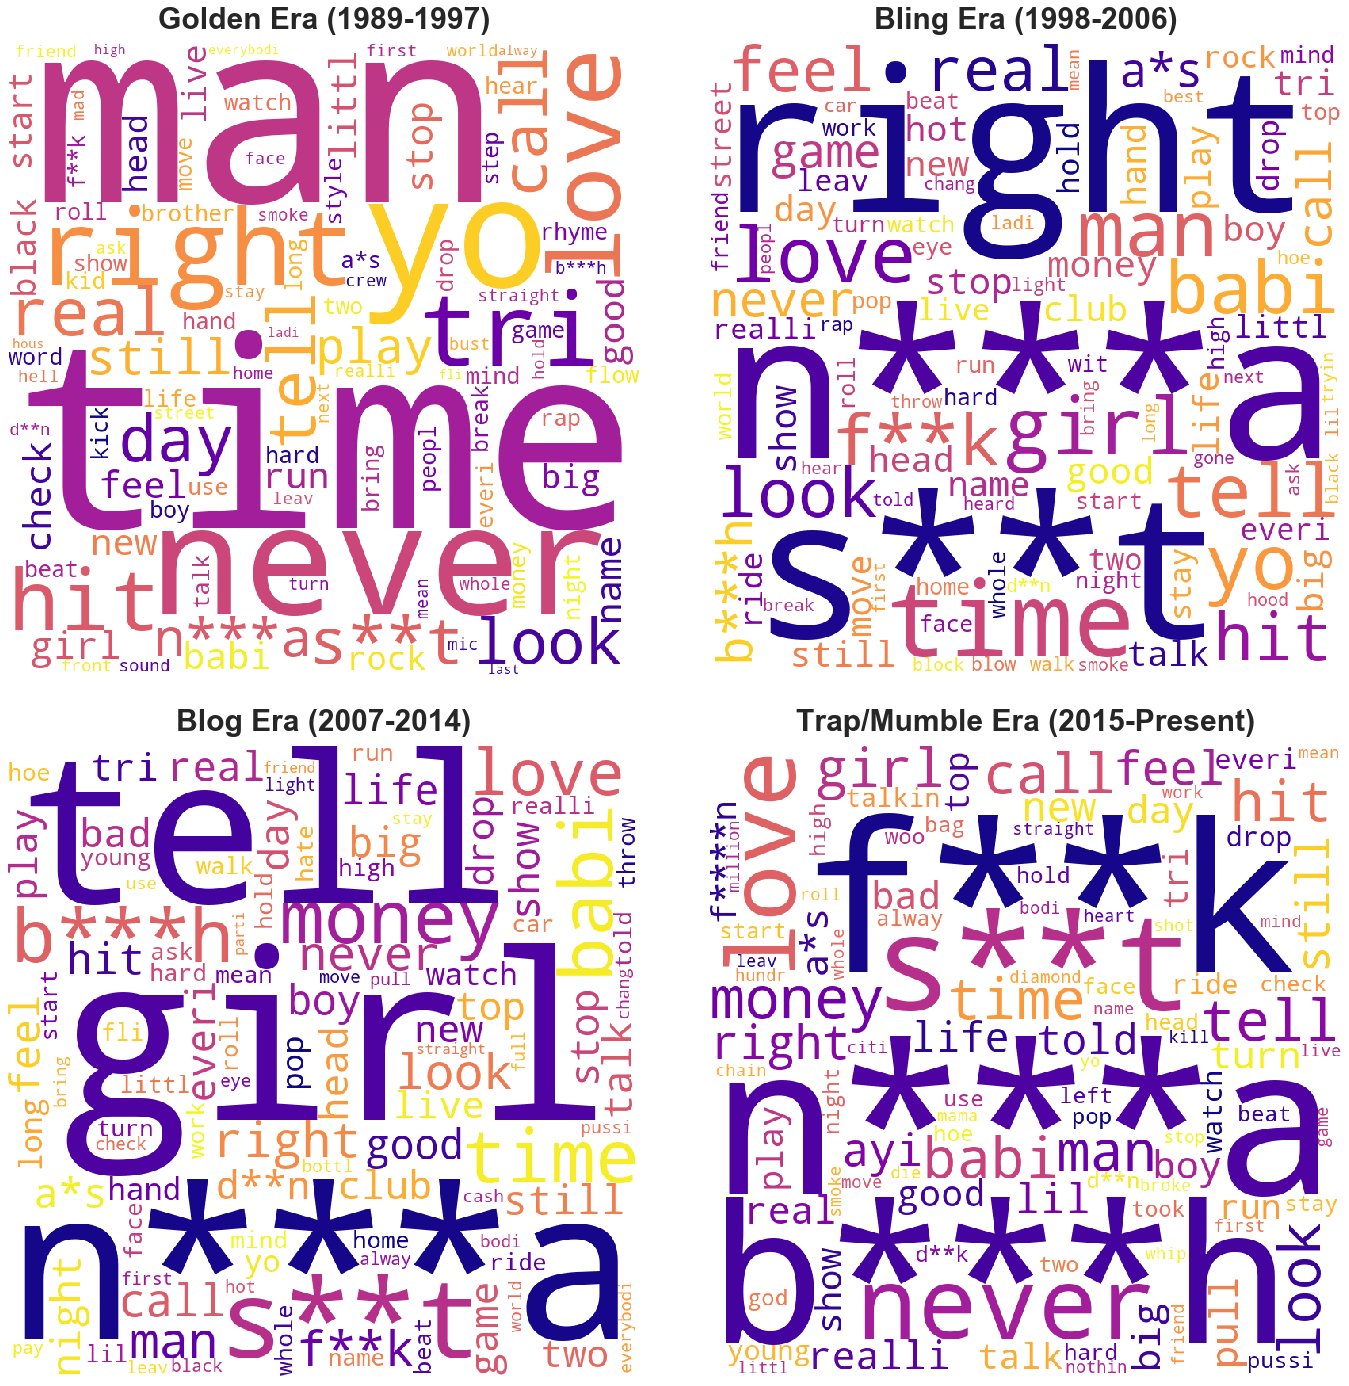

In [47]:
from collections import Counter
from wordcloud import WordCloud

fig, ax = plt.subplots(2,2,figsize=(20,20), facecolor=None)
plt.tight_layout(pad = 3) 

for i, row in lyrics_by_era_df.iterrows():
    if i==0:
        x,y = 0,0
    elif i==1:
        x,y=0,1
    elif i==2:
        x,y=1,0
    else:
        x,y=1,1
        
    word_count = Counter(row["lyrics"])  
    wordcloud = WordCloud(width = 800, height = 800, max_words=100, background_color="white", 
                          random_state=23, min_font_size = 10, 
                          relative_scaling=.5, colormap="plasma").generate_from_frequencies(word_count)
    ax[x][y].imshow(wordcloud) 
    ax[x][y].axis("off")
    ax[x][y].set_title(row["era"],pad=15,fontsize=30,fontweight="bold")

From these word clouds, a couple interesting patterns are evident:
1. Profanity seems to have increased with the passage of time. The Golden Era in particular was relatively free of profanity.
1. The word "yo" was common in the Golden Era but has since been less prevalent.
3. Several words were popular across all eras: love, money, real, girl, etc.

I moved onto analyzing the overall sentiment of each track utilizing yet another [package](https://github.com/cjhutto/vaderSentiment):

```pip install vaderSentiment```

Below, I calculate a compound polarity score for each line in a track. I then return the average polarity across lines as well and the standard deviation of polarity across lines.

In [48]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def calculate_sentiment(row):
    lyrics = row["genius_lyrics"]
    sentiment_list = []
    for line in lyrics.splitlines():
        if len(line) > 0:
            polarity_score = analyser.polarity_scores(line)
            sentiment_list.append(polarity_score["compound"])
            
    return sum(sentiment_list)/len(sentiment_list), np.std(sentiment_list)

In [49]:
complete_df_2[["mean_sentiment","std_sentiment"]] = complete_df_2.progress_apply(calculate_sentiment, axis=1, result_type="expand")


  4%|██▋                                                                         | 1364/38318 [00:15<05:55, 103.93it/s]


  6%|████▊                                                                        | 2367/38318 [00:31<08:42, 68.77it/s]


  9%|██████▊                                                                      | 3416/38318 [00:48<08:07, 71.58it/s]


 12%|█████████▏                                                                   | 4568/38318 [01:04<06:06, 92.10it/s]


 16%|███████████▊                                                                | 5957/38318 [01:19<05:06, 105.56it/s]


 19%|██████████████▌                                                              | 7226/38318 [01:35<07:08, 72.59it/s]


 22%|████████████████▊                                                            | 8358/38318 [01:52<09:11, 54.34it/s]


 24%|██████████████████▋                                                          | 9327/38318 [02:08<13:53, 34.79it/s]


 27%|████████████████████▏                                                       | 10195/38318 [02:25<11:25, 41.02it/s]


 30%|██████████████████████▌                                                     | 11401/38318 [02:40<05:16, 85.09it/s]


 33%|████████████████████████▉                                                   | 12586/38318 [02:56<06:34, 65.31it/s]


 36%|███████████████████████████                                                | 13845/38318 [03:11<03:33, 114.69it/s]


 39%|█████████████████████████████▎                                             | 14996/38318 [03:27<03:37, 107.24it/s]


 42%|████████████████████████████████▎                                           | 16284/38318 [03:42<04:08, 88.76it/s]


 46%|██████████████████████████████████▋                                         | 17494/38318 [03:59<07:13, 48.02it/s]


 49%|█████████████████████████████████████▏                                      | 18720/38318 [04:14<05:51, 55.70it/s]


 51%|██████████████████████████████████████▌                                     | 19471/38318 [04:31<04:51, 64.63it/s]


 54%|████████████████████████████████████████▋                                   | 20537/38318 [04:47<05:41, 52.05it/s]


 56%|██████████████████████████████████████████▊                                 | 21590/38318 [05:11<33:56,  8.21it/s]


 59%|████████████████████████████████████████████▊                               | 22619/38318 [05:35<04:45, 55.00it/s]


 63%|██████████████████████████████████████████████▉                            | 23994/38318 [05:52<01:35, 150.13it/s]


 66%|██████████████████████████████████████████████████▍                         | 25449/38318 [06:07<02:20, 91.59it/s]


 69%|████████████████████████████████████████████████████▍                       | 26435/38318 [06:25<02:53, 68.57it/s]


 71%|██████████████████████████████████████████████████████▎                     | 27364/38318 [06:42<03:44, 48.85it/s]


 74%|████████████████████████████████████████████████████████▏                   | 28341/38318 [06:58<02:43, 60.96it/s]


 77%|██████████████████████████████████████████████████████████▏                 | 29355/38318 [07:20<02:37, 56.87it/s]


 80%|████████████████████████████████████████████████████████████▌               | 30524/38318 [07:40<01:37, 79.96it/s]


 82%|██████████████████████████████████████████████████████████████▍             | 31460/38318 [07:57<03:07, 36.59it/s]


 85%|████████████████████████████████████████████████████████████████▍           | 32494/38318 [08:14<01:27, 66.62it/s]


 88%|██████████████████████████████████████████████████████████████████▋         | 33616/38318 [08:58<18:52,  4.15it/s]


 90%|████████████████████████████████████████████████████████████████████▊       | 34668/38318 [14:17<01:13, 49.81it/s]


 93%|██████████████████████████████████████████████████████████████████████▊     | 35722/38318 [15:42<00:35, 72.29it/s]


 96%|████████████████████████████████████████████████████████████████████████▊   | 36703/38318 [16:21<01:10, 22.99it/s]


 98%|██████████████████████████████████████████████████████████████████████████▊ | 37694/38318 [16:42<00:09, 64.35it/s]


100%|████████████████████████████████████████████████████████████████████████████| 38318/38318 [16:57<00:00, 37.64it/s]


Prior to creating more visualizations, I engineered some more feature columns. Note that the **unique_word_proportion** column attempts to capture the diversity of words in a track. This is calculated as the number of unique words divided by the total number of words.

In [55]:
complete_df_3 = complete_df_2
complete_df_3["duration_sec"] = complete_df_3["duration_ms"]/1000
complete_df_3["word_count"] = complete_df_3["genius_lyrics"].progress_apply(lambda x: len(x.split()))
complete_df_3["words_per_second"] = complete_df_3["word_count"]/complete_df_3["duration_sec"]
complete_df_3["unique_word_proportion"] = complete_df_3["unique_lyrics"].apply(lambda x: len(x))/complete_df_3["word_count"]
complete_df_3 = complete_df_3.drop(columns=["genius_lyrics","unique_lyrics", "unique_lyrics_no_stopwords"])



100%|██████████████████████████████████████████████████████████████████████████| 38318/38318 [00:04<00:00, 8779.11it/s]


In [59]:
complete_df_3 = pd.read_pickle("complete_3.pkl")

### 3.2. Line Charts

Below, I plot the historical trends for several of the previously calculated features. Due to massive variation between tracks (some of which is likely due to incorrect data pulls), I decided to only focus on tracks between the 25th and 75th percentile for each feature. This is accomplished with the **remove_outliers** function. To generate confidence bands for my line charts, I also calculated grouped standard deviations for tracks within this percentile range.

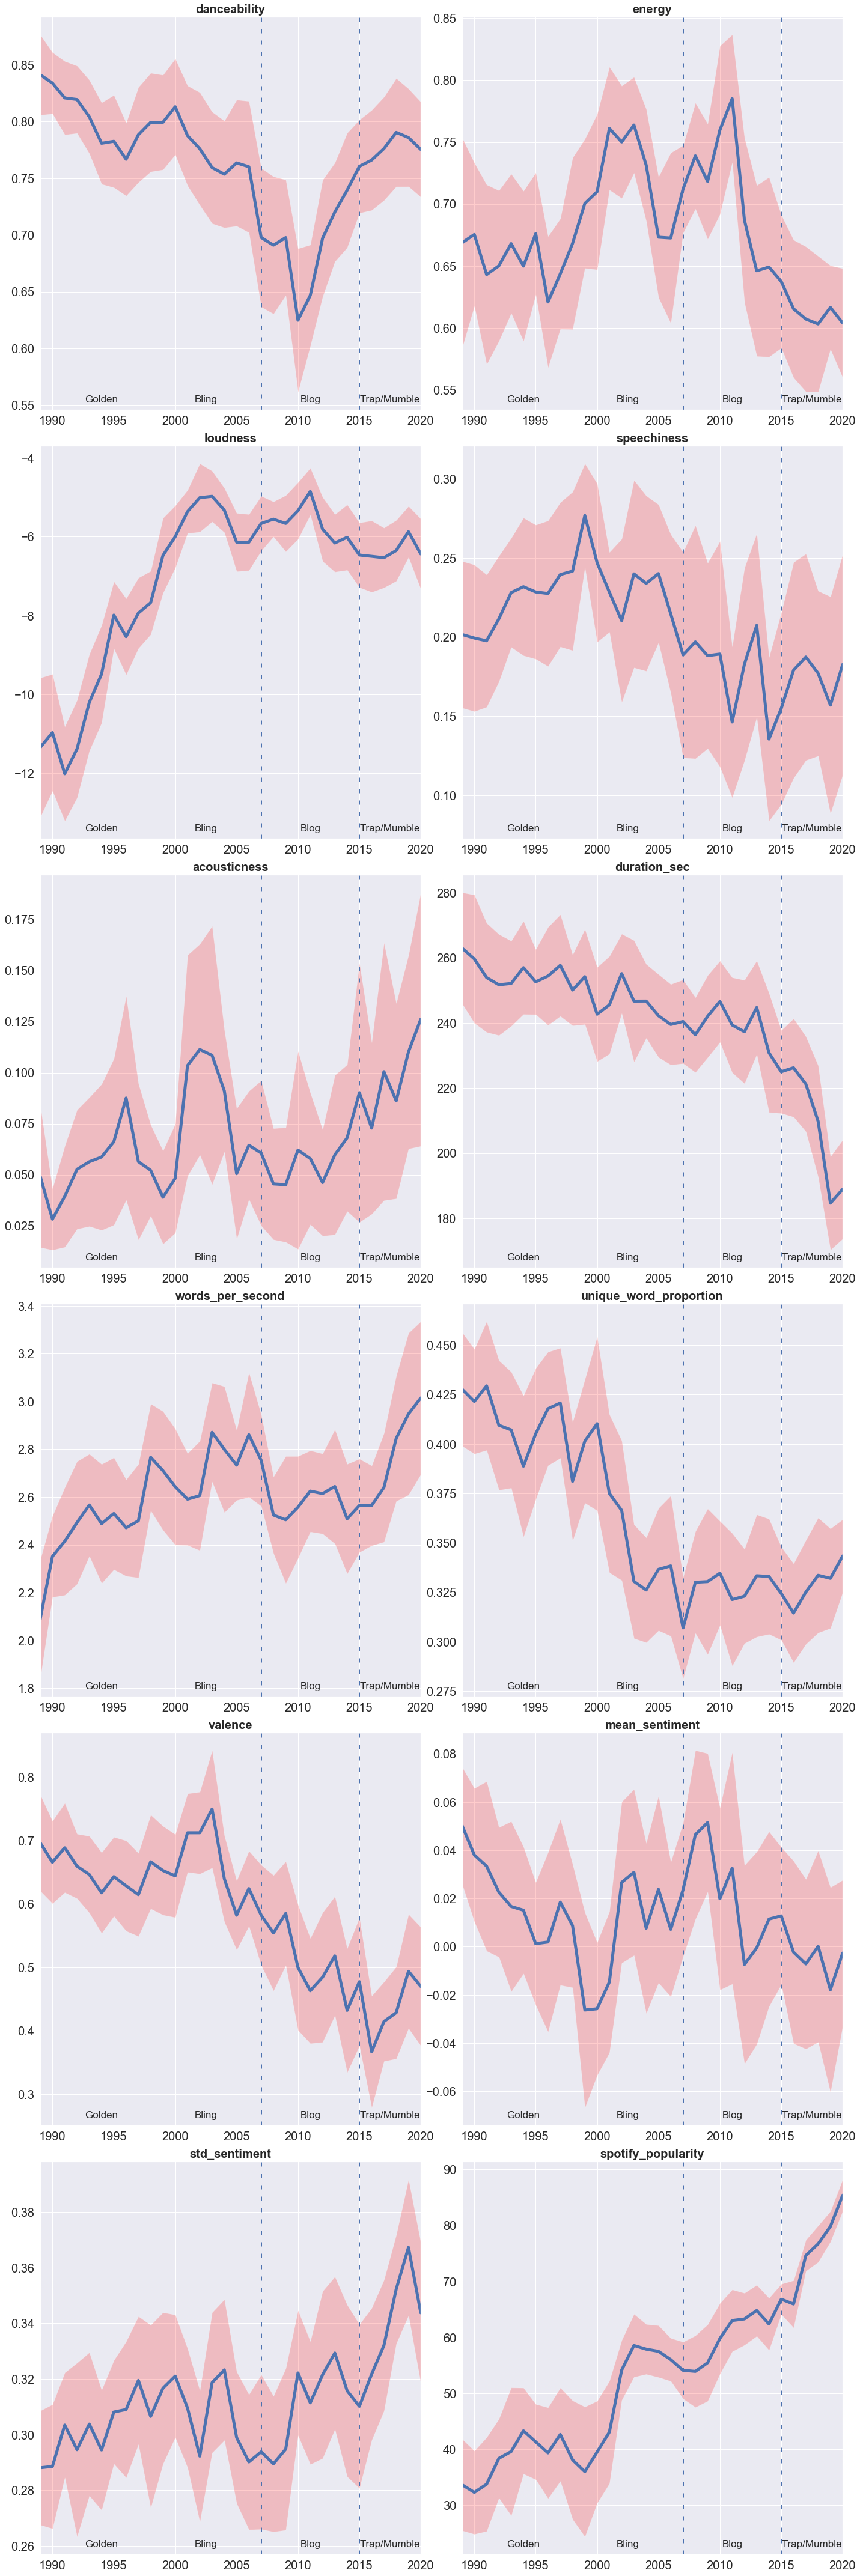

In [60]:
features_to_plot = ["danceability", "energy", "loudness", "speechiness", "acousticness", 
                    "duration_sec", "words_per_second", "unique_word_proportion", 
                    "valence","mean_sentiment", "std_sentiment","spotify_popularity"]

fig, ax = plt.subplots(6,2, figsize=(20,60))
plt.tight_layout(pad = 3) 

def remove_outliers(year_df, feature):
    q1 = year_df[feature].quantile(0.25)
    q3 = year_df[feature].quantile(0.75)
    iqr = q3 - q1
    reduced_df = year_df[(year_df[feature]>=q1) & (year_df[feature]<=q3)]
    return reduced_df

for i, feature in enumerate(features_to_plot):
    col = i%2
    row = i//2
    axis = ax[row][col]
    
    filtered_df = complete_df_3.groupby("year",as_index=False).apply(remove_outliers,feature)

    by_year_df = filtered_df.groupby(by="year")[[feature]].mean()
    errors = filtered_df.groupby(by = "year")[[feature]].std()

    
    axis.plot(by_year_df.index,by_year_df[feature],linewidth=5)
    axis.set_title(feature,fontsize=20,fontweight="bold")
    axis.tick_params("both",labelsize=20)
    axis.fill_between(by_year_df.index,by_year_df[feature]-errors[feature],by_year_df[feature]+errors[feature],
                      facecolor="red",alpha=.2)
    
    axis.axvline(1998,ls='dashed',lw=1,dashes=(7,12))
    axis.axvline(2007,ls='dashed',lw=1,dashes=(7,12))
    axis.axvline(2015,ls='dashed',lw=1,dashes=(7,12))
    bottom, top = axis.set_ylim()
    axis.set_xlim(1989,2020)

    axis.annotate("Golden",(1994,bottom+.02*(top-bottom)),ha="center",fontsize=17)
    axis.annotate("Bling",(2002.5,bottom+.02*(top-bottom)),ha="center",fontsize=17)
    axis.annotate("Blog",(2011,bottom+.02*(top-bottom)),ha="center",fontsize=17)
    axis.annotate("Trap/Mumble",(2017.5,bottom+.02*(top-bottom)),ha="center",fontsize=17)

Several interesting historical trends are evident from the above plots.
1. **Danceability**: Steadily declined since the Golden Era, reached a bottom during the Blog Era, and trended upward again
2. **Energy**: Had a double peak during the Bling and Blog Eras
3. **Loudness**: Rap got significantly louder post-Golden Era and has stayed elevated since
4. **Speechiness**: Although the mean has trended downward, taking confidence bands into consideration suggests there isn't much of a trend
5. **Acousticness**: Although the mean has trended upward, taking confidence bands into consideration suggests there isn't much of a trend
6. **Track Duration**: Tracks have clearly gotten shorter over time, with rap songs today over a minute shorter than versus the Golden Era. This makes sense with the rise of the streaming industry where shorter tracks increase revenue for artists/labels.
7. **Words Per Second**: This has trended upward, suggesting that rap today is faster than any other period.
8. **Proportion of Unique Words**: Interestingly, this is actually lower today (even though words per second is higher). This suggests that tracks today involve more repetition.
9. **Valence**: Has steadily trended downward, suggesting tracks today are less feel-good than before
10. **Mean Sentiment**: Exhibits a similar trend to valence (given it is attempting to measure the same thing), although the trend is less statistically significant
11. **Standard Deviation of Sentiment**: Within tracks, sentiment is changing much more than before (tracks alternate between happier and sadder vibes)
12. **Spotify Popularity**: Not surprisingly, more recent tracks are currently more popular on Spotify, although there is a local maximum in the middle of the Bling Era (perhaps captured by Spotify's throwback playlists)

## 4. Conclusion/Further Steps

I was able to find several interesting similarities and differences between rap tracks across time. It would be interesting to see if I could engineer more creative features to find hidden patterns. Visualizing most common bigrams/trigrams could also be useful. 

I think that data cleaning needs some addressing, as upon manual inspection, it is evident that some API searches returned incorrect tracks (such as remixes instead of the original). Given the large quantity of tracks, manually cleaning this data would be very time consuming (and may not necessarily improve performance). It may make sense to randomly sample a subset of tracks, clean the data, and repeat the analysis above.